# **Trabalho de Conclução de Curso - MBA Jornalismo de Dados (IDP) 2025**
## **Projeto: GUIMA - Guia de Museus Acessíveis**
- Orientação: Deborah Foroni
- Estudante: Ícaro Ferracini

# **1.0 - Sobre o projeto**

## 1.1 - Título do tema de TCC

Acessibilidade nos museus brasileiros: Estudo e visualização dos dados oficiais sobre recursos e infraestrutura das instituições.

## 1.2 - Descrição resumida do tema de investigação

As barreiras para pessoas com deficiência visitarem um museu iniciam ainda na fase de planejamento, pois encontrar informações claras sobre acessibilidade de um local pode ser impossível.

Essa indisponibilidade, além de excluir parte do público, impede que milhões de brasileiros exerçam plenamente seu direito à cultura. Este projeto busca transformar esse cenário, oferecendo dados claros e acessíveis sobre a infraestrutura de acessibilidade dos museus brasileiros.

## 1.3 - Justificativa

No Brasil, [18,6 milhões de pessoas vivem com algum tipo de deficiência](https://www.gov.br/mdh/pt-br/assuntos/noticias/2023/julho/brasil-tem-18-6-milhoes-de-pessoas-com-deficiencia-indica-pesquisa-divulgada-pelo-ibge-e-mdhc) – quase 9% da população ([IBGE, 2023](https://agenciadenoticias.ibge.gov.br/agencia-noticias/2012-agencia-de-noticias/noticias/37317-pessoas-com-deficiencia-tem-menor-acesso-a-educacao-ao-trabalho-e-a-renda)).

Apesar da Lei Brasileira de Inclusão da Pessoa com Deficiência ([Lei nº 13.146/2015, art. 42](https://www2.camara.leg.br/legin/fed/lei/2015/lei-13146-6-julho-2015-781174-normaatualizada-pl.html)) garantir o direito de acesso à cultura, dos 4.005 museus registrados oficialmente no portal MuseusBR, segundo um levantamento realizado em janeiro de 2025, apenas 37,7% indicavam possuir recursos ou infraestrutura para acessibilidade.

Nesse cenário, o projeto **GuiMA (Guia de Museus Acessíveis)** se propõe a ampliar essa discussão com uma melhor exposição das informações de acessibilidade nos Museus, ampliando o trabalho já existente do [Instituto Brasileiro de Museus - Ibram](https://www.gov.br/museus/pt-br/assuntos/os-museus/museus-do-brasil/museus-do-brasil) no acesso à informação, tornando mais fácil ao público a consulta das instituições e trazendo uma nova perspectiva aos dados disponíveis, fortalecendo a transparência de informações e criando novas oportunidades de diálogo sobre o tema.

# **2.0 - Bibliotecas usadas**

## 2.1 - Instalar as bibliotecas necessárias

Para rodar o projeto é necessário instalar as seguintes bibliotecas:

### 2.1.1 - pandas
**Função:** Manipulação de dados (tabelas, planilhas, CSV etc.)
Permite criar e manipular DataFrames, que são tabelas de dados.
Ideal para análise de dados, exportar para Excel/CSV etc.

### 2.1.2 - requests
**Função:** Faz requisições HTTP (acessar sites, APIs etc.)
Usado para baixar o conteúdo de páginas web, como HTML.
Muito usado em web scraping e consumo de APIs.

### 2.1.3 - beautifulSoup
**Função:** Extrai dados de páginas HTML (web scraping)
Usado junto com requests para pegar informações de sites, como títulos, horários de funcionamento, etc.

### 2.1.4 - tqdm
**Função:** Mostra barras de progresso nos loops
Útil para saber quanto falta para terminar um processo que demora (como baixar vários dados).

### 2.1.5 - numpy
**Função:** cálculo numérico e operações com arrays.
Base para muitas bibliotecas científicas no Python (incluindo pandas e matplotlib).
Utilizada posteriormente no tratamento de dados.

### 2.1.6 - matplotlib
**Função:** Biblioteca de visualização de dados.
Permite criar gráficos (barras, linhas, dispersão, histogramas etc.). Geralmente usada junto com pandas e numpy para análises exploratórias.
Utilizada posteriormente no tratamento de dados.

### 2.1.7 - Geopy (Nominatim)
**Função:** Obter as coordenadas de localização a partir de um endereço
Posteriormente, durante o tratamento de dados, foi necessário instalar a biblioteca Geopy para obter as coordenadas de localização de alguns museus, para apresentá-los no mapa.

### 2.1.8 - Seaborn
A biblioteca Seaborn é uma biblioteca de visualização de dados em Python, construída sobre o matplotlib e integrada ao pandas.

## 2.2 - Instalando todas as bibliotecas de uma vez

In [ ]:
pip install pandas requests beautifulsoup4 tqdm numpy matplotlib geopy seaborn

## 2.3 - Importar as bibliotecas para utilização

In [98]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import matplotlib.pyplot as plt
import seaborn as sns

# **3.0 - Raspagem de dados**

## 3.1 - Obter os dados dos museus

Para construção da visualização e análise da acessibilidade nos museus, são necessários 2 passos: Baixar a planilha oficial e raspar os dados dos museus.

### 3.1.1 - Baixar a base de dados oficial

- Baixar a base de museus cadastrados no site Museusbr, que possui os dados do Cadastro Nacional de Museus (CNM). Essa planilha pode ser baixada no link [https://encurtador.com.br/cnxNR](https://encurtador.com.br/cnxNR) disponível no próprio [Painel Analítico](https://cadastro.museus.gov.br/painel-analitico/) do site. 

### 3.1.2 - Raspar as informações de acessibilidade de cada museu no site

- Complementar os dados fornecidos com as informações disponíveis na página de cada museu. Para isso, fazemos a raspagem de dados utilizando o ID indicado na planilha oficial, buscado todas as informações da página do museu correspontende. Esse processo demora, aproximadamente 1h30 para percorrer os +4.000 registros no site.

In [6]:
def extrair_dados(url, id_museu):
    """Extrai as informações da página do MuseusBR."""
    response = requests.get(url)
    if response.status_code != 200:
        return {"ID": id_museu}  # Retorna apenas o ID se a requisição falhar
    
    soup = BeautifulSoup(response.text, 'html.parser')
    dados = {"ID": id_museu}
    
    # Adicionar a descrição do museu primeiro
    descricao_tag = soup.find("div", class_="museu-item-description")
    dados["Descrição do museu"] = descricao_tag.get_text(strip=True) if descricao_tag else "- SEM INFORMAÇÃO NO SITE -"
    
    # Encontrar todas as divs com classe que começa com "metadata-slug-"
    divs = soup.find_all("div", class_=re.compile(r'^metadata-slug-'))
    
    for div in divs:
        titulo_tag = div.find("h4")
        conteudo_tag = div.find("p")
        
        if titulo_tag:
            titulo = titulo_tag.get_text(strip=True)
            conteudo = conteudo_tag.get_text(strip=True) if conteudo_tag else "- SEM INFORMAÇÃO NO SITE-"
            dados[titulo] = conteudo
    
    # Capturar informações da seção de localização
    secao_localizacao = soup.find("section", class_="metadata-section-slug-localizacao")
    if secao_localizacao:
        divs_localizacao = secao_localizacao.find_all("div")
        for div in divs_localizacao:
            titulo_tag = div.find("h3")
            conteudo_tag = div.find("p")
            
            if titulo_tag:
                titulo = titulo_tag.get_text(strip=True)
                conteudo = conteudo_tag.get_text(strip=True) if conteudo_tag else "- SEM INFORMAÇÃO NO SITE-"
                dados[titulo] = conteudo
    
    return dados

# Carregar o arquivo CSV
df = pd.read_csv("../01 - base de dados original/lista_dos_museus_brasileiros_2025-09-13T12_47_29.897930373Z.csv")

# Lista para armazenar os dados raspados
dados_raspados = []

# Percorrer cada linha do CSV
tqdm.pandas()  # Para visualizar o progresso do loop
for _, row in tqdm(df.iterrows(), total=len(df)):
    url = row["Link no MuseusBR"]
    id_museu = row["ID"]
    if pd.notna(url):  # Verifica se a URL não está vazia
        dados_raspados.append(extrair_dados(url, id_museu))

# Criar um novo DataFrame com os dados extraídos
df_raspado = pd.DataFrame(dados_raspados)

# Salvar em um novo CSV
df_raspado.to_csv("../02 - Raspagem de dados/raspagem_dados_museusbr_2025-09-13.csv", index=False, encoding="utf-8-sig")

print("Raspagem concluída e dados salvos!")


100%|██████████| 4024/4024 [1:34:24<00:00,  1.41s/it]

Raspagem concluída e dados salvos!


## 3.2 - Verificando os dados raspados

Após a raspagem, verificamos os dados que obtemos do site.

In [3]:
# Configuração do pandas para limitar as linhas, mas exibir todas as colunas do CSV
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', None)

In [ ]:
# Mostrar as primeiras linhas do CSV
df = pd.read_csv('../02 - Raspagem de dados/raspagem_dados_museusbr_2025-09-13.csv', sep=',', encoding='UTF-8')
df.head()

ID                                 Descrição do museu  \
0  80119                                                NaN   
1  80120                                                NaN   
2  80121  O Museu Paranaense de Ciências Forenses é dedi...   
3  80122  Museu Histórico, Antropológico, Arqueológico e...   
4  80123                                                NaN   

          Esfera administrativa  \
0           PÚBLICA – Municipal   
1       PRIVADA – Não informada   
2  PÚBLICA – Estadual/Distrital   
3           PÚBLICA – Municipal   
4       PRIVADA – Não informada   

                                      Cadastrado por  Ano de abertura  \
0                        Cadastro Nacional de Museus           1982.0   
1                        Cadastro Nacional de Museus           2000.0   
2  Museu de Ciencias Forenses da Policia Cientifi...           1975.0   
3                        Cadastro Nacional de Museus           1996.0   
4                        Cadastro Nacional de Museus           2010.0   

  Instrumento de criação          Descrição do instrumento de criação  \
0      - NÃO INFORMADO -                                Não informado   
1      - NÃO INFORMADO -                                Não informado   
2              Resolução                                          NaN   
3      - NÃO INFORMADO -  Lei: 1515/1973 alterada pela Lei: 2338/1988   
4      - NÃO INFORMADO -                                Não informado   

        Instituição mantenedora O museu possui voluntários?  \
0                 Não informado           - NÃO INFORMADO -   
1                 Não informado           - NÃO INFORMADO -   
2  Polícia Científica do Paraná                         Não   
3                 Não informado           - NÃO INFORMADO -   
4                 Não informado           - NÃO INFORMADO -   

  O museu possui estagiários? O museu possui Regimento Interno?  \
0           - NÃO INFORMADO -                 - NÃO INFORMADO -   
1           - NÃO INFORMADO -                               Não   
2                         Sim                               Não   
3           - NÃO INFORMADO -                               Não   
4           - NÃO INFORMADO -                 - NÃO INFORMADO -   

  O museu possui Plano Museológico? O museu possui contrato para gestão?  \
0                               Não                    - NÃO INFORMADO -   
1                               Não                    - NÃO INFORMADO -   
2                               Não                                  Não   
3                               Não                    - NÃO INFORMADO -   
4                 - NÃO INFORMADO -                    - NÃO INFORMADO -   

  O museu é de caráter comunitário?                 Temática do Museu  \
0                 - NÃO INFORMADO -  Artes, arquitetura e linguística   
1                               Sim                          História   
2                               Não        Defesa e segurança pública   
3                               Não                          História   
4                 - NÃO INFORMADO -                 - NÃO INFORMADO -   

                Total de bens culturais museológicos  \
0  O número informado é exato ou aproximado?- NÃO...   
1  O número informado é exato ou aproximado?- NÃO...   
2  Número de bens culturais museológicos1500O núm...   
3  O número informado é exato ou aproximado?- NÃO...   
4  O número informado é exato ou aproximado?- NÃO...   

  O número informado é exato ou aproximado?  \
0                         - NÃO INFORMADO -   
1                         - NÃO INFORMADO -   
2                                Aproximado   
3                         - NÃO INFORMADO -   
4                         - NÃO INFORMADO -   

                                 Tipologia do acervo  \
0                                      Artes Visuais   
1                                                NaN   
2                                             Outros   
3  Antropologia 

In [ ]:
# Verificando a quantidade de registros e colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 66 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   ID                                                                                              4024 non-null   int64  
 1   Descrição do museu                                                                              2518 non-null   object 
 2   Esfera administrativa                                                                           4022 non-null   object 
 3   Cadastrado por                                                                                  4022 non-null   object 
 4   Ano de abertura                                                                                 3680 non-null   float64
 5   Instrumento d

# **4.0 - Exploração inicial dos dados**

## 4.1 - Unindo as duas base de dados em uma só
Vamos unir a base oficial com o CSV da raspagem usando o ID do museu como referência.

### 4.1.1 - Carregando e avaliando as colunas dos DFs

In [25]:
# Carregar o CSV oficial
df1 = pd.read_csv('../01 - base de dados original/lista_dos_museus_brasileiros_2025-09-13T12_47_29.897930373Z.csv', encoding='utf-8')

# Carregar o CSV da raspagem
df2 = pd.read_csv('../02 - Raspagem de dados/raspagem_dados_museusbr_2025-09-13.csv', encoding='utf-8')

In [4]:
# verificando colunas do df oficial
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       4024 non-null   int64 
 1   Título                   4024 non-null   object
 2   Esfera                   4022 non-null   object
 3   Status de Funcionamento  4024 non-null   object
 4   Tipo                     4022 non-null   object
 5   Temática                 4023 non-null   object
 6   Estado                   4024 non-null   object
 7   Município                4021 non-null   object
 8   Site Oficial             2223 non-null   object
 9   Link no MuseusBR         4024 non-null   object
dtypes: int64(1), object(9)
memory usage: 314.5+ KB


In [5]:
# verificando colunas do df raspado
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 66 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   ID                                                                                              4024 non-null   int64  
 1   Descrição do museu                                                                              2518 non-null   object 
 2   Esfera administrativa                                                                           4022 non-null   object 
 3   Cadastrado por                                                                                  4022 non-null   object 
 4   Ano de abertura                                                                                 3680 non-null   float64
 5   Instrumento d

## 4.2 - Verificando colunas potencialmente iguais

Existem colunas (além da ID) que podem ser repetidas. Sâo:

| Coluna em df1 | Possível correspondente em df2 |
| --- | --- |
| Esfera | Esfera administrativa |
| Status de Funcionamento | Status do Museu |
| Temática | Temática do Museu |
| Estado | UF |
| Município | Município |

Vamos analisar linha a linha para garantir que não vamos perder nada:

In [26]:
# Pares de colunas que consideramos equivalentes
colunas_equivalentes = {
    "Esfera": "Esfera administrativa",
    "Status de Funcionamento": "Status do Museu",
    "Temática": "Temática do Museu",
    "Estado": "UF",
    "Município": "Município"
}

# Função para comparar colunas
for col1, col2 in colunas_equivalentes.items():
    iguais = (df1[col1].astype(str).fillna("").str.strip() ==
              df2[col2].astype(str).fillna("").str.strip())
    
    total = len(iguais)
    iguais_count = iguais.sum()
    diferentes_count = total - iguais_count
    
    print(f"\n🔍 Comparando '{col1}' (df1) com '{col2}' (df2):")
    print(f"- Iguais: {iguais_count} linhas ({iguais_count/total:.2%})")
    print(f"- Diferentes: {diferentes_count} linhas ({diferentes_count/total:.2%})")
    
    # Se houver diferenças, mostra alguns exemplos
    if diferentes_count > 0:
        diffs = pd.DataFrame({
            col1: df1.loc[~iguais, col1],
            col2: df2.loc[~iguais, col2]
        }).head(5)
        print("Exemplos de diferenças:")
        print(diffs)


🔍 Comparando 'Esfera' (df1) com 'Esfera administrativa' (df2):
- Iguais: 4024 linhas (100.00%)
- Diferentes: 0 linhas (0.00%)

🔍 Comparando 'Status de Funcionamento' (df1) com 'Status do Museu' (df2):
- Iguais: 4024 linhas (100.00%)
- Diferentes: 0 linhas (0.00%)

🔍 Comparando 'Temática' (df1) com 'Temática do Museu' (df2):
- Iguais: 4024 linhas (100.00%)
- Diferentes: 0 linhas (0.00%)

🔍 Comparando 'Estado' (df1) com 'UF' (df2):
- Iguais: 4024 linhas (100.00%)
- Diferentes: 0 linhas (0.00%)

🔍 Comparando 'Município' (df1) com 'Município' (df2):
- Iguais: 4024 linhas (100.00%)
- Diferentes: 0 linhas (0.00%)


## 4.3 - Unindo os dois DFs

Vamos unir os DFs sem as colunas repetidas.

In [31]:
# Faz uma cópia do df2 sem as colunas que não queremos
df2_limpo = df2.drop(columns=[
    "Esfera administrativa",
    "Status do Museu",
    "Temática do Museu",
    "UF",
    "Município"
])

# Agora faz o merge mantendo apenas uma versão dessas colunas
df_museu = pd.merge(df1, df2_limpo, on="ID", how="inner")

# Mostrando resultado
print(df_museu.shape)

(4024, 70)


In [32]:
df_museu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 70 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   ID                                                                                              4024 non-null   int64  
 1   Título                                                                                          4024 non-null   object 
 2   Esfera                                                                                          4022 non-null   object 
 3   Status de Funcionamento                                                                         4024 non-null   object 
 4   Tipo                                                                                            4022 non-null   object 
 5   Temática     

Salvando o DF unificado em um CSV:

In [33]:
df_museu.to_csv("../03 - Dados tratados/01 - dfs_unificados.csv", index=False, encoding="utf-8-sig")

## 4.4 - Analisando os valores das colunas
Após a unificação dos dados, vamos entrar no detalhe para organizar os valores das colunas para realizar as visualizações necessárias.

## 4.5 - Testando e avaliando as colunas

Exploração coluna a coluna para se familiarizar com os dados:

In [196]:
# Informe o número da coluna (exemplo: 2 para a terceira coluna)
col_num = 64
col = df_museu.columns[col_num]
print(f"\n📌 Analisando a coluna: {col}")

# Substitui strings vazias por NaN para facilitar contagem
serie = df_museu[col].replace(r'^\s*$', pd.NA, regex=True)

print("\n📏 Estatísticas gerais:")
total = serie.shape[0]
unicos = serie.nunique(dropna=True)
duplicados = total - unicos
vazios = serie.isna().sum()
print(f"- Total: {total}")
print(f"- Únicos: {unicos}")
print(f"- Duplicados: {duplicados}")
print(f"- Em branco: {vazios}")

print("\n📊 Valores comuns:")
freq_top = serie.value_counts(dropna=False).head(20)
print(freq_top)

print("\n🔹 Valores únicos:")
unicos_top = serie.unique()[:10]
print(unicos_top)

print("\n🔎 Tipos encontrados:")
print(serie.apply(type).value_counts())


📌 Analisando a coluna: Youtube

📏 Estatísticas gerais:
- Total: 4024
- Únicos: 137
- Duplicados: 3887
- Em branco: 3881

📊 Valores comuns:
Youtube
NaN                                                                                    3881
https://www.youtube.com/fcibipora/videos                                                  3
http://www.youtube.com/user/canalFMC                                                      3
https://www.youtube.com/@pinacotecaufv9281                                                2
https://www.youtube.com/@chaleagroecologico                                               2
https://www.youtube.com/channel/UC7TPaxWeUtTGyRbNNoqdxEw                                  1
https://www.youtube.com/@galeriahomeromassena6687                                         1
https://www.youtube.com/@museuvirtualdeinstrumentos1706                                   1
https://www.youtube.com/@ongecoassociados9465                                             1
https://www.youtube.com/

Observando as caracteristicas dos dados foi possível extrair itens para trabalhar.
Eles serão detalhados a seguir.

# **5.0 - Ideias iniciais de tratamento e observações sobre os dados**




## 5.1 - Tratamentos necessários:

1. Coluna: "**Ano de abertura**"
    - Retirar o .0 do final 

2. Coluna: "**Total de bens culturais museológicos**"
    - Deixar somente o número após o texto "**Número de bens culturais museológicos**" (cortando antes do espaço)
    - Deixar coluna como número int.
    - Criar coluna nova chamada "**Classificação do Total de bens culturais museológicos**"
        - Trazer nessa nova coluna o valor após o texto "número informado é exato ou aproximado?" (valores = Exato, Aproximado, - NÃO INFORMADO -)
        - *update* = verificar essa info com a coluna "**O número informado é exato ou aproximado?**" que apresenta os mesmos valores.

3. Coluna: "**Dias e horários de abertura para o público**"
    - Equalizar valores repetidos como: "*não informado*", "*Não informado*" e "*Não informado.*"
    - Talvez seja interessante separar o horário também.

4. Reorganizar essas colunas de acessibilidade separando os valores para facilitar gráficos e populando valores que estão em branco: 
    - "**Infraestrutura para pessoas com dificuldade de locomoção**"
    - "**Se houver, informe outras infraestruturas para pessoas com dificuldade de locomoção**"
    - "**Infraestrutura para pessoas com deficiências auditivas e/ou visuais**"
    - "**Se houver, informe outras infraestruturas para pessoas com deficiências auditivas e/ou visuais**"
    - "**Infraestrutura para atendimento a turistas estrangeiros**"
    - "**Se houver, informe outras infraestruturas para atendimento a turistas estrangeiros**"

5. Coluna: "**Capacidade de público do teatro/auditório**"
    - Retirar o .0 do final 
    - Deixar como número int.

6. Coluna: "**Localização**"
    - Possui 69 linhas sem coordenadas que precisam ser preenchidas ou excluídas.

7. Coluna: "**A entrada ao museu é cobrada?**"
    - Existem 3 valores vazios que precisam ser preenchidos.

## 5.2 - Para endereço e localização do museu:

1. Para endereço concatenar colunas:
    - Logradouro = 4 valores em branco
    - Número = 8 valores em branco
    - Complemento
    - Bairro = 15 valores em branco
    - Município = 3 valores em branco
    - UF = Valores OK
    - CEP = 12 valores em branco

2. Para localização no mapa:
    - Localização = 69 valores em branco



## 5.3 - Observações:

1. Os valores da coluna "**Tipologia do acervo**" são separados por "|". Exemplo: "*Antropologia e Etnografia|Artes Visuais|História*". Existem 1247 valores em branco.

2. Os valores da coluna "**Instrumentos de documentação de acervos utilizados**" são separados por "|". Exemplo: "*Ficha de catalogação|Listagem digital (Word, Excel...)*"

3. Os valores da coluna "**Infraestrutura para pessoas com dificuldade de locomoção**" são separados por "|". Exemplo: "*Banheiros adaptados|Rampa de acesso*"

4. Os valores da coluna "**Se houver, informe outras infraestruturas para pessoas com dificuldade de locomoção**" são separados por "|". Exemplo: "*Bebedouro adaptado|Telefone público adaptado*"

5. Os valores da coluna "**Infraestrutura para pessoas com deficiências auditivas e/ou visuais**" são separados por "|". Exemplo: "*Sinalização tátil|Texto/Etiquetas em Braille*"

6. Os valores da coluna "**Se houver, informe outras infraestruturas para pessoas com deficiências auditivas e/ou visuais**" são separados por "|". Exemplo: "*Sinalização em Braille|Banheiros adaptados*"

7. Os valores da coluna "**Infraestrutura para atendimento a turistas estrangeiros**" são separados por "|". Exemplo: "*Audioguia|Guia, monitor e/ou mediador|Sinalização visual*"

8. Verificar se a coluna "**Se houver, informe outras infraestruturas para atendimento a turistas estrangeiros**" não possui valores separados por "|".

9. Os valores da coluna "**O museu possui:**" são separados por "|". Exemplo: "*Bebedouro|Guarda-volumes|Sanitário*"

10. Coluna "**Tipo de manejo da unidade de conservação**" talvez não seja necessária.

11. Coluna "**Valor da entrada**" é praticamente vazia.


## 5.4 - Ideias de visualização para o site:

1. Distribuição dos museus por estado (quantos abertos/fechados, quantos com recursos de acessibilidade)

2. Museus com cobrança de entrada. Coluna: "**A entrada ao museu é cobrada?**"
    - Valores da cobrança na coluna "**Observações sobre a cobrança da entrada**", é string e possui descrição junto.

3. Recursos de acessibilidade nos museus (podendo ser combinado por região/estado). Dados nas colunas:
    - "**Infraestrutura para pessoas com dificuldade de locomoção**"
    - "**Se houver, informe outras infraestruturas para pessoas com dificuldade de locomoção**"
    - "**Infraestrutura para pessoas com deficiências auditivas e/ou visuais**"
    - "**Se houver, informe outras infraestruturas para pessoas com deficiências auditivas e/ou visuais**"
    - "**Infraestrutura para atendimento a turistas estrangeiros**"
    - "**Se houver, informe outras infraestruturas para atendimento a turistas estrangeiros**"
    - "**O museu promove visitas com guia/mediador/monitor/educador/orientador?**"
    - "**Com relação ao acervo do museu virtual**"
    - "**A entrada ao museu é cobrada?**"

# **6.0 - Tratando os dados**

In [4]:
# Carregando o CSV unificado
df = pd.read_csv('../03 - Dados tratados/01 - dfs_unificados.csv', encoding='utf-8')

df.head()


ID                                             Título  \
0  80119                       Casa da Cultura Dide Brandão   
1  80120                             Museu Sacro João XXIII   
2  80121              Museu Paranaense de Ciências Forenses   
3  80122  Museu Histórico, Antropológico, Arqueológico e...   
4  80123          Museu Gramado Minerais e Pedras Preciosas   

                         Esfera Status de Funcionamento                  Tipo  \
0           PÚBLICA – Municipal                  Aberto  Clássico/Tradicional   
1       PRIVADA – Não informada                  Aberto  Clássico/Tradicional   
2  PÚBLICA – Estadual/Distrital                  Aberto  Clássico/Tradicional   
3           PÚBLICA – Municipal                  Aberto  Clássico/Tradicional   
4       PRIVADA – Não informada                  Aberto     - NÃO INFORMADO -   

                           Temática Estado Município  \
0  Artes, arquitetura e linguística     SC    Itajaí   
1                          História     RN   Macaíba   
2        Defesa e segurança pública     PR  Curitiba   
3                          História     RS    Torres   
4                 - NÃO INFORMADO -     RS    Canela   

                               Site Oficial  \
0     http://www.casadacultura.worpress.com   
1                                       NaN   
2  https://www.policiacientifica.pr.gov.br/   
3                                       NaN   
4                                       NaN   

                                    Link no MuseusBR  \
0  https://cadastro.museus.gov.br/?post_type=tnc_...   
1  https://cadastro.museus.gov.br/?post_type=tnc_...   
2  https://cadastro.museus.gov.br/?post_type=tnc_...   
3  https://cadastro.museus.gov.br/?post_type=tnc_...   
4  https://cadastro.museus.gov.br/?post_type=tnc_...   

                                  Descrição do museu  \
0                                                NaN   
1                                                NaN   
2  O Museu Paranaense de Ciências Forenses é dedi...   
3  Museu Histórico, Antropológico, Arqueológico e...   
4                                                NaN   

                                      Cadastrado por  Ano de abertura  \
0                        Cadastro Nacional de Museus           1982.0   
1                        Cadastro Nacional de Museus           2000.0   
2  Museu de Ciencias Forenses da Policia Cientifi...           1975.0   
3                        Cadastro Nacional de Museus           1996.0   
4                        Cadastro Nacional de Museus           2010.0   

  Instrumento de criação          Descrição do instrumento de criação  \
0      - NÃO INFORMADO -                                Não informado   
1      - NÃO INFORMADO -                                Não informado   
2              Resolução                                          NaN   
3      - NÃO INFORMADO -  Lei: 1515/1973 alterada pela Lei: 2338/1988   
4      - NÃO INFORMADO -                                Não informado   

        Instituição mantenedora O museu possui voluntários?  \
0                 Não informado           - NÃO INFORMADO -   
1                 Não informado           - NÃO INFORMADO -   
2  Polícia Científica do Paraná                         Não   
3                 Não informado           - NÃO INFORMADO -   
4                 Não informado           - NÃO INFORMADO -   

  O museu possui estagiários? O museu possui Regimento Interno?  \
0           - NÃO INFORMADO -                 - NÃO INFORMADO -   
1           - NÃO INFORMADO -                               Não   
2                         Sim                               Não   
3           - NÃO INFORMADO -                               Não   
4           - NÃO INFORMADO -                 - NÃO INFORMADO -   

  O museu possui Plano Museológico? O museu possui contrato para gestão?  \
0                               Não                    - NÃO INFORMADO -   
1                               Nã

## 6.1 - Tratamento de algumas colunas

Legenda que vamos usar no tratamento para dados em branco ou com valores não experados:

- **Não informado**: o dado deveria estar presente, mas não foi informado pelo MuseusBr ou pela pessoa que realizou o cadastro do museu.

- **Não disponível**: o dado existe, mas não está acessível no site do MuseusBr.

- **Não aplicável**: o dado não faz sentido no contexto. Exemplo: horário de abertura para museu virtual.

- **Não existe**: não existe informação correspondente, pode não ter sido informado ou não estar acessível na base.

### 6.1.1 Coluna: "**Ano de abertura**"
    - Retirar o .0 do final 

In [6]:
print(df["Ano de abertura"].unique())

[ 1982.  2000.  1975.  1996.  2010.  2001.  1977.  1943.  2009.  1990.
    nan  1976.  2017.  1979.  2020.  1896.  1997.  2022.  1986.  2004.
  2008.  2007.  2016.  1970.  1981.  2014.  1988.  1999.  2011.  1984.
  1959.  1974.  1973.  2013.  1964.  1992.  1994.  2003.  2012.  1942.
  1991.  1932.  1953.  1987.  1960.  2018.  1980.  2015.  1995.  2006.
  1971.  2002.  2019.  1968.  1937.  1963.  2005.  1966.  1978.  1972.
  1993.  1918.  2021.  1929.  1946.  1985.  1808.  1989.  1998.  1983.
  1947.  1957.  1905.  1967.  1961.  1962.  1933.  1866.  1941.  1965.
  2023.  1955.  1958.  1912.  1956.  1952.  1945.  1954.  1876.  1935.
  1922.  1869.  1969.  1949.  2024.  1951.  1916.  1885.  1940.  1921.
  1938.  1950.  1944.  1920.  1936.  1948.  1903.  1857.  1900.  1907.
  1915.  1928.  1939.  1913.  1931.  1908.  1895.  1919.  1923.  1930.
  1899.  1904.  1818.  1889. 20117.  1870.  2025.  9999.]


In [ ]:
# Converter para string, remover ".0" apenas no final
df["Ano de abertura"] = (
    df["Ano de abertura"]
    .astype(str)
    .str.replace(r"\.0$", "", regex=True)  # remove somente o ".0" no fim
    .replace("nan", "Dado não disponível") # se veio 'nan' como string
)

# Substituir valores vazios por "Dado não disponível"
df["Ano de abertura"] = df["Ano de abertura"].replace(
    ["", "NaN", "nan", "9999"], "Não disponível"
)

print(df["Ano de abertura"].unique())

['1982' '2000' '1975' '1996' '2010' '2001' '1977' '1943' '2009' '1990'
 'Não disponível' '1976' '2017' '1979' '2020' '1896' '1997' '2022' '1986'
 '2004' '2008' '2007' '2016' '1970' '1981' '2014' '1988' '1999' '2011'
 '1984' '1959' '1974' '1973' '2013' '1964' '1992' '1994' '2003' '2012'
 '1942' '1991' '1932' '1953' '1987' '1960' '2018' '1980' '2015' '1995'
 '2006' '1971' '2002' '2019' '1968' '1937' '1963' '2005' '1966' '1978'
 '1972' '1993' '1918' '2021' '1929' '1946' '1985' '1808' '1989' '1998'
 '1983' '1947' '1957' '1905' '1967' '1961' '1962' '1933' '1866' '1941'
 '1965' '2023' '1955' '1958' '1912' '1956' '1952' '1945' '1954' '1876'
 '1935' '1922' '1869' '1969' '1949' '2024' '1951' '1916' '1885' '1940'
 '1921' '1938' '1950' '1944' '1920' '1936' '1948' '1903' '1857' '1900'
 '1907' '1915' '1928' '1939' '1913' '1931' '1908' '1895' '1919' '1923'
 '1930' '1899' '1904' '1818' '1889' '20117' '1870' '2025']


In [13]:
# Salvar essa base com o tratamento feito
df.to_csv("../03 - Dados tratados/02 - df_Ano de abertura_ajustado.csv", index=False, encoding="utf-8-sig")

### 6.1.2 Coluna: "**Total de bens culturais museológicos**"

- Deixar somente o número após o texto "**Número de bens culturais museológicos**" (cortando antes do espaço)
- Deixar coluna como número int.
- Criar coluna nova chamada "**Classificação do Total de bens culturais museológicos**"
    - Trazer nessa nova coluna o valor após o texto "número informado é exato ou aproximado?" (valores = Exato, Aproximado, - NÃO INFORMADO -)
    - *update* = verificar essa info com a coluna "**O número informado é exato ou aproximado?**" que apresenta os mesmos valores.

In [14]:
print(df["Total de bens culturais museológicos"].unique())

['O número informado é exato ou aproximado?- NÃO INFORMADO -'
 'Número de bens culturais museológicos1500O número informado é exato ou aproximado?Aproximado'
 'Número de bens culturais museológicos266358O número informado é exato ou aproximado?Aproximado'
 'Número de bens culturais museológicos500O número informado é exato ou aproximado?- NÃO INFORMADO -'
 'Número de bens culturais museológicos12000O número informado é exato ou aproximado?Aproximado'
 'Número de bens culturais museológicos300O número informado é exato ou aproximado?Aproximado'
 'Número de bens culturais museológicos1200O número informado é exato ou aproximado?Aproximado'
 'Número de bens culturais museológicos1000O número informado é exato ou aproximado?Aproximado'
 'Número de bens culturais museológicos412O número informado é exato ou aproximado?Exato'
 'Número de bens culturais museológicos20O número informado é exato ou aproximado?Aproximado'
 'Número de bens culturais museológicos130000O número informado é exato ou

Verificando se a informação se o número é exato ou aproximado é igual nas duas colunas:

In [22]:
# Comparando as informações das colunas "Total de bens culturais museológicos" e "O número informado é exato ou aproximado?"
def after_q(s):
    if pd.isna(s):
        return None
    s = str(s)
    return s.rsplit('?', 1)[-1].strip() if '?' in s else None

df['extracted'] = df['Total de bens culturais museológicos'].apply(after_q)
df['match_quick'] = (
    df['extracted'].fillna('').str.lower()
    == df['O número informado é exato ou aproximado?'].fillna('').str.lower()
)

qtd_false = (df["match_quick"] == False).sum()
print("Quantidade de valores diferentes:", qtd_false)

Quantidade de valores diferentes: 0


In [23]:
# apagar as colunas criadas para verificação
df = df.drop(columns=["extracted", "match_quick"])

Como a informação é igual nas colunas, vamos aprenas tratar a coluna "Total de bens culturais museológicos" para mostrar somente o número.

In [27]:
def extrair_numero(s):
    if pd.isna(s):
        return s  # mantém NaN
    s = str(s)
    padrao = r"^Número de bens culturais museológicos(\d+)"
    match = re.search(padrao, s)
    if match:
        return match.group(1)  # só o número
    return s  # mantém o valor original se não bater o padrão

df["Total de bens culturais museológicos"] = df["Total de bens culturais museológicos"].apply(extrair_numero)

In [32]:
print(df["Total de bens culturais museológicos"].unique())

['O número informado é exato ou aproximado?- NÃO INFORMADO -' '1500'
 '266358' '500' '12000' '300' '1200' '1000' '412' '20' '130000' '150'
 '3500' '2861' '44' '2500' '80000' '769' '120' '3000' '336' '130' '237'
 '20000' '1' '8000' '30' '23' '364' '400' '2294' '4' '520' '25' '1045'
 '4000' '70' '100' '6000' '2000' '800' '90000' '200' '1227' '502528' '111'
 '450' '1586' '50' '600'
 'O número informado é exato ou aproximado?Aproximado' '9000' '785'
 '11000' '60000' '2974' '700' '322' '1400' '880' '350' '33000' '5500' '62'
 '2' '420' '16000' '1861' '5000' '61535' '1550' '312' '3842' '1800' '40'
 '39' '16019' '7000' '24300' '18000' '1520' '30000' '380' '2100' '9' '10'
 '1735' '1217' '80' '36000' '320' '2008' '184' '250' '8' '13000' '1250'
 '10000' '2347' '135' '4500000' '646' '100000' '15000' '22255' '430' '60'
 '1870' '43' '140' '400000' '73850' '345' '50000' '1418' '240' '147'
 '1015' '220' '67' '580' '21861' '720' '14000' '4011' '180' '245' '31'
 '1225' '6178' '8500' '655' '1658' '32' '4

Tratando valores que são diferentes de números para mostrar "Não informado":

In [42]:
def tratar_info_exata(s):
    if pd.isna(s) or str(s).strip() == "":
        return "Não existe"   # cobre valores vazios/nan
    
    s = str(s).strip()  # remove espaços no começo/fim
    s = s.replace("\n", "").replace("\t", "")  # remove quebras de linha e tabs
    s = re.sub(r"\s+", " ", s)  # colapsa múltiplos espaços
    s = s.replace("–", "-")  # normaliza traço longo para traço normal

    # Substituições exatas
    if s == 'O número informado é exato ou aproximado?- NÃO INFORMADO -':
        return "Não informado"
    elif s == 'O número informado é exato ou aproximado?Aproximado':
        return "Não informado"
    elif s == 'O número informado é exato ou aproximado?Exato':
        return "Não informado"
    else:
        return s  # mantém qualquer outro valor inesperado

df["Total de bens culturais museológicos"] = df["Total de bens culturais museológicos"].apply(tratar_info_exata)

print(df["Total de bens culturais museológicos"].unique())


['Não informado' '1500' '266358' '500' '12000' '300' '1200' '1000' '412'
 '20' '130000' '150' '3500' '2861' '44' '2500' '80000' '769' '120' '3000'
 '336' '130' '237' '20000' '1' '8000' '30' '23' '364' '400' '2294' '4'
 '520' '25' '1045' '4000' '70' '100' '6000' '2000' '800' '90000' '200'
 '1227' '502528' '111' '450' '1586' '50' '600' '9000' '785' '11000'
 '60000' '2974' '700' '322' '1400' '880' '350' '33000' '5500' '62' '2'
 '420' '16000' '1861' '5000' '61535' '1550' '312' '3842' '1800' '40' '39'
 '16019' '7000' '24300' '18000' '1520' '30000' '380' '2100' '9' '10'
 '1735' '1217' '80' '36000' '320' '2008' '184' '250' '8' '13000' '1250'
 '10000' '2347' '135' '4500000' '646' '100000' '15000' '22255' '430' '60'
 '1870' '43' '140' '400000' '73850' '345' '50000' '1418' '240' '147'
 '1015' '220' '67' '580' '21861' '720' '14000' '4011' '180' '245' '31'
 '1225' '6178' '8500' '655' '1658' '32' '47' '5800' '11189' '104' '3600'
 '3200' '5126' '41' '1700' '1240' '135000' '2057' '85' '38000' '2896'


Tratando os dados da coluna "O número informado é exato ou aproximado?"

In [53]:
# Substituir valores específicos
df["O número informado é exato ou aproximado?"] = df["O número informado é exato ou aproximado?"].replace(
    "- NÃO INFORMADO -", "Não informado"
)

# Substituir strings vazias ou "nan" por "Não disponível"
df["O número informado é exato ou aproximado?"] = df["O número informado é exato ou aproximado?"].replace(
    ["", "nan"], "Não disponível"
)

# Substituir valores NaN do pandas por "Não disponível"
df["O número informado é exato ou aproximado?"] = df["O número informado é exato ou aproximado?"].fillna("Não disponível")

# Verificar resultados
print(df["O número informado é exato ou aproximado?"].unique())

['Não informado' 'Aproximado' 'Exato' 'Não disponível']


In [54]:
# Salvar essa base com o tratamento feito
df.to_csv("../03 - Dados tratados/03 - df_Total de bens_ajustado.csv", index=False, encoding="utf-8-sig")

### 6.1.3 Coluna: "**Dias e horários de abertura para o público**"

- Equalizar valores repetidos como: "*não informado*", "*Não informado*" e "*Não informado.*"
- Talvez seja interessante separar o horário também.

In [58]:
print(df["Dias e horários de abertura para o público"].value_counts(dropna=False))

Dias e horários de abertura para o público
NaN                                                                                                                                1069
não informado                                                                                                                       161
Não informado                                                                                                                        60
De segunda a sexta-feira das 8h às 17h.                                                                                              46
De segunda a sexta-feira das 8h às 17h                                                                                               23
                                                                                                                                   ... 
De segunda-feira a sexta-feira, das 9h às 17h.                                                                                        1
De se

Substituindo "NaN" por "Não disponível" e "não informado" por "Não informado".

Decidi não separar os horários agora.

In [59]:
col = "Dias e horários de abertura para o público"

# Substituir valores NaN por "Não disponível"
df[col] = df[col].fillna("Não disponível")

# Substituir valores "não informado" (case-insensitive) por "Não informado"
df[col] = df[col].replace("não informado", "Não informado")

# Verificar os valores únicos após a substituição
print(df["Dias e horários de abertura para o público"].value_counts(dropna=False))

Dias e horários de abertura para o público
Não disponível                                                                                                                                                                                                                                                                        1069
Não informado                                                                                                                                                                                                                                                                          221
De segunda a sexta-feira das 8h às 17h.                                                                                                                                                                                                                                                 46
De segunda a sexta-feira das 8h às 17h                                                                      

In [60]:
# Salvar essa base com o tratamento feito
df.to_csv("../03 - Dados tratados/04 - df_Dias e horarios de abertura_ajustado.csv", index=False, encoding="utf-8-sig")

### 6.1.4 Reorganizar essas colunas de acessibilidade separando os valores para facilitar gráficos e populando valores que estão em branco: 

1. "**Infraestrutura para pessoas com dificuldade de locomoção**"
2. "**Se houver, informe outras infraestruturas para pessoas com dificuldade de locomoção**"
3. "**Infraestrutura para pessoas com deficiências auditivas e/ou visuais**"
4. "**Se houver, informe outras infraestruturas para pessoas com deficiências auditivas e/ou visuais**"
5. "**Infraestrutura para atendimento a turistas estrangeiros**"
6. "**Se houver, informe outras infraestruturas para atendimento a turistas estrangeiros**"

#### 6.1.4.1 - dificuldade de locomoção

In [61]:
print(df["Infraestrutura para pessoas com dificuldade de locomoção"].value_counts(dropna=False))

Infraestrutura para pessoas com dificuldade de locomoção
- NÃO POSSUI -                                                                                                                                                                                                                                   1326
- NÃO INFORMADO -                                                                                                                                                                                                                                1167
Rampa de acesso                                                                                                                                                                                                                                   166
Corrimão nas escadas e rampas                                                                                                                                                                                

In [62]:
print(df["Se houver, informe outras infraestruturas para pessoas com dificuldade de locomoção"].value_counts(dropna=False))

Se houver, informe outras infraestruturas para pessoas com dificuldade de locomoção
- NÃO INFORMADO -                                                                                                                1904
- NÃO POSSUI -                                                                                                                   1312
Vaga de estacionamento exclusiva para idosos                                                                                      268
NaN                                                                                                                               242
Bebedouro adaptado                                                                                                                106
                                                                                                                                 ... 
O museu é itinerante e, por isso, o nível de acessibilidade varia de acordo com o local de realização das exposi

Ajustando valores:

- "- NÃO POSSUI -" por "Não possui" 
- "- NÃO INFORMADO -" por "Não informado" 
- "NaN" por "Não disponível" 
- "" por "Não disponível"

In [63]:
colunas = [
    "Infraestrutura para pessoas com dificuldade de locomoção",
    "Se houver, informe outras infraestruturas para pessoas com dificuldade de locomoção"
]

for col in colunas:
    # Substituir valores específicos
    df[col] = df[col].replace({
        "- NÃO POSSUI -": "Não possui",
        "- NÃO INFORMADO -": "Não informado",
        "": "Não disponível",
        "NaN": "Não disponível"  # caso haja string "NaN"
    })
    
    # Substituir valores NaN do pandas
    df[col] = df[col].fillna("Não disponível")

# Verificar os valores únicos em cada coluna
for col in colunas:
    print(f"\nValores únicos em '{col}':")
    print(df[col].unique())


Valores únicos em 'Infraestrutura para pessoas com dificuldade de locomoção':
['Corrimão nas escadas e rampas|Rampa de acesso' 'Não informado'
 'Elevador' 'Corrimão nas escadas e rampas' 'Não possui'
 'Corrimão nas escadas e rampas|Rampa de acesso|Sanitário adaptado|Vaga de estacionamento exclusiva para deficientes e/ou idosos'
 'Cadeira de rodas para uso do visitante|Corrimão nas escadas e rampas'
 'Rampa de acesso'
 'Banheiros adaptados|Cadeira de rodas para uso do visitante|Circuito de visitação adaptado|Corrimão nas escadas e rampas|Elevador|Elevador adaptado|Rampa de acesso|Sanitário adaptado|Vaga de estacionamento exclusiva para deficientes e/ou idosos'
 'Circuito de visitação adaptado|Rampa de acesso|Vaga de estacionamento exclusiva para deficientes e/ou idosos'
 'Banheiros adaptados|Elevador adaptado'
 'Banheiros adaptados|Bebedouro adaptado|Cadeira de rodas para uso do visitante|Corrimão nas escadas e rampas|Rampa de acesso|Sanitário adaptado'
 'Banheiros adaptados|Bebedouro 

In [65]:
col = "Infraestrutura para pessoas com dificuldade de locomoção"

# Substituir termos dentro do texto, mantendo o restante
df[col] = df[col].astype(str)  # garante que tudo seja string
df[col] = df[col].str.replace("- NÃO POSSUI -", "Não possui", regex=False)
df[col] = df[col].str.replace("- NÃO INFORMADO -", "Não informado", regex=False)

# Substituir valores vazios ou NaN
df[col] = df[col].replace({"": "Não disponível"}).fillna("Não disponível")

# Verificar os resultados
print(df[col].unique())

['Corrimão nas escadas e rampas|Rampa de acesso' 'Não informado'
 'Elevador' 'Corrimão nas escadas e rampas' 'Não possui'
 'Corrimão nas escadas e rampas|Rampa de acesso|Sanitário adaptado|Vaga de estacionamento exclusiva para deficientes e/ou idosos'
 'Cadeira de rodas para uso do visitante|Corrimão nas escadas e rampas'
 'Rampa de acesso'
 'Banheiros adaptados|Cadeira de rodas para uso do visitante|Circuito de visitação adaptado|Corrimão nas escadas e rampas|Elevador|Elevador adaptado|Rampa de acesso|Sanitário adaptado|Vaga de estacionamento exclusiva para deficientes e/ou idosos'
 'Circuito de visitação adaptado|Rampa de acesso|Vaga de estacionamento exclusiva para deficientes e/ou idosos'
 'Banheiros adaptados|Elevador adaptado'
 'Banheiros adaptados|Bebedouro adaptado|Cadeira de rodas para uso do visitante|Corrimão nas escadas e rampas|Rampa de acesso|Sanitário adaptado'
 'Banheiros adaptados|Bebedouro adaptado|Corrimão nas escadas e rampas|Elevador|Elevador adaptado|Rampa de aces

In [66]:
print(df["Infraestrutura para pessoas com dificuldade de locomoção"].value_counts(dropna=False))

Infraestrutura para pessoas com dificuldade de locomoção
Não possui                                                                                                                                                                                                                                       1326
Não informado                                                                                                                                                                                                                                    1167
Rampa de acesso                                                                                                                                                                                                                                   166
Corrimão nas escadas e rampas                                                                                                                                                                                

In [67]:
print(df["Se houver, informe outras infraestruturas para pessoas com dificuldade de locomoção"].value_counts(dropna=False))

Se houver, informe outras infraestruturas para pessoas com dificuldade de locomoção
Não informado                                                                                                                    1904
Não possui                                                                                                                       1312
Vaga de estacionamento exclusiva para idosos                                                                                      268
Não disponível                                                                                                                    242
Bebedouro adaptado                                                                                                                106
                                                                                                                                 ... 
O museu é itinerante e, por isso, o nível de acessibilidade varia de acordo com o local de realização das exposi

In [ ]:
# Salvar essa base com o tratamento feito
df.to_csv("../03 - Dados tratados/05 - df_Dificuldade de Locomocao_ajustado.csv", index=False, encoding="utf-8-sig")

Vamos agora criar um novo dataframe para detalhar todos os recursos e infraestrutura para pessoas com dificuldades de locomoção.

In [69]:
# Novo DataFrame que vai receber os dados
df_dificuldade_locomocao = pd.DataFrame()

# Iterar linha por linha do df
for idx, row in df.iterrows():
    # Inicializa um dicionário para a linha
    nova_linha = {"ID do museu": row["ID"]}

    # Processa a primeira coluna de infraestrutura
    if pd.notna(row["Infraestrutura para pessoas com dificuldade de locomoção"]):
        itens = [item.strip() for item in row["Infraestrutura para pessoas com dificuldade de locomoção"].split("|")]
        for item in itens:
            if item:  # ignora strings vazias
                nova_linha[item] = True

    # Processa a segunda coluna de infraestrutura
    if pd.notna(row["Se houver, informe outras infraestruturas para pessoas com dificuldade de locomoção"]):
        itens = [item.strip() for item in row["Se houver, informe outras infraestruturas para pessoas com dificuldade de locomoção"].split("|")]
        for item in itens:
            if item:
                nova_linha[item] = True

    # Adiciona a linha ao df_dificuldade_locomocao
    df_dificuldade_locomocao = pd.concat([df_dificuldade_locomocao, pd.DataFrame([nova_linha])], ignore_index=True)

# Substituir NaN por False (caso algum museu não tenha determinada infraestrutura)
df_dificuldade_locomocao = df_dificuldade_locomocao.fillna(False)

# Exibir as colunas do novo DataFrame
print(df_dificuldade_locomocao.columns)

Index(['ID do museu', 'Corrimão nas escadas e rampas', 'Rampa de acesso',
       'Não informado', 'Elevador', 'Não possui', 'Sanitário adaptado',
       'Vaga de estacionamento exclusiva para deficientes e/ou idosos',
       'Vaga de estacionamento exclusiva para idosos',
       'Cadeira de rodas para uso do visitante', 'Banheiros adaptados',
       'Circuito de visitação adaptado', 'Elevador adaptado', 'Não disponível',
       'Bebedouro adaptado', 'sim',
       'Elevador para pessoas com mobilidade reduzida (não cadeirantes)',
       'Acessibilidade para cadeiras de rodas, andar térreo sem rampas e/ou degraus, mas não possui banheiros adaptados',
       'Telefone público adaptado', 'Não se aplica', 'Rampa de acesso móvel',
       'Por ser museu de território, o museu não uma sede, ou estrutura própria',
       'Mesa adaptada no café anexo',
       'EM ADAPTAÇÃO ITENS COMO CORRIMÃO, CADEIRA DE RODAS, BANHEIRO E ESPAÇO PARA MELHOR LOCOMOÇÃO',
       'Como as visitas são agendadas, caso

C:\Users\icaro\AppData\Local\Temp\ipykernel_10108\3098419139.py:27: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_dificuldade_locomocao = df_dificuldade_locomocao.fillna(False)


In [70]:
df_dificuldade_locomocao.head()

ID do museu  Corrimão nas escadas e rampas  Rampa de acesso  Não informado  \
0        80119                           True             True           True   
1        80120                          False            False           True   
2        80121                          False            False           True   
3        80122                           True            False           True   
4        80123                          False            False           True   

   Elevador  Não possui  Sanitário adaptado  \
0     False       False               False   
1     False       False               False   
2      True       False               False   
3     False       False               False   
4     False       False               False   

   Vaga de estacionamento exclusiva para deficientes e/ou idosos  \
0                                              False               
1                                              False               
2                                              False               
3                                              False               
4                                              False               

   Vaga de estacionamento exclusiva para idosos  \
0                                         False   
1                                         False   
2                                         False   
3                                         False   
4                                         False   

   Cadeira de rodas para uso do visitante  Banheiros adaptados  \
0                                   False                False   
1                                   False                False   
2                                   False                False   
3                                   False                False   
4                                   False                False   

   Circuito de visitação adaptado  Elevador adaptado  Não disponível  \
0                           False              False           False   
1                           False              False           False   
2                           False              False           False   
3                           False              False           False   
4                           False              False           False   

   Bebedouro adaptado    sim  \
0               False  False   
1               False  False   
2               False  False   
3               False  False   
4               False  False   

   Elevador para pessoas com mobilidade reduzida (não cadeirantes)  \
0                                              False                 
1                                              False                 
2                                              False                 
3                                              False                 
4                                              False                 

   Acessibilidade para cadeiras de rodas, andar térreo sem rampas e/ou degraus, mas não possui banheiros adaptados  \
0                                              False                                                                 
1                                              False                                                                 
2                                              False                                                                 
3                                              False                                                                 
4                                              False                                                                 

   Telefone público adaptado  Não se aplica  Rampa de acesso móvel  \
0                      False          False                  False   
1                      False          False                  False   
2                      False          False                  False   
3                      False          False                  False   
4             

In [71]:
df_dificuldade_locomocao = df_dificuldade_locomocao.rename(columns={
    "EM ADAPTAÇÃO ITENS COMO CORRIMÃO, CADEIRA DE RODAS, BANHEIRO E ESPAÇO PARA MELHOR LOCOMOÇÃO":
        "Em adaptação itens como corrimão, cadeira de rodas, banheiro e espaço para melhor locomoção",
    "EQUIPE DE MEDIAÇÃO PREPARADA PARA O TRATO COM AS DIFERENÇAS":
        "Equipe de mediação preparada para o trato com as diferenças"
})

# Verificar as colunas atualizadas
print(df_dificuldade_locomocao.columns)

Index(['ID do museu', 'Corrimão nas escadas e rampas', 'Rampa de acesso',
       'Não informado', 'Elevador', 'Não possui', 'Sanitário adaptado',
       'Vaga de estacionamento exclusiva para deficientes e/ou idosos',
       'Vaga de estacionamento exclusiva para idosos',
       'Cadeira de rodas para uso do visitante', 'Banheiros adaptados',
       'Circuito de visitação adaptado', 'Elevador adaptado', 'Não disponível',
       'Bebedouro adaptado', 'sim',
       'Elevador para pessoas com mobilidade reduzida (não cadeirantes)',
       'Acessibilidade para cadeiras de rodas, andar térreo sem rampas e/ou degraus, mas não possui banheiros adaptados',
       'Telefone público adaptado', 'Não se aplica', 'Rampa de acesso móvel',
       'Por ser museu de território, o museu não uma sede, ou estrutura própria',
       'Mesa adaptada no café anexo',
       'Em adaptação itens como corrimão, cadeira de rodas, banheiro e espaço para melhor locomoção',
       'Como as visitas são agendadas, caso

Esse DF tem um detalhamento sobre recursos e infraestrutura para locomoção:

In [79]:
# Salvar essa base com o tratamento feito
df_dificuldade_locomocao.to_csv("../04 - Novos DFs/01 - df_Dificuldade de Locomocao.csv", index=False, encoding="utf-8-sig")

#### 6.1.4.2 - deficiências auditivas e/ou visuais

In [4]:
print(df["Infraestrutura para pessoas com deficiências auditivas e/ou visuais"].value_counts(dropna=False))

Infraestrutura para pessoas com deficiências auditivas e/ou visuais
- NÃO POSSUI -                                                                                                                                            2241
- NÃO INFORMADO -                                                                                                                                         1319
Sinalização tátil                                                                                                                                           80
Tradutor de Língua Brasileira de Sinais (LIBRAS)                                                                                                            63
Obras e reproduções táteis                                                                                                                                  38
                                                                                                                                         

In [5]:
print(df["Se houver, informe outras infraestruturas para pessoas com deficiências auditivas e/ou visuais"].value_counts(dropna=False))

Se houver, informe outras infraestruturas para pessoas com deficiências auditivas e/ou visuais
- NÃO POSSUI -                                                  2106
- NÃO INFORMADO -                                               1589
NaN                                                              200
Piso tátil                                                        24
Audiodescrição                                                     6
                                                                ... 
Audiodescrição em exposições temporárias e de longa duração.       1
Todos os vídeos estão em libras                                    1
O museu está adaptando a infraestrutura.                           1
Descrição em áudio das obras expostas                              1
Acompanhamento de guia para deficientes auditivos e visuais        1
Name: count, Length: 94, dtype: int64


Ajustando valores:

- "- NÃO POSSUI -" por "Não possui" 
- "- NÃO INFORMADO -" por "Não informado" 
- "NaN" por "Não disponível" 
- "" por "Não disponível"

In [6]:
colunas = [
    "Infraestrutura para pessoas com deficiências auditivas e/ou visuais",
    "Se houver, informe outras infraestruturas para pessoas com deficiências auditivas e/ou visuais"
]

for col in colunas:
    # Substituir valores específicos
    df[col] = df[col].replace({
        "- NÃO POSSUI -": "Não possui",
        "- NÃO INFORMADO -": "Não informado",
        "": "Não disponível",
        "NaN": "Não disponível"  
    })
    
    # Substituir valores NaN do pandas
    df[col] = df[col].fillna("Não disponível")

# Verificar os valores únicos em cada coluna
for col in colunas:
    print(f"\nValores únicos em '{col}':")
    print(df[col].unique())


Valores únicos em 'Infraestrutura para pessoas com deficiências auditivas e/ou visuais':
['Não possui' 'Não informado'
 'Guia multimídia (audioguia com monitor)|Maquetes táteis ou mapas em relevo|Obras e reproduções táteis|Sinalização tátil|Texto/Etiquetas em Braille|Tradutor de Língua Brasileira de Sinais (LIBRAS)'
 'Guia multimídia (audioguia com monitor)'
 'Guia multimídia (audioguia com monitor)|Maquetes táteis ou mapas em relevo|Obras e reproduções táteis|Texto/Etiquetas em Braille'
 'Guia multimídia (audioguia com monitor)|Maquetes táteis ou mapas em relevo|Sinalização tátil'
 'Guia multimídia (audioguia com monitor)|Texto/Etiquetas em Braille'
 'Obras e reproduções táteis|Sinalização tátil|Texto/Etiquetas em Braille'
 'Tradutor de Língua Brasileira de Sinais (LIBRAS)'
 'Sinalização tátil|Texto/Etiquetas em Braille'
 'Guia multimídia (audioguia com monitor)|Maquetes táteis ou mapas em relevo|Obras e reproduções táteis'
 'Guia multimídia (audioguia com monitor)|Obras e reproduçõe

In [9]:
col = "Infraestrutura para pessoas com deficiências auditivas e/ou visuais"

# Substituir termos dentro do texto, mantendo o restante
df[col] = df[col].astype(str)  # garante que tudo seja string
df[col] = df[col].str.replace("- NÃO POSSUI -", "Não possui", regex=False)
df[col] = df[col].str.replace("- NÃO INFORMADO -", "Não informado", regex=False)
df[col] = df[col].str.replace("Não possui|", "", regex=False)

# Substituir valores vazios ou NaN
df[col] = df[col].replace({"": "Não disponível"}).fillna("Não disponível")

# Verificar os resultados
print(df[col].unique())

['Não possui' 'Não informado'
 'Guia multimídia (audioguia com monitor)|Maquetes táteis ou mapas em relevo|Obras e reproduções táteis|Sinalização tátil|Texto/Etiquetas em Braille|Tradutor de Língua Brasileira de Sinais (LIBRAS)'
 'Guia multimídia (audioguia com monitor)'
 'Guia multimídia (audioguia com monitor)|Maquetes táteis ou mapas em relevo|Obras e reproduções táteis|Texto/Etiquetas em Braille'
 'Guia multimídia (audioguia com monitor)|Maquetes táteis ou mapas em relevo|Sinalização tátil'
 'Guia multimídia (audioguia com monitor)|Texto/Etiquetas em Braille'
 'Obras e reproduções táteis|Sinalização tátil|Texto/Etiquetas em Braille'
 'Tradutor de Língua Brasileira de Sinais (LIBRAS)'
 'Sinalização tátil|Texto/Etiquetas em Braille'
 'Guia multimídia (audioguia com monitor)|Maquetes táteis ou mapas em relevo|Obras e reproduções táteis'
 'Guia multimídia (audioguia com monitor)|Obras e reproduções táteis|Sinalização tátil|Texto/Etiquetas em Braille|Tradutor de Língua Brasileira de Sin

In [10]:
print(df["Infraestrutura para pessoas com deficiências auditivas e/ou visuais"].value_counts(dropna=False))

Infraestrutura para pessoas com deficiências auditivas e/ou visuais
Não possui                                                                                                                                                                                             2241
Não informado                                                                                                                                                                                          1319
Sinalização tátil                                                                                                                                                                                        83
Tradutor de Língua Brasileira de Sinais (LIBRAS)                                                                                                                                                         63
Obras e reproduções táteis                                                                                          

In [11]:
print(df["Se houver, informe outras infraestruturas para pessoas com deficiências auditivas e/ou visuais"].value_counts(dropna=False))

Se houver, informe outras infraestruturas para pessoas com deficiências auditivas e/ou visuais
Não possui                                                      2106
Não informado                                                   1589
Não disponível                                                   200
Piso tátil                                                        24
Audiodescrição                                                     6
                                                                ... 
Audiodescrição em exposições temporárias e de longa duração.       1
Todos os vídeos estão em libras                                    1
O museu está adaptando a infraestrutura.                           1
Descrição em áudio das obras expostas                              1
Acompanhamento de guia para deficientes auditivos e visuais        1
Name: count, Length: 94, dtype: int64


In [12]:
# Salvar essa base com o tratamento feito
df.to_csv("../03 - Dados tratados/06 - df_DeficienciaAuditivaVisual_ajustado.csv", index=False, encoding="utf-8-sig")

Vamos agora criar um novo dataframe para detalhar todos os recursos e infraestrutura para pessoas com deficiência auditiva ou visual.

In [13]:
# Novo DataFrame que vai receber os dados
df_deficiencia_auditiva_visual = pd.DataFrame()

# Iterar linha por linha do df
for idx, row in df.iterrows():
    # Inicializa um dicionário para a linha
    nova_linha = {"ID do museu": row["ID"]}

    # Processa a primeira coluna de infraestrutura
    if pd.notna(row["Infraestrutura para pessoas com deficiências auditivas e/ou visuais"]):
        itens = [item.strip() for item in row["Infraestrutura para pessoas com deficiências auditivas e/ou visuais"].split("|")]
        for item in itens:
            if item:  # ignora strings vazias
                nova_linha[item] = True

    # Processa a segunda coluna de infraestrutura
    if pd.notna(row["Se houver, informe outras infraestruturas para pessoas com deficiências auditivas e/ou visuais"]):
        itens = [item.strip() for item in row["Se houver, informe outras infraestruturas para pessoas com deficiências auditivas e/ou visuais"].split("|")]
        for item in itens:
            if item:
                nova_linha[item] = True

    # Adiciona a linha ao df_deficiencia_auditiva_visual
    df_deficiencia_auditiva_visual = pd.concat([df_deficiencia_auditiva_visual, pd.DataFrame([nova_linha])], ignore_index=True)

# Substituir NaN por False (caso algum museu não tenha determinada infraestrutura)
df_deficiencia_auditiva_visual = df_deficiencia_auditiva_visual.fillna(False)

# Exibir as colunas do novo DataFrame
print(df_deficiencia_auditiva_visual.columns)

Index(['ID do museu', 'Não possui', 'Não informado',
       'Guia multimídia (audioguia com monitor)',
       'Maquetes táteis ou mapas em relevo', 'Obras e reproduções táteis',
       'Sinalização tátil', 'Texto/Etiquetas em Braille',
       'Tradutor de Língua Brasileira de Sinais (LIBRAS)',
       'Algumas atividades educativas destinadas a pessoas com deficiência visual',
       ...
       'Na medida emqueoLabPopfazparte da Universidade Federal do Espírito Santo, o mesmo conta com os recursos de acessibilidade da própria universidade, que estão plenamente implantados tal como estabelece a Lei nº 13.146/2015 ou Lei Brasileira de Inclusão da Pessoa com Deficiência (LBI). É importante ainda informar que as exposições itinerantes do LabPop contam com os recursos de acessibilidade das instituições que recebem tais exposições.',
       'O museu é itinerante e, por isso, o nível de acessibilidade varia de acordo com o local de realização das exposições guiadas.',
       'Audiodescrição do

C:\Users\icaro\AppData\Local\Temp\ipykernel_8756\514302674.py:27: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_deficiencia_auditiva_visual = df_deficiencia_auditiva_visual.fillna(False)


In [16]:
df_deficiencia_auditiva_visual.head()

ID do museu  Não possui  Não informado  \
0        80119        True          False   
1        80120       False           True   
2        80121        True          False   
3        80122        True          False   
4        80123       False           True   

   Guia multimídia (audioguia com monitor)  \
0                                    False   
1                                    False   
2                                    False   
3                                    False   
4                                    False   

   Maquetes táteis ou mapas em relevo  Obras e reproduções táteis  \
0                               False                       False   
1                               False                       False   
2                               False                       False   
3                               False                       False   
4                               False                       False   

   Sinalização tátil  Texto/Etiquetas em Braille  \
0              False                       False   
1              False                       False   
2              False                       False   
3              False                       False   
4              False                       False   

   Tradutor de Língua Brasileira de Sinais (LIBRAS)  \
0                                             False   
1                                             False   
2                                             False   
3                                             False   
4                                             False   

   Algumas atividades educativas destinadas a pessoas com deficiência visual  \
0                                              False                           
1                                              False                           
2                                              False                           
3                                              False                           
4                                              False                           

   Caixa das Sensações: para identificar minerais e rochas  \
0                                              False         
1                                              False         
2                                              False         
3                                              False         
4                                              False         

   o site é adaptado para pessoas com deficiências visuais e tem texto para pessoas com deficiâncias auditivas  \
0                                              False                                                             
1                                              False                                                             
2                                              False                                                             
3                                              False                                                             
4                                              False                                                             

   Site acessível em libras  Não disponível  \
0                     False           False   
1                     False           False   
2                     False           False   
3                     False           False   
4                     False           False   

   O serviço de tradutor de libras não é permanente, portanto, depende da exposição e da solicitação prévia de grupos agendadosagendados  \
0                                              False                                                                                       
1                                              False                                                                                       
2                                              False                                                                                       
3             

In [17]:
df_backup = df_deficiencia_auditiva_visual

Corrigindo as colunas semelhantes: "Não possui", "- NÃO POSSUI" e "Não Possuí"

In [19]:
cols_check = ["Não possui", "- NÃO POSSUI", "Não Possuí"]

# Marca divergência se as colunas não forem todas iguais na linha
df_deficiencia_auditiva_visual["Divergência"] = (
    df_deficiencia_auditiva_visual[cols_check].nunique(axis=1) > 1
)

total_divergentes = df_deficiencia_auditiva_visual["Divergência"].sum()
percentual_divergentes = (total_divergentes / len(df_deficiencia_auditiva_visual)) * 100

print("📊 Relatório de divergências:")
print(f"- Total de linhas: {len(df_deficiencia_auditiva_visual)}")
print(f"- Linhas com divergências: {total_divergentes}")
print(f"- Percentual: {percentual_divergentes:.2f}%")

# DataFrame só com divergentes (para inspecionar)
df_divergentes = df_deficiencia_auditiva_visual.loc[
    df_deficiencia_auditiva_visual["Divergência"],
    ["ID do museu"] + cols_check
]

print("\n🔎 Linhas com divergências detectadas:")
print(df_divergentes)

# --- Ajuste conforme sua regra ---

df_deficiencia_auditiva_visual.loc[
    (df_deficiencia_auditiva_visual["Não possui"] == False) &
    (
        (df_deficiencia_auditiva_visual["- NÃO POSSUI"] == True) |
        (df_deficiencia_auditiva_visual["Não Possuí"] == True)
    ),
    "Não possui"
] = True

# --- Limpeza final ---
df_deficiencia_auditiva_visual = df_deficiencia_auditiva_visual.drop(
    columns=["- NÃO POSSUI", "Não Possuí", "Divergência"]
)

📊 Relatório de divergências:
- Total de linhas: 4024
- Linhas com divergências: 2277
- Percentual: 56.59%

🔎 Linhas com divergências detectadas:
      ID do museu  Não possui  - NÃO POSSUI  Não Possuí
0           80119        True         False       False
2           80121        True         False       False
3           80122        True         False       False
6           80125        True         False       False
7           80126        True         False       False
...           ...         ...           ...         ...
4019       322331        True         False       False
4020       316688        True         False       False
4021       322478        True         False       False
4022       318425        True         False       False
4023       322703        True         False       False

[2277 rows x 4 columns]


In [20]:
df_deficiencia_auditiva_visual.head()

ID do museu  Não possui  Não informado  \
0        80119        True          False   
1        80120       False           True   
2        80121        True          False   
3        80122        True          False   
4        80123       False           True   

   Guia multimídia (audioguia com monitor)  \
0                                    False   
1                                    False   
2                                    False   
3                                    False   
4                                    False   

   Maquetes táteis ou mapas em relevo  Obras e reproduções táteis  \
0                               False                       False   
1                               False                       False   
2                               False                       False   
3                               False                       False   
4                               False                       False   

   Sinalização tátil  Texto/Etiquetas em Braille  \
0              False                       False   
1              False                       False   
2              False                       False   
3              False                       False   
4              False                       False   

   Tradutor de Língua Brasileira de Sinais (LIBRAS)  \
0                                             False   
1                                             False   
2                                             False   
3                                             False   
4                                             False   

   Algumas atividades educativas destinadas a pessoas com deficiência visual  \
0                                              False                           
1                                              False                           
2                                              False                           
3                                              False                           
4                                              False                           

   Caixa das Sensações: para identificar minerais e rochas  \
0                                              False         
1                                              False         
2                                              False         
3                                              False         
4                                              False         

   o site é adaptado para pessoas com deficiências visuais e tem texto para pessoas com deficiâncias auditivas  \
0                                              False                                                             
1                                              False                                                             
2                                              False                                                             
3                                              False                                                             
4                                              False                                                             

   Site acessível em libras  Não disponível  \
0                     False           False   
1                     False           False   
2                     False           False   
3                     False           False   
4                     False           False   

   O serviço de tradutor de libras não é permanente, portanto, depende da exposição e da solicitação prévia de grupos agendadosagendados  \
0                                              False                                                                                       
1                                              False                                                                                       
2                                              False                                                                                       
3             

Tratando "Folhete em Braille" e "Folder em Braille"

In [21]:
cols_check = ["Folhete em Braille", "Folder em Braille"]

# Marca divergência se as colunas não forem todas iguais na linha
df_deficiencia_auditiva_visual["Divergência"] = (
    df_deficiencia_auditiva_visual[cols_check].nunique(axis=1) > 1
)

total_divergentes = df_deficiencia_auditiva_visual["Divergência"].sum()
percentual_divergentes = (total_divergentes / len(df_deficiencia_auditiva_visual)) * 100

print("📊 Relatório de divergências:")
print(f"- Total de linhas: {len(df_deficiencia_auditiva_visual)}")
print(f"- Linhas com divergências: {total_divergentes}")
print(f"- Percentual: {percentual_divergentes:.2f}%")

# DataFrame só com divergentes (para inspecionar)
df_divergentes = df_deficiencia_auditiva_visual.loc[
    df_deficiencia_auditiva_visual["Divergência"],
    ["ID do museu"] + cols_check
]

print("\n🔎 Linhas com divergências detectadas:")
print(df_divergentes)

# --- Ajuste conforme sua regra ---

df_deficiencia_auditiva_visual.loc[
    (df_deficiencia_auditiva_visual["Folhete em Braille"] == False) &
    (
        (df_deficiencia_auditiva_visual["Folder em Braille"] == True) 
    ),
    "Folhete em Braille"
] = True

# --- Limpeza final ---
df_deficiencia_auditiva_visual = df_deficiencia_auditiva_visual.drop(
    columns=["Folder em Braille", "Divergência"]
)

📊 Relatório de divergências:
- Total de linhas: 4024
- Linhas com divergências: 2
- Percentual: 0.05%

🔎 Linhas com divergências detectadas:
      ID do museu  Folhete em Braille  Folder em Braille
3415        83648                True              False
3437        83674               False               True


C:\Users\icaro\AppData\Local\Temp\ipykernel_8756\1373061205.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_deficiencia_auditiva_visual["Divergência"] = (


In [23]:
# Salvar essa base com o tratamento feito
df.to_csv("../03 - Dados tratados/06 - df_DeficienciaAuditivaVisual_ajustado2.csv", index=False, encoding="utf-8-sig")

Esse DF tem um detalhamento sobre recursos e infraestrutura para deficiência visual e auditiva:

In [22]:
# Salvar essa base com o tratamento feito
df_deficiencia_auditiva_visual.to_csv("../04 - Novos DFs/02 - df_Deficiencia Visual e Auditiva.csv", index=False, encoding="utf-8-sig")

#### 6.1.4.3 - atendimento a turistas estrangeiros

In [24]:
print(df["Infraestrutura para atendimento a turistas estrangeiros"].value_counts(dropna=False))

Infraestrutura para atendimento a turistas estrangeiros
- NÃO POSSUI -                                                                                   1953
- NÃO INFORMADO -                                                                                1255
Guia, monitor e/ou mediador                                                                       310
Guia, monitor e/ou mediador|Material de divulgação impresso|Sinalização visual                     95
Guia, monitor e/ou mediador|Material de divulgação impresso                                        86
                                                                                                 ... 
- NÃO POSSUI -|Guia, monitor e/ou mediador|Material de divulgação impresso|Sinalização visual       1
Audioguia|Site em outros idiomas                                                                    1
Guia, monitor e/ou mediador|Material de divulgação impresso|Site em outros idiomas                  1
- NÃO POSSUI -|Audioguia|G

In [25]:
print(df["Se houver, informe outras infraestruturas para atendimento a turistas estrangeiros"].value_counts(dropna=False))

Se houver, informe outras infraestruturas para atendimento a turistas estrangeiros
- NÃO INFORMADO -                                                                1910
- NÃO POSSUI -                                                                   1845
NaN                                                                               203
Opção de site em inglês                                                             3
Não se aplica                                                                       3
                                                                                 ... 
A Egbome atende ao público falante do Ingles, francês e Alemão, com fluência.       1
Conteúdos das exposições em inglês, acesso com QR Code.                             1
O museu está adaptando a infraestrutura.                                            1
Visitas guiadas em Inglês e Espanhol                                                1
Guia proficiente nos idiomas inglês, espanhol e francês  

Ajustando valores:

- "- NÃO POSSUI -" por "Não possui" 
- "- NÃO INFORMADO -" por "Não informado" 
- "NaN" por "Não disponível" 
- "" por "Não disponível"

In [ ]:
colunas = [
    "Infraestrutura para atendimento a turistas estrangeiros",
    "Se houver, informe outras infraestruturas para atendimento a turistas estrangeiros"
]

for col in colunas:
    # Substituir valores específicos
    df[col] = df[col].replace({
        "- NÃO POSSUI -": "Não possui",
        "- NÃO INFORMADO -": "Não informado",
        "": "Não disponível",
        "NaN": "Não disponível"  
    })
    
    # Substituir valores NaN do pandas
    df[col] = df[col].fillna("Não disponível")

# Verificar os valores únicos em cada coluna
for col in colunas:
    print(f"\nValores únicos em '{col}':")
    print(df[col].unique())


Valores únicos em 'Infraestrutura para atendimento a turistas estrangeiros':
['Não possui' 'Não informado'
 'Guia, monitor e/ou mediador|Sinalização visual'
 'Guia, monitor e/ou mediador'
 'Guia, monitor e/ou mediador|Material de divulgação impresso|Sinalização visual'
 'Audioguia|Guia, monitor e/ou mediador|Sinalização visual'
 'Sinalização visual'
 'Audioguia|Guia, monitor e/ou mediador|Material de divulgação impresso|Sinalização visual'
 'Material de divulgação impresso'
 'Guia, monitor e/ou mediador|Material de divulgação impresso'
 'Guia, monitor e/ou mediador|Sinalização visual|Site em outros idiomas'
 'Audioguia|Sinalização visual' 'Audioguia'
 '- NÃO POSSUI -|Site em outros idiomas'
 'Material de divulgação impresso|Sinalização visual'
 'Audioguia|Material de divulgação impresso|Sinalização visual'
 'Audioguia|Guia, monitor e/ou mediador'
 '- NÃO POSSUI -|Sinalização visual'
 'Audioguia|Material de divulgação impresso'
 '- NÃO POSSUI -|Material de divulgação impresso|Sinalizaç

In [27]:
col = "Infraestrutura para atendimento a turistas estrangeiros"

# Substituir termos dentro do texto, mantendo o restante
df[col] = df[col].astype(str)  # garante que tudo seja string
df[col] = df[col].str.replace("- NÃO POSSUI -", "Não possui", regex=False)
df[col] = df[col].str.replace("- NÃO INFORMADO -", "Não informado", regex=False)

# Substituir valores vazios ou NaN
df[col] = df[col].replace({"": "Não disponível"}).fillna("Não disponível")

# Verificar os resultados
print(df[col].unique())

['Não possui' 'Não informado'
 'Guia, monitor e/ou mediador|Sinalização visual'
 'Guia, monitor e/ou mediador'
 'Guia, monitor e/ou mediador|Material de divulgação impresso|Sinalização visual'
 'Audioguia|Guia, monitor e/ou mediador|Sinalização visual'
 'Sinalização visual'
 'Audioguia|Guia, monitor e/ou mediador|Material de divulgação impresso|Sinalização visual'
 'Material de divulgação impresso'
 'Guia, monitor e/ou mediador|Material de divulgação impresso'
 'Guia, monitor e/ou mediador|Sinalização visual|Site em outros idiomas'
 'Audioguia|Sinalização visual' 'Audioguia'
 'Não possui|Site em outros idiomas'
 'Material de divulgação impresso|Sinalização visual'
 'Audioguia|Material de divulgação impresso|Sinalização visual'
 'Audioguia|Guia, monitor e/ou mediador' 'Não possui|Sinalização visual'
 'Audioguia|Material de divulgação impresso'
 'Não possui|Material de divulgação impresso|Sinalização visual'
 'Audioguia|Guia, monitor e/ou mediador|Material de divulgação impresso|Sinaliza

In [28]:
col = "Se houver, informe outras infraestruturas para atendimento a turistas estrangeiros"

# Substituir termos dentro do texto, mantendo o restante
df[col] = df[col].astype(str)  # garante que tudo seja string
df[col] = df[col].str.replace("- NÃO POSSUI -", "Não possui", regex=False)
df[col] = df[col].str.replace("- NÃO INFORMADO -", "Não informado", regex=False)

# Substituir valores vazios ou NaN
df[col] = df[col].replace({"": "Não disponível"}).fillna("Não disponível")

# Verificar os resultados
print(df[col].unique())

['Não possui' 'Não informado' 'Legendas em inglês e espanhol'
 'Opção de site em inglês' 'Vídeo' 'Não disponível' 'Polonês'
 'Não se aplica'
 'Georreferênciamento e auto-nagevação com placas indicativas'
 '- EM IMPLANTAÇÃO PLACAS INFORMATIVAS E DE ACERVO EM LÍNGUA COOFICIAL POLONÊS'
 'QR Code que leva a textos em outros idiomas'
 'Textos e fichas técnicas bilingues' 'Informaçãoes no site'
 'Guia/Monitor bilíngue' 'Painéis bilingues'
 'Há duas salas com etiquetas em espanhol, inglês e português'
 'Profissionais da casa dominam uma segunda língua'
 'Atendimento ao turista estrageiro: inglês e francês' 'Vídeo em inglês'
 'O guia é eletrônico'
 'Vídeo institucional em inglês e espanhol (disponível no canal do CDCC no YouTube). Link no site institucional para uma versão em inglês (https://sites.usp.br/cdccenglish/).'
 'É possível mediante agendamento' 'Italiano'
 'Vídeo em inglês, espanhol e francês'
 'Os textos dos monitores touch da Exposição de Longa Duração tem opções de narração e lege

In [29]:
# Salvar essa base com o tratamento feito
df.to_csv("../03 - Dados tratados/07 - df_Atendimento Estrangeiro.csv", index=False, encoding="utf-8-sig")

Vamos agora criar um novo dataframe para detalhar todos os recursos e infraestrutura para pessoas estrangeiras.

In [30]:
# Novo DataFrame que vai receber os dados
df_estrangeiras = pd.DataFrame()

# Iterar linha por linha do df
for idx, row in df.iterrows():
    # Inicializa um dicionário para a linha
    nova_linha = {"ID do museu": row["ID"]}

    # Processa a primeira coluna de infraestrutura
    if pd.notna(row["Infraestrutura para atendimento a turistas estrangeiros"]):
        itens = [item.strip() for item in row["Infraestrutura para atendimento a turistas estrangeiros"].split("|")]
        for item in itens:
            if item:  # ignora strings vazias
                nova_linha[item] = True

    # Processa a segunda coluna de infraestrutura
    if pd.notna(row["Se houver, informe outras infraestruturas para atendimento a turistas estrangeiros"]):
        itens = [item.strip() for item in row["Se houver, informe outras infraestruturas para atendimento a turistas estrangeiros"].split("|")]
        for item in itens:
            if item:
                nova_linha[item] = True

    # Adiciona a linha ao df_estrangeiras
    df_estrangeiras = pd.concat([df_estrangeiras, pd.DataFrame([nova_linha])], ignore_index=True)

# Substituir NaN por False (caso algum museu não tenha determinada infraestrutura)
df_estrangeiras = df_estrangeiras.fillna(False)

# Exibir as colunas do novo DataFrame
print(df_estrangeiras.columns)

Index(['ID do museu', 'Não possui', 'Não informado',
       'Guia, monitor e/ou mediador', 'Sinalização visual',
       'Material de divulgação impresso', 'Audioguia',
       'Site em outros idiomas', 'Legendas em inglês e espanhol',
       'Opção de site em inglês', 'Vídeo', 'Não disponível', 'Polonês',
       'Não se aplica',
       'Georreferênciamento e auto-nagevação com placas indicativas',
       '- EM IMPLANTAÇÃO PLACAS INFORMATIVAS E DE ACERVO EM LÍNGUA COOFICIAL POLONÊS',
       'QR Code que leva a textos em outros idiomas',
       'Textos e fichas técnicas bilingues', 'Informaçãoes no site',
       'Guia/Monitor bilíngue', 'Painéis bilingues',
       'Há duas salas com etiquetas em espanhol, inglês e português',
       'Profissionais da casa dominam uma segunda língua',
       'Atendimento ao turista estrageiro: inglês e francês',
       'Vídeo em inglês', 'O guia é eletrônico',
       'Vídeo institucional em inglês e espanhol (disponível no canal do CDCC no YouTube). Link n

C:\Users\icaro\AppData\Local\Temp\ipykernel_8756\2773468196.py:27: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_estrangeiras = df_estrangeiras.fillna(False)


In [31]:
df_estrangeiras.head()

ID do museu  Não possui  Não informado  Guia, monitor e/ou mediador  \
0        80119        True          False                        False   
1        80120       False           True                        False   
2        80121        True          False                        False   
3        80122       False           True                         True   
4        80123       False           True                        False   

   Sinalização visual  Material de divulgação impresso  Audioguia  \
0               False                            False      False   
1               False                            False      False   
2               False                            False      False   
3                True                            False      False   
4               False                            False      False   

   Site em outros idiomas  Legendas em inglês e espanhol  \
0                   False                          False   
1                   False                          False   
2                   False                          False   
3                   False                          False   
4                   False                          False   

   Opção de site em inglês  Vídeo  Não disponível  Polonês  Não se aplica  \
0                    False  False           False    False          False   
1                    False  False           False    False          False   
2                    False  False           False    False          False   
3                    False  False           False    False          False   
4                    False  False           False    False          False   

   Georreferênciamento e auto-nagevação com placas indicativas  \
0                                              False             
1                                              False             
2                                              False             
3                                              False             
4                                              False             

   - EM IMPLANTAÇÃO PLACAS INFORMATIVAS E DE ACERVO EM LÍNGUA COOFICIAL POLONÊS  \
0                                              False                              
1                                              False                              
2                                              False                              
3                                              False                              
4                                              False                              

   QR Code que leva a textos em outros idiomas  \
0                                        False   
1                                        False   
2                                        False   
3                                        False   
4                                        False   

   Textos e fichas técnicas bilingues  Informaçãoes no site  \
0                               False                 False   
1                               False                 False   
2                               False                 False   
3                               False                 False   
4                               False                 False   

   Guia/Monitor bilíngue  Painéis bilingues  \
0                  False              False   
1                  False              False   
2                  False              False   
3                  False              False   
4                  False              False   

   Há duas salas com etiquetas em espanhol, inglês e português  \
0                                              False             
1                                              False             
2                                              False             
3                                              False             
4                                              False             

   Profissionais da casa dominam uma segunda língua  \
0       

In [34]:
cols_check = ["Não possui", "Não possuí"]

# Marca divergência se as colunas não forem todas iguais na linha
df_estrangeiras["Divergência"] = (
    df_estrangeiras[cols_check].nunique(axis=1) > 1
)

total_divergentes = df_estrangeiras["Divergência"].sum()
percentual_divergentes = (total_divergentes / len(df_estrangeiras)) * 100

print("📊 Relatório de divergências:")
print(f"- Total de linhas: {len(df_estrangeiras)}")
print(f"- Linhas com divergências: {total_divergentes}")
print(f"- Percentual: {percentual_divergentes:.2f}%")

# DataFrame só com divergentes (para inspecionar)
df_divergentes = df_estrangeiras.loc[
    df_estrangeiras["Divergência"],
    ["ID do museu"] + cols_check
]

print("\n🔎 Linhas com divergências detectadas:")
print(df_divergentes)

# --- Ajuste conforme sua regra ---

df_estrangeiras.loc[
    (df_estrangeiras["Não possuí"] == False) &
    (
        (df_estrangeiras["Não possuí"] == True)
    ),
    "Não possui"
] = True

# --- Limpeza final ---
df_estrangeiras = df_estrangeiras.drop(
    columns=["Não possuí", "Divergência"]
)

📊 Relatório de divergências:
- Total de linhas: 4024
- Linhas com divergências: 2001
- Percentual: 49.73%

🔎 Linhas com divergências detectadas:
      ID do museu  Não possui  Não possuí
0           80119        True       False
2           80121        True       False
6           80125        True       False
7           80126        True       False
12          80132        True       False
...           ...         ...         ...
4018       313662        True       False
4019       322331        True       False
4021       322478        True       False
4022       318425        True       False
4023       322703        True       False

[2001 rows x 3 columns]


In [35]:
df_estrangeiras.head()

ID do museu  Não possui  Não informado  Guia, monitor e/ou mediador  \
0        80119        True          False                        False   
1        80120       False           True                        False   
2        80121        True          False                        False   
3        80122       False           True                         True   
4        80123       False           True                        False   

   Sinalização visual  Material de divulgação impresso  Audioguia  \
0               False                            False      False   
1               False                            False      False   
2               False                            False      False   
3                True                            False      False   
4               False                            False      False   

   Site em outros idiomas  Legendas em inglês e espanhol  \
0                   False                          False   
1                   False                          False   
2                   False                          False   
3                   False                          False   
4                   False                          False   

   Opção de site em inglês  Vídeo  Não disponível  Polonês  Não se aplica  \
0                    False  False           False    False          False   
1                    False  False           False    False          False   
2                    False  False           False    False          False   
3                    False  False           False    False          False   
4                    False  False           False    False          False   

   Georreferênciamento e auto-nagevação com placas indicativas  \
0                                              False             
1                                              False             
2                                              False             
3                                              False             
4                                              False             

   - EM IMPLANTAÇÃO PLACAS INFORMATIVAS E DE ACERVO EM LÍNGUA COOFICIAL POLONÊS  \
0                                              False                              
1                                              False                              
2                                              False                              
3                                              False                              
4                                              False                              

   QR Code que leva a textos em outros idiomas  \
0                                        False   
1                                        False   
2                                        False   
3                                        False   
4                                        False   

   Textos e fichas técnicas bilingues  Informaçãoes no site  \
0                               False                 False   
1                               False                 False   
2                               False                 False   
3                               False                 False   
4                               False                 False   

   Guia/Monitor bilíngue  Painéis bilingues  \
0                  False              False   
1                  False              False   
2                  False              False   
3                  False              False   
4                  False              False   

   Há duas salas com etiquetas em espanhol, inglês e português  \
0                                              False             
1                                              False             
2                                              False             
3                                              False             
4                                              False             

   Profissionais da casa dominam uma segunda língua  \
0       

Esse DF tem um detalhamento sobre recursos e infraestrutura para pessoas estrangeiras:

In [ ]:
# Salvar esse recorte de base com o tratamento feito
df_estrangeiras.to_csv("../04 - Novos DFs/03 - df_Pessoas Estrangeiras.csv", index=False, encoding="utf-8-sig")

In [38]:
# Salvar essa base com o tratamento feito
df.to_csv("../03 - Dados tratados/07 - df_Atendimento Estrangeiro2.csv", index=False, encoding="utf-8-sig")

### 6.1.5 Coluna: "**Capacidade de público do teatro/auditório**"

- Retirar o .0 do final 
- Deixar como número int.

In [3]:
#df = pd.read_csv("../03 - Dados tratados/07 - df_Atendimento Estrangeiro2.csv")

print(df["Capacidade de público do teatro/auditório"].unique())

[  80.   nan  150.  720.  180.   72.  200.  247.  330.   30.   50.   15.
  101.  100.  120.  160.   60.   40.   70.   20.  400.   25.  711.  300.
   35.   75. 1000.   90.   92.  130.  110.   27.  530.   48.   45.  168.
   38.  203.  109.  398.  128.  144.  600.  230.  170.  125.  140.   81.
   24.  250.   66.   85.  678.  540.   16.   21.  814.  240.  190.  196.
   55.  450.   33.  350.  157.   96.  390.  700.   46.  501.   34.   54.
    0.   36.  172.   56.  205. 1578.  274.  500.   32.  154.   95.   53.
  105.  220. 1400.  478.  756.  297.  162.  174.  310.  122.   99.   17.
  155.  108.  104. 1500.  374.  280.   88.   42.  149.    4.  171.  255.
  354.  349.   64.   65.  188.  198.  158. 3000.  368.  244.   97.    8.
   94.   84.  513.  117.   67.   44.  142.   12.   87.  119.   93.  199.
   98.   26.]


In [4]:
# Converter para string, remover ".0" apenas no final
df["Capacidade de público do teatro/auditório"] = (
    df["Capacidade de público do teatro/auditório"]
    .astype(str)
    .str.replace(r"\.0$", "", regex=True)  # remove somente o ".0" no fim
    .replace("nan", "Não disponível") # se veio 'nan' como string
)

# Substituir valores vazios por "Dado não disponível"
df["Capacidade de público do teatro/auditório"] = df["Capacidade de público do teatro/auditório"].replace(
    ["", "NaN", "nan"], "Não disponível"
)

print(df["Capacidade de público do teatro/auditório"].unique())

['80' 'Não disponível' '150' '720' '180' '72' '200' '247' '330' '30' '50'
 '15' '101' '100' '120' '160' '60' '40' '70' '20' '400' '25' '711' '300'
 '35' '75' '1000' '90' '92' '130' '110' '27' '530' '48' '45' '168' '38'
 '203' '109' '398' '128' '144' '600' '230' '170' '125' '140' '81' '24'
 '250' '66' '85' '678' '540' '16' '21' '814' '240' '190' '196' '55' '450'
 '33' '350' '157' '96' '390' '700' '46' '501' '34' '54' '0' '36' '172'
 '56' '205' '1578' '274' '500' '32' '154' '95' '53' '105' '220' '1400'
 '478' '756' '297' '162' '174' '310' '122' '99' '17' '155' '108' '104'
 '1500' '374' '280' '88' '42' '149' '4' '171' '255' '354' '349' '64' '65'
 '188' '198' '158' '3000' '368' '244' '97' '8' '94' '84' '513' '117' '67'
 '44' '142' '12' '87' '119' '93' '199' '98' '26']


In [5]:
# Salvar essa base com o tratamento feito
df.to_csv("../03 - Dados tratados/08 - df_CapacidadeAuditorio.csv", index=False, encoding="utf-8-sig")

### 6.1.6 Coluna: "**Localização**"

- Possui 69 linhas sem coordenadas que precisam ser preenchidas ou excluídas.

In [40]:
print(df["Localização"].value_counts(dropna=False))

Localização
NaN                                      69
-12.972226,-38.501426                     8
-14.4086569,-51.31668                     8
-29.1634,-51.179675                       7
-24.78957,-50.011253                      6
                                         ..
-22.5644524302612,-47.4124646186829       1
-7.504045,-39.724152                      1
-26.8775867,-52.4025932                   1
-5.193706,-37.342374                      1
-5.852888480169142,-35.35245895385742     1
Name: count, Length: 3809, dtype: int64


In [ ]:
# Restaurar a última versão do DF:
# df = pd.read_csv("../03 - Dados tratados/08 - df_CapacidadeAuditorio.csv")

In [ ]:
# Instalando Geopy para obter a localização
!pip install geopy


   -------------------- ------------------- 1/2 [geopy]
   -------------------- ------------------- 1/2 [geopy]
   -------------------- ------------------- 1/2 [geopy]
   -------------------- ------------------- 1/2 [geopy]
   ---------------------------------------- 2/2 [geopy]



In [12]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import time

In [29]:
# --- 1. Função para montar o endereço completo ---
def montar_endereco_completo(row):
    partes = [
        str(row["Logradouro"]) if pd.notna(row["Logradouro"]) else "",
        str(row["Número"]) if pd.notna(row["Número"]) else "",
        str(row["Complemento"]) if pd.notna(row["Complemento"]) and str(row["Complemento"]).strip() != "" else "",
        str(row["Bairro"]) if pd.notna(row["Bairro"]) and str(row["Bairro"]).strip() != "" else "",
        str(row["Município"]) if pd.notna(row["Município"]) else "",
        str(row["Estado"]) if pd.notna(row["Estado"]) else "",
        str(row["CEP"]) if pd.notna(row["CEP"]) and str(row["CEP"]).strip() != "" else "",
        "Brasil"
    ]
    return ", ".join([p for p in partes if p.strip() != ""])

df["EnderecoCompleto"] = df.apply(montar_endereco_completo, axis=1)

# --- 2. Configuração do geocodificador ---
geolocator = Nominatim(user_agent="meu_geocoder", timeout=10)
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# --- 3. Função para preencher Localização (atualizada) ---
def preencher_localizacao(row):
    # Se já existir Localização, retorna original
    if pd.notna(row["Localização"]) and str(row["Localização"]).strip() != "":
        return row["Localização"], False

    # 1️⃣ Tenta endereço completo
    endereco = row["EnderecoCompleto"]
    try:
        location = geocode(endereco)
        if location:
            coords = f"{location.latitude},{location.longitude}"
            return coords, True
    except Exception as e:
        print(f"Erro ao consultar '{endereco}': {e}")

    # 2️⃣ Tenta Logradouro + Município + Estado + Brasil (ou Bairro + Município + Estado + Brasil)
    partes_simples = [
        str(row["Bairro"]) if pd.notna(row["Bairro"]) and str(row["Bairro"]).strip() != "" else "",
        str(row["Município"]) if pd.notna(row["Município"]) else "",
        str(row["Estado"]) if pd.notna(row["Estado"]) else "",
        "Brasil"
    ]
    endereco_simples = ", ".join([p for p in partes_simples if p.strip() != ""])
    try:
        location = geocode(endereco_simples)
        if location:
            coords = f"{location.latitude},{location.longitude}"
            return coords, True
    except Exception as e:
        print(f"Erro ao consultar '{endereco_simples}': {e}")

    # 3️⃣ Tenta apenas Estado + Brasil
    if pd.notna(row["Estado"]) and str(row["Estado"]).strip() != "":
        endereco_estado = f"{row['Estado'].strip().upper()}, Brasil"
        try:
            location = geocode(endereco_estado)
            if location:
                coords = f"{location.latitude},{location.longitude}"
                return coords, True
        except Exception as e:
            print(f"Erro ao consultar '{endereco_estado}': {e}")

    # 4️⃣ Por fim, apenas Brasil
    try:
        location = geocode("Brasil")
        if location:
            coords = f"{location.latitude},{location.longitude}"
            return coords, True
    except Exception as e:
        print(f"Erro ao consultar 'Brasil': {e}")

    # Se nada funcionar
    return None, True

# --- 4. Aplicando a função ao DataFrame ---
df[["Localização", "LocalizaçãoManual"]] = df.apply(
    lambda row: pd.Series(preencher_localizacao(row)), axis=1
)

# --- 5. Resultado ---
# print(df[["Localização", "LocalizaçãoManual", "EnderecoCompleto"]])
print(df["Localização"].value_counts(dropna=False))

Localização
-12.972226,-38.501426     8
-14.4086569,-51.31668     8
-29.1634,-51.179675       7
-24.78957,-50.011253      6
-32.035375,-52.107587     5
                         ..
-16.467687,-54.637666     1
-23.5426725,-46.644517    1
-27.474686,-53.171105     1
-5.786918,-35.195474      1
-28.8195017,-51.280386    1
Name: count, Length: 3867, dtype: int64


In [31]:
# Salvar essa base com o tratamento feito
df.to_csv("../03 - Dados tratados/09 - df_Localizacao.csv", index=False, encoding="utf-8-sig")

### 6.1.7 Coluna: "**A entrada ao museu é cobrada?**"

- Existem 3 valores vazios que precisam ser preenchidos.

In [32]:
print(df["A entrada ao museu é cobrada?"].value_counts(dropna=False))

A entrada ao museu é cobrada?
Não                        3409
Sim                         523
Contribuição voluntária      84
- NÃO INFORMADO -             5
NaN                           3
Name: count, dtype: int64


In [36]:
# Substituir valores vazios por "Dado não disponível"
df["A entrada ao museu é cobrada?"] = df["A entrada ao museu é cobrada?"].replace(
    ["", "NaN", "nan"], "Não disponível"
)

df["A entrada ao museu é cobrada?"] = df["A entrada ao museu é cobrada?"].fillna("Não disponível")

# Correção do texto quando "Dado não informado"
df["A entrada ao museu é cobrada?"] = df["A entrada ao museu é cobrada?"].replace(
    ["- NÃO INFORMADO -"], "Não informado"
)

print(df["A entrada ao museu é cobrada?"].unique())

['Não' 'Contribuição voluntária' 'Sim' 'Não informado' 'Não disponível']


In [37]:
print(df["A entrada ao museu é cobrada?"].value_counts(dropna=False))

A entrada ao museu é cobrada?
Não                        3409
Sim                         523
Contribuição voluntária      84
Não informado                 5
Não disponível                3
Name: count, dtype: int64


In [38]:
# Salvar essa base com o tratamento feito
df.to_csv("../03 - Dados tratados/10 - df_EntradaCobrada.csv", index=False, encoding="utf-8-sig")

## 6.2 - Organizando os recursos e infra de acessibilidade

### 6.2.1 - Descrição do processo

#### Descrição

Este processo cria um resumo consolidado dos recursos de acessibilidade para pessoas com dificuldade de locomoção disponíveis em cada museu. A partir do dataframe `df_DifLoc`, que contém informações detalhadas sobre diversos recursos de acessibilidade, é gerado o dataframe `df_ResumoRecursos` com uma síntese padronizada por museu.

#### Objetivo

Simplificar a análise e consulta dos recursos de acessibilidade, transformando múltiplas colunas de recursos em uma única coluna descritiva que apresenta:
- O status de disponibilidade de informações (quando não há dados ou não se aplica)
- A lista de recursos disponíveis (quando há recursos cadastrados)
- Indicadores para revisão manual (quando há inconsistências)

#### Fonte de Dados

**Arquivo de entrada:** `01 - df_Dificuldade de Locomocao.csv`

O dataframe contém as seguintes informações:
- **ID do museu:** Identificador único do museu
- **Colunas de recursos:** Diversas colunas indicando recursos específicos de acessibilidade (rampas, elevadores, banheiros adaptados, etc.)
- **Colunas especiais:** Indicadores de ausência de informação ou recursos
  - Não informado
  - Não possui
  - Não disponível
  - Não se aplica

#### Regras de Processamento

A função `criar_resumo_recursos()` aplica as seguintes regras em ordem de prioridade:

##### 1. Tratamento de Conflitos
Se uma coluna especial (Não informado, Não possui, Não disponível ou Não se aplica) está marcada como `True` **E** há pelo menos um recurso também marcado como `True`:
- **Ação:** Ignora a coluna especial e lista apenas os recursos disponíveis
- **Resultado:** Lista dos recursos separados por vírgula

##### 2. Não Informado
Se apenas a coluna "Não informado" está como `True` e todas as demais como `False`:
- **Resultado:** "Não informado"

##### 3. Não Possui
Se apenas a coluna "Não possui" está como `True` e todas as demais como `False`:
- **Resultado:** "Não possui"

##### 4. Não Disponível
Se apenas a coluna "Não disponível" está como `True` e todas as demais como `False`:
- **Resultado:** "Não disponível"

##### 5. Não Se Aplica
Se apenas a coluna "Não se aplica" está como `True` e todas as demais como `False`:
- **Resultado:** "Não se aplica"

##### 6. Ausência Total de Dados
Se todas as colunas estão como `False`:
- **Resultado:** "Não há dados"

##### 7. Listagem de Recursos
Se as colunas especiais estão como `False` e há recursos marcados como `True`:
- **Resultado:** Lista de todos os recursos disponíveis, separados por vírgula

##### 8. Casos para Verificação
Se não se enquadra em nenhuma regra anterior:
- **Resultado:** "VERIFICAR" (indica necessidade de análise manual)

#### Resultado

**Arquivo de saída:** `02 - df_ResumoRecursos.csv`

O dataframe resultante contém duas colunas:
- **ID do museu:** Identificador do museu
- **Dificuldade locomoção:** Resumo dos recursos de acessibilidade conforme as regras aplicadas

##### Exemplos de Saída

| ID do museu | Dificuldade locomoção |
|-------------|----------------------|
| 001 | Rampa de acesso, Elevador, Banheiros adaptados |
| 002 | Não informado |
| 003 | Não possui |
| 004 | Não há dados |
| 005 | VERIFICAR |

#### Validações Recomendadas

Após a execução do processo, recomenda-se:

1. **Verificar casos marcados como "VERIFICAR":**
   ```python
   casos_verificar = df_ResumoRecursos[df_ResumoRecursos['Dificuldade locomoção'] == 'VERIFICAR']
   ```

2. **Analisar a distribuição por categoria:**
   ```python
   df_ResumoRecursos['Dificuldade locomoção'].value_counts()
   ```

3. **Revisar museus com conflitos resolvidos** (casos onde havia colunas especiais e recursos simultaneamente marcados)

#### Observações Importantes

- A função prioriza dados concretos sobre indicadores de ausência (tratamento de conflitos)
- Todos os nomes de recursos são mantidos exatamente como aparecem nas colunas originais
- A separação entre recursos é feita por vírgula e espaço (", ")
- Casos ambíguos são sinalizados para revisão manual com o status "VERIFICAR"

### 6.2.2 - Tratamento e organização dos dados sobre acessibilidade

#### 6.2.2.1 - Dificuldade de Locomoção

In [15]:
df_DifLoc = pd.read_csv('../04 - Novos DFs/01 - df_Dificuldade de Locomocao.csv', encoding='utf-8')

In [16]:
# df_ResumoRecursos = pd.DataFrame(columns=["ID do museu", "Dificuldade locomoção"])

def criar_resumo_recursos(df_DifLoc):
    """
    Cria um resumo dos recursos de acessibilidade de cada museu.
    
    Args:
        df_DifLoc: DataFrame com os dados de acessibilidade dos museus
        
    Returns:
        DataFrame com ID do museu e resumo de recursos
    """
    
    # Colunas especiais que indicam ausência de informação/recursos
    colunas_especiais = ['Não informado', 'Não possui', 'Não disponível', 'Não se aplica']
    
    # Lista para armazenar os resultados
    resultados = []
    
    # Iterar sobre cada linha do dataframe
    for idx, row in df_DifLoc.iterrows():
        id_museu = row['ID do museu']
        
        # Obter todas as colunas exceto 'ID do museu'
        colunas_recursos = [col for col in df_DifLoc.columns if col != 'ID do museu']
        
        # Verificar os valores das colunas especiais
        valores_especiais = {col: row[col] for col in colunas_especiais if col in colunas_recursos}
        
        # Verificar os valores das demais colunas (recursos)
        colunas_recursos_normais = [col for col in colunas_recursos if col not in colunas_especiais]
        valores_recursos = {col: row[col] for col in colunas_recursos_normais}
        
        # Verificar se todas as colunas são False
        todas_false = all(not row[col] for col in colunas_recursos)
        
        # Verificar se todas as colunas de recursos normais são False
        todas_recursos_false = all(not valores_recursos[col] for col in valores_recursos)
        
        # Aplicar as regras
        dificuldade_locomocao = None
        
        # Verificar se há recursos normais com True (para detectar conflito)
        recursos_true = [col for col in colunas_recursos_normais if row[col]]
        tem_recursos = len(recursos_true) > 0
        
        # Nova regra: Se há conflito (coluna especial True E recursos True), 
        # ignorar coluna especial e listar apenas os recursos
        alguma_especial_true = any(valores_especiais.get(col, False) for col in colunas_especiais)
        
        if alguma_especial_true and tem_recursos:
            # Conflito detectado: listar apenas os recursos, ignorando colunas especiais
            dificuldade_locomocao = ', '.join(recursos_true)
        
        # Regra 1: Não informado = True e todas as demais False
        if dificuldade_locomocao is None and 'Não informado' in valores_especiais and valores_especiais['Não informado']:
            if all(not row[col] for col in colunas_recursos if col != 'Não informado'):
                dificuldade_locomocao = 'Não informado'
        
        # Regra 2: Não possui = True e todas as demais False
        if dificuldade_locomocao is None and 'Não possui' in valores_especiais and valores_especiais['Não possui']:
            if all(not row[col] for col in colunas_recursos if col != 'Não possui'):
                dificuldade_locomocao = 'Não possui'
        
        # Regra 3: Não disponível = True e todas as demais False
        if dificuldade_locomocao is None and 'Não disponível' in valores_especiais and valores_especiais['Não disponível']:
            if all(not row[col] for col in colunas_recursos if col != 'Não disponível'):
                dificuldade_locomocao = 'Não disponível'
        
        # Regra 4: Não se aplica = True e todas as demais False
        if dificuldade_locomocao is None and 'Não se aplica' in valores_especiais and valores_especiais['Não se aplica']:
            if all(not row[col] for col in colunas_recursos if col != 'Não se aplica'):
                dificuldade_locomocao = 'Não se aplica'
        
        # Regra 5: Todas as colunas False
        if dificuldade_locomocao is None and todas_false:
            dificuldade_locomocao = 'Não há dados'
        
        # Regra 6: Colunas especiais False e listar recursos True
        if dificuldade_locomocao is None:
            especiais_false = all(not valores_especiais.get(col, False) for col in colunas_especiais)
            
            if especiais_false:
                recursos_true = [col for col in colunas_recursos_normais if row[col]]
                if recursos_true:
                    dificuldade_locomocao = ', '.join(recursos_true)
        
        # Regra 7: Caso não se enquadre em nenhum cenário
        if dificuldade_locomocao is None:
            dificuldade_locomocao = 'VERIFICAR'
        
        # Adicionar resultado
        resultados.append({
            'ID do museu': id_museu,
            'Dificuldade locomoção': dificuldade_locomocao
        })
    
    # Criar o DataFrame de resultado
    df_ResumoRecursos = pd.DataFrame(resultados)
    
    return df_ResumoRecursos

# ADICIONE ESTAS LINHAS PARA EXECUTAR A FUNÇÃO:
df_ResumoRecursos = criar_resumo_recursos(df_DifLoc)
print(df_ResumoRecursos)

# Para ver a distribuição
print("\nDistribuição por categoria:")
print(df_ResumoRecursos['Dificuldade locomoção'].value_counts())

      ID do museu                              Dificuldade locomoção
0           80119     Corrimão nas escadas e rampas, Rampa de acesso
1           80120                                      Não informado
2           80121                                           Elevador
3           80122                      Corrimão nas escadas e rampas
4           80123                                      Não informado
...           ...                                                ...
4019       322331  Corrimão nas escadas e rampas, Rampa de acesso...
4020       316688  Corrimão nas escadas e rampas, Rampa de acesso...
4021       322478  Corrimão nas escadas e rampas, Elevador, Sanit...
4022       318425  Corrimão nas escadas e rampas, Sanitário adapt...
4023       322703  Corrimão nas escadas e rampas, Rampa de acesso...

[4024 rows x 2 columns]

Distribuição por categoria:
Dificuldade locomoção
Não possui                                                                                      

In [17]:
df_ResumoRecursos.head()

ID do museu                           Dificuldade locomoção
0        80119  Corrimão nas escadas e rampas, Rampa de acesso
1        80120                                   Não informado
2        80121                                        Elevador
3        80122                   Corrimão nas escadas e rampas
4        80123                                   Não informado

In [18]:
print(df_ResumoRecursos["Dificuldade locomoção"].unique())

['Corrimão nas escadas e rampas, Rampa de acesso' 'Não informado'
 'Elevador' 'Corrimão nas escadas e rampas' 'Não possui'
 'Corrimão nas escadas e rampas, Rampa de acesso, Sanitário adaptado, Vaga de estacionamento exclusiva para deficientes e/ou idosos, Vaga de estacionamento exclusiva para idosos'
 'Corrimão nas escadas e rampas, Cadeira de rodas para uso do visitante'
 'Rampa de acesso'
 'Corrimão nas escadas e rampas, Rampa de acesso, Elevador, Sanitário adaptado, Vaga de estacionamento exclusiva para deficientes e/ou idosos, Cadeira de rodas para uso do visitante, Banheiros adaptados, Circuito de visitação adaptado, Elevador adaptado'
 'Rampa de acesso, Vaga de estacionamento exclusiva para deficientes e/ou idosos, Vaga de estacionamento exclusiva para idosos, Circuito de visitação adaptado'
 'VERIFICAR' 'Banheiros adaptados, Elevador adaptado'
 'Corrimão nas escadas e rampas, Rampa de acesso, Sanitário adaptado, Cadeira de rodas para uso do visitante, Banheiros adaptados, Bebedo

In [19]:
# Filtrar casos que precisam de verificação
casos_verificar = df_ResumoRecursos[df_ResumoRecursos['Dificuldade locomoção'] == 'VERIFICAR']

print(f"Total de casos para verificar: {len(casos_verificar)}")
print("\n" + "="*80)
print(casos_verificar)
print("="*80)

# Para analisar em detalhes cada caso, vamos ver os dados originais
if len(casos_verificar) > 0:
    print("\n\nDetalhamento dos casos para verificação:")
    print("="*80)
    
    for idx, row in casos_verificar.iterrows():
        id_museu = row['ID do museu']
        print(f"\n🔍 ID do museu: {id_museu}")
        print("-" * 80)
        
        # Buscar os dados originais deste museu
        dados_originais = df_DifLoc[df_DifLoc['ID do museu'] == id_museu]
        
        # Mostrar quais colunas têm True
        colunas_true = []
        for col in df_DifLoc.columns:
            if col != 'ID do museu' and dados_originais[col].values[0] == True:
                colunas_true.append(col)
        
        if colunas_true:
            print(f"Colunas com True ({len(colunas_true)}):")
            for col in colunas_true:
                print(f"  ✓ {col}")
        else:
            print("Nenhuma coluna com True")
        
        print("-" * 80)

Total de casos para verificar: 62

      ID do museu Dificuldade locomoção
22          80141             VERIFICAR
222         80350             VERIFICAR
473         80605             VERIFICAR
962         81102             VERIFICAR
1369        81519             VERIFICAR
...           ...                   ...
3989       255331             VERIFICAR
4008       283435             VERIFICAR
4010       285642             VERIFICAR
4012       295964             VERIFICAR
4018       313662             VERIFICAR

[62 rows x 2 columns]


Detalhamento dos casos para verificação:

🔍 ID do museu: 80141
--------------------------------------------------------------------------------
Colunas com True (2):
  ✓ Não possui
  ✓ Não disponível
--------------------------------------------------------------------------------

🔍 ID do museu: 80350
--------------------------------------------------------------------------------
Colunas com True (2):
  ✓ Não possui
  ✓ Não disponível
--------------------

Após verificar os 62 registros, podemos transformar eles em "Não possui".

In [20]:
# Substituir "VERIFICAR" por "Não possui"
df_ResumoRecursos.loc[df_ResumoRecursos['Dificuldade locomoção'] == 'VERIFICAR', 'Dificuldade locomoção'] = 'Não possui'

# Verificar a mudança
print("Ajuste realizado com sucesso!")
print("\nDistribuição atualizada por categoria:")
print(df_ResumoRecursos['Dificuldade locomoção'].value_counts())

# Confirmar que não há mais casos "VERIFICAR"
verificar_restantes = df_ResumoRecursos[df_ResumoRecursos['Dificuldade locomoção'] == 'VERIFICAR']
print(f"\nCasos 'VERIFICAR' restantes: {len(verificar_restantes)}")

Ajuste realizado com sucesso!

Distribuição atualizada por categoria:
Dificuldade locomoção
Não possui                                                                                                                                                                             1330
Não informado                                                                                                                                                                          1144
Rampa de acesso                                                                                                                                                                         162
Corrimão nas escadas e rampas                                                                                                                                                            65
Vaga de estacionamento exclusiva para deficientes e/ou idosos, Vaga de estacionamento exclusiva para idosos                                                 

In [21]:
# Salvar o arquivo atualizado
df_ResumoRecursos.to_csv('../04 - Novos DFs/04 - df_ResumoRecursos.csv', 
                          index=False, 
                          encoding='utf-8')
print("✓ Arquivo salvo com sucesso!")

✓ Arquivo salvo com sucesso!


#### 6.2.2.2 - Deficiência Visual e Auditiva

In [22]:
# Carregar o arquivo de Deficiência Visual e Auditiva
df_DefVisualAuditiva = pd.read_csv('../04 - Novos DFs/02 - df_Deficiencia Visual e Auditiva.csv', encoding='utf-8')

def processar_deficiencia_visual_auditiva(df):
    """
    Processa os dados de recursos para deficiência visual e auditiva.
    
    Args:
        df: DataFrame com os dados de recursos de acessibilidade
        
    Returns:
        DataFrame com ID do museu e resumo de recursos
    """
    
    # Colunas especiais que indicam ausência de informação/recursos
    colunas_especiais = ['Não informado', 'Não possui', 'Não disponível', 'Não se aplica']
    
    # Lista para armazenar os resultados
    resultados = []
    
    # Iterar sobre cada linha do dataframe
    for idx, row in df.iterrows():
        id_museu = row['ID do museu']
        
        # Obter todas as colunas exceto 'ID do museu'
        colunas_recursos = [col for col in df.columns if col != 'ID do museu']
        
        # Verificar os valores das colunas especiais
        valores_especiais = {col: row[col] for col in colunas_especiais if col in colunas_recursos}
        
        # Verificar os valores das demais colunas (recursos)
        colunas_recursos_normais = [col for col in colunas_recursos if col not in colunas_especiais]
        valores_recursos = {col: row[col] for col in colunas_recursos_normais}
        
        # Verificar se todas as colunas são False
        todas_false = all(not row[col] for col in colunas_recursos)
        
        # Aplicar as regras
        deficiencia_visual_auditiva = None
        
        # Verificar se há recursos normais com True (para detectar conflito)
        recursos_true = [col for col in colunas_recursos_normais if row[col]]
        tem_recursos = len(recursos_true) > 0
        
        # Regra 1: Tratamento de Conflitos
        # Se há conflito (coluna especial True E recursos True), 
        # ignorar coluna especial e listar apenas os recursos
        alguma_especial_true = any(valores_especiais.get(col, False) for col in colunas_especiais)
        
        if alguma_especial_true and tem_recursos:
            # Conflito detectado: listar apenas os recursos, ignorando colunas especiais
            deficiencia_visual_auditiva = ', '.join(recursos_true)
        
        # Regra 2: Não informado = True e todas as demais False
        if deficiencia_visual_auditiva is None and 'Não informado' in valores_especiais and valores_especiais['Não informado']:
            if all(not row[col] for col in colunas_recursos if col != 'Não informado'):
                deficiencia_visual_auditiva = 'Não informado'
        
        # Regra 3: Não possui = True e todas as demais False
        if deficiencia_visual_auditiva is None and 'Não possui' in valores_especiais and valores_especiais['Não possui']:
            if all(not row[col] for col in colunas_recursos if col != 'Não possui'):
                deficiencia_visual_auditiva = 'Não possui'
        
        # Regra 4: Não disponível = True e todas as demais False
        if deficiencia_visual_auditiva is None and 'Não disponível' in valores_especiais and valores_especiais['Não disponível']:
            if all(not row[col] for col in colunas_recursos if col != 'Não disponível'):
                deficiencia_visual_auditiva = 'Não disponível'
        
        # Regra 5: Não se aplica = True e todas as demais False
        if deficiencia_visual_auditiva is None and 'Não se aplica' in valores_especiais and valores_especiais['Não se aplica']:
            if all(not row[col] for col in colunas_recursos if col != 'Não se aplica'):
                deficiencia_visual_auditiva = 'Não se aplica'
        
        # Regra 6: Todas as colunas False
        if deficiencia_visual_auditiva is None and todas_false:
            deficiencia_visual_auditiva = 'Não há dados'
        
        # Regra 7: Colunas especiais False e listar recursos True
        if deficiencia_visual_auditiva is None:
            especiais_false = all(not valores_especiais.get(col, False) for col in colunas_especiais)
            
            if especiais_false:
                recursos_true = [col for col in colunas_recursos_normais if row[col]]
                if recursos_true:
                    deficiencia_visual_auditiva = ', '.join(recursos_true)
        
        # Regra 8: Caso não se enquadre em nenhum cenário
        if deficiencia_visual_auditiva is None:
            deficiencia_visual_auditiva = 'VERIFICAR'
        
        # Adicionar resultado
        resultados.append({
            'ID do museu': id_museu,
            'Deficiencia Visual e Auditiva': deficiencia_visual_auditiva
        })
    
    # Criar o DataFrame de resultado
    df_resultado = pd.DataFrame(resultados)
    
    return df_resultado

# Processar os dados
df_DefVisualAuditivaResumo = processar_deficiencia_visual_auditiva(df_DefVisualAuditiva)

# Substituir "VERIFICAR" por "Não possui"
df_DefVisualAuditivaResumo.loc[
    df_DefVisualAuditivaResumo['Deficiencia Visual e Auditiva'] == 'VERIFICAR', 
    'Deficiencia Visual e Auditiva'
] = 'Não possui'

# Adicionar a nova coluna ao df_ResumoRecursos através de merge
df_ResumoRecursos = df_ResumoRecursos.merge(
    df_DefVisualAuditivaResumo, 
    on='ID do museu', 
    how='left'
)

# Verificar o resultado
print("Processamento concluído!")
print(f"\nTotal de registros: {len(df_ResumoRecursos)}")
print("\nPrimeiras linhas do df_ResumoRecursos atualizado:")
print(df_ResumoRecursos.head(10))

print("\nDistribuição por categoria - Deficiencia Visual e Auditiva:")
print(df_ResumoRecursos['Deficiencia Visual e Auditiva'].value_counts())

Processamento concluído!

Total de registros: 4024

Primeiras linhas do df_ResumoRecursos atualizado:
   ID do museu                              Dificuldade locomoção  \
0        80119     Corrimão nas escadas e rampas, Rampa de acesso   
1        80120                                      Não informado   
2        80121                                           Elevador   
3        80122                      Corrimão nas escadas e rampas   
4        80123                                      Não informado   
5        80124                                      Não informado   
6        80125                                         Não possui   
7        80126                                         Não possui   
8        80127  Corrimão nas escadas e rampas, Rampa de acesso...   
9        80128                                      Não informado   

  Deficiencia Visual e Auditiva  
0                    Não possui  
1                 Não informado  
2                    Não possui  
3 

In [24]:
# Filtrar casos que precisam de verificação
casos_verificar = df_ResumoRecursos[df_ResumoRecursos['Deficiencia Visual e Auditiva'] == 'VERIFICAR']

print(f"Total de casos para verificar: {len(casos_verificar)}")
print("\n" + "="*80)
print(casos_verificar)
print("="*80)

# Para analisar em detalhes cada caso, vamos ver os dados originais
if len(casos_verificar) > 0:
    print("\n\nDetalhamento dos casos para verificação:")
    print("="*80)
    
    for idx, row in casos_verificar.iterrows():
        id_museu = row['ID do museu']
        print(f"\n🔍 ID do museu: {id_museu}")
        print("-" * 80)
        
        # Buscar os dados originais deste museu
        dados_originais = df_DifLoc[df_DifLoc['ID do museu'] == id_museu]
        
        # Mostrar quais colunas têm True
        colunas_true = []
        for col in df_DifLoc.columns:
            if col != 'ID do museu' and dados_originais[col].values[0] == True:
                colunas_true.append(col)
        
        if colunas_true:
            print(f"Colunas com True ({len(colunas_true)}):")
            for col in colunas_true:
                print(f"  ✓ {col}")
        else:
            print("Nenhuma coluna com True")
        
        print("-" * 80)

Total de casos para verificar: 0

Empty DataFrame
Columns: [ID do museu, Dificuldade locomoção, Deficiencia Visual e Auditiva]
Index: []


In [25]:
# Salvar o arquivo atualizado
df_ResumoRecursos.to_csv('../04 - Novos DFs/05 - df_ResumoRecursos.csv', 
                          index=False, 
                          encoding='utf-8')

#### 6.2.2.3 - Pessoas Estrangeiras

In [26]:
# Carregar o arquivo de Pessoas Estrangeiras
df_PessoaEstrangeira = pd.read_csv('../04 - Novos DFs/03 - df_Pessoas Estrangeiras.csv', encoding='utf-8')

def processar_pessoa_estrangeira(df):
    """
    Processa os dados de recursos para pessoas estrangeiras.
    
    Args:
        df: DataFrame com os dados de recursos de acessibilidade
        
    Returns:
        DataFrame com ID do museu e resumo de recursos
    """
    
    # Colunas especiais que indicam ausência de informação/recursos
    colunas_especiais = ['Não informado', 'Não possui', 'Não disponível', 'Não se aplica']
    
    # Lista para armazenar os resultados
    resultados = []
    
    # Iterar sobre cada linha do dataframe
    for idx, row in df.iterrows():
        id_museu = row['ID do museu']
        
        # Obter todas as colunas exceto 'ID do museu'
        colunas_recursos = [col for col in df.columns if col != 'ID do museu']
        
        # Verificar os valores das colunas especiais
        valores_especiais = {col: row[col] for col in colunas_especiais if col in colunas_recursos}
        
        # Verificar os valores das demais colunas (recursos)
        colunas_recursos_normais = [col for col in colunas_recursos if col not in colunas_especiais]
        valores_recursos = {col: row[col] for col in colunas_recursos_normais}
        
        # Verificar se todas as colunas são False
        todas_false = all(not row[col] for col in colunas_recursos)
        
        # Aplicar as regras
        pessoa_estrangeira = None
        
        # Verificar se há recursos normais com True (para detectar conflito)
        recursos_true = [col for col in colunas_recursos_normais if row[col]]
        tem_recursos = len(recursos_true) > 0
        
        # Regra 1: Tratamento de Conflitos
        # Se há conflito (coluna especial True E recursos True), 
        # ignorar coluna especial e listar apenas os recursos
        alguma_especial_true = any(valores_especiais.get(col, False) for col in colunas_especiais)
        
        if alguma_especial_true and tem_recursos:
            # Conflito detectado: listar apenas os recursos, ignorando colunas especiais
            pessoa_estrangeira = ', '.join(recursos_true)
        
        # Regra 2: Não informado = True e todas as demais False
        if pessoa_estrangeira is None and 'Não informado' in valores_especiais and valores_especiais['Não informado']:
            if all(not row[col] for col in colunas_recursos if col != 'Não informado'):
                pessoa_estrangeira = 'Não informado'
        
        # Regra 3: Não possui = True e todas as demais False
        if pessoa_estrangeira is None and 'Não possui' in valores_especiais and valores_especiais['Não possui']:
            if all(not row[col] for col in colunas_recursos if col != 'Não possui'):
                pessoa_estrangeira = 'Não possui'
        
        # Regra 4: Não disponível = True e todas as demais False
        if pessoa_estrangeira is None and 'Não disponível' in valores_especiais and valores_especiais['Não disponível']:
            if all(not row[col] for col in colunas_recursos if col != 'Não disponível'):
                pessoa_estrangeira = 'Não disponível'
        
        # Regra 5: Não se aplica = True e todas as demais False
        if pessoa_estrangeira is None and 'Não se aplica' in valores_especiais and valores_especiais['Não se aplica']:
            if all(not row[col] for col in colunas_recursos if col != 'Não se aplica'):
                pessoa_estrangeira = 'Não se aplica'
        
        # Regra 6: Todas as colunas False
        if pessoa_estrangeira is None and todas_false:
            pessoa_estrangeira = 'Não há dados'
        
        # Regra 7: Colunas especiais False e listar recursos True
        if pessoa_estrangeira is None:
            especiais_false = all(not valores_especiais.get(col, False) for col in colunas_especiais)
            
            if especiais_false:
                recursos_true = [col for col in colunas_recursos_normais if row[col]]
                if recursos_true:
                    pessoa_estrangeira = ', '.join(recursos_true)
        
        # Regra 8: Caso não se enquadre em nenhum cenário
        if pessoa_estrangeira is None:
            pessoa_estrangeira = 'VERIFICAR'
        
        # Adicionar resultado
        resultados.append({
            'ID do museu': id_museu,
            'Pessoa Estrangeira': pessoa_estrangeira
        })
    
    # Criar o DataFrame de resultado
    df_resultado = pd.DataFrame(resultados)
    
    return df_resultado

# Processar os dados
df_PessoaEstrangeiraResumo = processar_pessoa_estrangeira(df_PessoaEstrangeira)

# Substituir "VERIFICAR" por "Não possui"
df_PessoaEstrangeiraResumo.loc[
    df_PessoaEstrangeiraResumo['Pessoa Estrangeira'] == 'VERIFICAR', 
    'Pessoa Estrangeira'
] = 'Não possui'

# Adicionar a nova coluna ao df_ResumoRecursos através de merge
df_ResumoRecursos = df_ResumoRecursos.merge(
    df_PessoaEstrangeiraResumo, 
    on='ID do museu', 
    how='left'
)

# Verificar o resultado
print("Processamento concluído!")
print(f"\nTotal de registros: {len(df_ResumoRecursos)}")
print("\nPrimeiras linhas do df_ResumoRecursos atualizado:")
print(df_ResumoRecursos.head(10))

print("\nDistribuição por categoria - Pessoa Estrangeira:")
print(df_ResumoRecursos['Pessoa Estrangeira'].value_counts())

print("\nColunas do df_ResumoRecursos:")
print(df_ResumoRecursos.columns.tolist())


Processamento concluído!

Total de registros: 4024

Primeiras linhas do df_ResumoRecursos atualizado:
   ID do museu                              Dificuldade locomoção  \
0        80119     Corrimão nas escadas e rampas, Rampa de acesso   
1        80120                                      Não informado   
2        80121                                           Elevador   
3        80122                      Corrimão nas escadas e rampas   
4        80123                                      Não informado   
5        80124                                      Não informado   
6        80125                                         Não possui   
7        80126                                         Não possui   
8        80127  Corrimão nas escadas e rampas, Rampa de acesso...   
9        80128                                      Não informado   

  Deficiencia Visual e Auditiva  \
0                    Não possui   
1                 Não informado   
2                    Não possui  

In [27]:
# Filtrar casos que precisam de verificação
casos_verificar = df_ResumoRecursos[df_ResumoRecursos['Pessoa Estrangeira'] == 'VERIFICAR']

print(f"Total de casos para verificar: {len(casos_verificar)}")
print("\n" + "="*80)
print(casos_verificar)
print("="*80)

# Para analisar em detalhes cada caso, vamos ver os dados originais
if len(casos_verificar) > 0:
    print("\n\nDetalhamento dos casos para verificação:")
    print("="*80)
    
    for idx, row in casos_verificar.iterrows():
        id_museu = row['ID do museu']
        print(f"\n🔍 ID do museu: {id_museu}")
        print("-" * 80)
        
        # Buscar os dados originais deste museu
        dados_originais = df_DifLoc[df_DifLoc['ID do museu'] == id_museu]
        
        # Mostrar quais colunas têm True
        colunas_true = []
        for col in df_DifLoc.columns:
            if col != 'ID do museu' and dados_originais[col].values[0] == True:
                colunas_true.append(col)
        
        if colunas_true:
            print(f"Colunas com True ({len(colunas_true)}):")
            for col in colunas_true:
                print(f"  ✓ {col}")
        else:
            print("Nenhuma coluna com True")
        
        print("-" * 80)

Total de casos para verificar: 0

Empty DataFrame
Columns: [ID do museu, Dificuldade locomoção, Deficiencia Visual e Auditiva, Pessoa Estrangeira]
Index: []


In [28]:
# Salvar o arquivo atualizado
df_ResumoRecursos.to_csv('../04 - Novos DFs/06 - df_ResumoRecursos.csv', 
                          index=False, 
                          encoding='utf-8')

## 6.3 - Trazendo um resumo do que catalogamos para os usuários

Com base na análise dos dados, sugiro criar uma classificação simples e objetiva que ajude os usuários a identificar rapidamente o nível de acessibilidade de cada museu.

#### Categorias:

- "Acessível" - Museu possui recursos em TODAS as três dimensões (locomoção, visual/auditiva, estrangeiros)
- "Parcialmente Acessível" - Museu possui recursos em PELO MENOS UMA das dimensões, mas não em todas
- "Informação Insuficiente" - Quando todas ou a maioria das dimensões estão como "Não informado" ou "Não há dados"
- "Sem Recursos" - Quando todas as dimensões estão explicitamente como "Não possui" ou "Não disponível" ou "Não se aplica"

In [30]:
def calcular_status_acessibilidade(row):
    """
    Calcula o status de acessibilidade baseado nas três dimensões.
    
    Args:
        row: Linha do DataFrame com as colunas de acessibilidade
        
    Returns:
        String com o status de acessibilidade
    """
    
    # Obter valores das três dimensões
    dif_locomocao = str(row['Dificuldade locomoção']).strip()
    def_visual_auditiva = str(row['Deficiencia Visual e Auditiva']).strip()
    pessoa_estrangeira = str(row['Pessoa Estrangeira']).strip()
    
    # Categorias que indicam ausência de informação
    categorias_sem_info = ['Não informado', 'Não há dados', 'nan']
    
    # Categorias que indicam ausência de recursos
    categorias_sem_recursos = ['Não possui', 'Não disponível', 'Não se aplica']
    
    # Contar quantas dimensões têm recursos
    dimensoes_com_recursos = 0
    dimensoes_sem_info = 0
    dimensoes_sem_recursos = 0
    
    # Verificar cada dimensão
    for dimensao in [dif_locomocao, def_visual_auditiva, pessoa_estrangeira]:
        if dimensao in categorias_sem_info:
            dimensoes_sem_info += 1
        elif dimensao in categorias_sem_recursos:
            dimensoes_sem_recursos += 1
        else:
            # Se não é "sem info" nem "sem recursos", então tem recursos
            dimensoes_com_recursos += 1
    
    # Aplicar regras de classificação
    
    # Regra 1: Todas as 3 dimensões têm recursos
    if dimensoes_com_recursos == 3:
        return 'Acessível'
    
    # Regra 2: Pelo menos uma dimensão tem recursos
    elif dimensoes_com_recursos >= 1:
        return 'Parcialmente Acessível'
    
    # Regra 3: Todas ou maioria sem informação (2 ou 3 dimensões)
    elif dimensoes_sem_info >= 2:
        return 'Informação Insuficiente'
    
    # Regra 4: Todas as dimensões explicitamente sem recursos
    elif dimensoes_sem_recursos == 3:
        return 'Sem Recursos'
    
    # Regra 5: Casos mistos (ex: 1 sem info, 2 sem recursos)
    else:
        if dimensoes_sem_recursos >= 2:
            return 'Sem Recursos'
        else:
            return 'Informação Insuficiente'


# Aplicar a função ao DataFrame
print("Calculando status de acessibilidade...")
df_ResumoRecursos['Status de Acessibilidade'] = df_ResumoRecursos.apply(
    calcular_status_acessibilidade, 
    axis=1
)

# Reordenar as colunas para deixar o Status logo após o ID
colunas_ordenadas = [
    'ID do museu',
    'Status de Acessibilidade',
    'Dificuldade locomoção',
    'Deficiencia Visual e Auditiva',
    'Pessoa Estrangeira'
]

df_ResumoRecursos = df_ResumoRecursos[colunas_ordenadas]

# Exibir estatísticas
print("\n" + "="*80)
print("STATUS DE ACESSIBILIDADE - DISTRIBUIÇÃO")
print("="*80)
status_counts = df_ResumoRecursos['Status de Acessibilidade'].value_counts()
print(status_counts)
print("\nPercentuais:")
status_percentuais = (status_counts / len(df_ResumoRecursos) * 100).round(2)
for status, percentual in status_percentuais.items():
    print(f"{status}: {percentual}%")

# Mostrar alguns exemplos de cada categoria
print("\n" + "="*80)
print("EXEMPLOS POR CATEGORIA")
print("="*80)

categorias = df_ResumoRecursos['Status de Acessibilidade'].unique()
for categoria in sorted(categorias):
    print(f"\n{categoria.upper()}:")
    exemplos = df_ResumoRecursos[df_ResumoRecursos['Status de Acessibilidade'] == categoria].head(3)
    for idx, row in exemplos.iterrows():
        print(f"\nID: {row['ID do museu']}")
        print(f"  • Locomoção: {row['Dificuldade locomoção'][:80]}{'...' if len(str(row['Dificuldade locomoção'])) > 80 else ''}")
        print(f"  • Visual/Auditiva: {row['Deficiencia Visual e Auditiva'][:80]}{'...' if len(str(row['Deficiencia Visual e Auditiva'])) > 80 else ''}")
        print(f"  • Estrangeiros: {row['Pessoa Estrangeira'][:80]}{'...' if len(str(row['Pessoa Estrangeira'])) > 80 else ''}")

# Salvar o arquivo atualizado
df_ResumoRecursos.to_csv('../04 - Novos DFs/07 - df_ResumoRecursos.csv', 
                          index=False, 
                          encoding='utf-8')

print("\n" + "="*80)
print("✓ Arquivo salvo com sucesso!")
print(f"✓ Total de registros: {len(df_ResumoRecursos)}")
print("✓ Nova coluna 'Status de Acessibilidade' adicionada")
print("="*80)

Calculando status de acessibilidade...

STATUS DE ACESSIBILIDADE - DISTRIBUIÇÃO
Status de Acessibilidade
Parcialmente Acessível     1401
Sem Recursos               1182
Informação Insuficiente    1116
Acessível                   325
Name: count, dtype: int64

Percentuais:
Parcialmente Acessível: 34.82%
Sem Recursos: 29.37%
Informação Insuficiente: 27.73%
Acessível: 8.08%

EXEMPLOS POR CATEGORIA

ACESSÍVEL:

ID: 80133
  • Locomoção: Corrimão nas escadas e rampas, Rampa de acesso, Elevador, Sanitário adaptado, Va...
  • Visual/Auditiva: Guia multimídia (audioguia com monitor), Maquetes táteis ou mapas em relevo, Obr...
  • Estrangeiros: Guia, monitor e/ou mediador, Sinalização visual, Audioguia

ID: 80143
  • Locomoção: Banheiros adaptados, Elevador adaptado
  • Visual/Auditiva: Guia multimídia (audioguia com monitor)
  • Estrangeiros: Sinalização visual

ID: 80154
  • Locomoção: Corrimão nas escadas e rampas, Rampa de acesso, Sanitário adaptado, Cadeira de r...
  • Visual/Auditiva: Guia

## 6.4 - Criando um df com os dados tratados para analisar e apresentar

Juntando ao "df_ResumoRecursos" os dados tratados da raspagem para criar uma base única.

In [31]:
# Carregar o arquivo de Entrada Cobrada
print("Carregando arquivo de Entrada Cobrada...")
df_EntradaCobrada = pd.read_csv('../03 - Dados tratados/10 - df_EntradaCobrada.csv', encoding='utf-8')

print(f"✓ Arquivo carregado: {len(df_EntradaCobrada)} registros")
print(f"✓ Colunas disponíveis: {len(df_EntradaCobrada.columns)}")

# Colunas que queremos do CSV de Entrada Cobrada
colunas_desejadas = [
    'ID',
    'Título',
    'Esfera',
    'Status de Funcionamento',
    'Tipo',
    'Temática',
    'Estado',
    'Município',
    'Site Oficial',
    'Link no MuseusBR',
    'Descrição do museu',
    'Ano de abertura',
    'Total de bens culturais museológicos',
    'O número informado é exato ou aproximado?',
    'Tipologia do acervo',
    'A entrada ao museu é cobrada?',
    'Observações sobre a cobrança da entrada',
    'Dias e horários de abertura para o público',
    'O museu promove visitas com guia/mediador/monitor/educador/orientador?',
    'O museu promove atividades educativas e culturais para públicos específicos?',
    'Logradouro',
    'Número',
    'Bairro',
    'CEP',
    'Localização',
    'Complemento',
    'Total de pessoas que trabalham no museu',
    'Total de funcionários terceirizados do museu',
    'Facebook',
    'Instagram',
    'Valor da entrada',
    'Youtube',
    'TikTok',
    'Spotify',
    'EnderecoCompleto',
    'LocalizaçãoManual'
]

# Verificar quais colunas existem no DataFrame
colunas_existentes = [col for col in colunas_desejadas if col in df_EntradaCobrada.columns]
colunas_faltantes = [col for col in colunas_desejadas if col not in df_EntradaCobrada.columns]

if colunas_faltantes:
    print("\n⚠️ ATENÇÃO: As seguintes colunas não foram encontradas no CSV:")
    for col in colunas_faltantes:
        print(f"  • {col}")
    print(f"\nSerão utilizadas apenas as {len(colunas_existentes)} colunas encontradas.")
else:
    print(f"\n✓ Todas as {len(colunas_desejadas)} colunas foram encontradas!")

# Selecionar apenas as colunas desejadas que existem
df_EntradaCobrada_filtrado = df_EntradaCobrada[colunas_existentes].copy()

# Renomear a coluna 'ID' para 'ID do museu' para fazer o merge
df_EntradaCobrada_filtrado.rename(columns={'ID': 'ID do museu'}, inplace=True)

# Verificar dados antes do merge
print("\n" + "="*80)
print("INFORMAÇÕES ANTES DO MERGE")
print("="*80)
print(f"df_ResumoRecursos: {len(df_ResumoRecursos)} registros")
print(f"df_EntradaCobrada: {len(df_EntradaCobrada_filtrado)} registros")
print(f"Colunas em df_ResumoRecursos: {len(df_ResumoRecursos.columns)}")
print(f"Colunas a serem adicionadas: {len(df_EntradaCobrada_filtrado.columns) - 1}")

# Fazer o merge (left join para manter todos os registros do df_ResumoRecursos)
df_ResumoRecursos = df_ResumoRecursos.merge(
    df_EntradaCobrada_filtrado,
    on='ID do museu',
    how='left'
)

# Verificar dados depois do merge
print("\n" + "="*80)
print("INFORMAÇÕES DEPOIS DO MERGE")
print("="*80)
print(f"Total de registros: {len(df_ResumoRecursos)}")
print(f"Total de colunas: {len(df_ResumoRecursos.columns)}")

# Verificar quantos registros tiveram match
registros_com_match = df_ResumoRecursos['Título'].notna().sum()
registros_sem_match = df_ResumoRecursos['Título'].isna().sum()

print(f"\nRegistros com correspondência: {registros_com_match}")
print(f"Registros sem correspondência: {registros_sem_match}")

if registros_sem_match > 0:
    print(f"\n⚠️ {registros_sem_match} museus não foram encontrados no arquivo de Entrada Cobrada")

# Exibir a lista de colunas do DataFrame final
print("\n" + "="*80)
print("COLUNAS DO DATAFRAME FINAL")
print("="*80)
for i, col in enumerate(df_ResumoRecursos.columns, 1):
    print(f"{i}. {col}")

# Mostrar exemplo de registro completo
print("\n" + "="*80)
print("EXEMPLO DE REGISTRO COMPLETO")
print("="*80)
exemplo = df_ResumoRecursos[df_ResumoRecursos['Título'].notna()].iloc[0]
for coluna in df_ResumoRecursos.columns:
    valor = exemplo[coluna]
    if pd.notna(valor):
        valor_str = str(valor)
        if len(valor_str) > 100:
            valor_str = valor_str[:100] + "..."
        print(f"{coluna}: {valor_str}")

# Salvar o arquivo atualizado
df_ResumoRecursos.to_csv('../04 - Novos DFs/08 - df_DadosMuseus.csv', 
                          index=False, 
                          encoding='utf-8')

print("\n" + "="*80)
print("✓ ARQUIVO SALVO COM SUCESSO!")
print("="*80)
print(f"Total de registros: {len(df_ResumoRecursos)}")
print(f"Total de colunas: {len(df_ResumoRecursos.columns)}")
print("="*80)

Carregando arquivo de Entrada Cobrada...
✓ Arquivo carregado: 4024 registros
✓ Colunas disponíveis: 72

✓ Todas as 36 colunas foram encontradas!

INFORMAÇÕES ANTES DO MERGE
df_ResumoRecursos: 4024 registros
df_EntradaCobrada: 4024 registros
Colunas em df_ResumoRecursos: 5
Colunas a serem adicionadas: 35

INFORMAÇÕES DEPOIS DO MERGE
Total de registros: 4024
Total de colunas: 40

Registros com correspondência: 4024
Registros sem correspondência: 0

COLUNAS DO DATAFRAME FINAL
1. ID do museu
2. Status de Acessibilidade
3. Dificuldade locomoção
4. Deficiencia Visual e Auditiva
5. Pessoa Estrangeira
6. Título
7. Esfera
8. Status de Funcionamento
9. Tipo
10. Temática
11. Estado
12. Município
13. Site Oficial
14. Link no MuseusBR
15. Descrição do museu
16. Ano de abertura
17. Total de bens culturais museológicos
18. O número informado é exato ou aproximado?
19. Tipologia do acervo
20. A entrada ao museu é cobrada?
21. Observações sobre a cobrança da entrada
22. Dias e horários de abertura para

In [33]:
# Carregando o CSV unificado
df_museus = pd.read_csv('../04 - Novos DFs/08 - df_DadosMuseus.csv', encoding='utf-8')
df_museus.head()

ID do museu Status de Acessibilidade  \
0        80119   Parcialmente Acessível   
1        80120  Informação Insuficiente   
2        80121   Parcialmente Acessível   
3        80122   Parcialmente Acessível   
4        80123  Informação Insuficiente   

                            Dificuldade locomoção  \
0  Corrimão nas escadas e rampas, Rampa de acesso   
1                                   Não informado   
2                                        Elevador   
3                   Corrimão nas escadas e rampas   
4                                   Não informado   

  Deficiencia Visual e Auditiva  \
0                    Não possui   
1                 Não informado   
2                    Não possui   
3                    Não possui   
4                 Não informado   

                                Pessoa Estrangeira  \
0                                       Não possui   
1                                    Não informado   
2                                       Não possui   
3  Guia, monitor e/ou mediador, Sinalização visual   
4                                    Não informado   

                                              Título  \
0                       Casa da Cultura Dide Brandão   
1                             Museu Sacro João XXIII   
2              Museu Paranaense de Ciências Forenses   
3  Museu Histórico, Antropológico, Arqueológico e...   
4          Museu Gramado Minerais e Pedras Preciosas   

                         Esfera Status de Funcionamento                  Tipo  \
0           PÚBLICA – Municipal                  Aberto  Clássico/Tradicional   
1       PRIVADA – Não informada                  Aberto  Clássico/Tradicional   
2  PÚBLICA – Estadual/Distrital                  Aberto  Clássico/Tradicional   
3           PÚBLICA – Municipal                  Aberto  Clássico/Tradicional   
4       PRIVADA – Não informada                  Aberto     - NÃO INFORMADO -   

                           Temática Estado Município  \
0  Artes, arquitetura e linguística     SC    Itajaí   
1                          História     RN   Macaíba   
2        Defesa e segurança pública     PR  Curitiba   
3                          História     RS    Torres   
4                 - NÃO INFORMADO -     RS    Canela   

                               Site Oficial  \
0     http://www.casadacultura.worpress.com   
1                                       NaN   
2  https://www.policiacientifica.pr.gov.br/   
3                                       NaN   
4                                       NaN   

                                    Link no MuseusBR  \
0  https://cadastro.museus.gov.br/?post_type=tnc_...   
1  https://cadastro.museus.gov.br/?post_type=tnc_...   
2  https://cadastro.museus.gov.br/?post_type=tnc_...   
3  https://cadastro.museus.gov.br/?post_type=tnc_...   
4  https://cadastro.museus.gov.br/?post_type=tnc_...   

                                  Descrição do museu Ano de abertura  \
0                                                NaN            1982   
1                                                NaN            2000   
2  O Museu Paranaense de Ciências Forenses é dedi...            1975   
3  Museu Histórico, Antropológico, Arqueológico e...            1996   
4                                                NaN            2010   

  Total de bens culturais museológicos  \
0                        Não informado   
1                        Não informado   
2                                 1500   
3                        Não informado   
4                        Não informado   

  O número informado é exato ou aproximado?  \
0                             Não informado   
1                             Não informado   
2                                Aproximado   
3                             Não informado   
4                             Não informado   

                                 Tipologia do acervo  \
0                                      Artes Visuais   
1                          

Reordenando as colunas para melhor organização

In [34]:
colunas_ordenadas = [
    # 1. IDENTIFICAÇÃO BÁSICA
    'ID do museu',
    'Título',
    'Descrição do museu',
    'Tipo',
    'Temática',
    
    # 2. STATUS E FUNCIONAMENTO
    'Status de Funcionamento',
    'Esfera',
    'Ano de abertura',
    
    # 3. ACESSIBILIDADE (informação crucial)
    'Status de Acessibilidade',
    'Dificuldade locomoção',
    'Deficiencia Visual e Auditiva',
    'Pessoa Estrangeira',
    
    # 4. LOCALIZAÇÃO
    'Logradouro',
    'Número',
    'Complemento',
    'Bairro',
    'Município',
    'Estado',
    'CEP',
    'Localização',
    'LocalizaçãoManual',
    'EnderecoCompleto',
    
    # 5. VISITAÇÃO E ENTRADA
    'A entrada ao museu é cobrada?',
    'Valor da entrada',
    'Observações sobre a cobrança da entrada',
    'Dias e horários de abertura para o público',
    
    # 6. SERVIÇOS E ATIVIDADES
    'O museu promove visitas com guia/mediador/monitor/educador/orientador?',
    'O museu promove atividades educativas e culturais para públicos específicos?',
    
    # 7. ACERVO
    'Total de bens culturais museológicos',
    'O número informado é exato ou aproximado?',
    'Tipologia do acervo',
    
    # 8. EQUIPE
    'Total de pessoas que trabalham no museu',
    'Total de funcionários terceirizados do museu',
    
    # 9. CONTATOS E LINKS
    'Link no MuseusBR',
    'Site Oficial',
    'Facebook',
    'Instagram',
    'Youtube',
    'TikTok',
    'Spotify'
]

# Aplicar a ordenação
df_museus = df_museus[colunas_ordenadas]

print("✓ Colunas reordenadas com sucesso!")
print(f"\nNova ordem (total: {len(colunas_ordenadas)} colunas):")
for i, col in enumerate(colunas_ordenadas, 1):
    print(f"{i:2d}. {col}")

# Salvar o arquivo com a nova ordem
df_museus.to_csv('../04 - Novos DFs/09 - df_DadosMuseus2.csv', 
                  index=False, 
                  encoding='utf-8')
print("\n✓ Arquivo salvo com a nova ordenação!")

✓ Colunas reordenadas com sucesso!

Nova ordem (total: 40 colunas):
 1. ID do museu
 2. Título
 3. Descrição do museu
 4. Tipo
 5. Temática
 6. Status de Funcionamento
 7. Esfera
 8. Ano de abertura
 9. Status de Acessibilidade
10. Dificuldade locomoção
11. Deficiencia Visual e Auditiva
12. Pessoa Estrangeira
13. Logradouro
14. Número
15. Complemento
16. Bairro
17. Município
18. Estado
19. CEP
20. Localização
21. LocalizaçãoManual
22. EnderecoCompleto
23. A entrada ao museu é cobrada?
24. Valor da entrada
25. Observações sobre a cobrança da entrada
26. Dias e horários de abertura para o público
27. O museu promove visitas com guia/mediador/monitor/educador/orientador?
28. O museu promove atividades educativas e culturais para públicos específicos?
29. Total de bens culturais museológicos
30. O número informado é exato ou aproximado?
31. Tipologia do acervo
32. Total de pessoas que trabalham no museu
33. Total de funcionários terceirizados do museu
34. Link no MuseusBR
35. Site Oficial


## 6.5 - Trantando as colunas que faltaram nesse DF

In [41]:
df_museus = pd.read_csv('../04 - Novos DFs/09 - df_DadosMuseus2.csv', encoding='utf-8')


In [ ]:
df_museus.head(50)

ID do museu                                             Título  \
0         80119                       Casa da Cultura Dide Brandão   
1         80120                             Museu Sacro João XXIII   
2         80121              Museu Paranaense de Ciências Forenses   
3         80122  Museu Histórico, Antropológico, Arqueológico e...   
4         80123          Museu Gramado Minerais e Pedras Preciosas   
..          ...                                                ...   
45        80165    Museu Tiradentes da Polícia Militar do Amazonas   
46        80166                                 Museu do Catetinho   
47        80168     Museu Municipal de Paulínia Bortolo José Ferro   
48        80169                         Museu da Fazenda Primavera   
49        80170                    Parque Estadual da Pedra Branca   

                                   Descrição do museu  \
0                                                 NaN   
1                                                 NaN   
2   O Museu Paranaense de Ciências Forenses é dedi...   
3   Museu Histórico, Antropológico, Arqueológico e...   
4                                                 NaN   
..                                                ...   
45  Sua primeira sede foi um salão no térreo do Co...   
46  O Catetinho é um pequeno museu aberto à visita...   
47                                                NaN   
48                                                NaN   
49  TEM COMO OBJETIVOS BÁSICOS Preservar este rema...   

                                  Tipo  \
0                 Clássico/Tradicional   
1                 Clássico/Tradicional   
2                 Clássico/Tradicional   
3                 Clássico/Tradicional   
4                    - NÃO INFORMADO -   
..                                 ...   
45                Clássico/Tradicional   
46                Clássico/Tradicional   
47                Clássico/Tradicional   
48                Clássico/Tradicional   
49  Unidade de conservação da natureza   

                                            Temática Status de Funcionamento  \
0                   Artes, arquitetura e linguística                  Aberto   
1                                           História                  Aberto   
2                         Defesa e segurança pública                  Aberto   
3                                           História                  Aberto   
4                                  - NÃO INFORMADO -                  Aberto   
..                                               ...                     ...   
45                                          História                  Aberto   
46                                          História                  Aberto   
47                                          História                 Fechado   
48                                          História                  Aberto   
49  Ciências exatas, da terra, biológicas e da saúde                  Aberto   

                          Esfera Ano de abertura Status de Acessibilidade  \
0            PÚBLICA – Municipal            1982   Parcialmente Acessível   
1        PRIVADA – Não informada            2000  Informação Insuficiente   
2   PÚBLICA – Estadual/Distrital            1975   Parcialmente Acessível   
3            PÚBLICA – Municipal            1996   Parcialmente Acessível   
4        PRIVADA – Não informada            2010  Informação Insuficiente   
..                           ...             ...                      ...   
45  PÚBLICA – Estadual/Distrital            1984                Acessível   
46  PÚBLICA – Estadual/Distrital            1959             Sem Recursos   
47           PÚBLICA – Municipal            1977             Sem Recursos   
48                    PARTICULAR            1988             Sem Recursos   
49  PÚBLICA – Estadual/Distrital            1974             Sem Recursos   

                                Dificuldade locomoção  \
0      Corrimão nas escadas e 

### 6.5.1 - Tratando coluna "Tipo"

In [43]:
print(df_museus['Tipo'].value_counts())

Tipo
Clássico/Tradicional                                             3108
- NÃO INFORMADO -                                                 449
Museu de Território/Ecomuseu                                      151
Unidade de conservação da natureza                                124
Jardim zoológico, botânico, herbário, oceanário ou planetário     123
Virtual                                                            67
Name: count, dtype: int64


In [44]:
# Substituir "- NÃO INFORMADO -" por "Não informado" na coluna Tipo
df_museus['Tipo'] = df_museus['Tipo'].replace('- NÃO INFORMADO -', 'Não informado')

# Verificar a mudança
print("✓ Substituição realizada!")
print("\nDistribuição atualizada da coluna 'Tipo':")
print(df_museus['Tipo'].value_counts())

✓ Substituição realizada!

Distribuição atualizada da coluna 'Tipo':
Tipo
Clássico/Tradicional                                             3108
Não informado                                                     449
Museu de Território/Ecomuseu                                      151
Unidade de conservação da natureza                                124
Jardim zoológico, botânico, herbário, oceanário ou planetário     123
Virtual                                                            67
Name: count, dtype: int64


### 6.5.2 - Tratando coluna "Temática"

In [45]:
print(df_museus['Temática'].value_counts())

Temática
História                                            1890
- NÃO INFORMADO -                                    680
Artes, arquitetura e linguística                     527
Ciências exatas, da terra, biológicas e da saúde     475
Antropologia e arqueologia                           237
Educação, esporte e lazer                             88
Meios de comunicação e transporte                     72
Defesa e segurança pública                            29
Produção de bens e serviços                           25
Name: count, dtype: int64


In [46]:
# Substituir "- NÃO INFORMADO -" por "Não informado"
df_museus['Temática'] = df_museus['Temática'].replace('- NÃO INFORMADO -', 'Não informado')

# Verificar a mudança
print("✓ Substituição realizada!")
print("\nDistribuição atualizada da coluna 'Temática':")
print(df_museus['Temática'].value_counts())

✓ Substituição realizada!

Distribuição atualizada da coluna 'Temática':
Temática
História                                            1890
Não informado                                        680
Artes, arquitetura e linguística                     527
Ciências exatas, da terra, biológicas e da saúde     475
Antropologia e arqueologia                           237
Educação, esporte e lazer                             88
Meios de comunicação e transporte                     72
Defesa e segurança pública                            29
Produção de bens e serviços                           25
Name: count, dtype: int64


In [48]:
# Salvar o arquivo atualizado
df_museus.to_csv('../04 - Novos DFs/10 - df_DadosMuseus3.csv', 
                          index=False, 
                          encoding='utf-8')

### 6.5.3 - Tratando coluna "Esfera"

In [49]:
# Separar a coluna "Esfera" pelo delimitador " – "
df_museus[['Esfera', 'Esfera Detalhe']] = df_museus['Esfera'].str.split(' – ', n=1, expand=True)

# Verificar o resultado
print("✓ Coluna 'Esfera' separada com sucesso!")
print("\nValores únicos em 'Esfera':")
print(df_museus['Esfera'].value_counts())
print("\nValores únicos em 'Esfera Detalhe':")
print(df_museus['Esfera Detalhe'].value_counts())

✓ Coluna 'Esfera' separada com sucesso!

Valores únicos em 'Esfera':
Esfera
PÚBLICA              2616
PRIVADA              1183
PARTICULAR            141
- NÃO INFORMADA -      59
MISTA                  23
Name: count, dtype: int64

Valores únicos em 'Esfera Detalhe':
Esfera Detalhe
Municipal                1561
Estadual/Distrital        635
Não informada             588
Federal                   420
Associação                289
Fundação                  113
Organização Religiosa     101
Empresa                    87
Entidade Sindical           5
Name: count, dtype: int64


In [ ]:
# Substituir "- NÃO INFORMADO -" por "Não informado"
df_museus['Esfera'] = df_museus['Esfera'].replace('- NÃO INFORMADA -', 'Não informado')

# Verificar a mudança
print("✓ Substituição realizada!")
print("\nDistribuição atualizada da coluna 'Esfera':")
print(df_museus['Esfera'].value_counts())

✓ Substituição realizada!

Distribuição atualizada da coluna 'Esfera':
Esfera
PÚBLICA          2616
PRIVADA          1183
PARTICULAR        141
Não informado      59
MISTA              23
Name: count, dtype: int64


In [55]:
# Substituir "- NÃO INFORMADO -" por "Não informado"
df_museus['Esfera Detalhe'] = df_museus['Esfera Detalhe'].replace('Não informada', 'Não informado')

# Verificar a mudança
print("✓ Substituição realizada!")
print("\nDistribuição atualizada da coluna 'Esfera Detalhe':")
print(df_museus['Esfera Detalhe'].value_counts())

✓ Substituição realizada!

Distribuição atualizada da coluna 'Esfera Detalhe':
Esfera Detalhe
Municipal                1561
Estadual/Distrital        635
Não informado             588
Federal                   420
Associação                289
Fundação                  113
Organização Religiosa     101
Empresa                    87
Entidade Sindical           5
Name: count, dtype: int64


In [56]:
# Salvar o arquivo atualizado
df_museus.to_csv('../04 - Novos DFs/11 - df_DadosMuseus4.csv', 
                          index=False, 
                          encoding='utf-8')

### 6.5.4 - Tratando coluna "O museu promove visitas com guia/mediador/monitor/educador/orientador?"

In [58]:
pd.set_option('display.max_rows', None)

In [70]:
# Substituir "- NÃO INFORMADO -" por "Não informado"
df_museus['O museu promove visitas com guia/mediador/monitor/educador/orientador?'] = df_museus['O museu promove visitas com guia/mediador/monitor/educador/orientador?'].replace('- NÃO INFORMADO -', 'Não informado')

# Verificar a mudança
print("✓ Substituição realizada!")
print("\nDistribuição atualizada da coluna 'O museu promove visitas com guia/mediador/monitor/educador/orientador?':")
print(df_museus['O museu promove visitas com guia/mediador/monitor/educador/orientador?'].value_counts())

✓ Substituição realizada!

Distribuição atualizada da coluna 'O museu promove visitas com guia/mediador/monitor/educador/orientador?':
O museu promove visitas com guia/mediador/monitor/educador/orientador?
Não                                    1347
Sim                                    1189
Sim, SOMENTE mediante agendamento       994
Sim, sem necessidade de agendamento     482
Não informado                             8
Name: count, dtype: int64


### 6.5.5 - Tratando coluna "Tipologia do acervo"

In [74]:
# Substituir "|" por ", " na coluna "Tipologia do acervo"
df_museus['Tipologia do acervo'] = df_museus['Tipologia do acervo'].str.replace('|', ', ', regex=False)

# Verificar a mudança
print("✓ Substituição realizada!")
print("\nExemplos de valores atualizados:")
print(df_museus['Tipologia do acervo'].head(10))

✓ Substituição realizada!

Exemplos de valores atualizados:
0                                        Artes Visuais
1                                                  NaN
2                                               Outros
3    Antropologia e Etnografia, Arqueologia, Ciênci...
4                                                  NaN
5                                             História
6                 Ciências Naturais e História Natural
7                                             História
8                                             História
9                                                  NaN
Name: Tipologia do acervo, dtype: object


In [77]:
df_museus.to_csv('../04 - Novos DFs/12 - df_DadosMuseus5.csv', 
                  index=False, 
                  encoding='utf-8')
print("\n✓ Arquivo salvo com sucesso!")


✓ Arquivo salvo com sucesso!


### 6.5.6 - Tratando coluna "Total de pessoas que trabalham no museu"

In [ ]:
# Remover ".0" no final dos valores na coluna "Total de pessoas que trabalham no museu"
df_museus['Total de pessoas que trabalham no museu'] = df_museus['Total de pessoas que trabalham no museu'].astype(str).str.replace('.0', '', regex=False)

# Ou, se preferir converter para inteiro (melhor opção):
df_museus['Total de pessoas que trabalham no museu'] = pd.to_numeric(
    df_museus['Total de pessoas que trabalham no museu'], 
    errors='coerce'
).fillna(0).astype(int)


✓ Valores atualizados!

Exemplos:
0    0
1    0
2    4
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Total de pessoas que trabalham no museu, dtype: int64


In [79]:
print(df_museus['Total de pessoas que trabalham no museu'].value_counts())

Total de pessoas que trabalham no museu
0      2610
3       161
2       156
5       144
4       124
1       123
6        76
10       69
7        63
15       45
8        41
9        41
12       38
11       26
20       23
13       20
14       18
18       17
30       16
16       14
21       14
17       13
23       11
25       11
19        9
22        8
27        7
32        5
45        5
40        5
24        4
42        4
46        4
78        3
35        3
26        3
50        3
52        3
229       3
36        3
54        3
29        3
48        3
28        3
39        2
98        2
31        2
64        2
69        2
90        2
47        2
100       2
70        2
37        2
34        2
84        1
120       1
112       1
33        1
92        1
71        1
57        1
49        1
286       1
155       1
447       1
99        1
148       1
108       1
38        1
500       1
140       1
59        1
68        1
41        1
73        1
203       1
262       1
107       1
208       1


### 6.5.7 - Tratando coluna "Total de funcionários terceirizados do museu"

In [81]:
# Remover ".0" no final dos valores na coluna "Total de funcionários terceirizados do museu"
df_museus['Total de funcionários terceirizados do museu'] = df_museus['Total de funcionários terceirizados do museu'].astype(str).str.replace('.0', '', regex=False)

# Ou, se preferir converter para inteiro (melhor opção):
df_museus['Total de funcionários terceirizados do museu'] = pd.to_numeric(
    df_museus['Total de funcionários terceirizados do museu'], 
    errors='coerce'
).fillna(0).astype(int)


In [83]:
df_museus.to_csv('../04 - Novos DFs/13 - df_DadosMuseus6.csv', 
                  index=False, 
                  encoding='utf-8')
print("\n✓ Arquivo salvo com sucesso!")


✓ Arquivo salvo com sucesso!


### 6.5.8 - Reordenando as colunas novamente

In [89]:
colunas_ordenadas = [
    # 1. IDENTIFICAÇÃO
    'ID do museu',
    'Título',
    'Descrição do museu',
    
    # 2. CLASSIFICAÇÃO
    'Tipo',
    'Temática',
    'Esfera',
    'Esfera Detalhe',
    
    # 3. STATUS
    'Status de Funcionamento',
    'Ano de abertura',
    
    # 4. ACESSIBILIDADE
    'Status de Acessibilidade',
    'Dificuldade locomoção',
    'Deficiencia Visual e Auditiva',
    'Pessoa Estrangeira',
    
    # 5. LOCALIZAÇÃO
    'Logradouro',
    'Número',
    'Complemento',
    'Bairro',
    'Município',
    'Estado',
    'CEP',
    'Localização',
    'LocalizaçãoManual',
    'EnderecoCompleto',
    
    # 6. VISITAÇÃO
    'Dias e horários de abertura para o público',
    'A entrada ao museu é cobrada?',
    'Valor da entrada',
    'Observações sobre a cobrança da entrada',
    
    # 7. SERVIÇOS
    'O museu promove visitas com guia/mediador/monitor/educador/orientador?',
    'O museu promove atividades educativas e culturais para públicos específicos?',
    
    # 8. ACERVO
    'Total de bens culturais museológicos',
    'O número informado é exato ou aproximado?',
    'Tipologia do acervo',
    
    # 9. RECURSOS HUMANOS
    'Total de pessoas que trabalham no museu',
    'Total de funcionários terceirizados do museu',
    
    # 10. LINKS E REDES SOCIAIS
    'Link no MuseusBR',
    'Site Oficial',
    'Facebook',
    'Instagram',
    'Youtube',
    'TikTok',
    'Spotify'
]

# Aplicar a reorganização
df_museus = df_museus[colunas_ordenadas]

print("✓ Colunas reorganizadas com sucesso!")
print(f"\nTotal de colunas: {len(colunas_ordenadas)}")
print("\nNova ordem:")
for i, col in enumerate(colunas_ordenadas, 1):
    print(f"{i:2d}. {col}")

# Salvar o arquivo
df_museus.to_csv('../04 - Novos DFs/14 - df_DadosMuseus7.csv', 
                  index=False, 
                  encoding='utf-8')
print("\n✓ Arquivo salvo com a nova ordenação!")

✓ Colunas reorganizadas com sucesso!

Total de colunas: 41

Nova ordem:
 1. ID do museu
 2. Título
 3. Descrição do museu
 4. Tipo
 5. Temática
 6. Esfera
 7. Esfera Detalhe
 8. Status de Funcionamento
 9. Ano de abertura
10. Status de Acessibilidade
11. Dificuldade locomoção
12. Deficiencia Visual e Auditiva
13. Pessoa Estrangeira
14. Logradouro
15. Número
16. Complemento
17. Bairro
18. Município
19. Estado
20. CEP
21. Localização
22. LocalizaçãoManual
23. EnderecoCompleto
24. Dias e horários de abertura para o público
25. A entrada ao museu é cobrada?
26. Valor da entrada
27. Observações sobre a cobrança da entrada
28. O museu promove visitas com guia/mediador/monitor/educador/orientador?
29. O museu promove atividades educativas e culturais para públicos específicos?
30. Total de bens culturais museológicos
31. O número informado é exato ou aproximado?
32. Tipologia do acervo
33. Total de pessoas que trabalham no museu
34. Total de funcionários terceirizados do museu
35. Link no Mus

## 6.6 - Ajustes finos para visualização
Pequenos ajustes no df para uma visualização mais adequada.

In [1]:
import pandas as pd

# 1. Ler o CSV original
df = pd.read_csv("../04 - Novos DFs/14 - df_DadosMuseus7.csv")

# 2. Substituir os valores da coluna
df["Status de Funcionamento"] = df["Status de Funcionamento"].replace({
    "Aberto": "Ativo",
    "Fechado": "Inativo"
})

# 3. Salvar o resultado em um novo arquivo CSV
df.to_csv("../04 - Novos DFs/15 - df_DadosMuseus8.csv", index=False, encoding="utf-8-sig")

print("✅ Arquivo salvo como '../04 - Novos DFs/15 - df_DadosMuseus8.csv'")


✅ Arquivo salvo como '../04 - Novos DFs/15 - df_DadosMuseus8.csv'


Teste com json

In [2]:
df.to_json('../08 - HTML Final/museus.json', orient='records', force_ascii=False)

Ajustes de texto para exibir no HTML

In [1]:
import pandas as pd

# Ler o CSV original
df = pd.read_csv("../04 - Novos DFs/15 - df_DadosMuseus8.csv")

# Nome da coluna alvo
coluna = "O museu promove atividades educativas e culturais para públicos específicos?"

# Substituir "|" por ", " apenas nessa coluna
df[coluna] = df[coluna].astype(str).str.replace("|", ", ", regex=False)

# Salvar o novo CSV
df.to_csv("../04 - Novos DFs/16 - df_DadosMuseus9.csv", index=False)

In [2]:
# Substituir em todo o DataFrame o valor exato "- NÃO INFORMADO -" por "Não informado"
df = df.replace("- NÃO INFORMADO -", "Não informado")

# Salvar o novo CSV
df.to_csv("../04 - Novos DFs/17 - df_DadosMuseus10.csv", index=False)

In [3]:
#analise dos recursos
colunas = [
    "ID do museu",
    "Status de Acessibilidade",
    "Dificuldade locomoção",
    "Deficiencia Visual e Auditiva",
    "Pessoa Estrangeira"
]

df_reduzido = df[colunas].copy()

# 3. (Opcional) Visualizar as primeiras linhas
print(df_reduzido.head())

# 4. (Opcional) Salvar em um novo CSV
df_reduzido.to_csv("df_DadosMuseus_Recursos.csv", index=False, encoding="utf-8-sig")

   ID do museu Status de Acessibilidade  \
0        80119   Parcialmente Acessível   
1        80120  Informação Insuficiente   
2        80121   Parcialmente Acessível   
3        80122   Parcialmente Acessível   
4        80123  Informação Insuficiente   

                            Dificuldade locomoção  \
0  Corrimão nas escadas e rampas, Rampa de acesso   
1                                   Não informado   
2                                        Elevador   
3                   Corrimão nas escadas e rampas   
4                                   Não informado   

  Deficiencia Visual e Auditiva  \
0                    Não possui   
1                 Não informado   
2                    Não possui   
3                    Não possui   
4                 Não informado   

                                Pessoa Estrangeira  
0                                       Não possui  
1                                    Não informado  
2                                       Não possui  

Normalização de valores

In [4]:
import pandas as pd
from collections import Counter

# 1. CARREGAR DADOS
df = pd.read_csv('df_DadosMuseus_Recursos.csv')

print(f"📊 Total de registros: {len(df)}\n")

# 2. DICIONÁRIO DE NORMALIZAÇÃO
# Foque apenas em unificar variações que significam A MESMA COISA
normalizacao = {
    # ==========================================
    # DIFICULDADE LOCOMOÇÃO
    # ==========================================
    
    # Banheiros/Sanitários (singular → plural)
    'sanitário adaptado': 'Banheiros adaptados',
    'banheiro adaptado': 'Banheiros adaptados',
    'sanitarios adaptados': 'Banheiros adaptados',
    
    # Rampas (singular → plural)
    'rampa': 'Rampas',
    'rampa de acesso': 'Rampas de acesso',
    'rampas': 'Rampas de acesso',
    
    # Elevador vs Elevador adaptado (manter separados, mas padronizar plural)
    'elevador': 'Elevador',
    'elevadores': 'Elevador',
    'elevador adaptado': 'Elevador adaptado',
    'elevadores adaptados': 'Elevador adaptado',
    
    # Vagas de estacionamento (unificar descrições similares)
    'vaga de estacionamento exclusiva para deficientes e/ou idosos': 'Vaga para deficientes/idosos',
    'vaga de estacionamento exclusiva para idosos': 'Vaga para idosos',
    
    # Corrimão (padronizar acentuação)
    'corrimao nas escadas e rampas': 'Corrimão nas escadas e rampas',
    
    # Cadeira de rodas
    'cadeira de rodas para uso do visitante': 'Cadeira de rodas',
    'cadeira de rodas': 'Cadeira de rodas',
    
    # Bebedouro
    'bebedouro adaptado': 'Bebedouro adaptado',
    
    # Circuito
    'circuito de visitação adaptado': 'Circuito adaptado',
    
    # Plataforma
    'plataforma elevatória': 'Plataforma elevatória',
    'plataforma para cadeirantes': 'Plataforma elevatória',
    'plataforma de acessibilidade para cadeirante': 'Plataforma elevatória',
    
    # Telefone
    'telefone público adaptado': 'Telefone adaptado',
    
    # ==========================================
    # DEFICIÊNCIA VISUAL E AUDITIVA
    # ==========================================
    
    # LIBRAS (unificar todas as variações)
    'tradutor de língua brasileira de sinais (libras)': 'Tradutor de LIBRAS',
    'tradutor de libras': 'Tradutor de LIBRAS',
    'intérprete de libras': 'Tradutor de LIBRAS',
    'interprete de libras': 'Tradutor de LIBRAS',
    'tradutor libras': 'Tradutor de LIBRAS',
    
    # Braille (unificar textos/etiquetas)
    'texto/etiquetas em braille': 'Textos em Braille',
    'textos em braille': 'Textos em Braille',
    'texto em braille': 'Textos em Braille',
    'etiquetas em braille': 'Textos em Braille',
    'sinalização em braille': 'Textos em Braille',
    'livreto em braille': 'Textos em Braille',
    'catálogo em braille': 'Textos em Braille',
    'folhete em braille': 'Textos em Braille',
    
    # Maquetes táteis
    'maquetes táteis ou mapas em relevo': 'Maquetes táteis',
    'maquete tátil': 'Maquetes táteis',
    'maquetes tateis': 'Maquetes táteis',
    'mapas em relevo': 'Maquetes táteis',
    
    # Obras táteis
    'obras e reproduções táteis': 'Reproduções táteis',
    'obras táteis': 'Reproduções táteis',
    'reproduções táteis': 'Reproduções táteis',
    
    # Audioguia (unificar hífens e espaços)
    'audioguia': 'Audioguia',
    'audio-guia': 'Audioguia',
    'audio guia': 'Audioguia',
    'guia multimídia (audioguia com monitor)': 'Audioguia',
    
    # Audiodescrição
    'audiodescrição': 'Audiodescrição',
    'áudiodescrição': 'Audiodescrição',
    'audio descrição': 'Audiodescrição',
    
    # Piso tátil
    'piso tátil': 'Piso tátil',
    'piso podotátil': 'Piso tátil',
    'sinalização tátil': 'Sinalização tátil',
    
    # Vídeos
    'vídeos legendados': 'Vídeos legendados',
    'vídeo legendado': 'Vídeos legendados',
    
    # QR Code com LIBRAS
    'qr code para acesso a vídeos em libras': 'QR Code com LIBRAS',
    'vídeo em libras': 'Vídeos em LIBRAS',
    
    # ==========================================
    # PESSOA ESTRANGEIRA
    # ==========================================
    
    # Guia/Monitor (unificar todas as variações)
    'guia': 'Guia/Monitor',
    'monitor e/ou mediador': 'Guia/Monitor',
    'guia/monitor bilíngue': 'Guia/Monitor bilíngue',
    'monitor': 'Guia/Monitor',
    'mediador': 'Guia/Monitor',
    'guia bilíngue': 'Guia/Monitor bilíngue',
    
    # Material impresso
    'material de divulgação impresso': 'Material impresso',
    
    # Sinalização
    'sinalização visual': 'Sinalização visual',
    
    # Audioguia
    'audioguia': 'Audioguia',
    
    # Site em outros idiomas
    'site em outros idiomas': 'Site em outros idiomas',
    'opção de site em inglês': 'Site em inglês',
    
    # Vídeos em idiomas
    'vídeo em inglês': 'Vídeo em inglês',
    'vídeo': 'Vídeo em português',
    
    # Idiomas específicos
    'inglês': 'Inglês',
    'espanhol': 'Espanhol',
    'francês': 'Francês',
    'alemão': 'Alemão',
    'italiano': 'Italiano',
    'polonês': 'Polonês',
}

# 3. FUNÇÃO DE NORMALIZAÇÃO
def normalizar_recursos(texto, mapa_normalizacao):
    """Aplica normalização baseada no dicionário"""
    
    if pd.isna(texto) or texto.strip() == '':
        return texto
    
    # Separar por vírgula
    recursos = [r.strip() for r in str(texto).split(',')]
    
    recursos_normalizados = []
    for recurso in recursos:
        # Aplicar normalização (case-insensitive)
        recurso_lower = recurso.lower().strip()
        recurso_normalizado = mapa_normalizacao.get(recurso_lower, recurso)
        
        recursos_normalizados.append(recurso_normalizado)
    
    # Remover duplicatas mantendo ordem
    recursos_unicos = list(dict.fromkeys(recursos_normalizados))
    
    return ', '.join(recursos_unicos)

# 4. APLICAR NORMALIZAÇÃO
print("🧹 Aplicando normalização...\n")

colunas_recursos = [
    'Dificuldade locomoção',
    'Deficiencia Visual e Auditiva',
    'Pessoa Estrangeira'
]

df_normalizado = df.copy()

for coluna in colunas_recursos:
    df_normalizado[coluna] = df_normalizado[coluna].apply(
        lambda x: normalizar_recursos(x, normalizacao)
    )

# 5. COMPARAÇÃO ANTES vs DEPOIS
print("📈 COMPARAÇÃO ANTES vs DEPOIS:\n")
print("="*70)

for coluna in colunas_recursos:
    print(f"\n🔍 {coluna}")
    print("-"*70)
    
    # ANTES
    recursos_antes = []
    for valor in df[coluna].dropna():
        recursos_antes.extend([r.strip() for r in str(valor).split(',')])
    contador_antes = Counter(recursos_antes)
    
    # DEPOIS
    recursos_depois = []
    for valor in df_normalizado[coluna].dropna():
        recursos_depois.extend([r.strip() for r in str(valor).split(',')])
    contador_depois = Counter(recursos_depois)
    
    print(f"Valores únicos: {len(contador_antes)} → {len(contador_depois)}")
    print(f"Redução: {len(contador_antes) - len(contador_depois)} valores")
    
    # Mostrar os TOP 20 após normalização
    print(f"\nTOP 20 recursos mais comuns (DEPOIS):")
    for recurso, freq in contador_depois.most_common(20):
        print(f"   {freq:4d}x | {recurso}")

# 6. SALVAR ARQUIVO NORMALIZADO
df_normalizado.to_csv('df_DadosMuseus_Recursos_NORMALIZADO.csv', index=False)
print("\n\n💾 Arquivo salvo: df_DadosMuseus_Recursos_NORMALIZADO.csv")

# 7. RELATÓRIO DE MUDANÇAS
print("\n\n📋 EXEMPLOS DE NORMALIZAÇÕES APLICADAS:\n")
print("="*70)

exemplos_mudancas = [
    ("Dificuldade locomoção", "Sanitário adaptado", "Banheiros adaptados"),
    ("Dificuldade locomoção", "Rampa", "Rampas de acesso"),
    ("Deficiencia Visual e Auditiva", "Tradutor de Língua Brasileira de Sinais (LIBRAS)", "Tradutor de LIBRAS"),
    ("Deficiencia Visual e Auditiva", "Texto/Etiquetas em Braille", "Textos em Braille"),
    ("Pessoa Estrangeira", "monitor e/ou mediador", "Guia/Monitor"),
]

for coluna, antes, depois in exemplos_mudancas:
    print(f"\n{coluna}:")
    print(f"   ❌ {antes}")
    print(f"   ✅ {depois}")

📊 Total de registros: 4024

🧹 Aplicando normalização...

📈 COMPARAÇÃO ANTES vs DEPOIS:


🔍 Dificuldade locomoção
----------------------------------------------------------------------
Valores únicos: 95 → 91
Redução: 4 valores

TOP 20 recursos mais comuns (DEPOIS):
   1330x | Não possui
   1144x | Não informado
    993x | Rampas de acesso
    868x | Banheiros adaptados
    759x | Corrimão nas escadas e rampas
    592x | Vaga para deficientes/idosos
    424x | Circuito adaptado
    382x | Vaga para idosos
    338x | Cadeira de rodas
    301x | Bebedouro adaptado
    272x | Elevador
    223x | Elevador adaptado
     41x | Telefone adaptado
      6x | Sinalização tátil
      5x | Plataforma elevatória
      2x | Museu virtual
      1x | sim
      1x | Elevador para pessoas com mobilidade reduzida (não cadeirantes)
      1x | Acessibilidade para cadeiras de rodas
      1x | andar térreo sem rampas e/ou degraus

🔍 Deficiencia Visual e Auditiva
-----------------------------------------------

# **7.0 - Observações durante a produção do site**

Durante a construção do site a base sofreu mais ajustes e correções que não foram mapeados completamente aqui, como:
- Equalização de mais termos parecidos como "rampa", "Rampa" e "Rampas".
- Mais ajustes pontuais no endereço e nas coordenadas para exibir no mapa, buscando alguns endereços no Google Maps para verificar ambiguidades.
- Revisão e edição de textos dos recursos de acessibilidade, deixando mais direto e também reclassificando alguns níveis.

Muitos desses ajustes foram percebidos na medida em que o mapa e os filtros eram criados e as correções foram realizadas durante o desenvolvimento, de forma pontual.

## 7.1 - Criando filtro de recursos de acessibilidade

Normalizando e categorizando melhor os recursos disponíveis nos museus para usar como filtro na visualização

In [ ]:
import pandas as pd

# Caminhos dos arquivos
arquivo_museus = "DadosMuseus.csv"
arquivo_dicionario = "dicionario_acessibilidade_detalhado.csv"

# Ler arquivos
df = pd.read_csv(arquivo_museus)
dicionario = pd.read_csv(arquivo_dicionario)

# Criar um dicionário de lookup para agilizar a busca
mapa_normalizacao = dict(zip(dicionario['valor_original'], dicionario['termo_padronizado']))

# Colunas que contêm os valores originais
colunas_origem = ["Dificuldade locomoção", "Deficiencia Visual e Auditiva", "Pessoa Estrangeira"]

# Função para transformar os valores de uma linha
def transformar_para_filtro(row):
    termos_padronizados = []
    for coluna in colunas_origem:
        valor = row.get(coluna)
        if pd.notna(valor):
            # Quebrar em múltiplos valores separados por vírgula
            for parte in [v.strip() for v in str(valor).split(",") if v.strip()]:
                termo = mapa_normalizacao.get(parte.lower().strip())
                if termo:
                    termos_padronizados.append(termo)
    # Remover duplicados mantendo a ordem
    termos_unicos = list(dict.fromkeys(termos_padronizados))
    return ", ".join(termos_unicos)

# Aplicar a função para criar a nova coluna
df["FiltroRecursos"] = df.apply(transformar_para_filtro, axis=1)

# Salvar o resultado
df.to_csv("DadosMuseus.csv", index=False, encoding="utf-8")

print("✅ Arquivo gerado: DadosMuseus.csv")


# **8.0 - Análise e preparação de dados para exibir no site**

Foram elencados os seguintes assuntos: **Nível Acessibilidade**, **Recursos**, **Museus sem recursos informados**, **Museus ativos**, **Temática**, **Visita com guia**, **Gratuidade** e **Redes sociais**.

A escolha dessas análises foi pela sinergia que possuem com o mapa que é apresentado na tela inicial, sendo um duplo clique das informações que as pessoas podem verificar no mapa.

In [ ]:
# Criando um atalho para importar as bibliotecas novamente
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Criando um atalho para criar o df novamente a partir do último .CSV
df = pd.read_csv('../09 - HTML Final/DadosMuseus.csv', encoding='utf-8')

# Vamos ver as dimensões do dataset
print(f"O dataset tem {df.shape[0]} museus e {df.shape[1]} colunas")
print("\n")

# Ver os nomes de todas as colunas
print("Colunas disponíveis:")
df.columns.tolist()

O dataset tem 4024 museus e 41 colunas


Colunas disponíveis:


['ID do museu',
 'Título',
 'Descrição do museu',
 'Tipo',
 'Temática',
 'Esfera',
 'Esfera Detalhe',
 'Status de Funcionamento',
 'Ano de abertura',
 'Status de Acessibilidade',
 'Dificuldade locomoção',
 'Deficiencia Visual e Auditiva',
 'Pessoa Estrangeira',
 'Logradouro',
 'Número',
 'Complemento',
 'Bairro',
 'Município',
 'Estado',
 'CEP',
 'Localização',
 'LocalizaçãoManual',
 'EnderecoCompleto',
 'Dias e horários de abertura para o público',
 'A entrada ao museu é cobrada?',
 'Valor da entrada',
 'Observações sobre a cobrança da entrada',
 'O museu promove visitas com guia/mediador/monitor/educador/orientador?',
 'O museu promove atividades educativas e culturais para públicos específicos?',
 'Total de bens culturais museológicos',
 'O número informado é exato ou aproximado?',
 'Tipologia do acervo',
 'Total de pessoas que trabalham no museu',
 'Total de funcionários terceirizados do museu',
 'Link no MuseusBR',
 'Site Oficial',
 'Facebook',
 'Instagram',
 'Youtube',
 'TikTok',

## 8.1 - Nível Acessibilidade

A classificação feita foi:

- **Acessível** = Possui recursos ou infraestrutura para atender os 3 públicos: deficiência de locomoção, deficiência de audição/visão ou pessoas estrangeiras

- **Parcialmente Acessível** = Possui recursos ou infraestrutura para atender ao menos um dos 3 públicos: deficiência de locomoção, deficiência de audição/visão ou pessoas estrangeiras

- **Sem Recursos** = Não possui nenhum recurso ou infraestrutura para atendimento à deficiência de locomoção, deficiência de audição/visão ou pessoas estrangeiras

- **Informação Insuficiente** = o museu não apresenta dados se possui ou não recursos ou infraestrutura para atender pessoas com deficiência de locomoção, deficiência de audição/visão ou pessoas estrangeiras

### 8.1.1 - Classificação geral dos museus

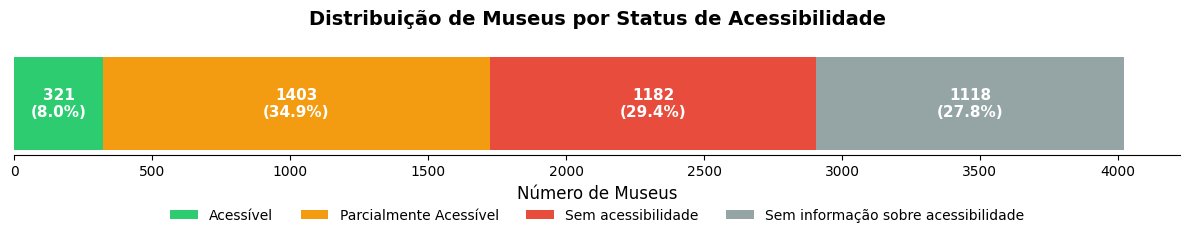


Resumo dos dados:
------------------------------------------------------------
Acessível                     :   321 museus (  8.0%)
Parcialmente Acessível        :  1403 museus ( 34.9%)
Sem acessibilidade            :  1182 museus ( 29.4%)
Sem informação sobre acessibilidade:  1118 museus ( 27.8%)
------------------------------------------------------------
TOTAL                         :  4024 museus (100.0%)


In [4]:
# Contar museus por Status de Acessibilidade
acessibilidade_counts = df['Status de Acessibilidade'].value_counts()

# Definir a ordem desejada
ordem = ["Acessível", "Parcialmente Acessível", "Sem acessibilidade", "Sem informação sobre acessibilidade"]

# Reordenar os dados conforme a ordem especificada
acessibilidade_ordenado = acessibilidade_counts.reindex(ordem, fill_value=0)

# Calcular as porcentagens
total = acessibilidade_ordenado.sum()
percentuais = (acessibilidade_ordenado / total * 100).round(1)

# Criar o gráfico
fig, ax = plt.subplots(figsize=(12, 3))

# Criar as barras empilhadas horizontalmente
left = 0
colors = ['#2ecc71', '#f39c12', '#e74c3c', '#95a5a6']

for i, (categoria, valor) in enumerate(acessibilidade_ordenado.items()):
    percentual = percentuais[categoria]
    ax.barh(0, valor, left=left, color=colors[i], label=categoria, height=0.5)
    
    # Adicionar o texto com valor e porcentagem no centro de cada barra
    ax.text(left + valor/2, 0, f'{valor}\n({percentual}%)', 
            ha='center', va='center', fontsize=11, fontweight='bold', color='white')
    
    left += valor

# Configurações do gráfico
ax.set_yticks([])
ax.set_xlabel('Número de Museus', fontsize=12)
ax.set_title('Distribuição de Museus por Status de Acessibilidade', fontsize=14, fontweight='bold', pad=20)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.4), ncol=4, frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

# Mostrar também os dados em formato de tabela
print("\nResumo dos dados:")
print("-" * 60)
for categoria in ordem:
    valor = acessibilidade_ordenado[categoria]
    percentual = percentuais[categoria]
    print(f"{categoria:30s}: {valor:5d} museus ({percentual:5.1f}%)")
print("-" * 60)
print(f"{'TOTAL':30s}: {total:5d} museus (100.0%)")

### 8.1.2 - Por esfera

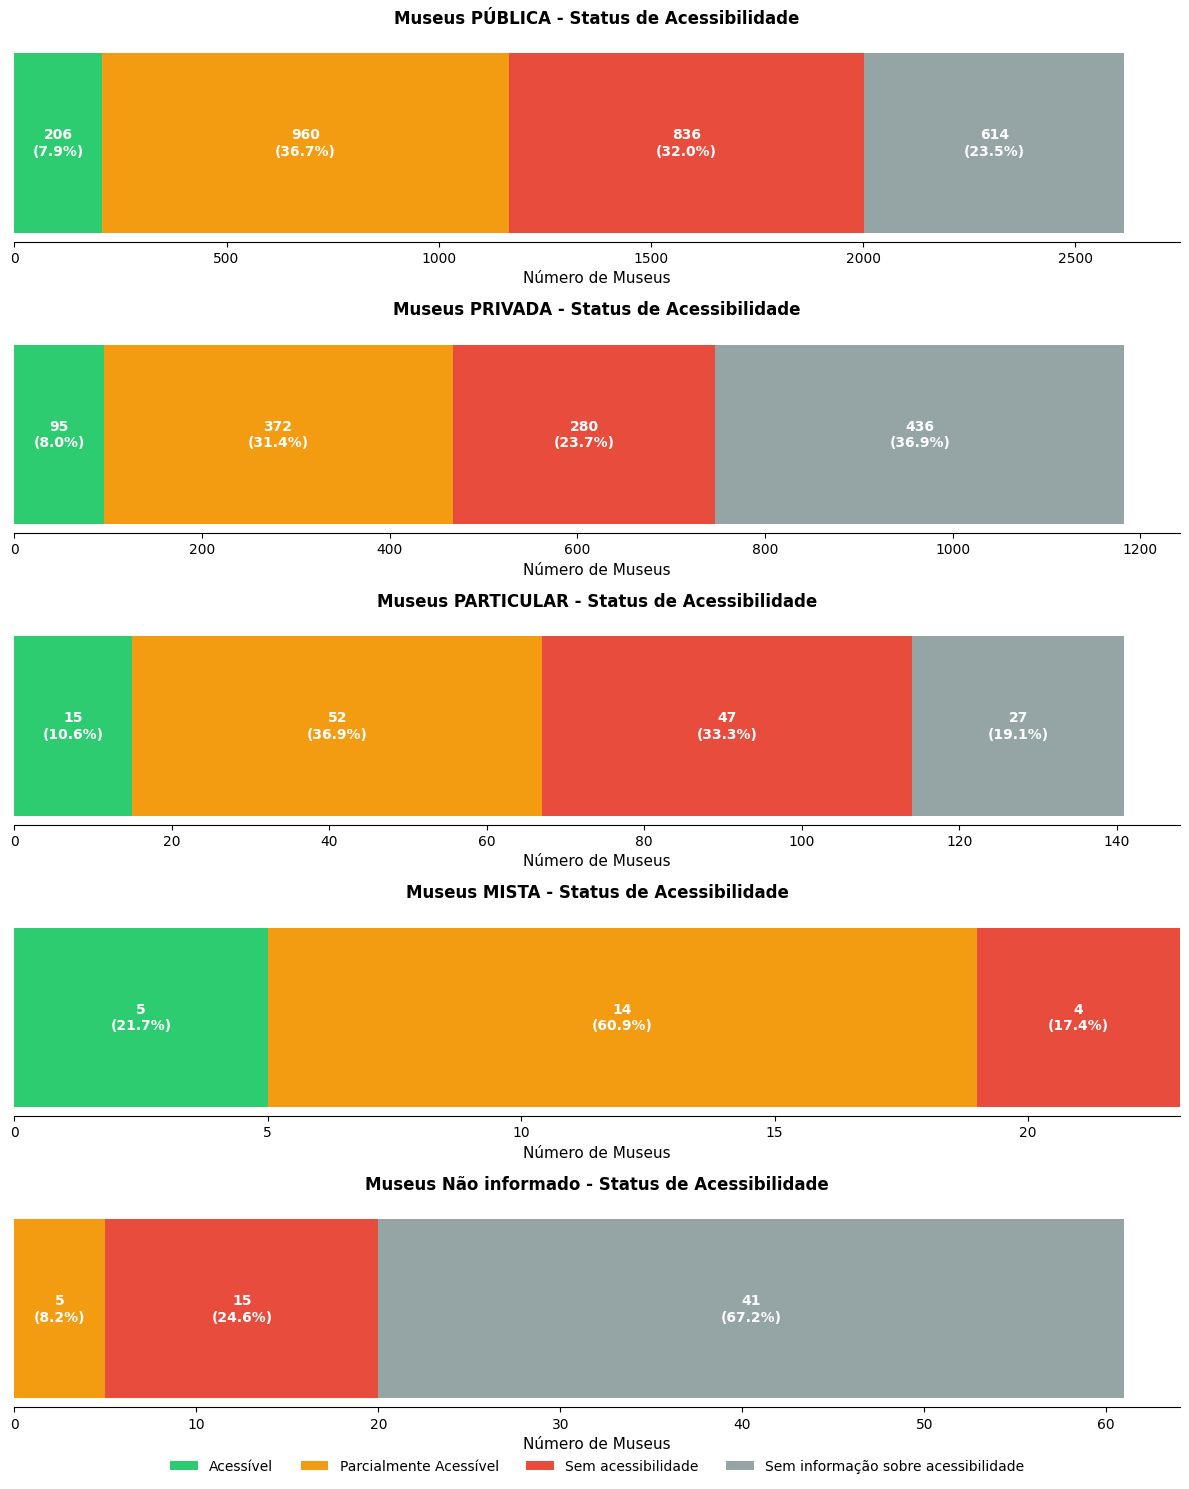


MUSEUS PÚBLICA
Acessível                     :   206 museus (  7.9%)
Parcialmente Acessível        :   960 museus ( 36.7%)
Sem acessibilidade            :   836 museus ( 32.0%)
Sem informação sobre acessibilidade:   614 museus ( 23.5%)
----------------------------------------------------------------------
TOTAL                         :  2616 museus (100.0%)

MUSEUS PRIVADA
Acessível                     :    95 museus (  8.0%)
Parcialmente Acessível        :   372 museus ( 31.4%)
Sem acessibilidade            :   280 museus ( 23.7%)
Sem informação sobre acessibilidade:   436 museus ( 36.9%)
----------------------------------------------------------------------
TOTAL                         :  1183 museus (100.0%)

MUSEUS PARTICULAR
Acessível                     :    15 museus ( 10.6%)
Parcialmente Acessível        :    52 museus ( 36.9%)
Sem acessibilidade            :    47 museus ( 33.3%)
Sem informação sobre acessibilidade:    27 museus ( 19.1%)
------------------------------------

In [6]:
# Definir a ordem desejada para acessibilidade
ordem = ["Acessível", "Parcialmente Acessível", "Sem acessibilidade", "Sem informação sobre acessibilidade"]
colors = ['#2ecc71', '#f39c12', '#e74c3c', '#95a5a6']

# Obter todos os valores únicos da coluna 'Esfera'
esferas = df['Esfera'].dropna().unique()

# Criar figura com número de subplots igual ao número de esferas
fig, axes = plt.subplots(len(esferas), 1, figsize=(12, 3 * len(esferas)))
if len(esferas) == 1:
    axes = [axes]  # Garantir que axes seja uma lista mesmo com 1 esfera

# Função para criar cada gráfico
def criar_grafico_acessibilidade(data, ax, titulo):
    acessibilidade_counts = data['Status de Acessibilidade'].value_counts()
    acessibilidade_ordenado = acessibilidade_counts.reindex(ordem, fill_value=0)
    
    total = acessibilidade_ordenado.sum()
    percentuais = (acessibilidade_ordenado / total * 100).round(1) if total > 0 else acessibilidade_ordenado * 0

    left = 0
    for i, (categoria, valor) in enumerate(acessibilidade_ordenado.items()):
        percentual = percentuais[categoria]
        ax.barh(0, valor, left=left, color=colors[i], label=categoria, height=0.5)
        if valor > 0:
            ax.text(left + valor/2, 0, f'{valor}\n({percentual}%)',
                    ha='center', va='center', fontsize=10, fontweight='bold', color='white')
        left += valor

    ax.set_yticks([])
    ax.set_xlabel('Número de Museus', fontsize=11)
    ax.set_title(titulo, fontsize=12, fontweight='bold', pad=15)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    return total, acessibilidade_ordenado, percentuais

# Criar gráficos para cada esfera
resultados = {}
for i, esfera in enumerate(esferas):
    df_esfera = df[df['Esfera'] == esfera]
    total, dados, perc = criar_grafico_acessibilidade(
        df_esfera, axes[i], f"Museus {esfera} - Status de Acessibilidade"
    )
    resultados[esfera] = (total, dados, perc)

# Adicionar legenda apenas no último gráfico
axes[-1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=4, frameon=False)

plt.tight_layout()
plt.show()

# Mostrar os dados em formato de tabela
for esfera, (total, dados, perc) in resultados.items():
    print("\n" + "="*70)
    print(f"MUSEUS {esfera}")
    print("="*70)
    for categoria in ordem:
        valor = dados[categoria]
        percentual = perc[categoria]
        print(f"{categoria:30s}: {valor:5d} museus ({percentual:5.1f}%)")
    print("-" * 70)
    print(f"{'TOTAL':30s}: {total:5d} museus (100.0%)")


### 8.1.3 - Por Estado

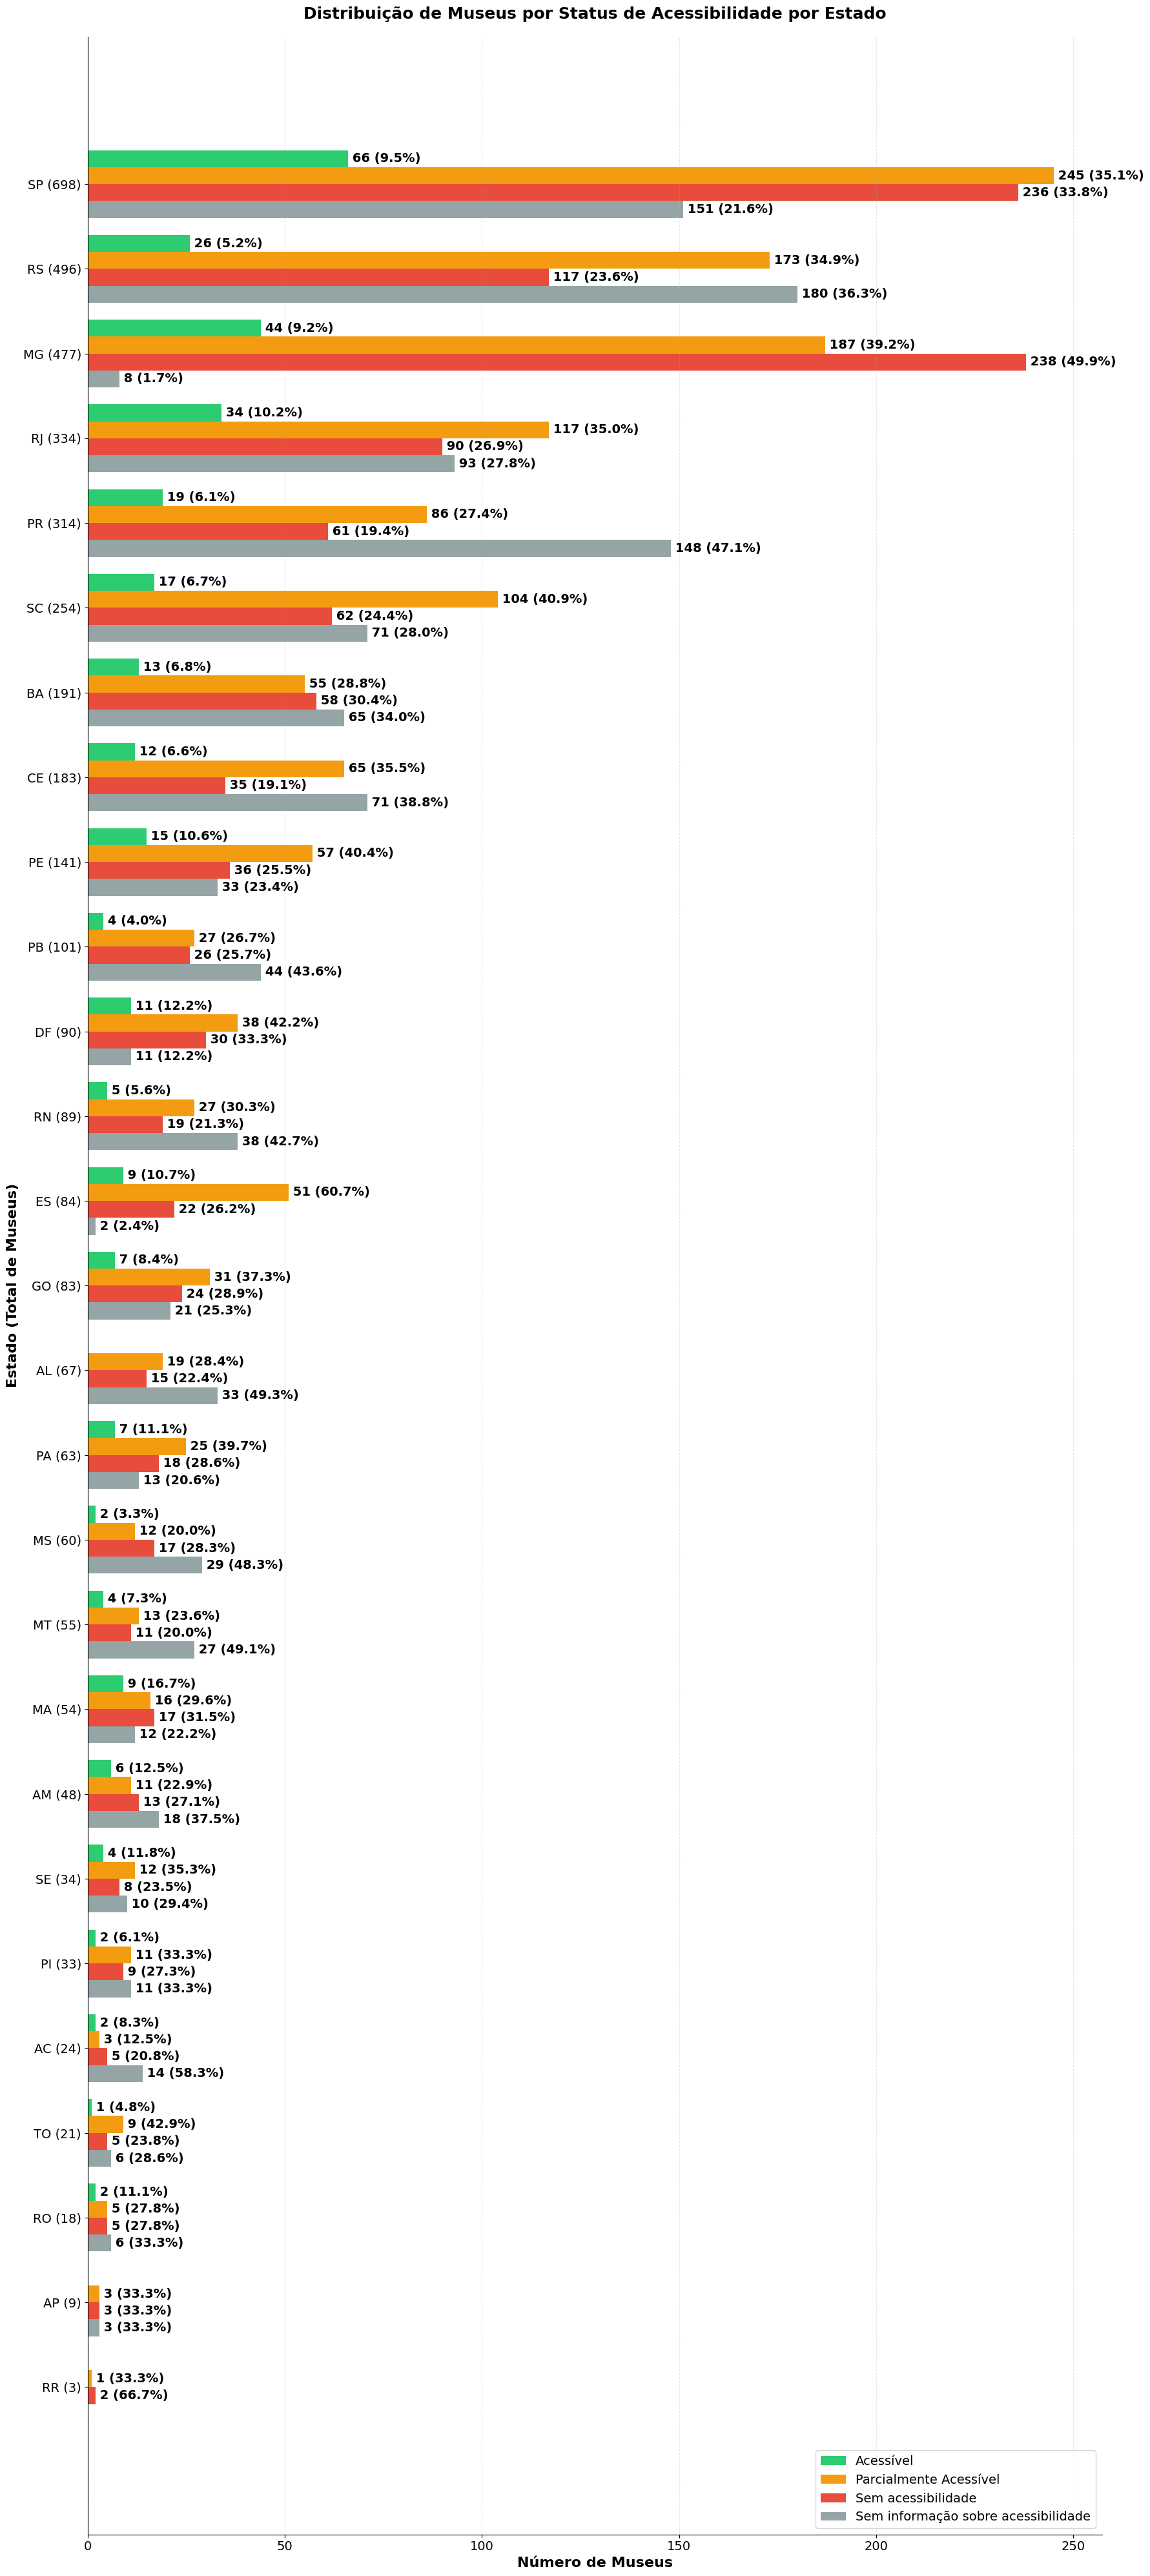


RESUMO POR ESTADO (ordenado por total de museus)
Estado   Total    Acessível            Parc. Acess.         Sem Recursos         Info Insuf.         
------------------------------------------------------------------------------------------
SP       698      66 (9.5%)         245 (35.1%)         236 (33.8%)         151 (21.6%)
RS       496      26 (5.2%)         173 (34.9%)         117 (23.6%)         180 (36.3%)
MG       477      44 (9.2%)         187 (39.2%)         238 (49.9%)         8 (1.7%)
RJ       334      34 (10.2%)         117 (35.0%)         90 (26.9%)         93 (27.8%)
PR       314      19 (6.1%)         86 (27.4%)         61 (19.4%)         148 (47.1%)
SC       254      17 (6.7%)         104 (40.9%)         62 (24.4%)         71 (28.0%)
BA       191      13 (6.8%)         55 (28.8%)         58 (30.4%)         65 (34.0%)
CE       183      12 (6.6%)         65 (35.5%)         35 (19.1%)         71 (38.8%)
PE       141      15 (10.6%)         57 (40.4%)         36 (25.5%) 

In [7]:
# Definir a ordem desejada para acessibilidade
ordem = ["Acessível", "Parcialmente Acessível", "Sem acessibilidade", "Sem informação sobre acessibilidade"]
colors = ['#2ecc71', '#f39c12', '#e74c3c', '#95a5a6']

# Contar total de museus por estado e ordenar
estados_totais = df['Estado'].value_counts().sort_values(ascending=True)  # Ascending para ficar melhor no gráfico horizontal
lista_estados = estados_totais.index.tolist()

# Criar matriz de dados para o gráfico
dados_matriz = []
percentuais_matriz = []
for estado in lista_estados:
    df_estado = df[df['Estado'] == estado]
    total_estado = len(df_estado)
    acessibilidade_counts = df_estado['Status de Acessibilidade'].value_counts()
    acessibilidade_ordenado = acessibilidade_counts.reindex(ordem, fill_value=0)
    
    # Calcular porcentagens
    percentuais = (acessibilidade_ordenado / total_estado * 100).round(1)
    
    dados_matriz.append(acessibilidade_ordenado.values)
    percentuais_matriz.append(percentuais.values)

dados_matriz = np.array(dados_matriz).T  # Transpor para ter categorias nas linhas
percentuais_matriz = np.array(percentuais_matriz).T

# Criar labels dos estados com total de museus
labels_estados = [f'{estado} ({estados_totais[estado]})' for estado in lista_estados]

# Configurar posições das barras com maior espaçamento
y = np.arange(len(lista_estados)) * 4
height = 0.8  # Altura de cada barra
# Ordem: Acessível (topo), Parcialmente Acessível, Sem Recursos, Informação Insuficiente (base)
positions = [y + 1.5*height, y + 0.5*height, y - 0.5*height, y - 1.5*height]

# Criar o gráfico com tamanho ainda maior
fig, ax = plt.subplots(figsize=(18, 40))

# Criar as barras agrupadas horizontais
for i, (categoria, pos) in enumerate(zip(ordem, positions)):
    bars = ax.barh(pos, dados_matriz[i], height, label=categoria, color=colors[i])
    
    # Adicionar valores e porcentagens ao final de cada barra
    for j, bar in enumerate(bars):
        width = bar.get_width()
        if width > 0:
            percentual = percentuais_matriz[i][j]
            ax.text(width, bar.get_y() + bar.get_height()/2.,
                    f' {int(width)} ({percentual}%)',
                    ha='left', va='center', fontsize=14, fontweight='bold')

# Configurações do gráfico
ax.set_ylabel('Estado (Total de Museus)', fontsize=16, fontweight='bold')
ax.set_xlabel('Número de Museus', fontsize=16, fontweight='bold')
ax.set_title('Distribuição de Museus por Status de Acessibilidade por Estado', 
             fontsize=18, fontweight='bold', pad=20)
ax.set_yticks(y)
ax.set_yticklabels(labels_estados, fontsize=14)
ax.tick_params(axis='x', labelsize=14)
ax.legend(loc='lower right', frameon=True, fontsize=14)
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# Mostrar também os dados em formato de tabela
print("\n" + "="*90)
print("RESUMO POR ESTADO (ordenado por total de museus)")
print("="*90)
print(f"{'Estado':<8} {'Total':<8} {'Acessível':<20} {'Parc. Acess.':<20} {'Sem Recursos':<20} {'Info Insuf.':<20}")
print("-"*90)

for estado in reversed(lista_estados):  # Reversed para mostrar do maior para o menor
    df_estado = df[df['Estado'] == estado]
    total = len(df_estado)
    acessibilidade_counts = df_estado['Status de Acessibilidade'].value_counts()
    acessibilidade_ordenado = acessibilidade_counts.reindex(ordem, fill_value=0)
    percentuais = (acessibilidade_ordenado / total * 100).round(1)
    
    print(f"{estado:<8} {total:<8} "
          f"{acessibilidade_ordenado[ordem[0]]} ({percentuais[ordem[0]]}%){'':<8} "
          f"{acessibilidade_ordenado[ordem[1]]} ({percentuais[ordem[1]]}%){'':<8} "
          f"{acessibilidade_ordenado[ordem[2]]} ({percentuais[ordem[2]]}%){'':<8} "
          f"{acessibilidade_ordenado[ordem[3]]} ({percentuais[ordem[3]]}%)")

print("="*90)

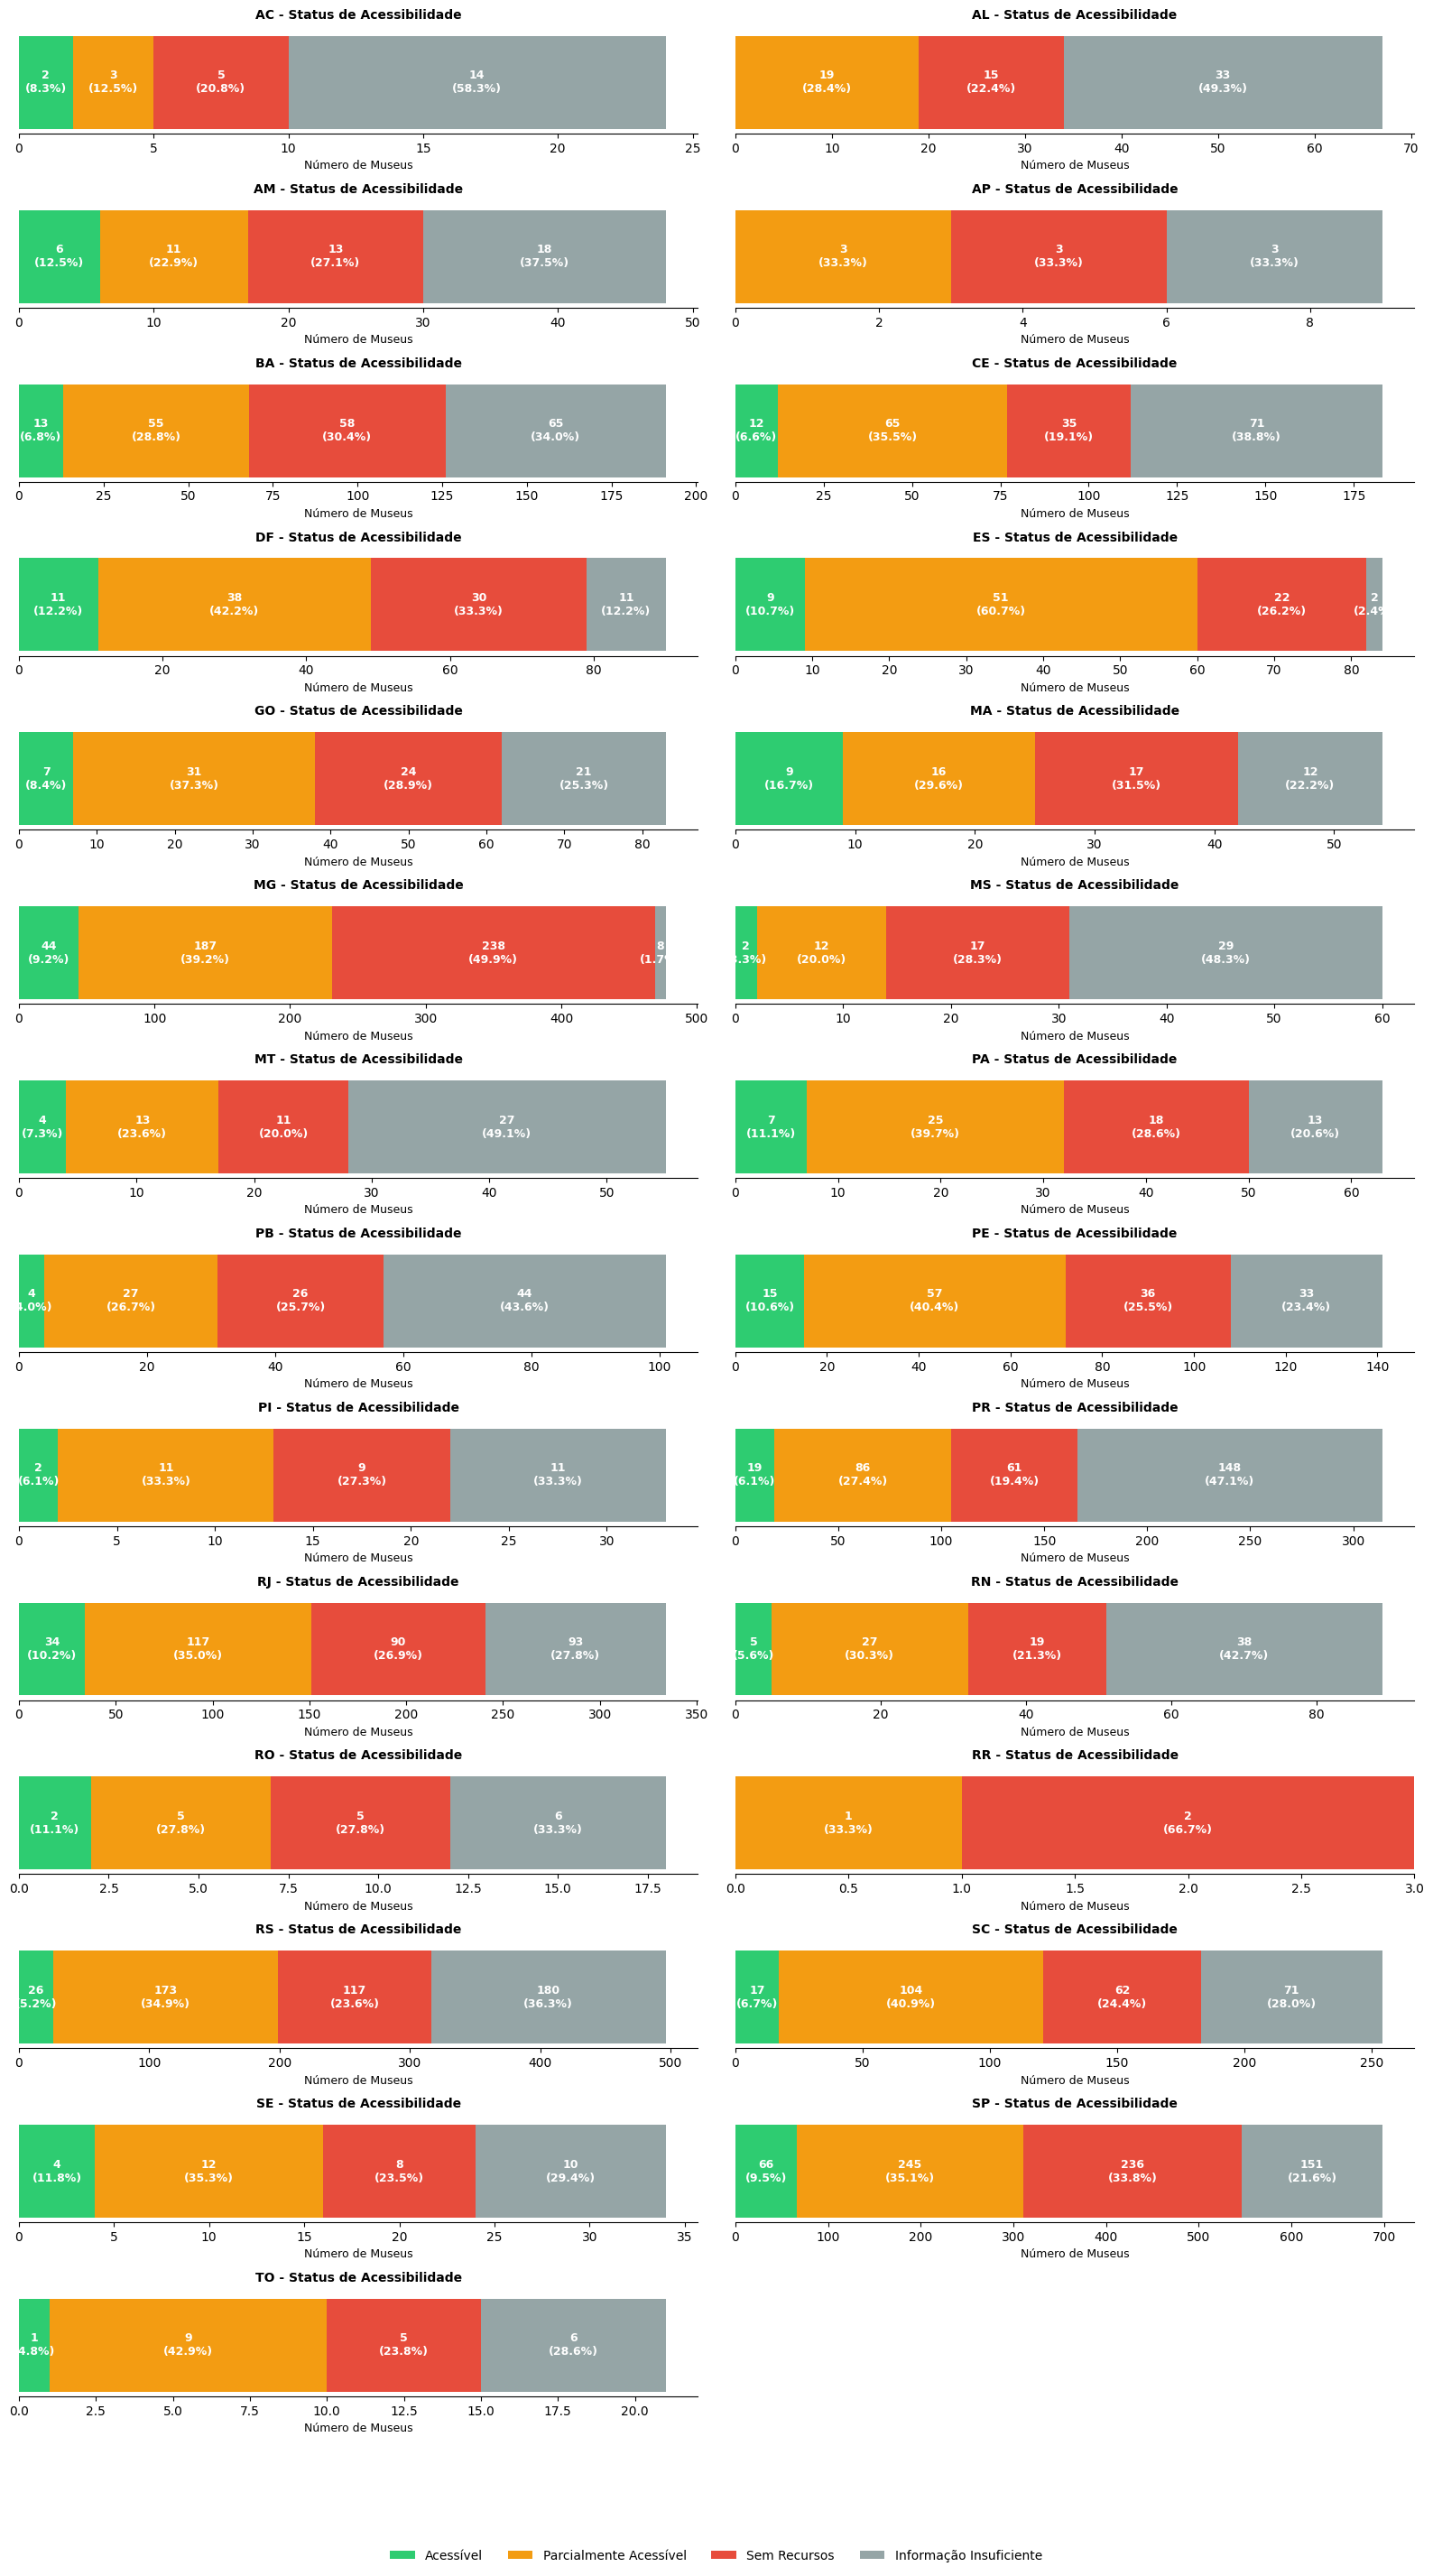

In [35]:
# Definir a ordem desejada para acessibilidade
ordem = ["Acessível", "Parcialmente Acessível", "Sem Recursos", "Informação Insuficiente"]
colors = ['#2ecc71', '#f39c12', '#e74c3c', '#95a5a6']

# Verificar quantos estados existem e quantos museus cada um tem
estados = df['Estado'].value_counts().sort_index()

# Obter lista de estados ordenada alfabeticamente
lista_estados = sorted(df['Estado'].dropna().unique())

# Calcular número de linhas necessárias (2 colunas)
n_estados = len(lista_estados)
n_cols = 2
n_rows = (n_estados + 1) // 2

# Criar figura com múltiplos subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 2))
axes = axes.flatten()  # Transformar em array 1D para facilitar iteração

# Função para criar cada gráfico
def criar_grafico_acessibilidade(data, ax, titulo):
    # Contar museus por Status de Acessibilidade
    acessibilidade_counts = data['Status de Acessibilidade'].value_counts()
    acessibilidade_ordenado = acessibilidade_counts.reindex(ordem, fill_value=0)
    
    # Calcular as porcentagens
    total = acessibilidade_ordenado.sum()
    if total > 0:
        percentuais = (acessibilidade_ordenado / total * 100).round(1)
    else:
        percentuais = acessibilidade_ordenado * 0
    
    # Criar as barras empilhadas horizontalmente
    left = 0
    for i, (categoria, valor) in enumerate(acessibilidade_ordenado.items()):
        percentual = percentuais[categoria]
        ax.barh(0, valor, left=left, color=colors[i], label=categoria, height=0.5)
        
        # Adicionar o texto com valor e porcentagem no centro de cada barra
        if valor > 0:  # Só mostrar texto se houver valor
            ax.text(left + valor/2, 0, f'{valor}\n({percentual}%)', 
                    ha='center', va='center', fontsize=9, fontweight='bold', color='white')
        
        left += valor
    
    # Configurações do gráfico
    ax.set_yticks([])
    ax.set_xlabel('Número de Museus', fontsize=9)
    ax.set_title(titulo, fontsize=10, fontweight='bold', pad=10)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    return total, acessibilidade_ordenado, percentuais

# Criar gráfico para cada estado
resultados = {}
for idx, estado in enumerate(lista_estados):
    df_estado = df[df['Estado'] == estado]
    total, dados, perc = criar_grafico_acessibilidade(
        df_estado, axes[idx], f'{estado} - Status de Acessibilidade'
    )
    resultados[estado] = (total, dados, perc)

# Esconder eixos extras se houver número ímpar de estados
for idx in range(len(lista_estados), len(axes)):
    axes[idx].axis('off')

# Adicionar legenda no final
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.02), ncol=4, frameon=False)

plt.tight_layout()
plt.subplots_adjust(bottom=0.05)
plt.show()

## 8.2 - Recursos

### 8.2.1 - Top 10

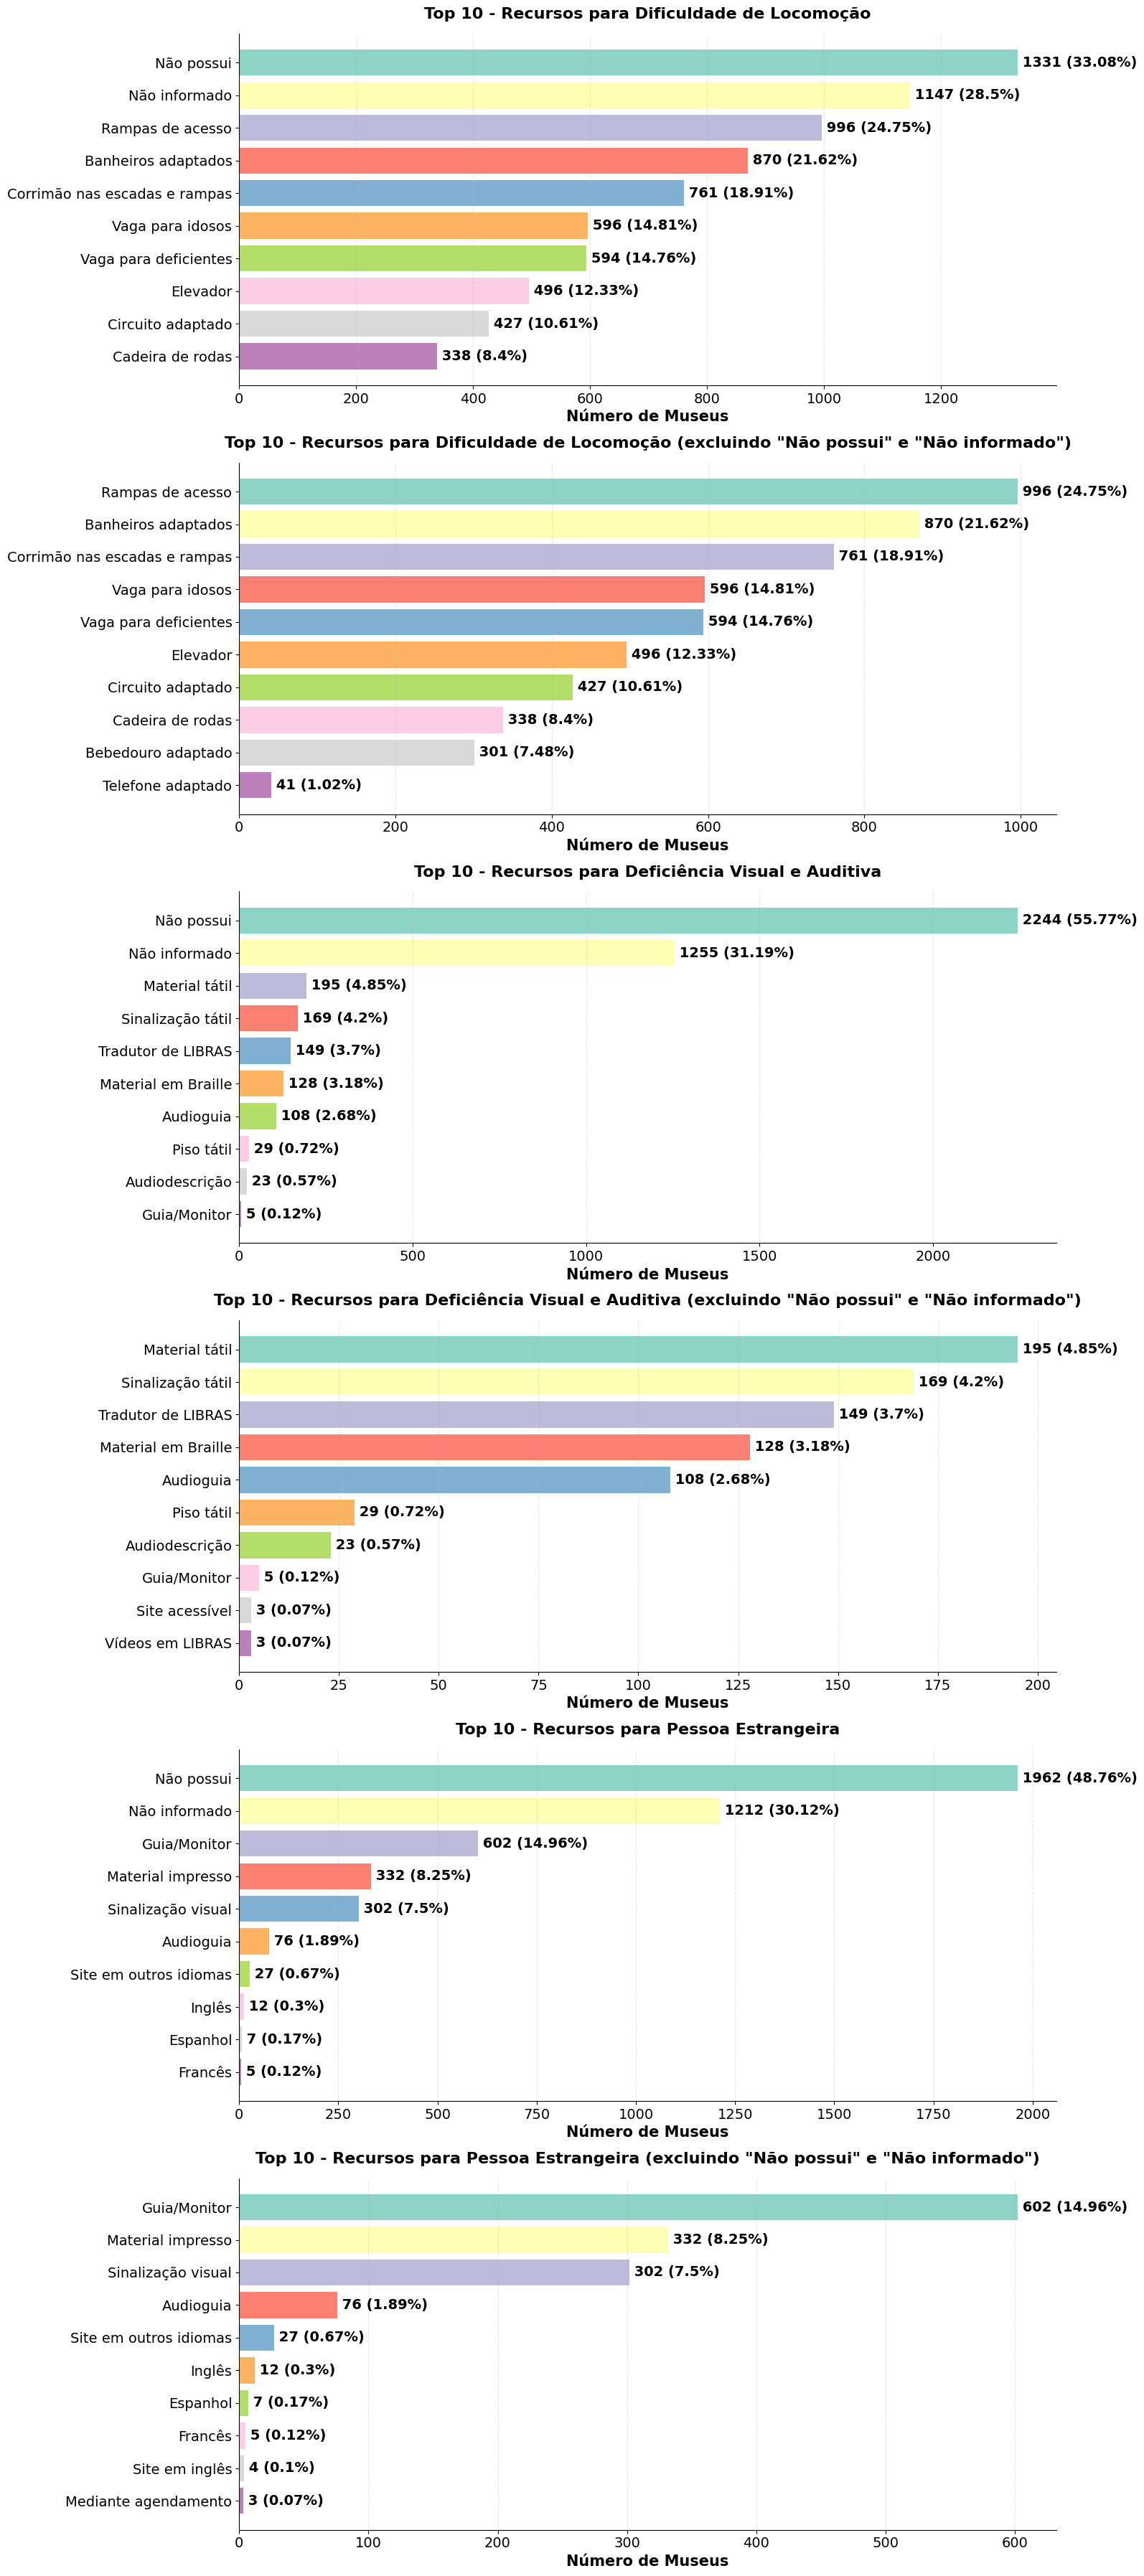


TOP 10 - RECURSOS PARA DIFICULDADE DE LOCOMOÇÃO (COMPLETO)
Posição    Recurso                                                      Quantidade      %         
----------------------------------------------------------------------------------------------------
1          Não possui                                                   1331            33.08     %
2          Não informado                                                1147            28.5      %
3          Rampas de acesso                                             996             24.75     %
4          Banheiros adaptados                                          870             21.62     %
5          Corrimão nas escadas e rampas                                761             18.91     %
6          Vaga para idosos                                             596             14.81     %
7          Vaga para deficientes                                        594             14.76     %
8          Elevador                     

In [48]:
# Função para separar e contar valores separados por vírgula
def contar_valores_separados(df, coluna, excluir_valores=None):
    # Criar uma lista com todos os valores separados
    todos_valores = []
    for valor in df[coluna].dropna():
        # Separar por vírgula e remover espaços em branco
        itens = [item.strip() for item in str(valor).split(',')]
        todos_valores.extend(itens)
    
    # Contar ocorrências
    from collections import Counter
    contagem = Counter(todos_valores)
    
    # Remover valores excluídos se especificado
    if excluir_valores:
        for valor_excluir in excluir_valores:
            contagem.pop(valor_excluir, None)
    
    # Converter para Series do pandas
    return pd.Series(contagem).sort_values(ascending=False)

# Criar figura com 6 subplots (3 originais + 3 filtrados)
fig, axes = plt.subplots(6, 1, figsize=(16, 36))

# Colunas para análise
colunas = ['Dificuldade locomoção', 'Deficiencia Visual e Auditiva', 'Pessoa Estrangeira']
titulos_completo = [
    'Top 10 - Recursos para Dificuldade de Locomoção',
    'Top 10 - Recursos para Deficiência Visual e Auditiva',
    'Top 10 - Recursos para Pessoa Estrangeira'
]
titulos_filtrado = [
    'Top 10 - Recursos para Dificuldade de Locomoção (excluindo "Não possui" e "Não informado")',
    'Top 10 - Recursos para Deficiência Visual e Auditiva (excluindo "Não possui" e "Não informado")',
    'Top 10 - Recursos para Pessoa Estrangeira (excluindo "Não possui" e "Não informado")'
]

# Cores para os gráficos
colors_palette = plt.cm.Set3(range(10))

# Armazenar resultados para tabelas
resultados_completo = {}
resultados_filtrado = {}

# Valores a excluir
valores_excluir = ['Não possui', 'Não informado']

# Criar cada par de gráficos (completo e filtrado)
for idx, coluna in enumerate(colunas):
    # GRÁFICO COMPLETO
    ax_completo = axes[idx * 2]
    valores_counts = contar_valores_separados(df, coluna).head(10)
    resultados_completo[coluna] = valores_counts
    
    # Calcular porcentagens
    total = len(df)
    percentuais = (valores_counts / total * 100).round(2)
    
    # Criar labels
    labels = []
    for valor in valores_counts.index:
        valor_texto = str(valor)
        if len(valor_texto) > 50:
            valor_texto = valor_texto[:47] + '...'
        labels.append(valor_texto)
    
    # Criar barras horizontais
    y_pos = range(len(valores_counts))
    bars = ax_completo.barh(y_pos, valores_counts.values, color=colors_palette[:len(valores_counts)])
    
    # Adicionar valores e porcentagens
    for i, (bar, count, perc) in enumerate(zip(bars, valores_counts.values, percentuais.values)):
        width = bar.get_width()
        ax_completo.text(width, bar.get_y() + bar.get_height()/2.,
                f' {int(count)} ({perc}%)',
                ha='left', va='center', fontsize=14, fontweight='bold')
    
    # Configurações do gráfico completo
    ax_completo.set_yticks(y_pos)
    ax_completo.set_yticklabels(labels, fontsize=14)
    ax_completo.set_xlabel('Número de Museus', fontsize=15, fontweight='bold')
    ax_completo.set_title(titulos_completo[idx], fontsize=16, fontweight='bold', pad=15)
    ax_completo.grid(axis='x', alpha=0.3, linestyle='--')
    ax_completo.spines['top'].set_visible(False)
    ax_completo.spines['right'].set_visible(False)
    ax_completo.tick_params(axis='x', labelsize=14)
    ax_completo.invert_yaxis()
    
    # GRÁFICO FILTRADO
    ax_filtrado = axes[idx * 2 + 1]
    valores_counts_filtrado = contar_valores_separados(df, coluna, excluir_valores=valores_excluir).head(10)
    resultados_filtrado[coluna] = valores_counts_filtrado
    
    # Calcular porcentagens
    percentuais_filtrado = (valores_counts_filtrado / total * 100).round(2)
    
    # Criar labels
    labels_filtrado = []
    for valor in valores_counts_filtrado.index:
        valor_texto = str(valor)
        if len(valor_texto) > 50:
            valor_texto = valor_texto[:47] + '...'
        labels_filtrado.append(valor_texto)
    
    # Criar barras horizontais
    y_pos_filtrado = range(len(valores_counts_filtrado))
    bars_filtrado = ax_filtrado.barh(y_pos_filtrado, valores_counts_filtrado.values, 
                                      color=colors_palette[:len(valores_counts_filtrado)])
    
    # Adicionar valores e porcentagens
    for i, (bar, count, perc) in enumerate(zip(bars_filtrado, valores_counts_filtrado.values, 
                                                 percentuais_filtrado.values)):
        width = bar.get_width()
        ax_filtrado.text(width, bar.get_y() + bar.get_height()/2.,
                f' {int(count)} ({perc}%)',
                ha='left', va='center', fontsize=14, fontweight='bold')
    
    # Configurações do gráfico filtrado
    ax_filtrado.set_yticks(y_pos_filtrado)
    ax_filtrado.set_yticklabels(labels_filtrado, fontsize=14)
    ax_filtrado.set_xlabel('Número de Museus', fontsize=15, fontweight='bold')
    ax_filtrado.set_title(titulos_filtrado[idx], fontsize=16, fontweight='bold', pad=15)
    ax_filtrado.grid(axis='x', alpha=0.3, linestyle='--')
    ax_filtrado.spines['top'].set_visible(False)
    ax_filtrado.spines['right'].set_visible(False)
    ax_filtrado.tick_params(axis='x', labelsize=14)
    ax_filtrado.invert_yaxis()

plt.tight_layout()
plt.show()

# Mostrar tabelas - VERSÃO COMPLETA
print("\n" + "="*100)
print("TOP 10 - RECURSOS PARA DIFICULDADE DE LOCOMOÇÃO (COMPLETO)")
print("="*100)
print(f"{'Posição':<10} {'Recurso':<60} {'Quantidade':<15} {'%':<10}")
print("-"*100)

valores_counts = resultados_completo['Dificuldade locomoção']
total = len(df)
for pos, (valor, count) in enumerate(valores_counts.items(), 1):
    perc = round((count / total * 100), 2)
    valor_texto = str(valor)[:57] + '...' if len(str(valor)) > 60 else str(valor)
    print(f"{pos:<10} {valor_texto:<60} {count:<15} {perc:<10}%")

print("\n" + "="*100)
print("TOP 10 - RECURSOS PARA DEFICIÊNCIA VISUAL E AUDITIVA (COMPLETO)")
print("="*100)
print(f"{'Posição':<10} {'Recurso':<60} {'Quantidade':<15} {'%':<10}")
print("-"*100)

valores_counts = resultados_completo['Deficiencia Visual e Auditiva']
for pos, (valor, count) in enumerate(valores_counts.items(), 1):
    perc = round((count / total * 100), 2)
    valor_texto = str(valor)[:57] + '...' if len(str(valor)) > 60 else str(valor)
    print(f"{pos:<10} {valor_texto:<60} {count:<15} {perc:<10}%")

print("\n" + "="*100)
print("TOP 10 - RECURSOS PARA PESSOA ESTRANGEIRA (COMPLETO)")
print("="*100)
print(f"{'Posição':<10} {'Recurso':<60} {'Quantidade':<15} {'%':<10}")
print("-"*100)

valores_counts = resultados_completo['Pessoa Estrangeira']
for pos, (valor, count) in enumerate(valores_counts.items(), 1):
    perc = round((count / total * 100), 2)
    valor_texto = str(valor)[:57] + '...' if len(str(valor)) > 60 else str(valor)
    print(f"{pos:<10} {valor_texto:<60} {count:<15} {perc:<10}%")

# Mostrar tabelas - VERSÃO FILTRADA
print("\n\n" + "="*100)
print("TOP 10 - RECURSOS PARA DIFICULDADE DE LOCOMOÇÃO (EXCLUINDO 'Não possui' e 'Não informado')")
print("="*100)
print(f"{'Posição':<10} {'Recurso':<60} {'Quantidade':<15} {'%':<10}")
print("-"*100)

valores_counts = resultados_filtrado['Dificuldade locomoção']
for pos, (valor, count) in enumerate(valores_counts.items(), 1):
    perc = round((count / total * 100), 2)
    valor_texto = str(valor)[:57] + '...' if len(str(valor)) > 60 else str(valor)
    print(f"{pos:<10} {valor_texto:<60} {count:<15} {perc:<10}%")

print("\n" + "="*100)
print("TOP 10 - RECURSOS PARA DEFICIÊNCIA VISUAL E AUDITIVA (EXCLUINDO 'Não possui' e 'Não informado')")
print("="*100)
print(f"{'Posição':<10} {'Recurso':<60} {'Quantidade':<15} {'%':<10}")
print("-"*100)

valores_counts = resultados_filtrado['Deficiencia Visual e Auditiva']
for pos, (valor, count) in enumerate(valores_counts.items(), 1):
    perc = round((count / total * 100), 2)
    valor_texto = str(valor)[:57] + '...' if len(str(valor)) > 60 else str(valor)
    print(f"{pos:<10} {valor_texto:<60} {count:<15} {perc:<10}%")

print("\n" + "="*100)
print("TOP 10 - RECURSOS PARA PESSOA ESTRANGEIRA (EXCLUINDO 'Não possui' e 'Não informado')")
print("="*100)
print(f"{'Posição':<10} {'Recurso':<60} {'Quantidade':<15} {'%':<10}")
print("-"*100)

valores_counts = resultados_filtrado['Pessoa Estrangeira']
for pos, (valor, count) in enumerate(valores_counts.items(), 1):
    perc = round((count / total * 100), 2)
    valor_texto = str(valor)[:57] + '...' if len(str(valor)) > 60 else str(valor)
    print(f"{pos:<10} {valor_texto:<60} {count:<15} {perc:<10}%")

print("="*100)

**Observação:** Alguns valores da tabela acima não batem 100% com o que é apresentado pois foram somados com outras linhas. Exemplos:
- "Tradutor de LIBRAS" com "Tradutor de LIBRAS - mediante agendamento"
- "Guia/Monitor" com "Guia que atende em inglês e espanhol"

### 8.2.2 - Por Esfera

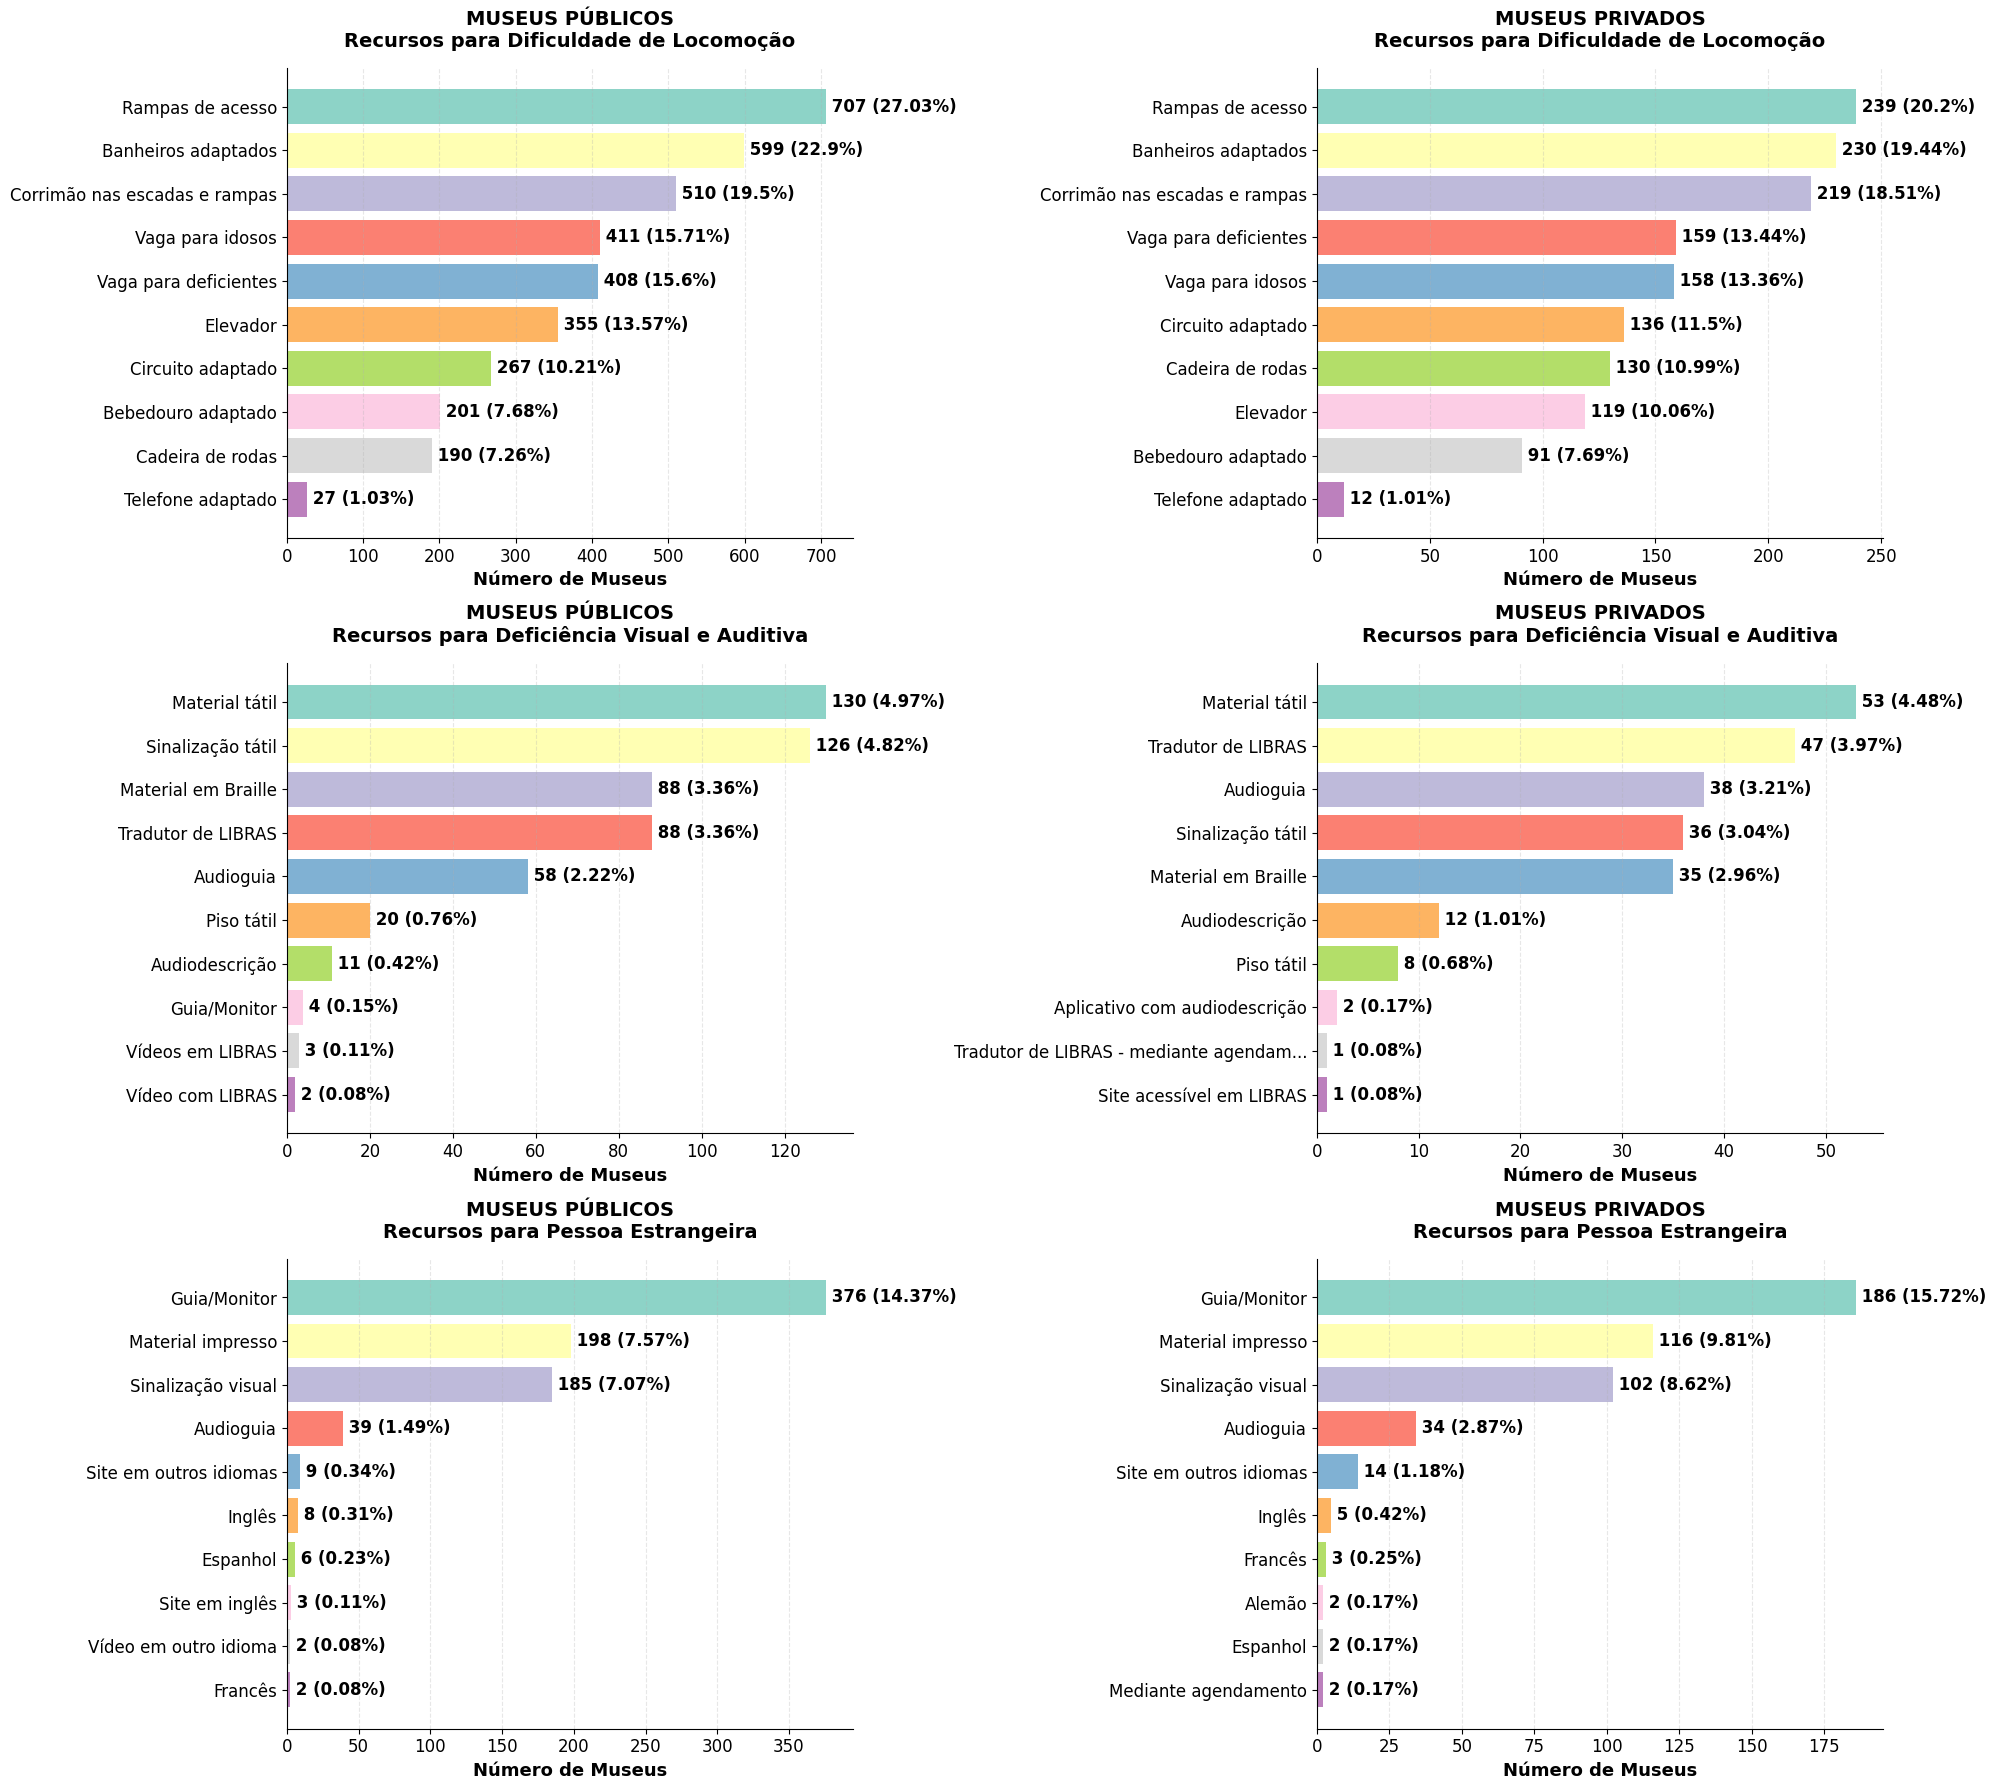


MUSEUS PÚBLICOS

----------------------------------------------------------------------------------------------------
TOP 10 - RECURSOS PARA DIFICULDADE DE LOCOMOÇÃO
----------------------------------------------------------------------------------------------------
Posição    Recurso                                                      Quantidade      %         
----------------------------------------------------------------------------------------------------
1          Rampas de acesso                                             707             27.03     %
2          Banheiros adaptados                                          599             22.9      %
3          Corrimão nas escadas e rampas                                510             19.5      %
4          Vaga para idosos                                             411             15.71     %
5          Vaga para deficientes                                        408             15.6      %
6          Elevador             

In [53]:
# Função para separar e contar valores separados por vírgula
def contar_valores_separados(df, coluna, excluir_valores=None):
    # Criar uma lista com todos os valores separados
    todos_valores = []
    for valor in df[coluna].dropna():
        # Separar por vírgula e remover espaços em branco
        itens = [item.strip() for item in str(valor).split(',')]
        todos_valores.extend(itens)
    
    # Contar ocorrências
    from collections import Counter
    contagem = Counter(todos_valores)
    
    # Remover valores excluídos se especificado
    if excluir_valores:
        for valor_excluir in excluir_valores:
            contagem.pop(valor_excluir, None)
    
    # Converter para Series do pandas
    return pd.Series(contagem).sort_values(ascending=False)

# Filtrar dados por esfera
df_publica = df[df['Esfera'] == 'PÚBLICA']
df_privada = df[df['Esfera'] == 'PRIVADA']

# Criar figura com 3 linhas e 2 colunas (6 subplots)
fig, axes = plt.subplots(3, 2, figsize=(20, 18))

# Colunas para análise
colunas = ['Dificuldade locomoção', 'Deficiencia Visual e Auditiva', 'Pessoa Estrangeira']
titulos = [
    'Recursos para Dificuldade de Locomoção',
    'Recursos para Deficiência Visual e Auditiva',
    'Recursos para Pessoa Estrangeira'
]

# Cores para os gráficos
colors_palette = plt.cm.Set3(range(10))

# Valores a excluir
valores_excluir = ['Não possui', 'Não informado']

# Armazenar resultados para tabelas
resultados_publica = {}
resultados_privada = {}

# Criar cada gráfico
for idx, (coluna, titulo) in enumerate(zip(colunas, titulos)):
    # GRÁFICO MUSEUS PÚBLICOS (coluna 0)
    ax_publica = axes[idx, 0]
    valores_counts_publica = contar_valores_separados(df_publica, coluna, excluir_valores=valores_excluir).head(10)
    resultados_publica[coluna] = valores_counts_publica
    
    # Calcular porcentagens
    total_publica = len(df_publica)
    percentuais_publica = (valores_counts_publica / total_publica * 100).round(2)
    
    # Criar labels
    labels_publica = []
    for valor in valores_counts_publica.index:
        valor_texto = str(valor)
        if len(valor_texto) > 40:
            valor_texto = valor_texto[:37] + '...'
        labels_publica.append(valor_texto)
    
    # Criar barras horizontais
    y_pos = range(len(valores_counts_publica))
    bars = ax_publica.barh(y_pos, valores_counts_publica.values, color=colors_palette[:len(valores_counts_publica)])
    
    # Adicionar valores e porcentagens
    for i, (bar, count, perc) in enumerate(zip(bars, valores_counts_publica.values, percentuais_publica.values)):
        width = bar.get_width()
        ax_publica.text(width, bar.get_y() + bar.get_height()/2.,
                f' {int(count)} ({perc}%)',
                ha='left', va='center', fontsize=12, fontweight='bold')
    
    # Configurações do gráfico público
    ax_publica.set_yticks(y_pos)
    ax_publica.set_yticklabels(labels_publica, fontsize=12)
    ax_publica.set_xlabel('Número de Museus', fontsize=13, fontweight='bold')
    ax_publica.set_title(f'MUSEUS PÚBLICOS\n{titulo}', fontsize=14, fontweight='bold', pad=15)
    ax_publica.grid(axis='x', alpha=0.3, linestyle='--')
    ax_publica.spines['top'].set_visible(False)
    ax_publica.spines['right'].set_visible(False)
    ax_publica.tick_params(axis='x', labelsize=12)
    ax_publica.invert_yaxis()
    
    # GRÁFICO MUSEUS PRIVADOS (coluna 1)
    ax_privada = axes[idx, 1]
    valores_counts_privada = contar_valores_separados(df_privada, coluna, excluir_valores=valores_excluir).head(10)
    resultados_privada[coluna] = valores_counts_privada
    
    # Calcular porcentagens
    total_privada = len(df_privada)
    percentuais_privada = (valores_counts_privada / total_privada * 100).round(2)
    
    # Criar labels
    labels_privada = []
    for valor in valores_counts_privada.index:
        valor_texto = str(valor)
        if len(valor_texto) > 40:
            valor_texto = valor_texto[:37] + '...'
        labels_privada.append(valor_texto)
    
    # Criar barras horizontais
    y_pos = range(len(valores_counts_privada))
    bars = ax_privada.barh(y_pos, valores_counts_privada.values, color=colors_palette[:len(valores_counts_privada)])
    
    # Adicionar valores e porcentagens
    for i, (bar, count, perc) in enumerate(zip(bars, valores_counts_privada.values, percentuais_privada.values)):
        width = bar.get_width()
        ax_privada.text(width, bar.get_y() + bar.get_height()/2.,
                f' {int(count)} ({perc}%)',
                ha='left', va='center', fontsize=12, fontweight='bold')
    
    # Configurações do gráfico privado
    ax_privada.set_yticks(y_pos)
    ax_privada.set_yticklabels(labels_privada, fontsize=12)
    ax_privada.set_xlabel('Número de Museus', fontsize=13, fontweight='bold')
    ax_privada.set_title(f'MUSEUS PRIVADOS\n{titulo}', fontsize=14, fontweight='bold', pad=15)
    ax_privada.grid(axis='x', alpha=0.3, linestyle='--')
    ax_privada.spines['top'].set_visible(False)
    ax_privada.spines['right'].set_visible(False)
    ax_privada.tick_params(axis='x', labelsize=12)
    ax_privada.invert_yaxis()

plt.tight_layout()
plt.show()

# Mostrar tabelas - MUSEUS PÚBLICOS
print("\n" + "="*100)
print("MUSEUS PÚBLICOS")
print("="*100)

for coluna, titulo in zip(colunas, titulos):
    print("\n" + "-"*100)
    print(f"TOP 10 - {titulo.upper()}")
    print("-"*100)
    print(f"{'Posição':<10} {'Recurso':<60} {'Quantidade':<15} {'%':<10}")
    print("-"*100)
    
    valores_counts = resultados_publica[coluna]
    total_publica = len(df_publica)
    for pos, (valor, count) in enumerate(valores_counts.items(), 1):
        perc = round((count / total_publica * 100), 2)
        valor_texto = str(valor)[:57] + '...' if len(str(valor)) > 60 else str(valor)
        print(f"{pos:<10} {valor_texto:<60} {count:<15} {perc:<10}%")

# Mostrar tabelas - MUSEUS PRIVADOS
print("\n\n" + "="*100)
print("MUSEUS PRIVADOS")
print("="*100)

for coluna, titulo in zip(colunas, titulos):
    print("\n" + "-"*100)
    print(f"TOP 10 - {titulo.upper()}")
    print("-"*100)
    print(f"{'Posição':<10} {'Recurso':<60} {'Quantidade':<15} {'%':<10}")
    print("-"*100)
    
    valores_counts = resultados_privada[coluna]
    total_privada = len(df_privada)
    for pos, (valor, count) in enumerate(valores_counts.items(), 1):
        perc = round((count / total_privada * 100), 2)
        valor_texto = str(valor)[:57] + '...' if len(str(valor)) > 60 else str(valor)
        print(f"{pos:<10} {valor_texto:<60} {count:<15} {perc:<10}%")

print("="*100)
print(f"\nTotal de Museus Públicos: {len(df_publica)}")
print(f"Total de Museus Privados: {len(df_privada)}")

## 8.3 - Museus sem recursos e informação

### 8.3.1 - Por esfera

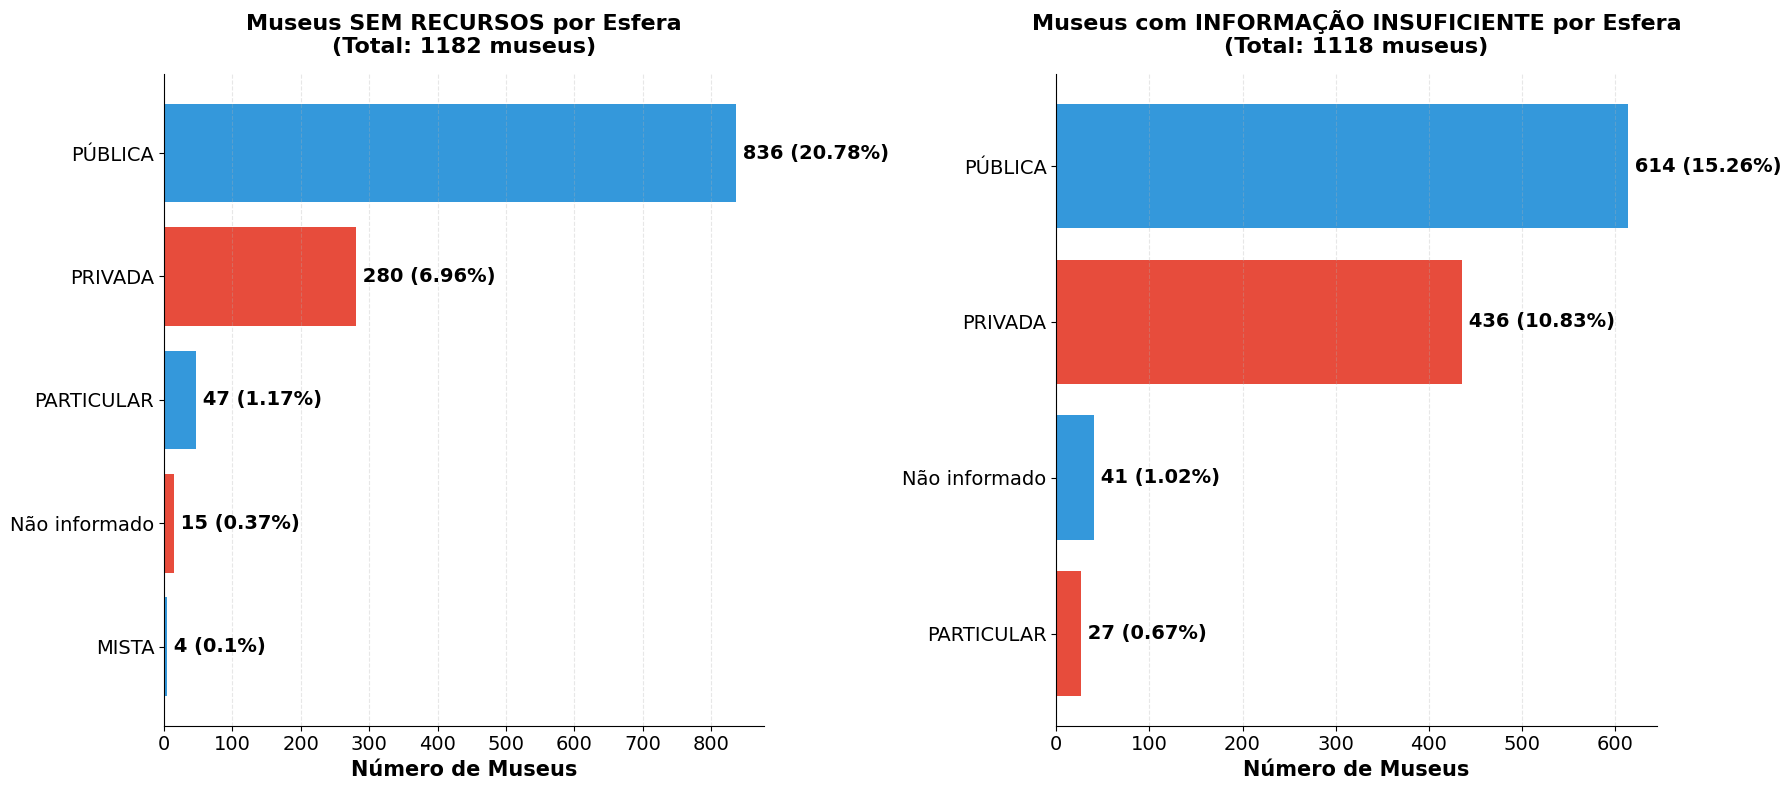


MUSEUS SEM RECURSOS POR ESFERA
Esfera               Quantidade      % do Total     
--------------------------------------------------------------------------------
PÚBLICA              836             20.78          %
PRIVADA              280             6.96           %
PARTICULAR           47              1.17           %
Não informado        15              0.37           %
MISTA                4               0.1            %
--------------------------------------------------------------------------------
TOTAL                1182            29.37          %

MUSEUS COM INFORMAÇÃO INSUFICIENTE POR ESFERA
Esfera               Quantidade      % do Total     
--------------------------------------------------------------------------------
PÚBLICA              614             15.26          %
PRIVADA              436             10.83          %
Não informado        41              1.02           %
PARTICULAR           27              0.67           %
--------------------------------

In [58]:
# Filtrar museus por status de acessibilidade
df_sem_recursos = df[df['Status de Acessibilidade'] == 'Sem acessibilidade']
df_info_insuficiente = df[df['Status de Acessibilidade'] == 'Sem informação sobre acessibilidade']

# Contar por esfera
sem_recursos_por_esfera = df_sem_recursos['Esfera'].value_counts()
info_insuficiente_por_esfera = df_info_insuficiente['Esfera'].value_counts()

# Calcular totais
total_sem_recursos = len(df_sem_recursos)
total_info_insuficiente = len(df_info_insuficiente)
total_museus = len(df)

# Calcular porcentagens em relação ao total de museus
perc_sem_recursos = (sem_recursos_por_esfera / total_museus * 100).round(2)
perc_info_insuficiente = (info_insuficiente_por_esfera / total_museus * 100).round(2)

# Criar figura com 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Cores
colors = ['#3498db', '#e74c3c']

# GRÁFICO 1: Museus Sem Recursos
ax1 = axes[0]
esferas_sem_recursos = sem_recursos_por_esfera.index.tolist()
valores_sem_recursos = sem_recursos_por_esfera.values
y_pos_1 = range(len(esferas_sem_recursos))

bars1 = ax1.barh(y_pos_1, valores_sem_recursos, color=colors[:len(esferas_sem_recursos)])

# Adicionar valores e porcentagens
for i, (bar, esfera) in enumerate(zip(bars1, esferas_sem_recursos)):
    width = bar.get_width()
    count = valores_sem_recursos[i]
    perc = perc_sem_recursos[esfera]
    ax1.text(width, bar.get_y() + bar.get_height()/2.,
            f' {int(count)} ({perc}%)',
            ha='left', va='center', fontsize=14, fontweight='bold')

# Configurações do gráfico 1
ax1.set_yticks(y_pos_1)
ax1.set_yticklabels(esferas_sem_recursos, fontsize=14)
ax1.set_xlabel('Número de Museus', fontsize=15, fontweight='bold')
ax1.set_title(f'Museus SEM RECURSOS por Esfera\n(Total: {total_sem_recursos} museus)', 
             fontsize=16, fontweight='bold', pad=15)
ax1.grid(axis='x', alpha=0.3, linestyle='--')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(axis='x', labelsize=14)
ax1.invert_yaxis()

# GRÁFICO 2: Museus com Informação Insuficiente
ax2 = axes[1]
esferas_info_insuficiente = info_insuficiente_por_esfera.index.tolist()
valores_info_insuficiente = info_insuficiente_por_esfera.values
y_pos_2 = range(len(esferas_info_insuficiente))

bars2 = ax2.barh(y_pos_2, valores_info_insuficiente, color=colors[:len(esferas_info_insuficiente)])

# Adicionar valores e porcentagens
for i, (bar, esfera) in enumerate(zip(bars2, esferas_info_insuficiente)):
    width = bar.get_width()
    count = valores_info_insuficiente[i]
    perc = perc_info_insuficiente[esfera]
    ax2.text(width, bar.get_y() + bar.get_height()/2.,
            f' {int(count)} ({perc}%)',
            ha='left', va='center', fontsize=14, fontweight='bold')

# Configurações do gráfico 2
ax2.set_yticks(y_pos_2)
ax2.set_yticklabels(esferas_info_insuficiente, fontsize=14)
ax2.set_xlabel('Número de Museus', fontsize=15, fontweight='bold')
ax2.set_title(f'Museus com INFORMAÇÃO INSUFICIENTE por Esfera\n(Total: {total_info_insuficiente} museus)', 
             fontsize=16, fontweight='bold', pad=15)
ax2.grid(axis='x', alpha=0.3, linestyle='--')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.tick_params(axis='x', labelsize=14)
ax2.invert_yaxis()

plt.tight_layout()
plt.show()

# Mostrar tabelas com detalhes
print("\n" + "="*80)
print("MUSEUS SEM RECURSOS POR ESFERA")
print("="*80)
print(f"{'Esfera':<20} {'Quantidade':<15} {'% do Total':<15}")
print("-"*80)

for esfera in sem_recursos_por_esfera.index:
    count = sem_recursos_por_esfera[esfera]
    perc = perc_sem_recursos[esfera]
    print(f"{esfera:<20} {count:<15} {perc:<15}%")

print("-"*80)
print(f"{'TOTAL':<20} {total_sem_recursos:<15} {round(total_sem_recursos/total_museus*100, 2):<15}%")

print("\n" + "="*80)
print("MUSEUS COM INFORMAÇÃO INSUFICIENTE POR ESFERA")
print("="*80)
print(f"{'Esfera':<20} {'Quantidade':<15} {'% do Total':<15}")
print("-"*80)

for esfera in info_insuficiente_por_esfera.index:
    count = info_insuficiente_por_esfera[esfera]
    perc = perc_info_insuficiente[esfera]
    print(f"{esfera:<20} {count:<15} {perc:<15}%")

print("-"*80)
print(f"{'TOTAL':<20} {total_info_insuficiente:<15} {round(total_info_insuficiente/total_museus*100, 2):<15}%")

print("\n" + "="*80)
print(f"Total geral de museus na base: {total_museus}")
print("="*80)

### 8.3.2 - Por Estado - Comparando com o total

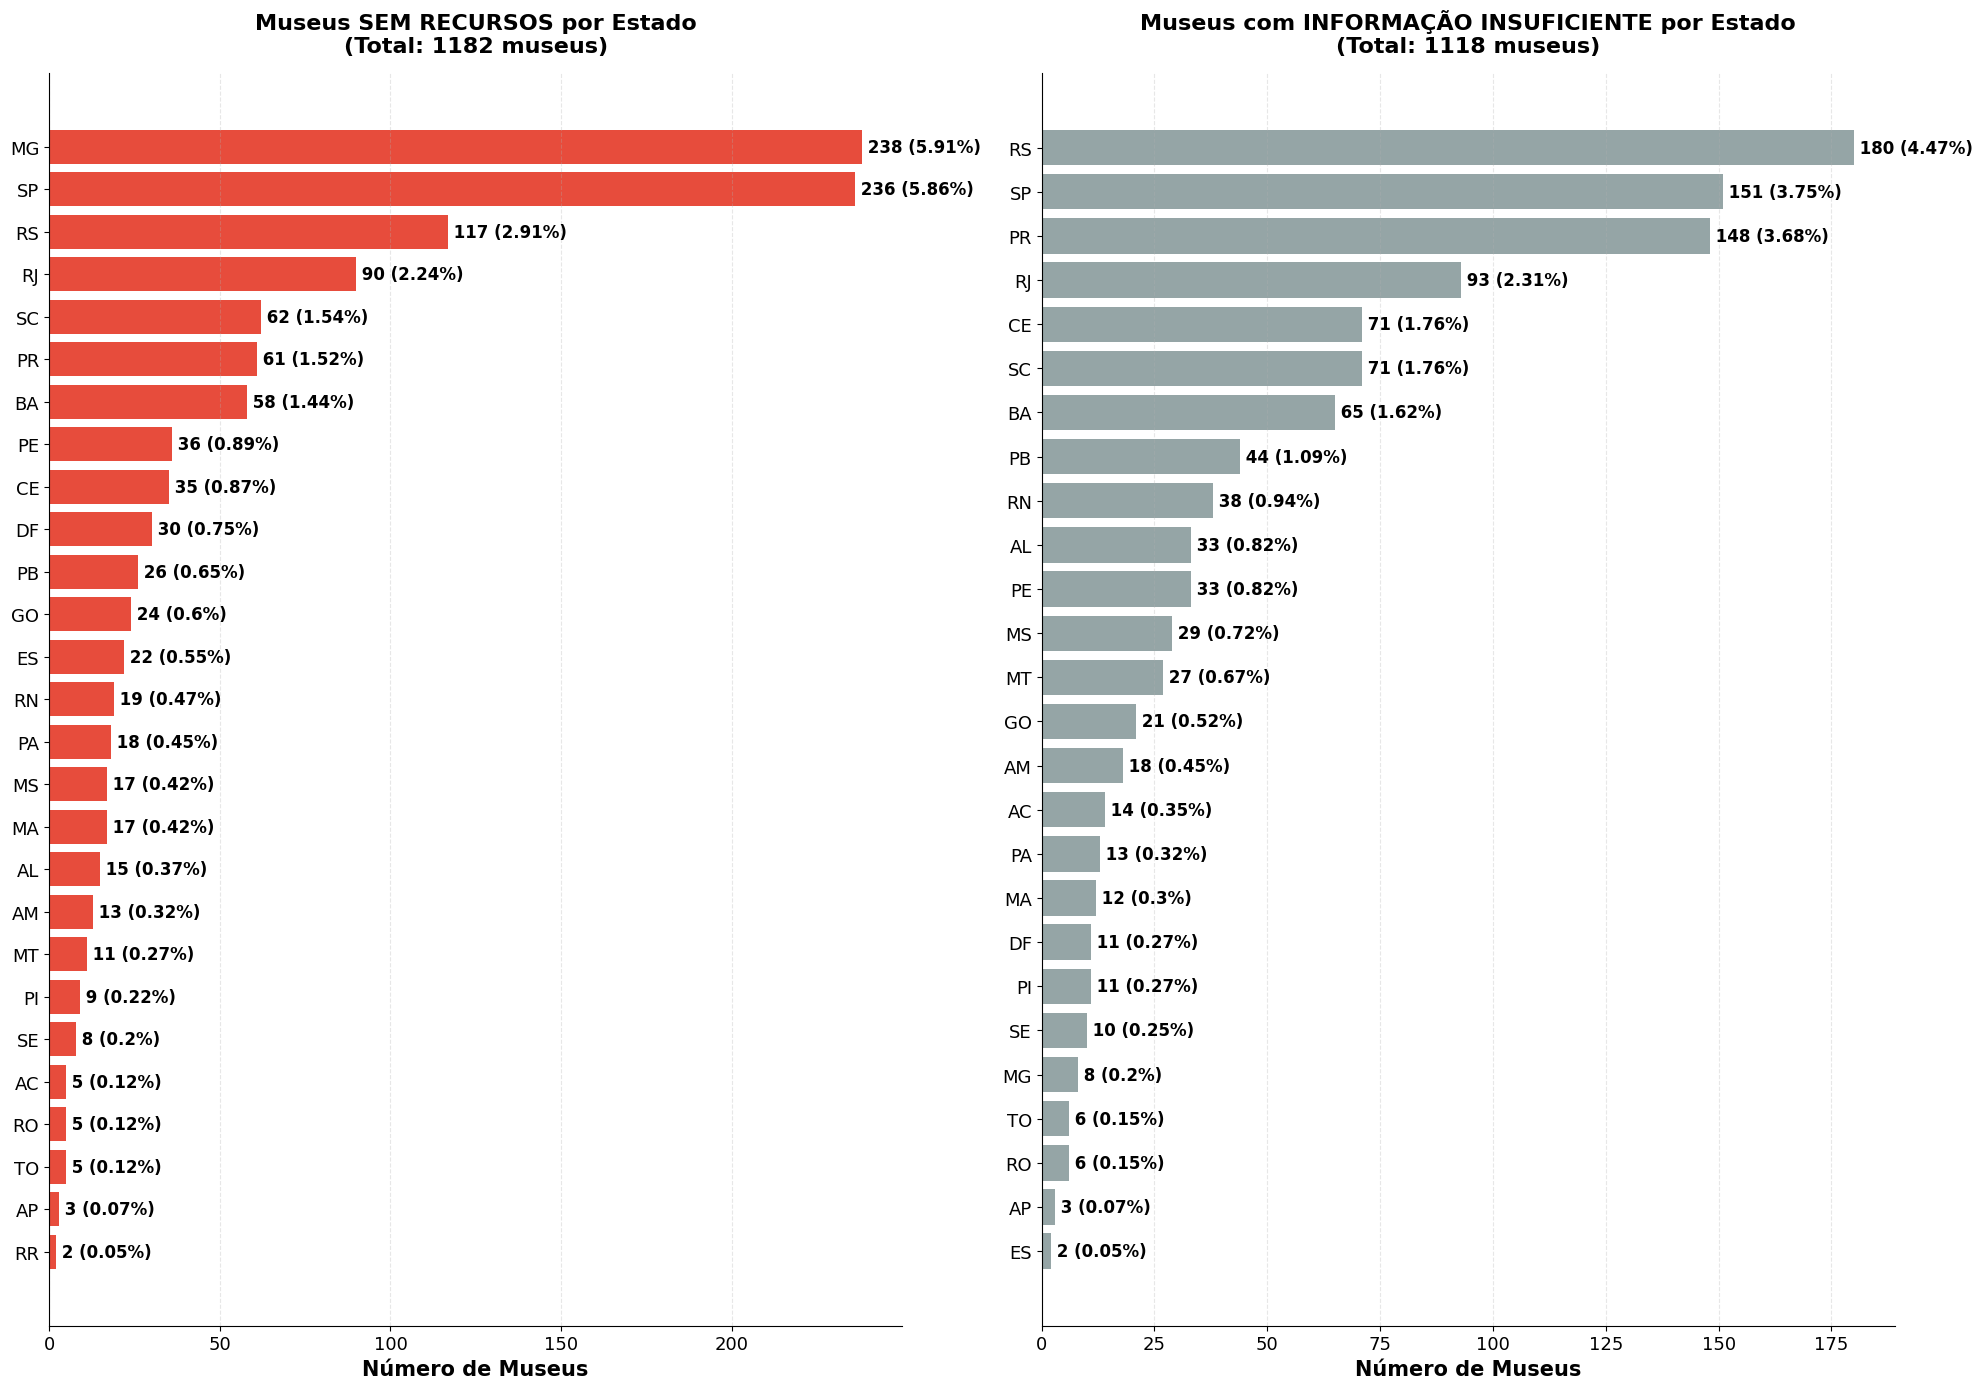


MUSEUS SEM RECURSOS POR ESTADO (ordenado do maior para o menor)
Estado     Quantidade      % do Total     
--------------------------------------------------------------------------------
MG         238             5.91           %
SP         236             5.86           %
RS         117             2.91           %
RJ         90              2.24           %
SC         62              1.54           %
PR         61              1.52           %
BA         58              1.44           %
PE         36              0.89           %
CE         35              0.87           %
DF         30              0.75           %
PB         26              0.65           %
GO         24              0.6            %
ES         22              0.55           %
RN         19              0.47           %
PA         18              0.45           %
MA         17              0.42           %
MS         17              0.42           %
AL         15              0.37           %
AM         13      

In [61]:
# Filtrar museus por status de acessibilidade
df_sem_recursos = df[df['Status de Acessibilidade'] == 'Sem acessibilidade']
df_info_insuficiente = df[df['Status de Acessibilidade'] == 'Sem informação sobre acessibilidade']


# Contar por estado e ordenar do menor para o maior (para ficar invertido no gráfico)
sem_recursos_por_estado = df_sem_recursos['Estado'].value_counts().sort_values(ascending=True)
info_insuficiente_por_estado = df_info_insuficiente['Estado'].value_counts().sort_values(ascending=True)

# Calcular totais
total_sem_recursos = len(df_sem_recursos)
total_info_insuficiente = len(df_info_insuficiente)
total_museus = len(df)

# Calcular porcentagens em relação ao total de museus
perc_sem_recursos = (sem_recursos_por_estado / total_museus * 100).round(2)
perc_info_insuficiente = (info_insuficiente_por_estado / total_museus * 100).round(2)

# Criar figura com 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 14))

# Cores únicas
cor_sem_recursos = '#e74c3c'
cor_info_insuficiente = '#95a5a6'

# GRÁFICO 1: Museus Sem Recursos
ax1 = axes[0]
estados_sem_recursos = sem_recursos_por_estado.index.tolist()
valores_sem_recursos = sem_recursos_por_estado.values
y_pos_1 = range(len(estados_sem_recursos))

bars1 = ax1.barh(y_pos_1, valores_sem_recursos, color=cor_sem_recursos)

# Adicionar valores e porcentagens
for i, (bar, estado) in enumerate(zip(bars1, estados_sem_recursos)):
    width = bar.get_width()
    count = valores_sem_recursos[i]
    perc = perc_sem_recursos[estado]
    ax1.text(width, bar.get_y() + bar.get_height()/2.,
            f' {int(count)} ({perc}%)',
            ha='left', va='center', fontsize=12, fontweight='bold')

# Configurações do gráfico 1
ax1.set_yticks(y_pos_1)
ax1.set_yticklabels(estados_sem_recursos, fontsize=13)
ax1.set_xlabel('Número de Museus', fontsize=15, fontweight='bold')
ax1.set_title(f'Museus SEM RECURSOS por Estado\n(Total: {total_sem_recursos} museus)', 
             fontsize=16, fontweight='bold', pad=15)
ax1.grid(axis='x', alpha=0.3, linestyle='--')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(axis='x', labelsize=13)

# GRÁFICO 2: Museus com Informação Insuficiente
ax2 = axes[1]
estados_info_insuficiente = info_insuficiente_por_estado.index.tolist()
valores_info_insuficiente = info_insuficiente_por_estado.values
y_pos_2 = range(len(estados_info_insuficiente))

bars2 = ax2.barh(y_pos_2, valores_info_insuficiente, color=cor_info_insuficiente)

# Adicionar valores e porcentagens
for i, (bar, estado) in enumerate(zip(bars2, estados_info_insuficiente)):
    width = bar.get_width()
    count = valores_info_insuficiente[i]
    perc = perc_info_insuficiente[estado]
    ax2.text(width, bar.get_y() + bar.get_height()/2.,
            f' {int(count)} ({perc}%)',
            ha='left', va='center', fontsize=12, fontweight='bold')

# Configurações do gráfico 2
ax2.set_yticks(y_pos_2)
ax2.set_yticklabels(estados_info_insuficiente, fontsize=13)
ax2.set_xlabel('Número de Museus', fontsize=15, fontweight='bold')
ax2.set_title(f'Museus com INFORMAÇÃO INSUFICIENTE por Estado\n(Total: {total_info_insuficiente} museus)', 
             fontsize=16, fontweight='bold', pad=15)
ax2.grid(axis='x', alpha=0.3, linestyle='--')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.tick_params(axis='x', labelsize=13)

plt.tight_layout()
plt.show()

# Mostrar tabelas com detalhes
print("\n" + "="*80)
print("MUSEUS SEM RECURSOS POR ESTADO (ordenado do maior para o menor)")
print("="*80)
print(f"{'Estado':<10} {'Quantidade':<15} {'% do Total':<15}")
print("-"*80)

# Ordenar por quantidade para exibir na tabela (maior para menor)
for estado in sem_recursos_por_estado.sort_values(ascending=False).index:
    count = sem_recursos_por_estado[estado]
    perc = perc_sem_recursos[estado]
    print(f"{estado:<10} {count:<15} {perc:<15}%")

print("-"*80)
print(f"{'TOTAL':<10} {total_sem_recursos:<15} {round(total_sem_recursos/total_museus*100, 2):<15}%")

print("\n" + "="*80)
print("MUSEUS COM INFORMAÇÃO INSUFICIENTE POR ESTADO (ordenado do maior para o menor)")
print("="*80)
print(f"{'Estado':<10} {'Quantidade':<15} {'% do Total':<15}")
print("-"*80)

# Ordenar por quantidade para exibir na tabela (maior para menor)
for estado in info_insuficiente_por_estado.sort_values(ascending=False).index:
    count = info_insuficiente_por_estado[estado]
    perc = perc_info_insuficiente[estado]
    print(f"{estado:<10} {count:<15} {perc:<15}%")

print("-"*80)
print(f"{'TOTAL':<10} {total_info_insuficiente:<15} {round(total_info_insuficiente/total_museus*100, 2):<15}%")

print("\n" + "="*80)
print(f"Total geral de museus na base: {total_museus}")
print("="*80)

### 8.3.3 - Por Estado - Comparando com os museus do estado

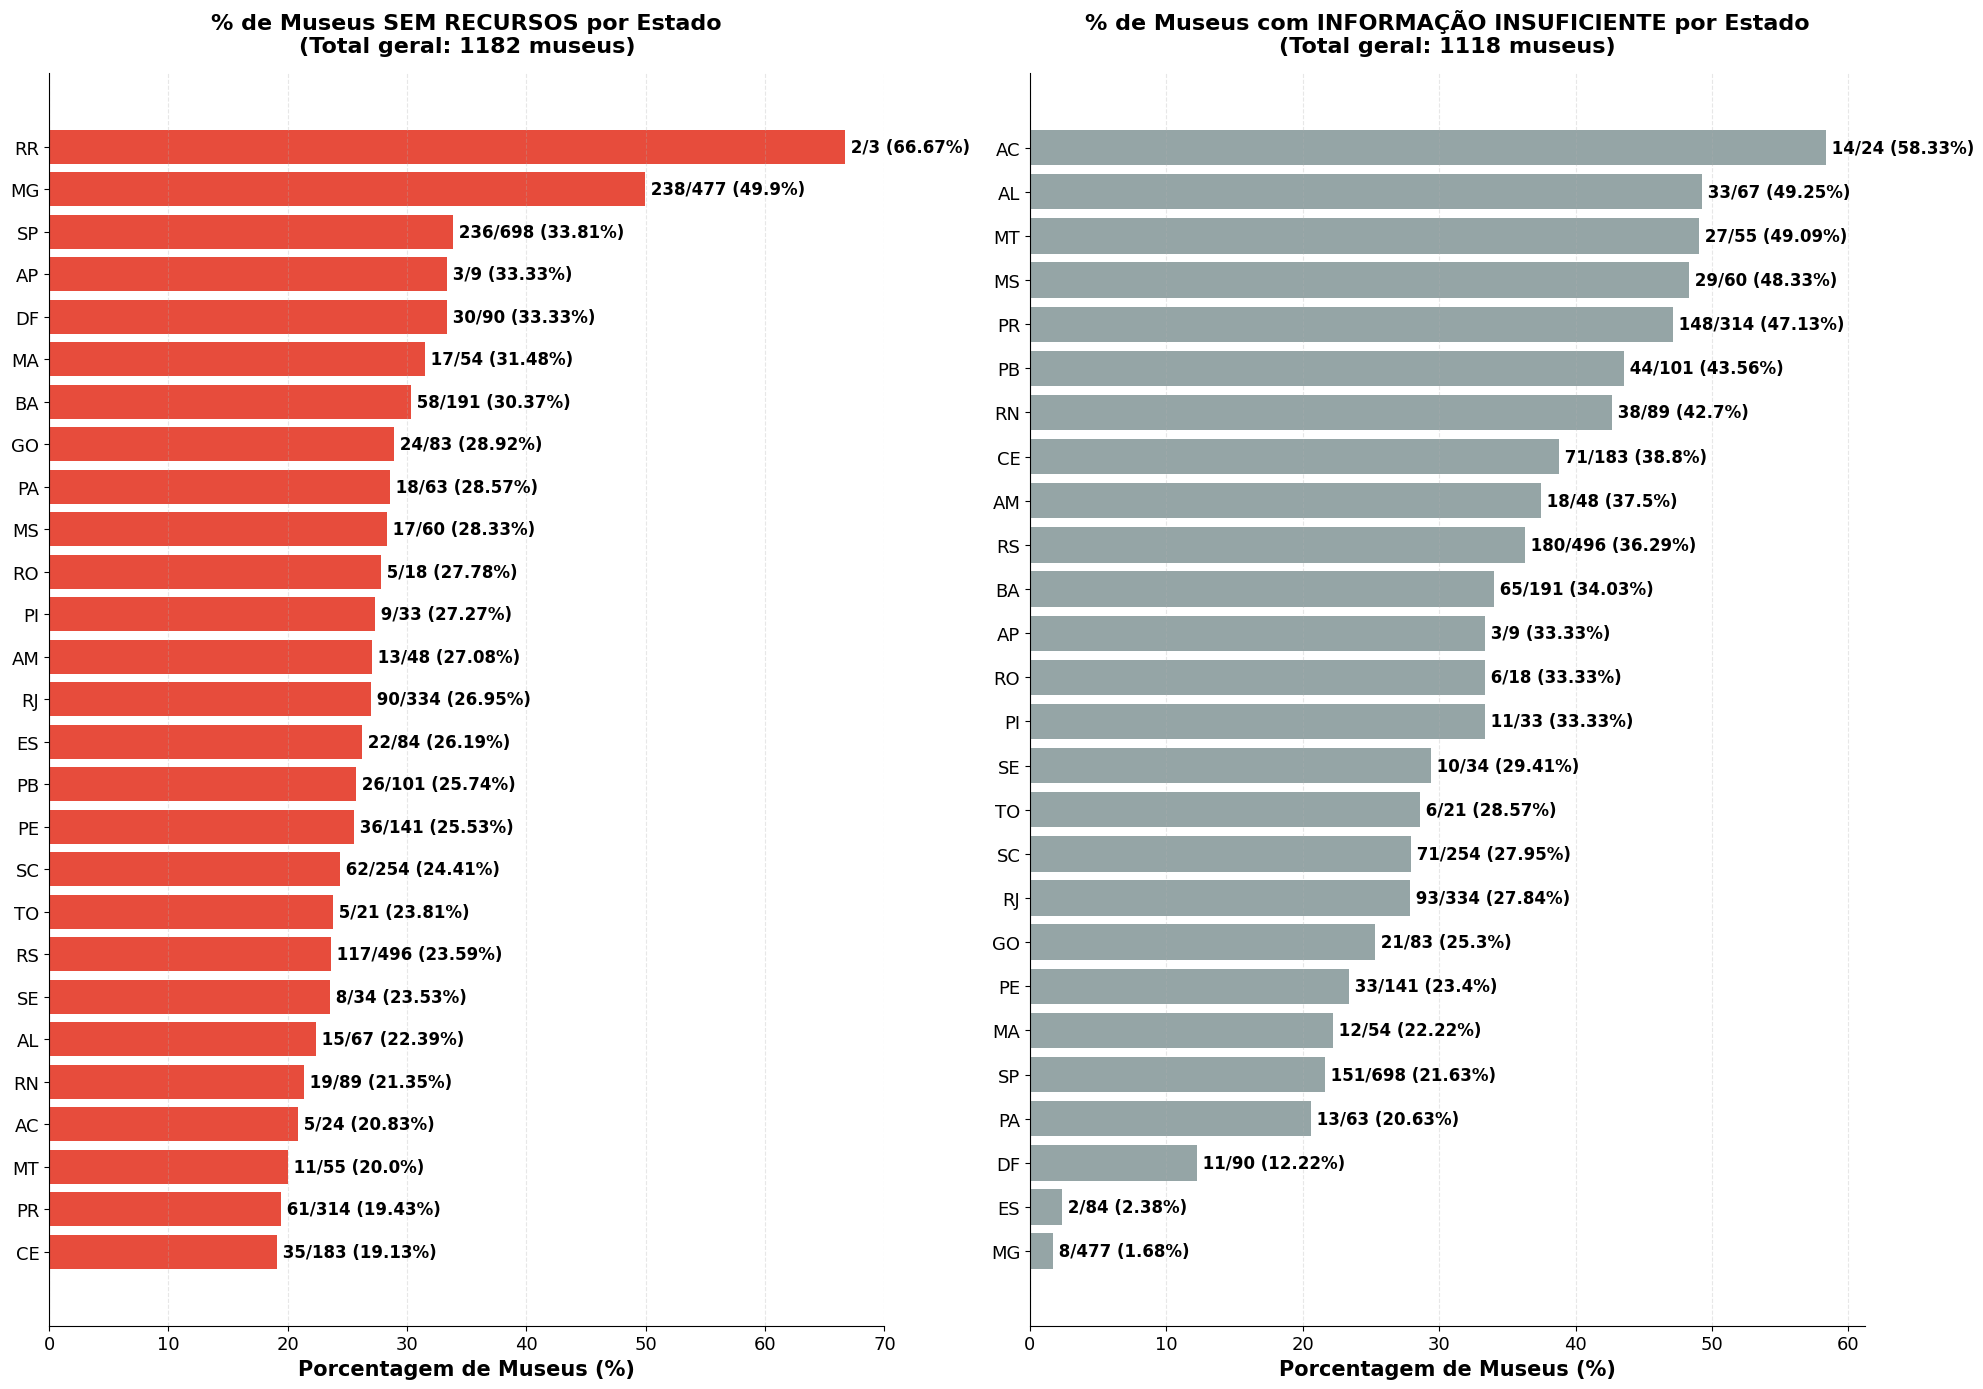


MUSEUS SEM RECURSOS POR ESTADO (ordenado do maior para o menor %)
Estado     Total Estado    Sem Recursos    %              
------------------------------------------------------------------------------------------
RR         3               2               66.67          %
MG         477             238             49.9           %
SP         698             236             33.81          %
DF         90              30              33.33          %
AP         9               3               33.33          %
MA         54              17              31.48          %
BA         191             58              30.37          %
GO         83              24              28.92          %
PA         63              18              28.57          %
MS         60              17              28.33          %
RO         18              5               27.78          %
PI         33              9               27.27          %
AM         48              13              27.08          %
RJ 

In [62]:
# Filtrar museus por status de acessibilidade
df_sem_recursos = df[df['Status de Acessibilidade'] == 'Sem acessibilidade']
df_info_insuficiente = df[df['Status de Acessibilidade'] == 'Sem informação sobre acessibilidade']

# Contar museus por estado
total_museus_por_estado = df['Estado'].value_counts()

# Contar museus sem recursos e com informação insuficiente por estado
sem_recursos_por_estado = df_sem_recursos['Estado'].value_counts()
info_insuficiente_por_estado = df_info_insuficiente['Estado'].value_counts()

# Calcular porcentagens em relação ao total de museus de cada estado
perc_sem_recursos_por_estado = {}
for estado in sem_recursos_por_estado.index:
    total_estado = total_museus_por_estado[estado]
    count = sem_recursos_por_estado[estado]
    perc_sem_recursos_por_estado[estado] = round((count / total_estado * 100), 2)

perc_info_insuficiente_por_estado = {}
for estado in info_insuficiente_por_estado.index:
    total_estado = total_museus_por_estado[estado]
    count = info_insuficiente_por_estado[estado]
    perc_info_insuficiente_por_estado[estado] = round((count / total_estado * 100), 2)

# Ordenar por porcentagem (do menor para o maior para inverter no gráfico)
estados_sem_recursos_ordenados = sorted(perc_sem_recursos_por_estado.items(), key=lambda x: x[1], reverse=False)
estados_info_insuficiente_ordenados = sorted(perc_info_insuficiente_por_estado.items(), key=lambda x: x[1], reverse=False)

# Calcular totais gerais
total_sem_recursos = len(df_sem_recursos)
total_info_insuficiente = len(df_info_insuficiente)
total_museus = len(df)

# Criar figura com 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 14))

# Cores únicas
cor_sem_recursos = '#e74c3c'
cor_info_insuficiente = '#95a5a6'

# GRÁFICO 1: Museus Sem Recursos
ax1 = axes[0]
estados_sem_recursos = [estado for estado, perc in estados_sem_recursos_ordenados]
percentuais_sem_recursos = [perc for estado, perc in estados_sem_recursos_ordenados]
y_pos_1 = range(len(estados_sem_recursos))

bars1 = ax1.barh(y_pos_1, percentuais_sem_recursos, color=cor_sem_recursos)

# Adicionar valores e porcentagens
for i, (bar, estado) in enumerate(zip(bars1, estados_sem_recursos)):
    width = bar.get_width()
    count = sem_recursos_por_estado[estado]
    total_estado = total_museus_por_estado[estado]
    perc = percentuais_sem_recursos[i]
    ax1.text(width, bar.get_y() + bar.get_height()/2.,
            f' {int(count)}/{int(total_estado)} ({perc}%)',
            ha='left', va='center', fontsize=12, fontweight='bold')

# Configurações do gráfico 1
ax1.set_yticks(y_pos_1)
ax1.set_yticklabels(estados_sem_recursos, fontsize=13)
ax1.set_xlabel('Porcentagem de Museus (%)', fontsize=15, fontweight='bold')
ax1.set_title(f'% de Museus SEM RECURSOS por Estado\n(Total geral: {total_sem_recursos} museus)', 
             fontsize=16, fontweight='bold', pad=15)
ax1.grid(axis='x', alpha=0.3, linestyle='--')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(axis='x', labelsize=13)

# GRÁFICO 2: Museus com Informação Insuficiente
ax2 = axes[1]
estados_info_insuficiente = [estado for estado, perc in estados_info_insuficiente_ordenados]
percentuais_info_insuficiente = [perc for estado, perc in estados_info_insuficiente_ordenados]
y_pos_2 = range(len(estados_info_insuficiente))

bars2 = ax2.barh(y_pos_2, percentuais_info_insuficiente, color=cor_info_insuficiente)

# Adicionar valores e porcentagens
for i, (bar, estado) in enumerate(zip(bars2, estados_info_insuficiente)):
    width = bar.get_width()
    count = info_insuficiente_por_estado[estado]
    total_estado = total_museus_por_estado[estado]
    perc = percentuais_info_insuficiente[i]
    ax2.text(width, bar.get_y() + bar.get_height()/2.,
            f' {int(count)}/{int(total_estado)} ({perc}%)',
            ha='left', va='center', fontsize=12, fontweight='bold')

# Configurações do gráfico 2
ax2.set_yticks(y_pos_2)
ax2.set_yticklabels(estados_info_insuficiente, fontsize=13)
ax2.set_xlabel('Porcentagem de Museus (%)', fontsize=15, fontweight='bold')
ax2.set_title(f'% de Museus com INFORMAÇÃO INSUFICIENTE por Estado\n(Total geral: {total_info_insuficiente} museus)', 
             fontsize=16, fontweight='bold', pad=15)
ax2.grid(axis='x', alpha=0.3, linestyle='--')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.tick_params(axis='x', labelsize=13)

plt.tight_layout()
plt.show()

# Mostrar tabelas com detalhes
print("\n" + "="*90)
print("MUSEUS SEM RECURSOS POR ESTADO (ordenado do maior para o menor %)")
print("="*90)
print(f"{'Estado':<10} {'Total Estado':<15} {'Sem Recursos':<15} {'%':<15}")
print("-"*90)

# Ordenar por porcentagem (maior para menor)
for estado, perc in sorted(perc_sem_recursos_por_estado.items(), key=lambda x: x[1], reverse=True):
    count = sem_recursos_por_estado[estado]
    total_estado = total_museus_por_estado[estado]
    print(f"{estado:<10} {total_estado:<15} {count:<15} {perc:<15}%")

print("-"*90)
print(f"{'TOTAL':<10} {total_sem_recursos:<15} {total_museus:<15} {round(total_sem_recursos/total_museus*100, 2):<15}%")

print("\n" + "="*90)
print("MUSEUS COM INFORMAÇÃO INSUFICIENTE POR ESTADO (ordenado do maior para o menor %)")
print("="*90)
print(f"{'Estado':<10} {'Total Estado':<15} {'Info Insuf.':<15} {'%':<15}")
print("-"*90)

# Ordenar por porcentagem (maior para menor)
for estado, perc in sorted(perc_info_insuficiente_por_estado.items(), key=lambda x: x[1], reverse=True):
    count = info_insuficiente_por_estado[estado]
    total_estado = total_museus_por_estado[estado]
    print(f"{estado:<10} {total_estado:<15} {count:<15}  {perc:<15}%")

print("-"*90)
print(f"{'TOTAL':<10} {total_info_insuficiente:<15} {total_museus:<15} {round(total_info_insuficiente/total_museus*100, 2):<15}%")

print("\n" + "="*90)
print(f"Total geral de museus na base: {total_museus}")
print("="*90)

## 8.4 - Museus ativos

### 8.4.1 - Geral

Valores únicos em 'Status de Funcionamento':
Status de Funcionamento
Ativo      3637
Inativo     387
Name: count, dtype: int64




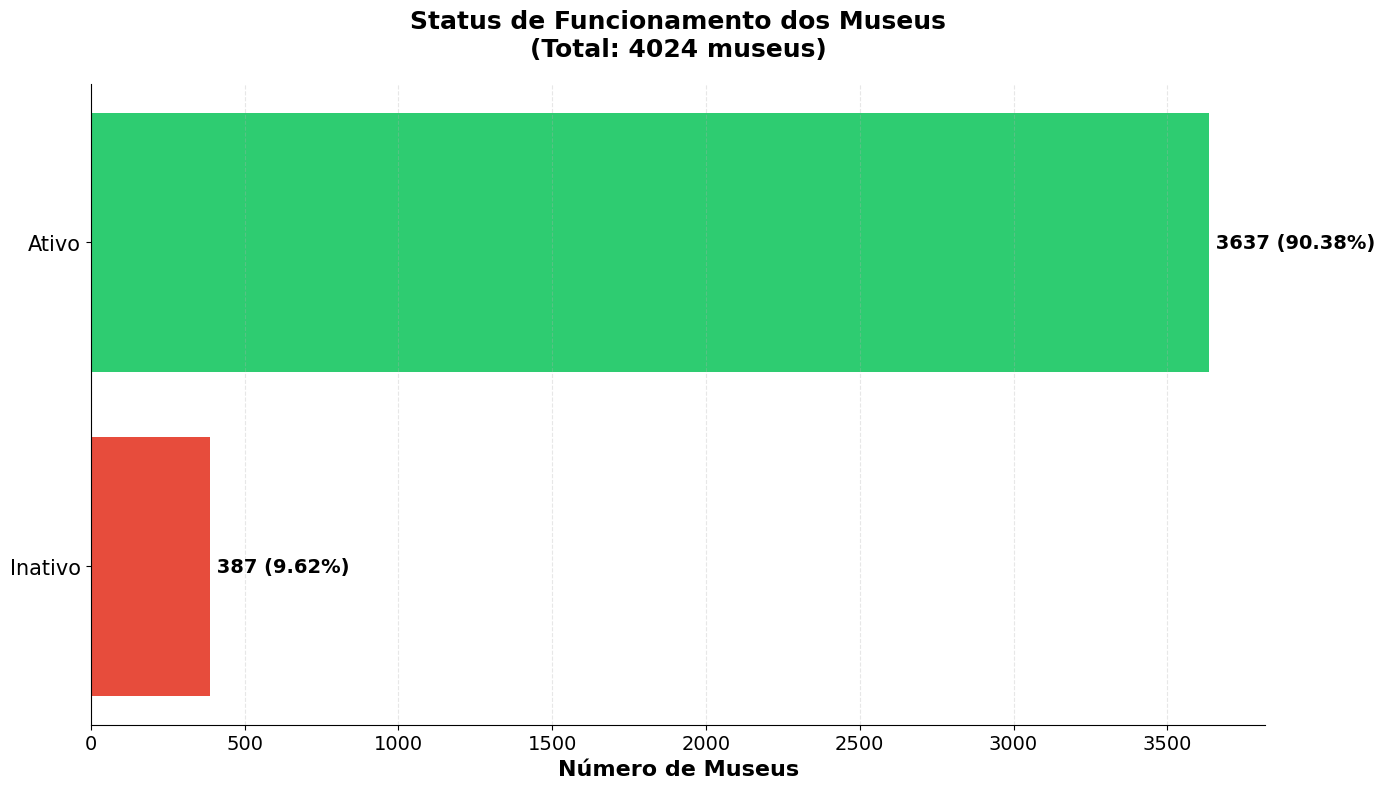


STATUS DE FUNCIONAMENTO DOS MUSEUS (ordenado do maior para o menor)
Status               Quantidade      %              
--------------------------------------------------------------------------------
Ativo                3637            90.38          %
Inativo              387             9.62           %
--------------------------------------------------------------------------------
TOTAL                4024            100.0%


In [63]:
# Verificar os valores únicos na coluna Status de Funcionamento
print("Valores únicos em 'Status de Funcionamento':")
print(df['Status de Funcionamento'].value_counts())
print("\n")

# Contar museus por status de funcionamento
status_funcionamento = df['Status de Funcionamento'].value_counts()

# Calcular totais
total_museus = len(df)

# Calcular porcentagens em relação ao total de museus
percentuais = (status_funcionamento / total_museus * 100).round(2)

# Criar figura
fig, ax = plt.subplots(figsize=(14, 8))

# Preparar dados
status_labels = []
status_valores = []
status_percentuais = []

for status, count in status_funcionamento.items():
    # Ajustar os labels conforme solicitado
    if status == 'Aberto':
        label = 'Ativo'
    elif status == 'Fechado':
        label = 'Inativo'
    else:
        label = status
    
    status_labels.append(label)
    status_valores.append(count)
    status_percentuais.append(percentuais[status])

# Ordenar do maior para o menor
dados_ordenados = sorted(zip(status_labels, status_valores, status_percentuais), 
                         key=lambda x: x[1], reverse=False)  # False para inverter depois
status_labels_ord = [x[0] for x in dados_ordenados]
status_valores_ord = [x[1] for x in dados_ordenados]
status_percentuais_ord = [x[2] for x in dados_ordenados]

# Definir cores
colors_map = {
    'Ativo': '#2ecc71',
    'Inativo': '#e74c3c',
}
colors_bars = [colors_map.get(label, '#95a5a6') for label in status_labels_ord]

# Criar barras horizontais
y_pos = range(len(status_labels_ord))
bars = ax.barh(y_pos, status_valores_ord, color=colors_bars)

# Adicionar valores e porcentagens
for i, (bar, count, perc) in enumerate(zip(bars, status_valores_ord, status_percentuais_ord)):
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2.,
            f' {int(count)} ({perc}%)',
            ha='left', va='center', fontsize=14, fontweight='bold')

# Configurações do gráfico
ax.set_yticks(y_pos)
ax.set_yticklabels(status_labels_ord, fontsize=15)
ax.set_xlabel('Número de Museus', fontsize=16, fontweight='bold')
ax.set_title(f'Status de Funcionamento dos Museus\n(Total: {total_museus} museus)', 
             fontsize=18, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', labelsize=14)

plt.tight_layout()
plt.show()

# Mostrar tabela com detalhes
print("\n" + "="*80)
print("STATUS DE FUNCIONAMENTO DOS MUSEUS (ordenado do maior para o menor)")
print("="*80)
print(f"{'Status':<20} {'Quantidade':<15} {'%':<15}")
print("-"*80)

# Ordenar por quantidade (maior para menor)
dados_tabela = sorted(zip(status_labels, status_valores, status_percentuais), 
                      key=lambda x: x[1], reverse=True)

for label, count, perc in dados_tabela:
    print(f"{label:<20} {count:<15} {perc:<15}%")

print("-"*80)
print(f"{'TOTAL':<20} {total_museus:<15} 100.0%")
print("="*80)

### 8.4.2 - Por esfera

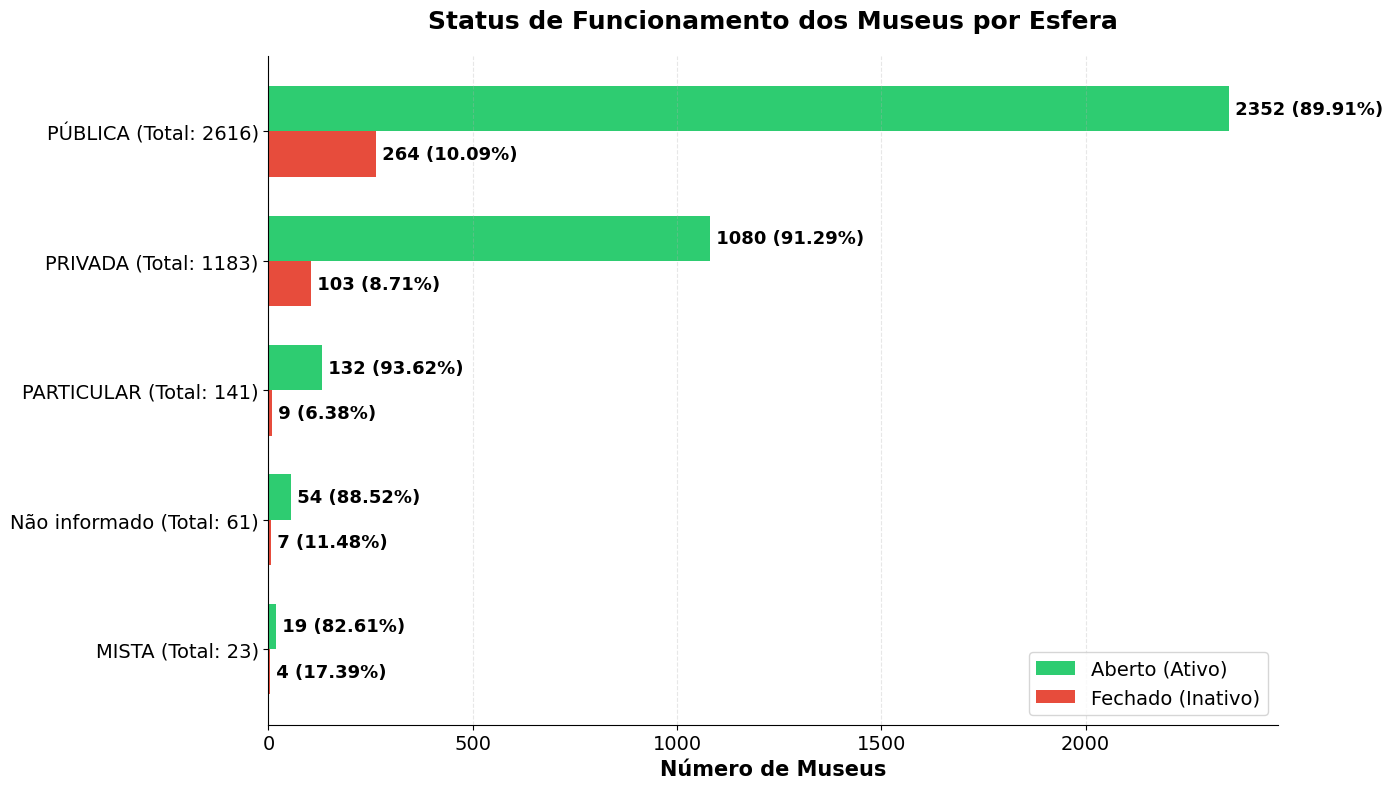


STATUS DE FUNCIONAMENTO POR ESFERA
Esfera               Total      Abertos         %          Fechados        %         
----------------------------------------------------------------------------------------------------
PÚBLICA              2616       2352            89.91     % 264             10.09     %
PRIVADA              1183       1080            91.29     % 103             8.71      %
PARTICULAR           141        132             93.62     % 9               6.38      %
Não informado        61         54              88.52     % 7               11.48     %
MISTA                23         19              82.61     % 4               17.39     %
TOTAL GERAL          4024       3637            90.38     % 387             9.62      %


In [64]:
# Obter as esferas únicas
esferas = df['Esfera'].unique()

# Preparar dados para cada esfera
dados_esferas = {}
for esfera in esferas:
    df_esfera = df[df['Esfera'] == esfera]
    total_esfera = len(df_esfera)
    
    # Contar ativos e inativos
    status_counts = df_esfera['Status de Funcionamento'].value_counts()
    
    ativos = status_counts.get('Ativo', 0)
    inativos = status_counts.get('Inativo', 0)
    
    # Calcular porcentagens em relação ao total da esfera
    perc_ativos = round((ativos / total_esfera * 100), 2) if total_esfera > 0 else 0
    perc_inativos = round((inativos / total_esfera * 100), 2) if total_esfera > 0 else 0
    
    dados_esferas[esfera] = {
        'total': total_esfera,
        'ativos': ativos,
        'inativos': inativos,
        'perc_ativos': perc_ativos,
        'perc_inativos': perc_inativos
    }

# Ordenar esferas por total de museus (para melhor visualização)
esferas_ordenadas = sorted(dados_esferas.keys(), 
                           key=lambda x: dados_esferas[x]['total'], 
                           reverse=True)

# Criar figura
fig, ax = plt.subplots(figsize=(14, 8))

# Cores
cor_ativo = '#2ecc71'
cor_inativo = '#e74c3c'

# Preparar dados para o gráfico
y_pos = np.arange(len(esferas_ordenadas))
width = 0.35

ativos_valores = [dados_esferas[esfera]['ativos'] for esfera in esferas_ordenadas]
inativos_valores = [dados_esferas[esfera]['inativos'] for esfera in esferas_ordenadas]
perc_ativos = [dados_esferas[esfera]['perc_ativos'] for esfera in esferas_ordenadas]
perc_inativos = [dados_esferas[esfera]['perc_inativos'] for esfera in esferas_ordenadas]
totais = [dados_esferas[esfera]['total'] for esfera in esferas_ordenadas]

# Criar barras agrupadas
bars1 = ax.barh(y_pos - width/2, ativos_valores, width, label='Aberto (Ativo)', color=cor_ativo)
bars2 = ax.barh(y_pos + width/2, inativos_valores, width, label='Fechado (Inativo)', color=cor_inativo)

# Adicionar valores e porcentagens nas barras
for i, (bar, count, perc) in enumerate(zip(bars1, ativos_valores, perc_ativos)):
    width_bar = bar.get_width()
    if count > 0:
        ax.text(width_bar, bar.get_y() + bar.get_height()/2.,
                f' {int(count)} ({perc}%)',
                ha='left', va='center', fontsize=13, fontweight='bold')

for i, (bar, count, perc) in enumerate(zip(bars2, inativos_valores, perc_inativos)):
    width_bar = bar.get_width()
    if count > 0:
        ax.text(width_bar, bar.get_y() + bar.get_height()/2.,
                f' {int(count)} ({perc}%)',
                ha='left', va='center', fontsize=13, fontweight='bold')

# Criar labels das esferas com total
labels_esferas = [f'{esfera} (Total: {totais[i]})' for i, esfera in enumerate(esferas_ordenadas)]

# Configurações do gráfico
ax.set_yticks(y_pos)
ax.set_yticklabels(labels_esferas, fontsize=14)
ax.set_xlabel('Número de Museus', fontsize=15, fontweight='bold')
ax.set_title('Status de Funcionamento dos Museus por Esfera', 
             fontsize=18, fontweight='bold', pad=20)
ax.legend(loc='lower right', fontsize=14, frameon=True)
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', labelsize=14)
ax.invert_yaxis()

plt.tight_layout()
plt.show()

# Mostrar tabela com detalhes
print("\n" + "="*100)
print("STATUS DE FUNCIONAMENTO POR ESFERA")
print("="*100)
print(f"{'Esfera':<20} {'Total':<10} {'Abertos':<15} {'%':<10} {'Fechados':<15} {'%':<10}")
print("-"*100)

for esfera in esferas_ordenadas:
    dados = dados_esferas[esfera]
    print(f"{esfera:<20} {dados['total']:<10} {dados['ativos']:<15} {dados['perc_ativos']:<10}% "
          f"{dados['inativos']:<15} {dados['perc_inativos']:<10}%")

print("="*100)

# Totais gerais
total_geral = len(df)
total_ativos_geral = sum([dados_esferas[e]['ativos'] for e in esferas_ordenadas])
total_inativos_geral = sum([dados_esferas[e]['inativos'] for e in esferas_ordenadas])
perc_ativos_geral = round((total_ativos_geral / total_geral * 100), 2)
perc_inativos_geral = round((total_inativos_geral / total_geral * 100), 2)

print(f"{'TOTAL GERAL':<20} {total_geral:<10} {total_ativos_geral:<15} {perc_ativos_geral:<10}% "
      f"{total_inativos_geral:<15} {perc_inativos_geral:<10}%")
print("="*100)

### 8.4.3 - Por Estado

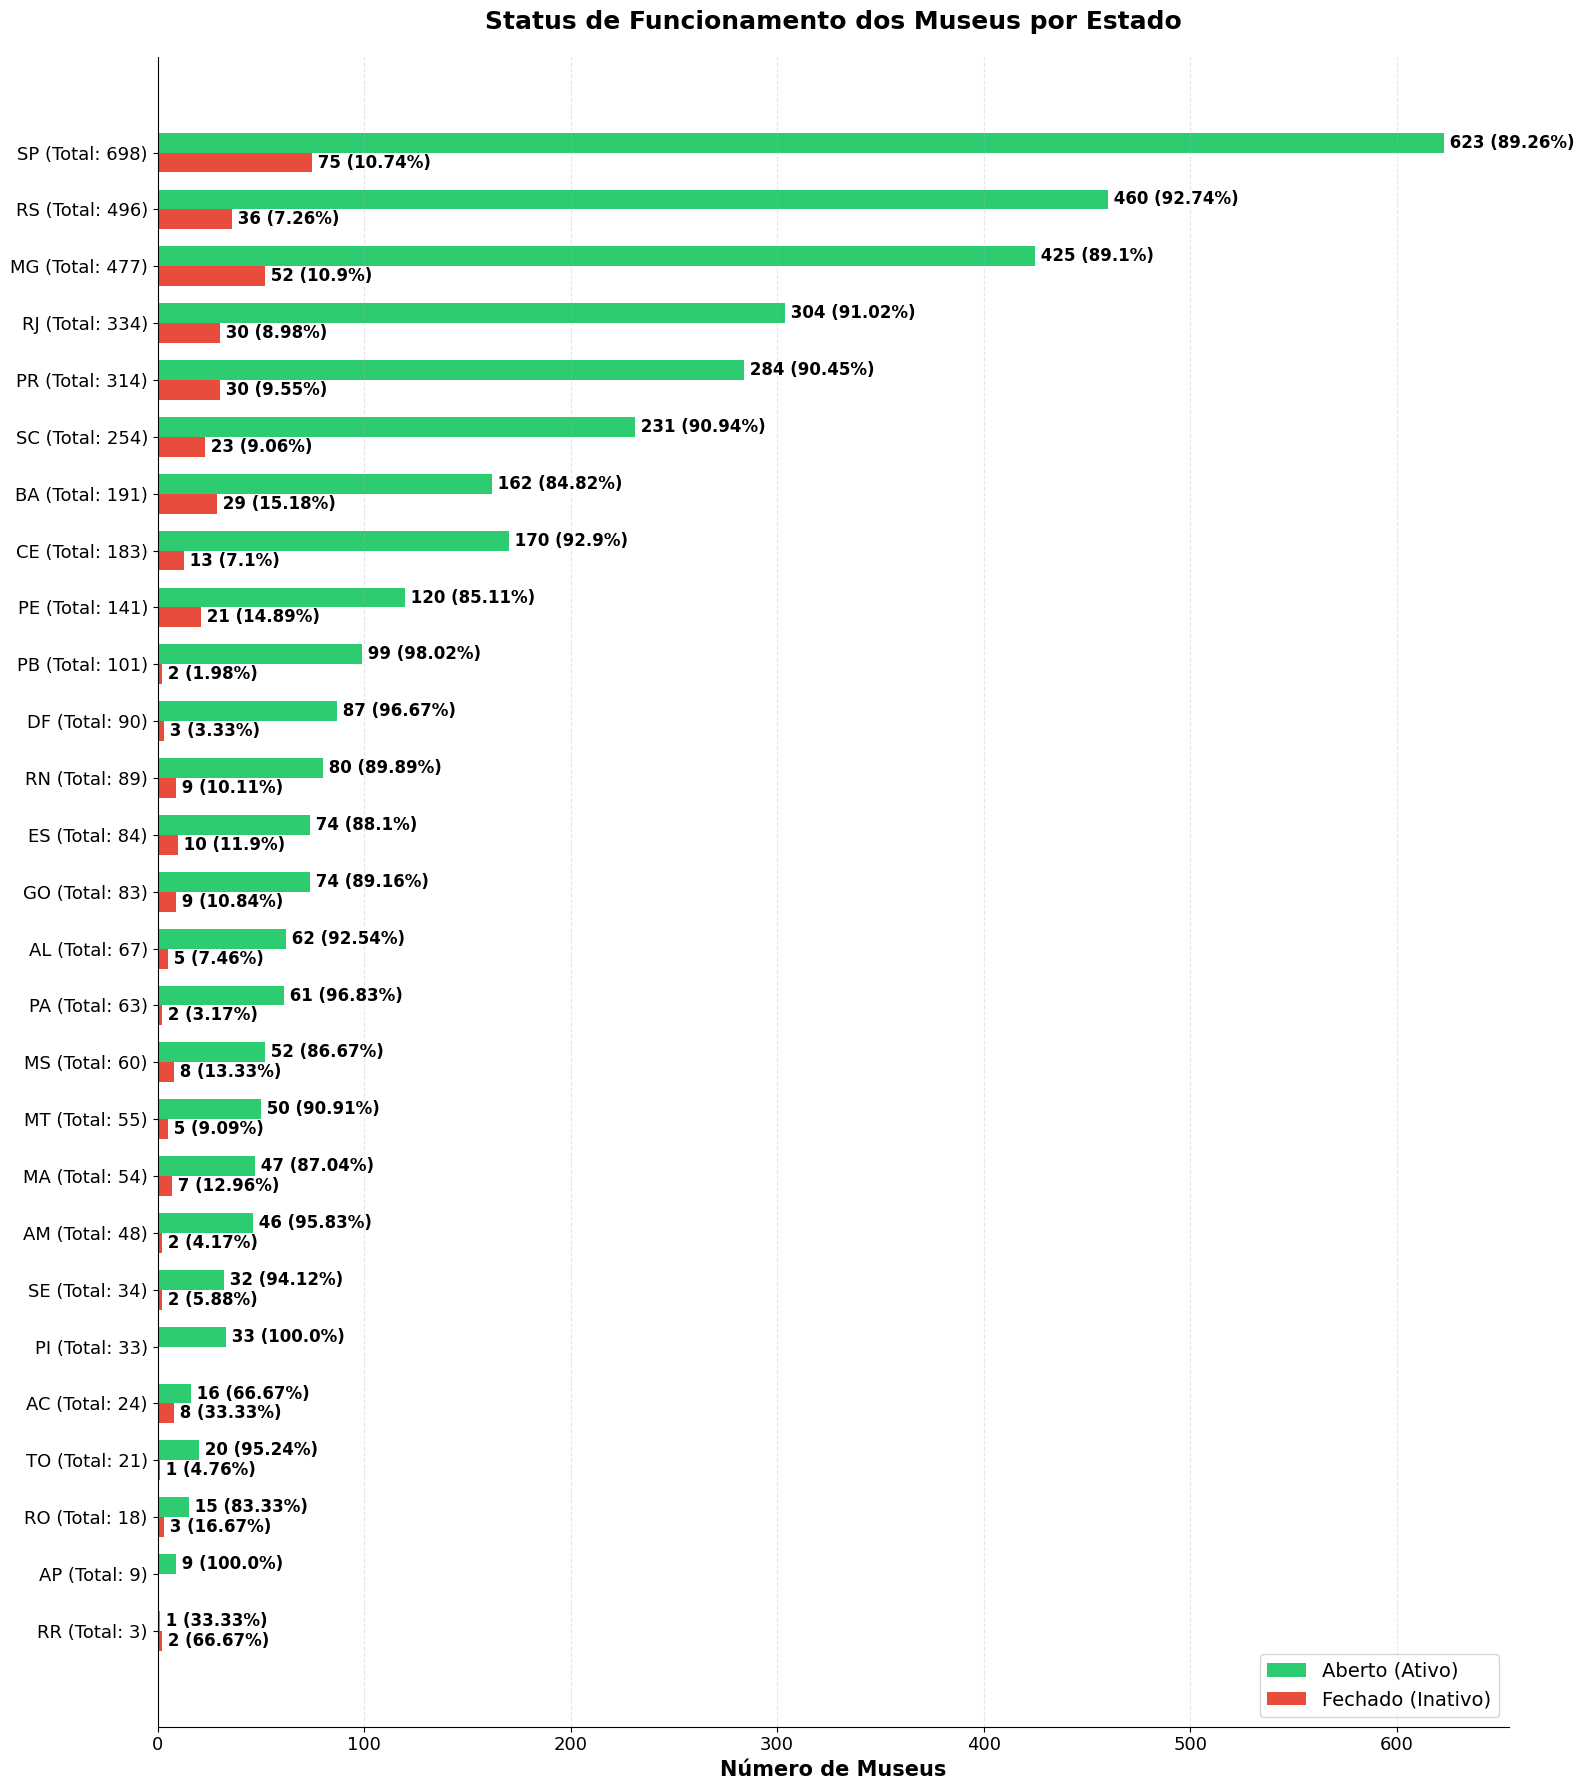


STATUS DE FUNCIONAMENTO POR ESTADO (ordenado por total de museus)
Estado     Total      Abertos         %          Fechados        %         
----------------------------------------------------------------------------------------------------
SP         698        623             89.26     % 75              10.74     %
RS         496        460             92.74     % 36              7.26      %
MG         477        425             89.1      % 52              10.9      %
RJ         334        304             91.02     % 30              8.98      %
PR         314        284             90.45     % 30              9.55      %
SC         254        231             90.94     % 23              9.06      %
BA         191        162             84.82     % 29              15.18     %
CE         183        170             92.9      % 13              7.1       %
PE         141        120             85.11     % 21              14.89     %
PB         101        99              98.02     % 2   

In [65]:
# Obter os estados únicos
estados = df['Estado'].unique()

# Preparar dados para cada estado
dados_estados = {}
for estado in estados:
    df_estado = df[df['Estado'] == estado]
    total_estado = len(df_estado)
    
    # Contar ativos e inativos
    status_counts = df_estado['Status de Funcionamento'].value_counts()
    
    ativos = status_counts.get('Ativo', 0)
    inativos = status_counts.get('Inativo', 0)
    
    # Calcular porcentagens em relação ao total do estado
    perc_ativos = round((ativos / total_estado * 100), 2) if total_estado > 0 else 0
    perc_inativos = round((inativos / total_estado * 100), 2) if total_estado > 0 else 0
    
    dados_estados[estado] = {
        'total': total_estado,
        'ativos': ativos,
        'inativos': inativos,
        'perc_ativos': perc_ativos,
        'perc_inativos': perc_inativos
    }

# Ordenar estados por total de museus (para melhor visualização)
estados_ordenados = sorted(dados_estados.keys(), 
                           key=lambda x: dados_estados[x]['total'], 
                           reverse=True)

# Criar figura
fig, ax = plt.subplots(figsize=(16, 18))

# Cores
cor_ativo = '#2ecc71'
cor_inativo = '#e74c3c'

# Preparar dados para o gráfico
y_pos = np.arange(len(estados_ordenados))
height = 0.35

ativos_valores = [dados_estados[estado]['ativos'] for estado in estados_ordenados]
inativos_valores = [dados_estados[estado]['inativos'] for estado in estados_ordenados]
perc_ativos = [dados_estados[estado]['perc_ativos'] for estado in estados_ordenados]
perc_inativos = [dados_estados[estado]['perc_inativos'] for estado in estados_ordenados]
totais = [dados_estados[estado]['total'] for estado in estados_ordenados]

# Criar barras agrupadas
bars1 = ax.barh(y_pos - height/2, ativos_valores, height, label='Aberto (Ativo)', color=cor_ativo)
bars2 = ax.barh(y_pos + height/2, inativos_valores, height, label='Fechado (Inativo)', color=cor_inativo)

# Adicionar valores e porcentagens nas barras
for i, (bar, count, perc) in enumerate(zip(bars1, ativos_valores, perc_ativos)):
    width_bar = bar.get_width()
    if count > 0:
        ax.text(width_bar, bar.get_y() + bar.get_height()/2.,
                f' {int(count)} ({perc}%)',
                ha='left', va='center', fontsize=12, fontweight='bold')

for i, (bar, count, perc) in enumerate(zip(bars2, inativos_valores, perc_inativos)):
    width_bar = bar.get_width()
    if count > 0:
        ax.text(width_bar, bar.get_y() + bar.get_height()/2.,
                f' {int(count)} ({perc}%)',
                ha='left', va='center', fontsize=12, fontweight='bold')

# Criar labels dos estados com total
labels_estados = [f'{estado} (Total: {totais[i]})' for i, estado in enumerate(estados_ordenados)]

# Configurações do gráfico
ax.set_yticks(y_pos)
ax.set_yticklabels(labels_estados, fontsize=13)
ax.set_xlabel('Número de Museus', fontsize=15, fontweight='bold')
ax.set_title('Status de Funcionamento dos Museus por Estado', 
             fontsize=18, fontweight='bold', pad=20)
ax.legend(loc='lower right', fontsize=14, frameon=True)
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', labelsize=13)
ax.invert_yaxis()

plt.tight_layout()
plt.show()

# Mostrar tabela com detalhes
print("\n" + "="*100)
print("STATUS DE FUNCIONAMENTO POR ESTADO (ordenado por total de museus)")
print("="*100)
print(f"{'Estado':<10} {'Total':<10} {'Abertos':<15} {'%':<10} {'Fechados':<15} {'%':<10}")
print("-"*100)

for estado in estados_ordenados:
    dados = dados_estados[estado]
    print(f"{estado:<10} {dados['total']:<10} {dados['ativos']:<15} {dados['perc_ativos']:<10}% "
          f"{dados['inativos']:<15} {dados['perc_inativos']:<10}%")

print("="*100)

# Totais gerais
total_geral = len(df)
total_ativos_geral = sum([dados_estados[e]['ativos'] for e in estados_ordenados])
total_inativos_geral = sum([dados_estados[e]['inativos'] for e in estados_ordenados])
perc_ativos_geral = round((total_ativos_geral / total_geral * 100), 2)
perc_inativos_geral = round((total_inativos_geral / total_geral * 100), 2)

print(f"{'TOTAL':<10} {total_geral:<10} {total_ativos_geral:<15} {perc_ativos_geral:<10}% "
      f"{total_inativos_geral:<15} {perc_inativos_geral:<10}%")
print("="*100)

## 8.5 - Temática

### 8.5.1 - Geral

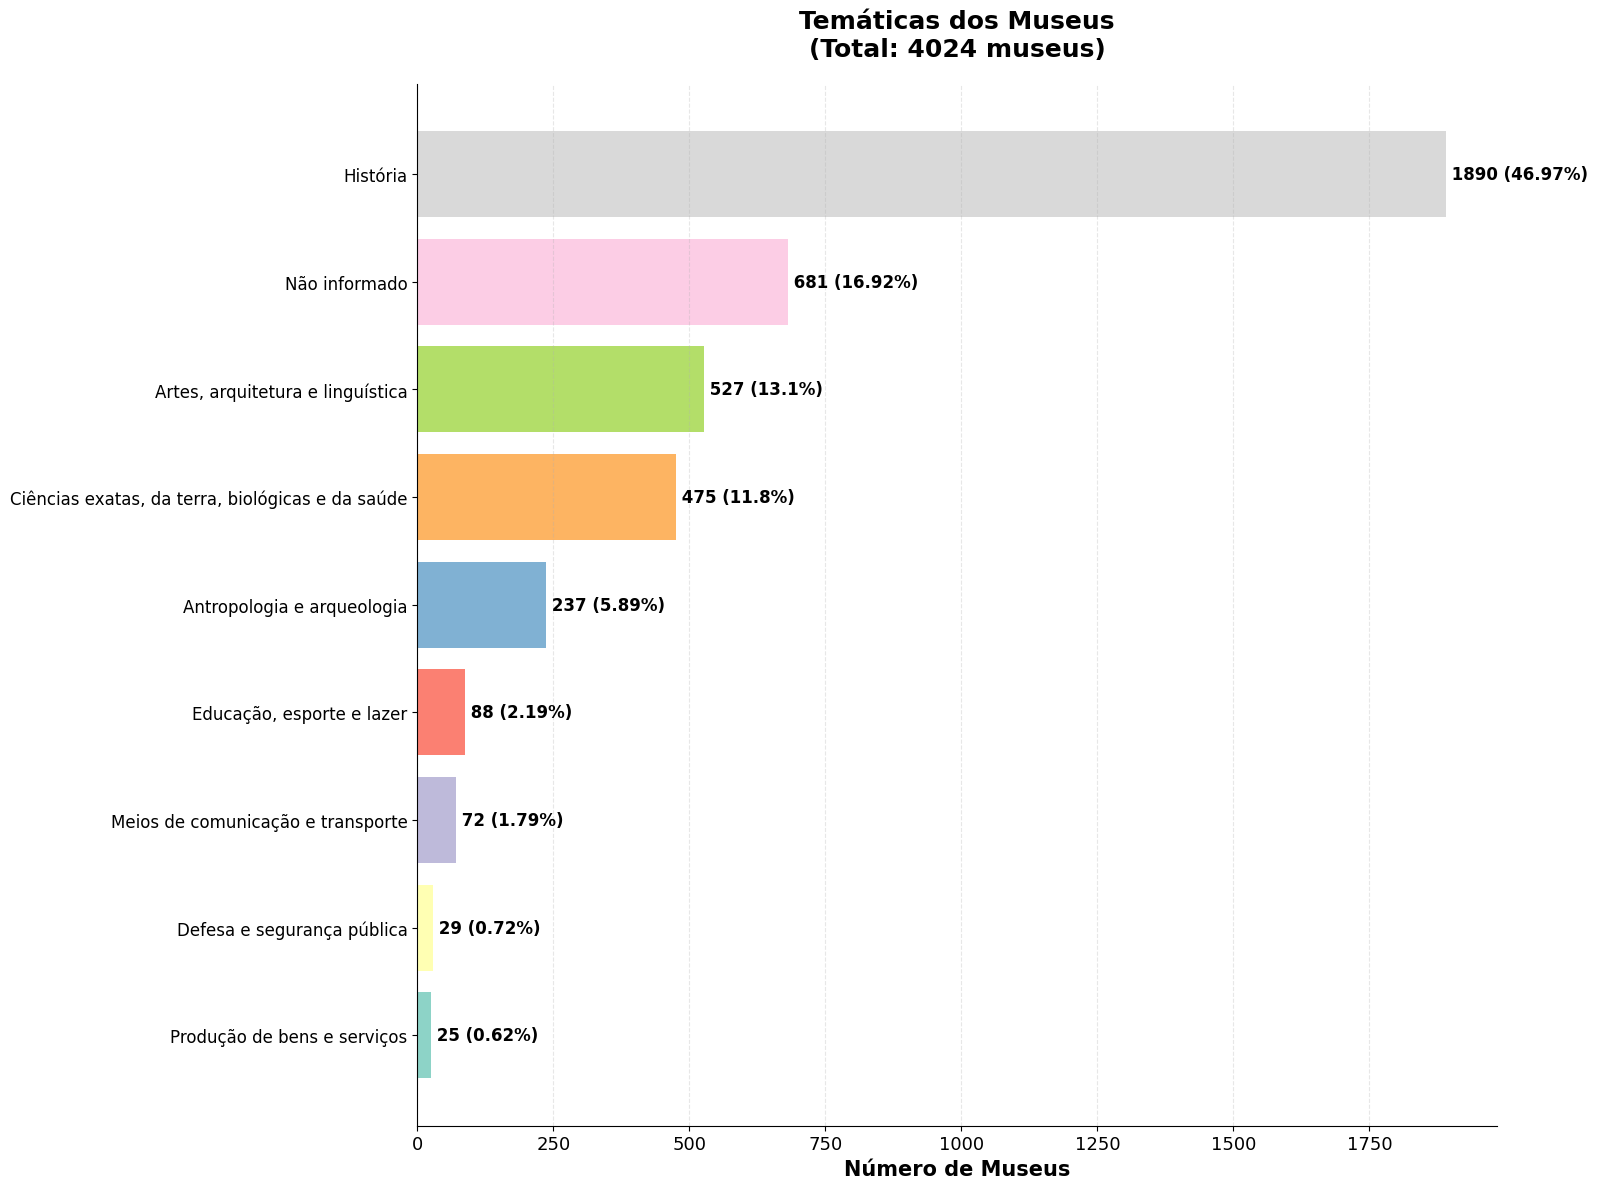


TEMÁTICAS DOS MUSEUS (ordenado do maior para o menor)
Posição    Temática                                                     Quantidade      %         
----------------------------------------------------------------------------------------------------
1          História                                                     1890            46.97     %
2          Não informado                                                681             16.92     %
3          Artes, arquitetura e linguística                             527             13.1      %
4          Ciências exatas, da terra, biológicas e da saúde             475             11.8      %
5          Antropologia e arqueologia                                   237             5.89      %
6          Educação, esporte e lazer                                    88              2.19      %
7          Meios de comunicação e transporte                            72              1.79      %
8          Defesa e segurança pública        

In [66]:
# Contar os valores da coluna Temática
tematica_counts = df['Temática'].value_counts()

# Calcular totais
total_museus = len(df)

# Calcular porcentagens em relação ao total de museus
percentuais = (tematica_counts / total_museus * 100).round(2)

# Criar figura
fig, ax = plt.subplots(figsize=(16, 12))

# Preparar dados ordenados (do menor para o maior para inverter no gráfico)
tematicas = tematica_counts.index.tolist()
valores = tematica_counts.values
percentuais_lista = [percentuais[tematica] for tematica in tematicas]

# Ordenar do menor para o maior
dados_ordenados = sorted(zip(tematicas, valores, percentuais_lista), 
                         key=lambda x: x[1], reverse=False)
tematicas_ord = [x[0] for x in dados_ordenados]
valores_ord = [x[1] for x in dados_ordenados]
percentuais_ord = [x[2] for x in dados_ordenados]

# Paleta de cores
colors_palette = plt.cm.Set3(range(len(tematicas_ord)))

# Criar barras horizontais
y_pos = range(len(tematicas_ord))
bars = ax.barh(y_pos, valores_ord, color=colors_palette)

# Adicionar valores e porcentagens
for i, (bar, tematica, count, perc) in enumerate(zip(bars, tematicas_ord, valores_ord, percentuais_ord)):
    width = bar.get_width()
    # Truncar texto da temática se for muito longo
    label_tematica = str(tematica)
    if len(label_tematica) > 50:
        label_tematica = label_tematica[:47] + '...'
    
    ax.text(width, bar.get_y() + bar.get_height()/2.,
            f' {int(count)} ({perc}%)',
            ha='left', va='center', fontsize=12, fontweight='bold')

# Criar labels truncados para o eixo Y
labels_y = []
for tematica in tematicas_ord:
    label = str(tematica)
    if len(label) > 60:
        label = label[:57] + '...'
    labels_y.append(label)

# Configurações do gráfico
ax.set_yticks(y_pos)
ax.set_yticklabels(labels_y, fontsize=12)
ax.set_xlabel('Número de Museus', fontsize=15, fontweight='bold')
ax.set_title(f'Temáticas dos Museus\n(Total: {total_museus} museus)', 
             fontsize=18, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', labelsize=13)

plt.tight_layout()
plt.show()

# Mostrar tabela com detalhes
print("\n" + "="*100)
print("TEMÁTICAS DOS MUSEUS (ordenado do maior para o menor)")
print("="*100)
print(f"{'Posição':<10} {'Temática':<60} {'Quantidade':<15} {'%':<10}")
print("-"*100)

# Ordenar por quantidade (maior para menor) para a tabela
dados_tabela = sorted(zip(tematicas, valores, percentuais_lista), 
                      key=lambda x: x[1], reverse=True)

for pos, (tematica, count, perc) in enumerate(dados_tabela, 1):
    tematica_texto = str(tematica)[:57] + '...' if len(str(tematica)) > 60 else str(tematica)
    print(f"{pos:<10} {tematica_texto:<60} {count:<15} {perc:<10}%")

print("-"*100)
print(f"{'TOTAL':<71} {total_museus:<15} 100.0%")
print("="*100)

### 8.5.2 - Por esfera

Valores únicos em 'Esfera':
Esfera
PÚBLICA          2616
PRIVADA          1183
PARTICULAR        141
Não informado      61
MISTA              23
Name: count, dtype: int64




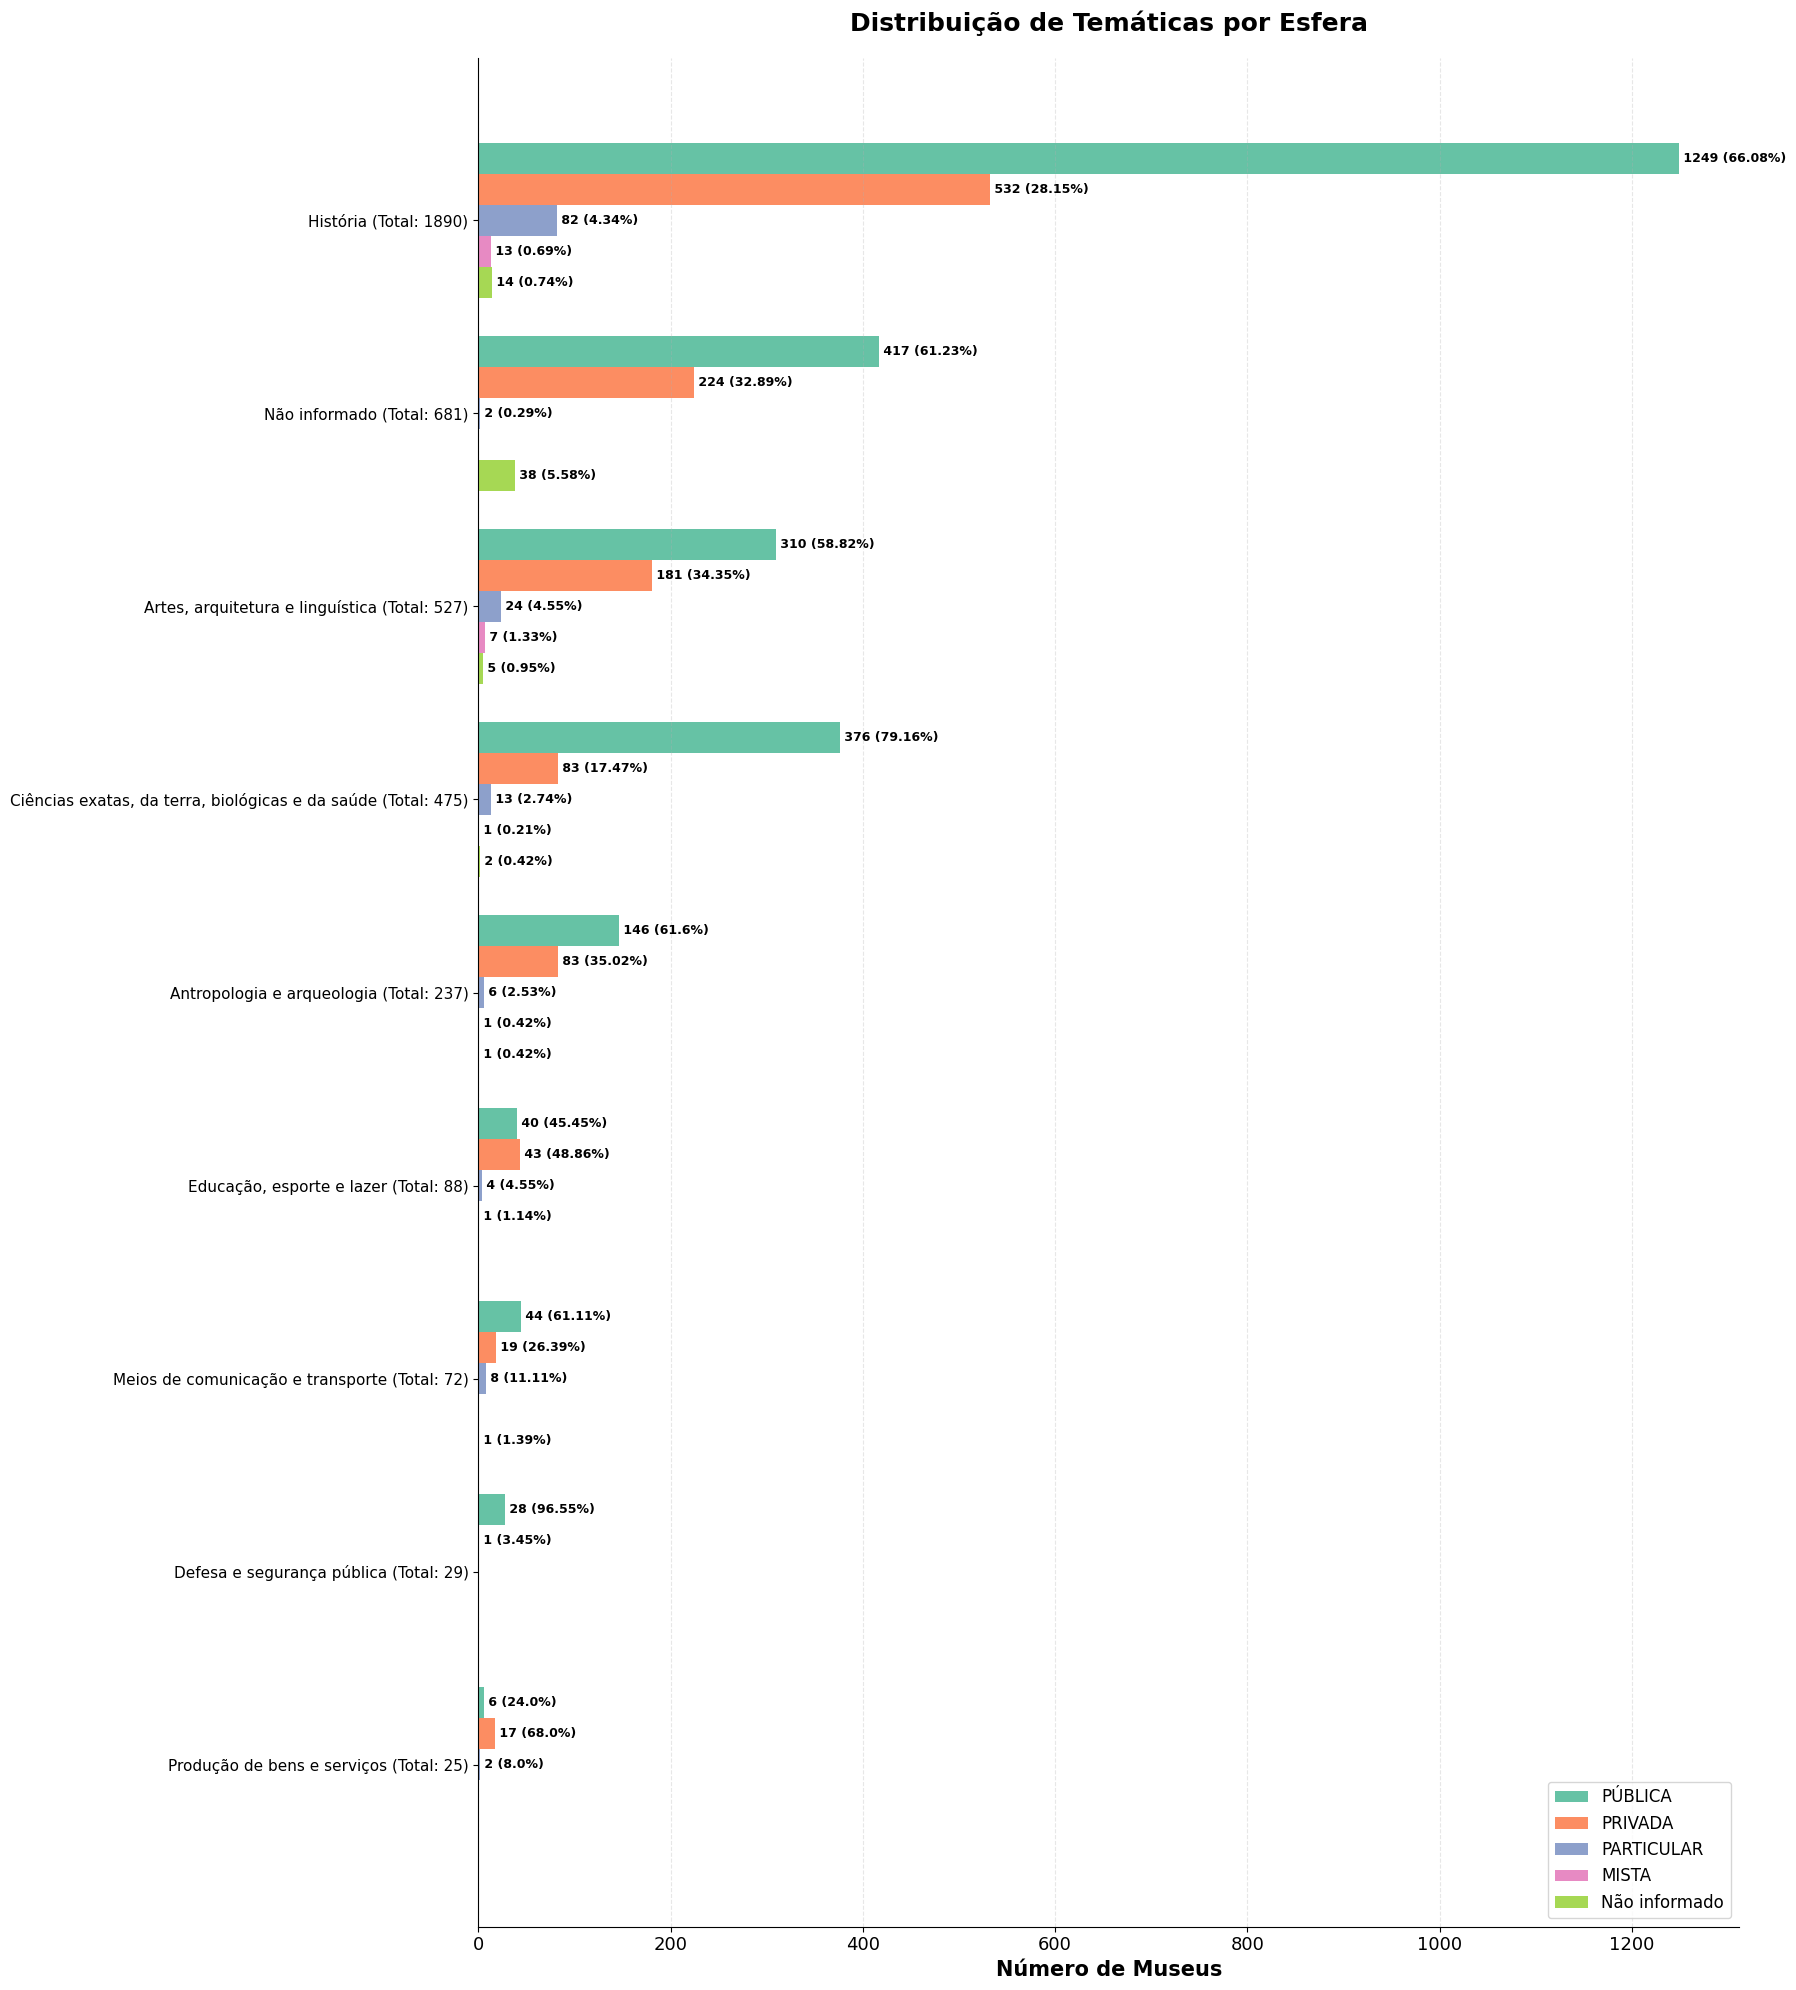


DISTRIBUIÇÃO DE TEMÁTICAS POR ESFERA (ordenado por total de museus)
Temática                                           Total      PÚBLICA      %        PRIVADA      %        PARTICULAR   %        MISTA        %        Não informado %       
------------------------------------------------------------------------------------------------------------------------------------------------------
História                                           1890       1249         66.08   % 532          28.15   % 82           4.34    % 13           0.69    % 14           0.74    %
Não informado                                      681        417          61.23   % 224          32.89   % 2            0.29    % 0            0.0     % 38           5.58    %
Artes, arquitetura e linguística                   527        310          58.82   % 181          34.35   % 24           4.55    % 7            1.33    % 5            0.95    %
Ciências exatas, da terra, biológicas e da saúde   475        376          7

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# ✅ Padronizar valores não informados na coluna 'Esfera'
df['Esfera'] = df['Esfera'].replace(['', 'nan', 'NaN', np.nan], 'Não informado')

# Verificar todos os valores únicos na coluna Esfera
print("Valores únicos em 'Esfera':")
print(df['Esfera'].value_counts())
print("\n")

# Obter todas as esferas únicas
esferas_unicas = df['Esfera'].unique()
num_esferas = len(esferas_unicas)

# Obter todas as temáticas únicas
tematicas = df['Temática'].unique()

# Preparar dados para cada temática
dados_tematicas = {}
for tematica in tematicas:
    df_tematica = df[df['Temática'] == tematica]
    total_tematica = len(df_tematica)
    
    # Contar por esfera
    esfera_counts = df_tematica['Esfera'].value_counts()
    
    # Preparar dados para cada esfera
    dados_esfera = {}
    for esfera in esferas_unicas:
        count = esfera_counts.get(esfera, 0)
        perc = round((count / total_tematica * 100), 2) if total_tematica > 0 else 0
        dados_esfera[esfera] = {'count': count, 'perc': perc}
    
    dados_tematicas[tematica] = {
        'total': total_tematica,
        'esferas': dados_esfera
    }

# Ordenar temáticas por total de museus
tematicas_ordenadas = sorted(dados_tematicas.keys(), 
                             key=lambda x: dados_tematicas[x]['total'], 
                             reverse=True)

# Criar figura
fig, ax = plt.subplots(figsize=(18, 20))

# Definir cores para cada esfera
cores_esferas = plt.cm.Set2(range(num_esferas))
cores_map = {esfera: cores_esferas[i] for i, esfera in enumerate(esferas_unicas)}

# Preparar dados para o gráfico
y_pos = np.arange(len(tematicas_ordenadas))
height = 0.8 / num_esferas

# Preparar posições das barras
positions = []
for i in range(num_esferas):
    offset = (i - (num_esferas - 1) / 2) * height
    positions.append(y_pos + offset)

# Criar barras agrupadas para cada esfera
bars_dict = {}
for i, esfera in enumerate(esferas_unicas):
    valores = [dados_tematicas[tematica]['esferas'][esfera]['count'] for tematica in tematicas_ordenadas]
    percentuais = [dados_tematicas[tematica]['esferas'][esfera]['perc'] for tematica in tematicas_ordenadas]
    
    bars = ax.barh(positions[i], valores, height, label=esfera, color=cores_map[esfera])
    bars_dict[esfera] = {'bars': bars, 'valores': valores, 'percentuais': percentuais}

# Adicionar valores e porcentagens nas barras
for esfera in esferas_unicas:
    bars = bars_dict[esfera]['bars']
    valores = bars_dict[esfera]['valores']
    percentuais = bars_dict[esfera]['percentuais']
    
    for bar, count, perc in zip(bars, valores, percentuais):
        width_bar = bar.get_width()
        if count > 0:
            ax.text(width_bar, bar.get_y() + bar.get_height()/2.,
                    f' {int(count)} ({perc}%)',
                    ha='left', va='center', fontsize=9, fontweight='bold')

# Criar labels das temáticas com total
labels_tematicas = []
totais = [dados_tematicas[tematica]['total'] for tematica in tematicas_ordenadas]
for i, tematica in enumerate(tematicas_ordenadas):
    label = str(tematica)
    if len(label) > 50:
        label = label[:47] + '...'
    labels_tematicas.append(f'{label} (Total: {totais[i]})')

# Configurações do gráfico
ax.set_yticks(y_pos)
ax.set_yticklabels(labels_tematicas, fontsize=11)
ax.set_xlabel('Número de Museus', fontsize=15, fontweight='bold')
ax.set_title('Distribuição de Temáticas por Esfera', fontsize=18, fontweight='bold', pad=20)
ax.legend(loc='lower right', fontsize=12, frameon=True)
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', labelsize=13)
ax.invert_yaxis()

plt.tight_layout()
plt.show()

# Mostrar tabela com detalhes
colunas_esfera = [f"{esfera} (qty)" for esfera in esferas_unicas] + [f"{esfera} (%)" for esfera in esferas_unicas]
largura_tematica = 50
largura_coluna = 12

print("\n" + "="*150)
print("DISTRIBUIÇÃO DE TEMÁTICAS POR ESFERA (ordenado por total de museus)")
print("="*150)

# Cabeçalho
header = f"{'Temática':<{largura_tematica}} {'Total':<10}"
for esfera in esferas_unicas:
    header += f" {esfera:<{largura_coluna}} {'%':<8}"
print(header)
print("-"*150)

# Dados
for tematica in tematicas_ordenadas:
    dados = dados_tematicas[tematica]
    tematica_texto = str(tematica)[:largura_tematica-3] + '...' if len(str(tematica)) > largura_tematica else str(tematica)
    
    linha = f"{tematica_texto:<{largura_tematica}} {dados['total']:<10}"
    for esfera in esferas_unicas:
        count = dados['esferas'][esfera]['count']
        perc = dados['esferas'][esfera]['perc']
        linha += f" {count:<{largura_coluna}} {perc:<8}%"
    print(linha)

print("="*150)

# Totais gerais
total_geral = len(df)
linha_total = f"{'TOTAL GERAL':<{largura_tematica}} {total_geral:<10}"
for esfera in esferas_unicas:
    total_esfera = sum([dados_tematicas[t]['esferas'][esfera]['count'] for t in tematicas_ordenadas])
    perc_esfera = round((total_esfera / total_geral * 100), 2)
    linha_total += f" {total_esfera:<{largura_coluna}} {perc_esfera:<8}%"
print(linha_total)
print("="*150)


### 8.5.3 - Por Estado

Valores únicos em 'Estado':
Estado
SP    698
RS    496
MG    477
RJ    334
PR    314
SC    254
BA    191
CE    183
PE    141
PB    101
DF     90
RN     89
ES     84
GO     83
AL     67
PA     63
MS     60
MT     55
MA     54
AM     48
SE     34
PI     33
AC     24
TO     21
RO     18
AP      9
RR      3
Name: count, dtype: int64




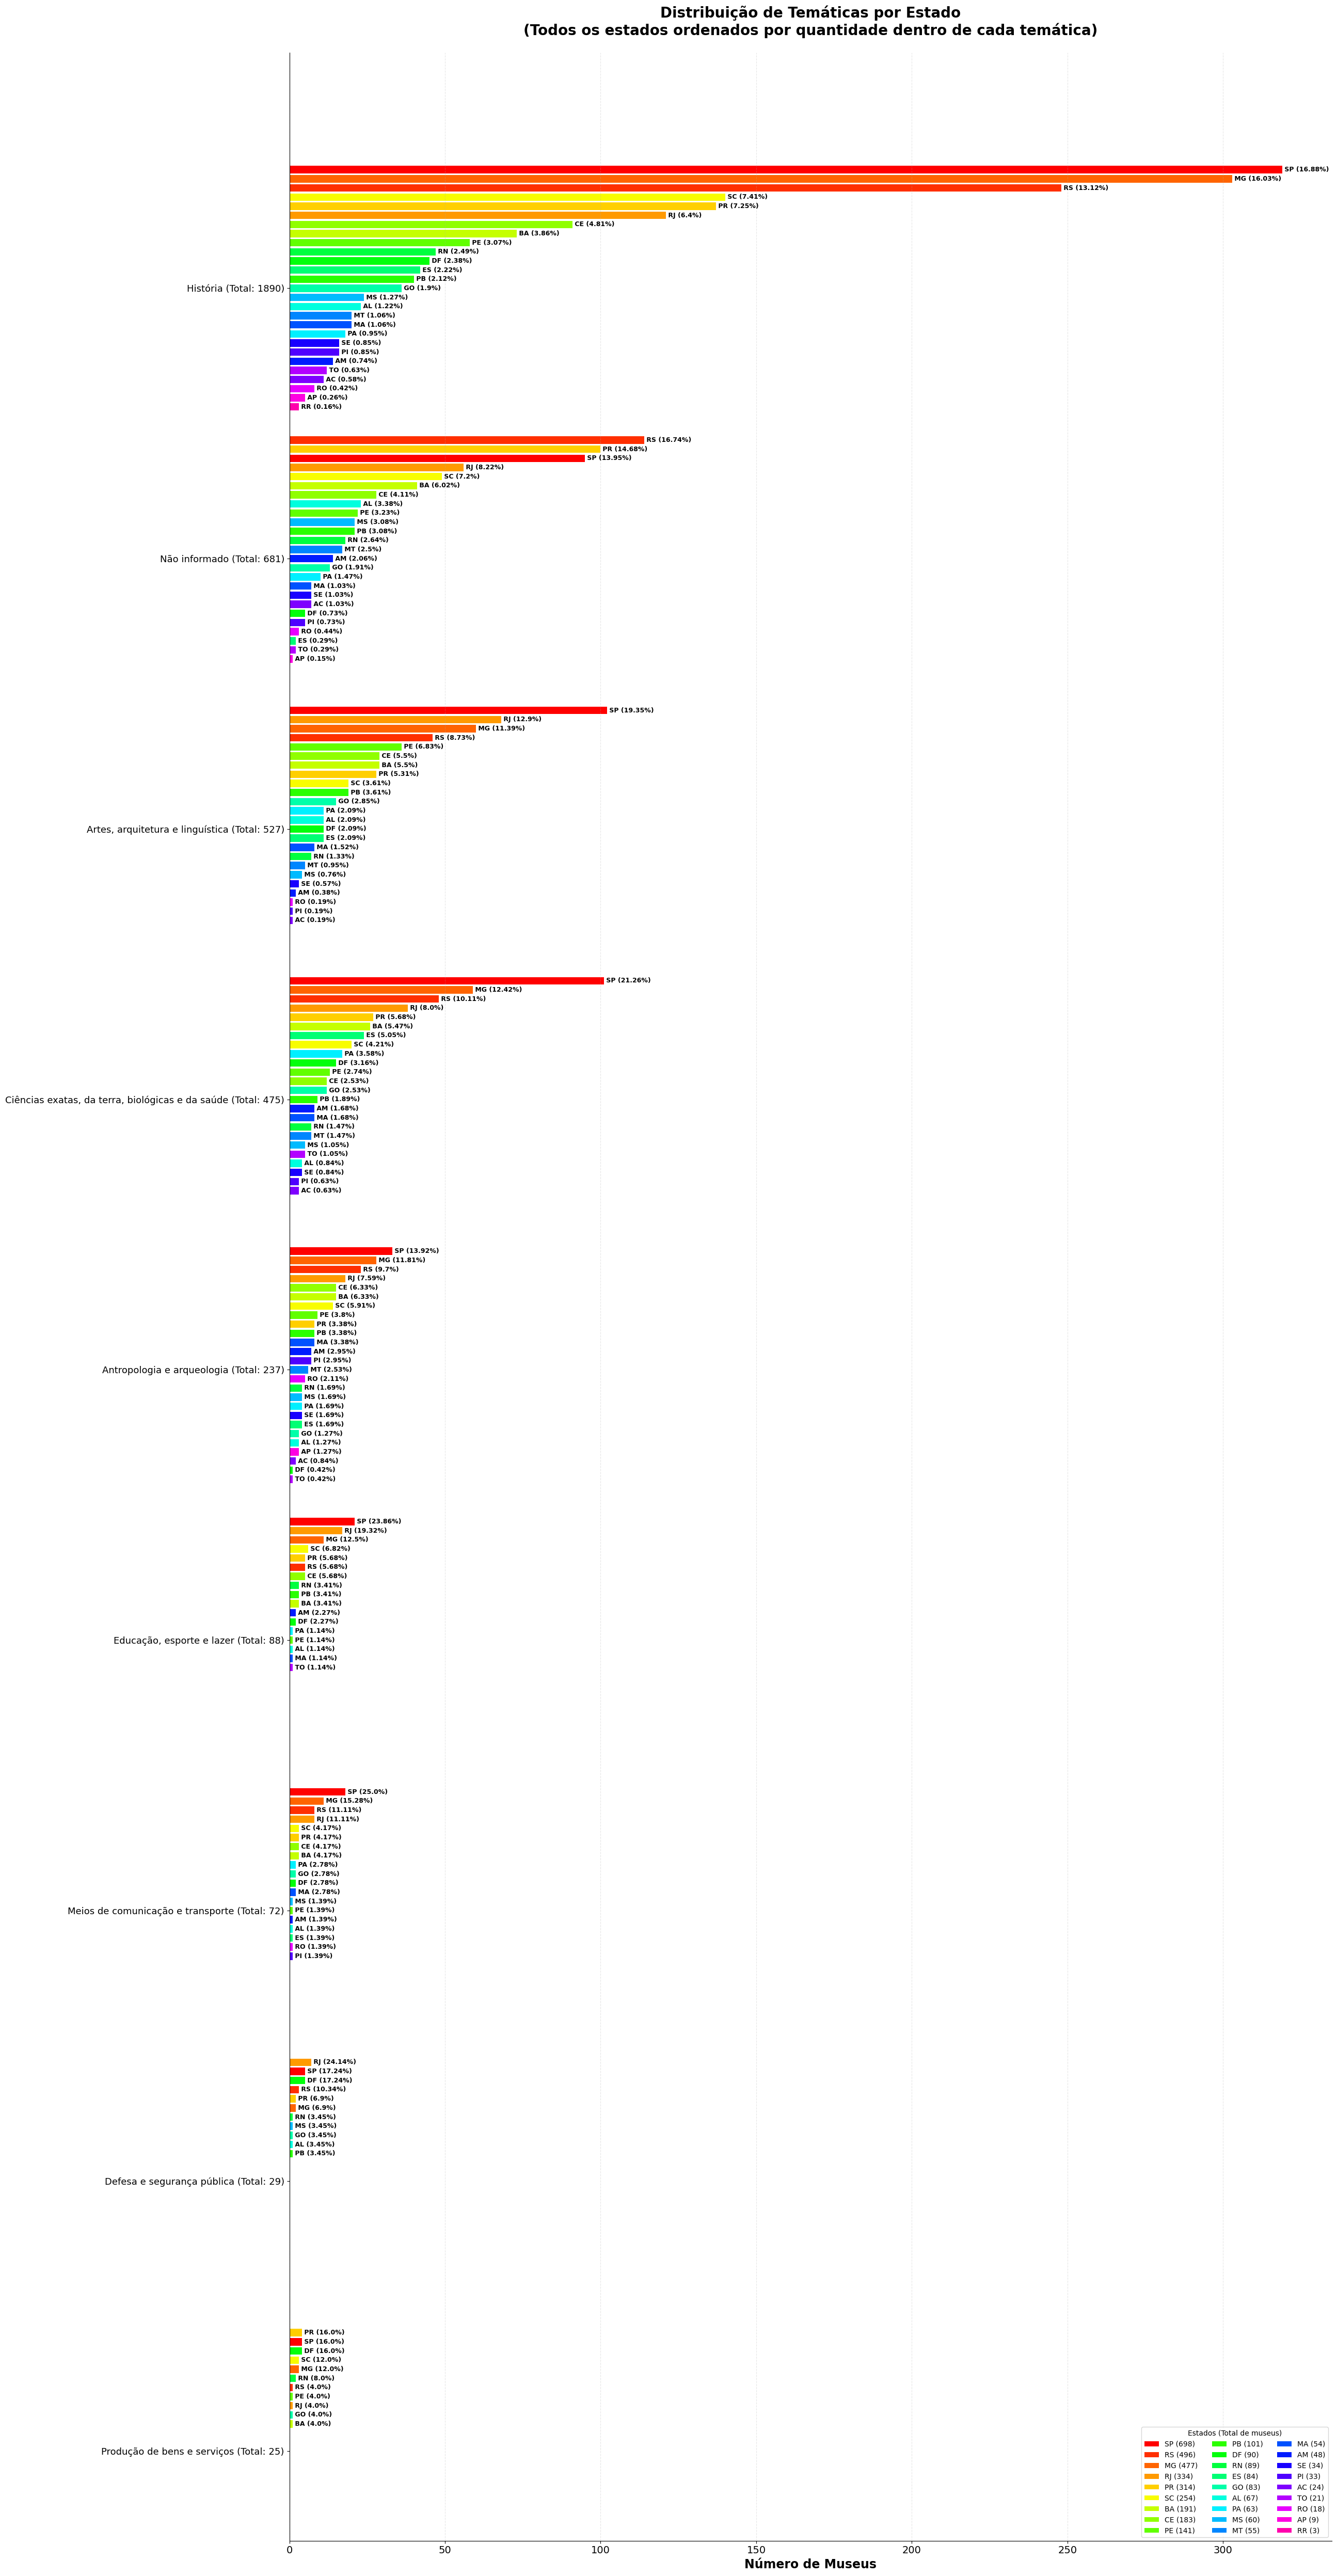


DISTRIBUIÇÃO DAS TOP 10 TEMÁTICAS POR ESTADO (TODOS OS ESTADOS)
(Estados listados em ordem decrescente de quantidade para cada temática)

História (Total: 1890 museus)
----------------------------------------------------------------------------------------------------
Posição    Estado     Quantidade      %         
----------------------------------------------------------------------------------------------------
1          SP         319             16.88     %
2          MG         303             16.03     %
3          RS         248             13.12     %
4          SC         140             7.41      %
5          PR         137             7.25      %
6          RJ         121             6.4       %
7          CE         91              4.81      %
8          BA         73              3.86      %
9          PE         58              3.07      %
10         RN         47              2.49      %
11         DF         45              2.38      %
12         ES         42      

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Verificar todos os valores únicos na coluna Estado
print("Valores únicos em 'Estado':")
print(df['Estado'].value_counts())
print("\n")

# Obter todos os estados únicos
estados_unicos = df['Estado'].unique()
num_estados = len(estados_unicos)

# Obter todas as temáticas únicas
tematicas = df['Temática'].unique()

# Preparar dados para cada temática
dados_tematicas = {}
for tematica in tematicas:
    df_tematica = df[df['Temática'] == tematica]
    total_tematica = len(df_tematica)
    
    # Contar por estado
    estado_counts = df_tematica['Estado'].value_counts()
    
    # Preparar dados para cada estado
    dados_estado = {}
    for estado in estados_unicos:
        count = estado_counts.get(estado, 0)
        perc = round((count / total_tematica * 100), 2) if total_tematica > 0 else 0
        dados_estado[estado] = {'count': count, 'perc': perc}
    
    # Ordenar estados por quantidade dentro dessa temática (maior para menor)
    estados_ordenados_tematica = sorted(dados_estado.keys(), 
                                       key=lambda x: dados_estado[x]['count'], 
                                       reverse=True)
    
    dados_tematicas[tematica] = {
        'total': total_tematica,
        'estados': dados_estado,
        'estados_ordenados': estados_ordenados_tematica
    }

# Ordenar temáticas por total de museus (para melhor visualização)
tematicas_ordenadas = sorted(dados_tematicas.keys(), 
                             key=lambda x: dados_tematicas[x]['total'], 
                             reverse=True)

# Criar cores únicas para cada estado
cores_estados = plt.cm.tab20c(range(num_estados))
if num_estados > 20:
    cores_estados = plt.cm.hsv(np.linspace(0, 0.9, num_estados))

# Criar um mapeamento fixo de cores para estados
estados_todos_ordenados = sorted(estados_unicos, 
                                key=lambda x: df[df['Estado'] == x].shape[0], 
                                reverse=True)
cores_map = {estado: cores_estados[i] for i, estado in enumerate(estados_todos_ordenados)}

# Criar figura MUITO MAIOR para acomodar 27 estados por temática
fig, ax = plt.subplots(figsize=(26, 50))

# Preparar dados para o gráfico com MUITO espaçamento
espacamento_entre_grupos = 8  # Espaço grande entre grupos de temáticas
y_pos = np.arange(len(tematicas_ordenadas)) * espacamento_entre_grupos
height = 0.22  # Altura de cada barra

# Para cada temática, criar as barras ordenadas
for idx_tematica, tematica in enumerate(tematicas_ordenadas):
    estados_ordenados_tematica = dados_tematicas[tematica]['estados_ordenados']
    
    # Criar barras para cada estado dentro desta temática
    for i, estado in enumerate(estados_ordenados_tematica):
        # Calcular offset - distribuir os 27 estados ao redor do centro
        offset = (i - (num_estados - 1) / 2) * (height + 0.05)
        y_position = y_pos[idx_tematica] + offset
        
        count = dados_tematicas[tematica]['estados'][estado]['count']
        perc = dados_tematicas[tematica]['estados'][estado]['perc']
        
        if count > 0:  # Só desenhar barra se houver valores
            bar = ax.barh(y_position, count, height, color=cores_map[estado])
            
            # Adicionar estado e porcentagem no final da barra
            ax.text(count, y_position,
                   f' {estado} ({perc}%)',
                   ha='left', va='center', fontsize=9, fontweight='bold')

# Criar labels das temáticas com total
labels_tematicas = []
totais = [dados_tematicas[tematica]['total'] for tematica in tematicas_ordenadas]
for i, tematica in enumerate(tematicas_ordenadas):
    label = str(tematica)
    if len(label) > 50:
        label = label[:47] + '...'
    labels_tematicas.append(f'{label} (Total: {totais[i]})')

# Criar legenda personalizada (ordenada por total de museus no estado)
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=cores_map[estado], label=f'{estado} ({df[df["Estado"] == estado].shape[0]})') 
                   for estado in estados_todos_ordenados]

# Configurações do gráfico
ax.set_yticks(y_pos)
ax.set_yticklabels(labels_tematicas, fontsize=13)
ax.set_xlabel('Número de Museus', fontsize=17, fontweight='bold')
ax.set_title('Distribuição de Temáticas por Estado\n(Todos os estados ordenados por quantidade dentro de cada temática)', 
             fontsize=20, fontweight='bold', pad=25)
ax.legend(handles=legend_elements, loc='lower right', fontsize=10, frameon=True, ncol=3, title='Estados (Total de museus)')
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', labelsize=14)
ax.invert_yaxis()

plt.tight_layout()
plt.show()

# Mostrar tabela com detalhes COMPLETA (Top 10 temáticas)
print("\n" + "="*120)
print("DISTRIBUIÇÃO DAS TOP 10 TEMÁTICAS POR ESTADO (TODOS OS ESTADOS)")
print("(Estados listados em ordem decrescente de quantidade para cada temática)")
print("="*120)

# Mostrar apenas top 10 temáticas na tabela
top_10_tematicas = tematicas_ordenadas[:10]

for tematica in top_10_tematicas:
    dados = dados_tematicas[tematica]
    tematica_texto = str(tematica)[:70] + '...' if len(str(tematica)) > 73 else str(tematica)
    
    print(f"\n{tematica_texto} (Total: {dados['total']} museus)")
    print("-" * 100)
    print(f"{'Posição':<10} {'Estado':<10} {'Quantidade':<15} {'%':<10}")
    print("-" * 100)
    
    # Mostrar TODOS os estados ordenados para esta temática
    for pos, estado in enumerate(dados['estados_ordenados'], 1):
        count = dados['estados'][estado]['count']
        perc = dados['estados'][estado]['perc']
        if count > 0:  # Só mostrar estados com museus
            print(f"{pos:<10} {estado:<10} {count:<15} {perc:<10}%")

print("\n" + "="*120)

# Resumo estatístico
print("\n" + "="*100)
print("RESUMO ESTATÍSTICO")
print("="*100)
print(f"Total de Temáticas: {len(tematicas)}")
print(f"Total de Estados: {num_estados}")
print(f"Total de Museus: {len(df)}")
print("="*100)

## 8.6 - Visita com guia

### 8.6.1 - Geral

Valores únicos em 'O museu promove visitas com guia/mediador/monitor/educador/orientador?':
O museu promove visitas com guia/mediador/monitor/educador/orientador?
Não                                    1347
Sim                                    1189
Sim, SOMENTE mediante agendamento       994
Sim, sem necessidade de agendamento     482
Não informado                            12
Name: count, dtype: int64




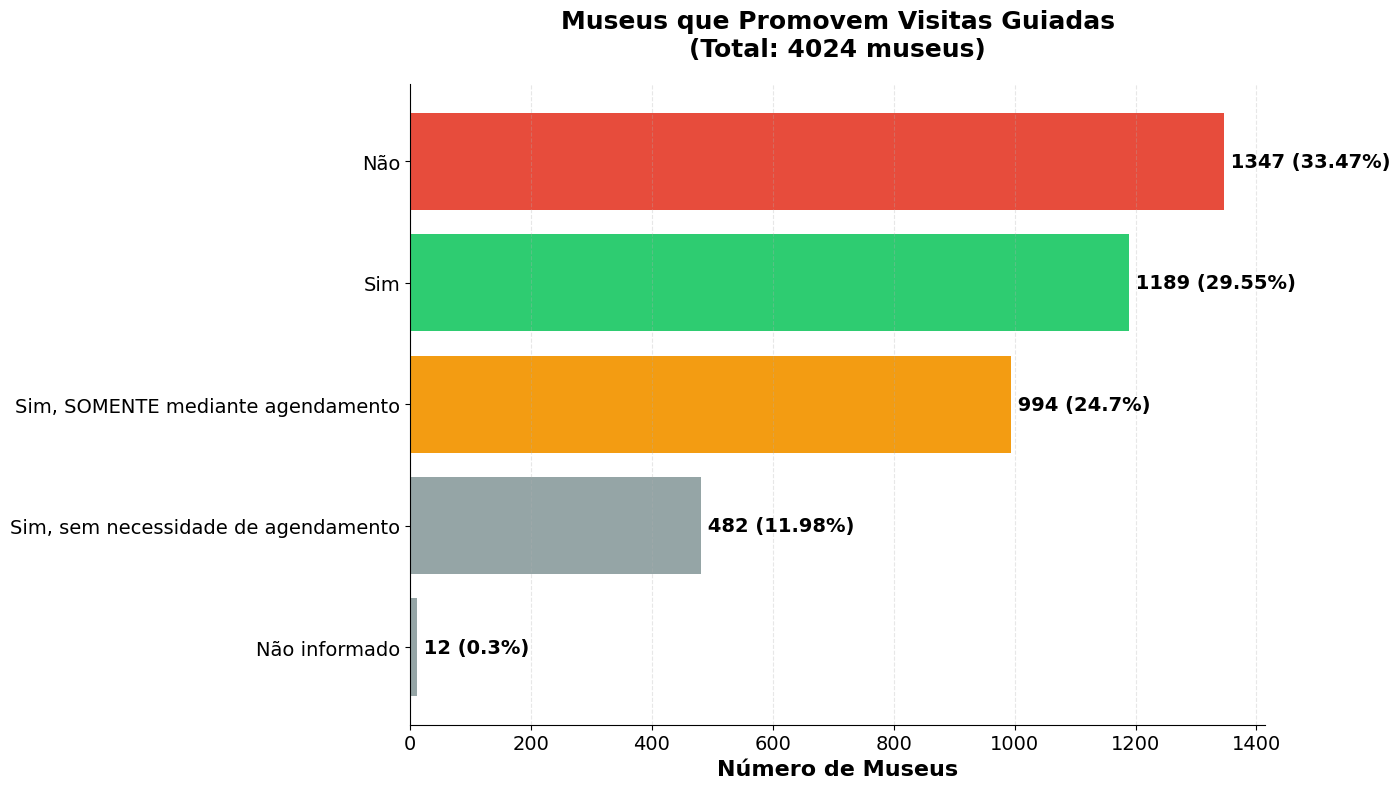


MUSEUS QUE PROMOVEM VISITAS GUIADAS (ordenado do maior para o menor)
Resposta                                           Quantidade      %              
----------------------------------------------------------------------------------------------------
Não                                                1347            33.47          %
Sim                                                1189            29.55          %
Sim, SOMENTE mediante agendamento                  994             24.7           %
Sim, sem necessidade de agendamento                482             11.98          %
Não informado                                      12              0.3            %
----------------------------------------------------------------------------------------------------
TOTAL                                              4024            100.0%


In [79]:
# Nome da coluna
coluna_visitas = 'O museu promove visitas com guia/mediador/monitor/educador/orientador?'

# Verificar os valores únicos
print(f"Valores únicos em '{coluna_visitas}':")
print(df[coluna_visitas].value_counts())
print("\n")

# Contar os valores
visitas_counts = df[coluna_visitas].value_counts()

# Calcular totais
total_museus = len(df)

# Calcular porcentagens em relação ao total de museus
percentuais = (visitas_counts / total_museus * 100).round(2)

# Criar figura
fig, ax = plt.subplots(figsize=(14, 8))

# Preparar dados ordenados (do menor para o maior para inverter no gráfico)
categorias = visitas_counts.index.tolist()
valores = visitas_counts.values
percentuais_lista = [percentuais[cat] for cat in categorias]

# Ordenar do menor para o maior
dados_ordenados = sorted(zip(categorias, valores, percentuais_lista), 
                         key=lambda x: x[1], reverse=False)
categorias_ord = [x[0] for x in dados_ordenados]
valores_ord = [x[1] for x in dados_ordenados]
percentuais_ord = [x[2] for x in dados_ordenados]

# Definir cores
colors_map = {
    'Sim': '#2ecc71',
    'Não': '#e74c3c',
    'Sim, SOMENTE mediante agendamento': '#f39c12',
}
colors_bars = [colors_map.get(cat, '#95a5a6') for cat in categorias_ord]

# Criar barras horizontais
y_pos = range(len(categorias_ord))
bars = ax.barh(y_pos, valores_ord, color=colors_bars)

# Adicionar valores e porcentagens
for i, (bar, count, perc) in enumerate(zip(bars, valores_ord, percentuais_ord)):
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2.,
            f' {int(count)} ({perc}%)',
            ha='left', va='center', fontsize=14, fontweight='bold')

# Configurações do gráfico
ax.set_yticks(y_pos)
ax.set_yticklabels(categorias_ord, fontsize=14)
ax.set_xlabel('Número de Museus', fontsize=16, fontweight='bold')
ax.set_title(f'Museus que Promovem Visitas Guiadas\n(Total: {total_museus} museus)', 
             fontsize=18, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', labelsize=14)

plt.tight_layout()
plt.show()

# Mostrar tabela com detalhes
print("\n" + "="*100)
print("MUSEUS QUE PROMOVEM VISITAS GUIADAS (ordenado do maior para o menor)")
print("="*100)
print(f"{'Resposta':<50} {'Quantidade':<15} {'%':<15}")
print("-"*100)

# Ordenar por quantidade (maior para menor)
dados_tabela = sorted(zip(categorias, valores, percentuais_lista), 
                      key=lambda x: x[1], reverse=True)

for resposta, count, perc in dados_tabela:
    print(f"{resposta:<50} {count:<15} {perc:<15}%")

print("-"*100)
print(f"{'TOTAL':<50} {total_museus:<15} 100.0%")
print("="*100)

### 8.6.2 - Por esfera

Valores únicos em 'O museu promove visitas com guia/mediador/monitor/educador/orientador?':
O museu promove visitas com guia/mediador/monitor/educador/orientador?
Não                                    1347
Sim                                    1189
Sim, SOMENTE mediante agendamento       994
Sim, sem necessidade de agendamento     482
Não informado                            12
Name: count, dtype: int64




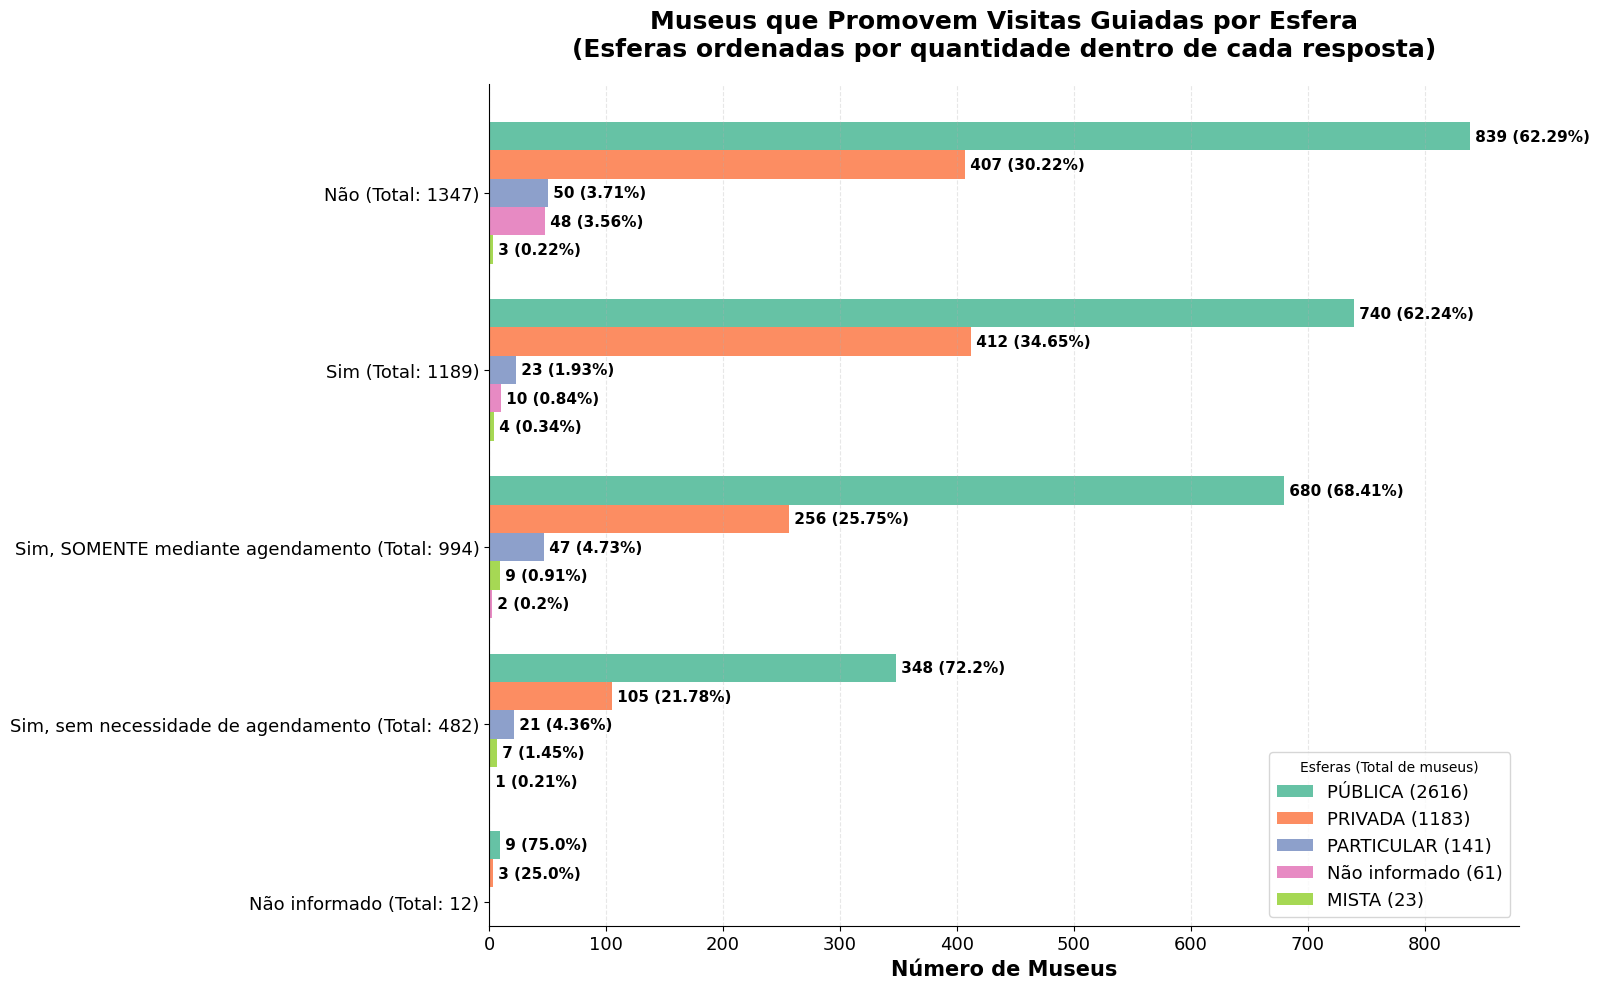


MUSEUS QUE PROMOVEM VISITAS GUIADAS POR ESFERA
(Esferas listadas em ordem decrescente de quantidade para cada resposta)

Não (Total: 1347 museus)
--------------------------------------------------------------------------------
Esfera               Quantidade      %         
--------------------------------------------------------------------------------
PÚBLICA              839             62.29     %
PRIVADA              407             30.22     %
PARTICULAR           50              3.71      %
Não informado        48              3.56      %
MISTA                3               0.22      %

Sim (Total: 1189 museus)
--------------------------------------------------------------------------------
Esfera               Quantidade      %         
--------------------------------------------------------------------------------
PÚBLICA              740             62.24     %
PRIVADA              412             34.65     %
PARTICULAR           23              1.93      %
Não informado  

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Nome da coluna
coluna_visitas = 'O museu promove visitas com guia/mediador/monitor/educador/orientador?'

# Verificar os valores únicos
print(f"Valores únicos em '{coluna_visitas}':")
print(df[coluna_visitas].value_counts())
print("\n")

# Obter todas as esferas únicas
esferas_unicas = df['Esfera'].unique()
num_esferas = len(esferas_unicas)

# Obter todas as respostas únicas
respostas_unicas = df[coluna_visitas].unique()

# Preparar dados para cada resposta
dados_respostas = {}
for resposta in respostas_unicas:
    df_resposta = df[df[coluna_visitas] == resposta]
    total_resposta = len(df_resposta)
    
    # Contar por esfera
    esfera_counts = df_resposta['Esfera'].value_counts()
    
    # Preparar dados para cada esfera
    dados_esfera = {}
    for esfera in esferas_unicas:
        count = esfera_counts.get(esfera, 0)
        perc = round((count / total_resposta * 100), 2) if total_resposta > 0 else 0
        dados_esfera[esfera] = {'count': count, 'perc': perc}
    
    # Ordenar esferas por quantidade dentro dessa resposta (maior para menor)
    esferas_ordenadas_resposta = sorted(dados_esfera.keys(), 
                                        key=lambda x: dados_esfera[x]['count'], 
                                        reverse=True)
    
    dados_respostas[resposta] = {
        'total': total_resposta,
        'esferas': dados_esfera,
        'esferas_ordenadas': esferas_ordenadas_resposta
    }

# Ordenar respostas por total de museus (para melhor visualização)
respostas_ordenadas = sorted(dados_respostas.keys(), 
                             key=lambda x: dados_respostas[x]['total'], 
                             reverse=True)

# Criar cores únicas para cada esfera
cores_esferas = plt.cm.Set2(range(num_esferas))

# Criar um mapeamento fixo de cores para esferas
esferas_todas_ordenadas = sorted(esferas_unicas, 
                                 key=lambda x: df[df['Esfera'] == x].shape[0], 
                                 reverse=True)
cores_map = {esfera: cores_esferas[i] for i, esfera in enumerate(esferas_todas_ordenadas)}

# Criar figura
fig, ax = plt.subplots(figsize=(16, 10))

# Preparar dados para o gráfico
y_pos = np.arange(len(respostas_ordenadas))
height = 0.8 / num_esferas  # Dividir o espaço pelo número de esferas

# Para cada resposta, criar as barras ordenadas
for idx_resposta, resposta in enumerate(respostas_ordenadas):
    esferas_ordenadas_resposta = dados_respostas[resposta]['esferas_ordenadas']
    
    # Criar barras para cada esfera dentro desta resposta
    for i, esfera in enumerate(esferas_ordenadas_resposta):
        offset = (i - (num_esferas - 1) / 2) * height
        y_position = y_pos[idx_resposta] + offset
        
        count = dados_respostas[resposta]['esferas'][esfera]['count']
        perc = dados_respostas[resposta]['esferas'][esfera]['perc']
        
        if count > 0:  # Só desenhar barra se houver valores
            bar = ax.barh(y_position, count, height, color=cores_map[esfera])
            
            # Adicionar texto
            ax.text(count, y_position,
                   f' {int(count)} ({perc}%)',
                   ha='left', va='center', fontsize=11, fontweight='bold')

# Criar labels das respostas com total
labels_respostas = []
totais = [dados_respostas[resposta]['total'] for resposta in respostas_ordenadas]
for i, resposta in enumerate(respostas_ordenadas):
    label = str(resposta)
    if len(label) > 50:
        label = label[:47] + '...'
    labels_respostas.append(f'{label} (Total: {totais[i]})')

# Criar legenda personalizada (ordenada por total de museus na esfera)
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=cores_map[esfera], label=f'{esfera} ({df[df["Esfera"] == esfera].shape[0]})') 
                   for esfera in esferas_todas_ordenadas]

# Configurações do gráfico
ax.set_yticks(y_pos)
ax.set_yticklabels(labels_respostas, fontsize=13)
ax.set_xlabel('Número de Museus', fontsize=15, fontweight='bold')
ax.set_title('Museus que Promovem Visitas Guiadas por Esfera\n(Esferas ordenadas por quantidade dentro de cada resposta)', 
             fontsize=18, fontweight='bold', pad=20)
ax.legend(handles=legend_elements, loc='lower right', fontsize=13, frameon=True, title='Esferas (Total de museus)')
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', labelsize=13)
ax.invert_yaxis()

plt.tight_layout()
plt.show()

# Mostrar tabela com detalhes
print("\n" + "="*120)
print("MUSEUS QUE PROMOVEM VISITAS GUIADAS POR ESFERA")
print("(Esferas listadas em ordem decrescente de quantidade para cada resposta)")
print("="*120)

for resposta in respostas_ordenadas:
    dados = dados_respostas[resposta]
    resposta_texto = str(resposta)
    
    print(f"\n{resposta_texto} (Total: {dados['total']} museus)")
    print("-" * 80)
    print(f"{'Esfera':<20} {'Quantidade':<15} {'%':<10}")
    print("-" * 80)
    
    # Mostrar esferas ordenadas para esta resposta
    for esfera in dados['esferas_ordenadas']:
        count = dados['esferas'][esfera]['count']
        perc = dados['esferas'][esfera]['perc']
        if count > 0:  # Só mostrar esferas com museus
            print(f"{esfera:<20} {count:<15} {perc:<10}%")

print("\n" + "="*120)

# Resumo estatístico
print("\n" + "="*100)
print("RESUMO ESTATÍSTICO")
print("="*100)
print(f"Total de Esferas: {num_esferas}")
print(f"Total de Respostas diferentes: {len(respostas_unicas)}")
print(f"Total de Museus: {len(df)}")
print("="*100)

### 8.6.3 - Por Estado

Valores únicos em 'O museu promove visitas com guia/mediador/monitor/educador/orientador?':
O museu promove visitas com guia/mediador/monitor/educador/orientador?
Não                                    1347
Sim                                    1189
Sim, SOMENTE mediante agendamento       994
Sim, sem necessidade de agendamento     482
Não informado                            12
Name: count, dtype: int64




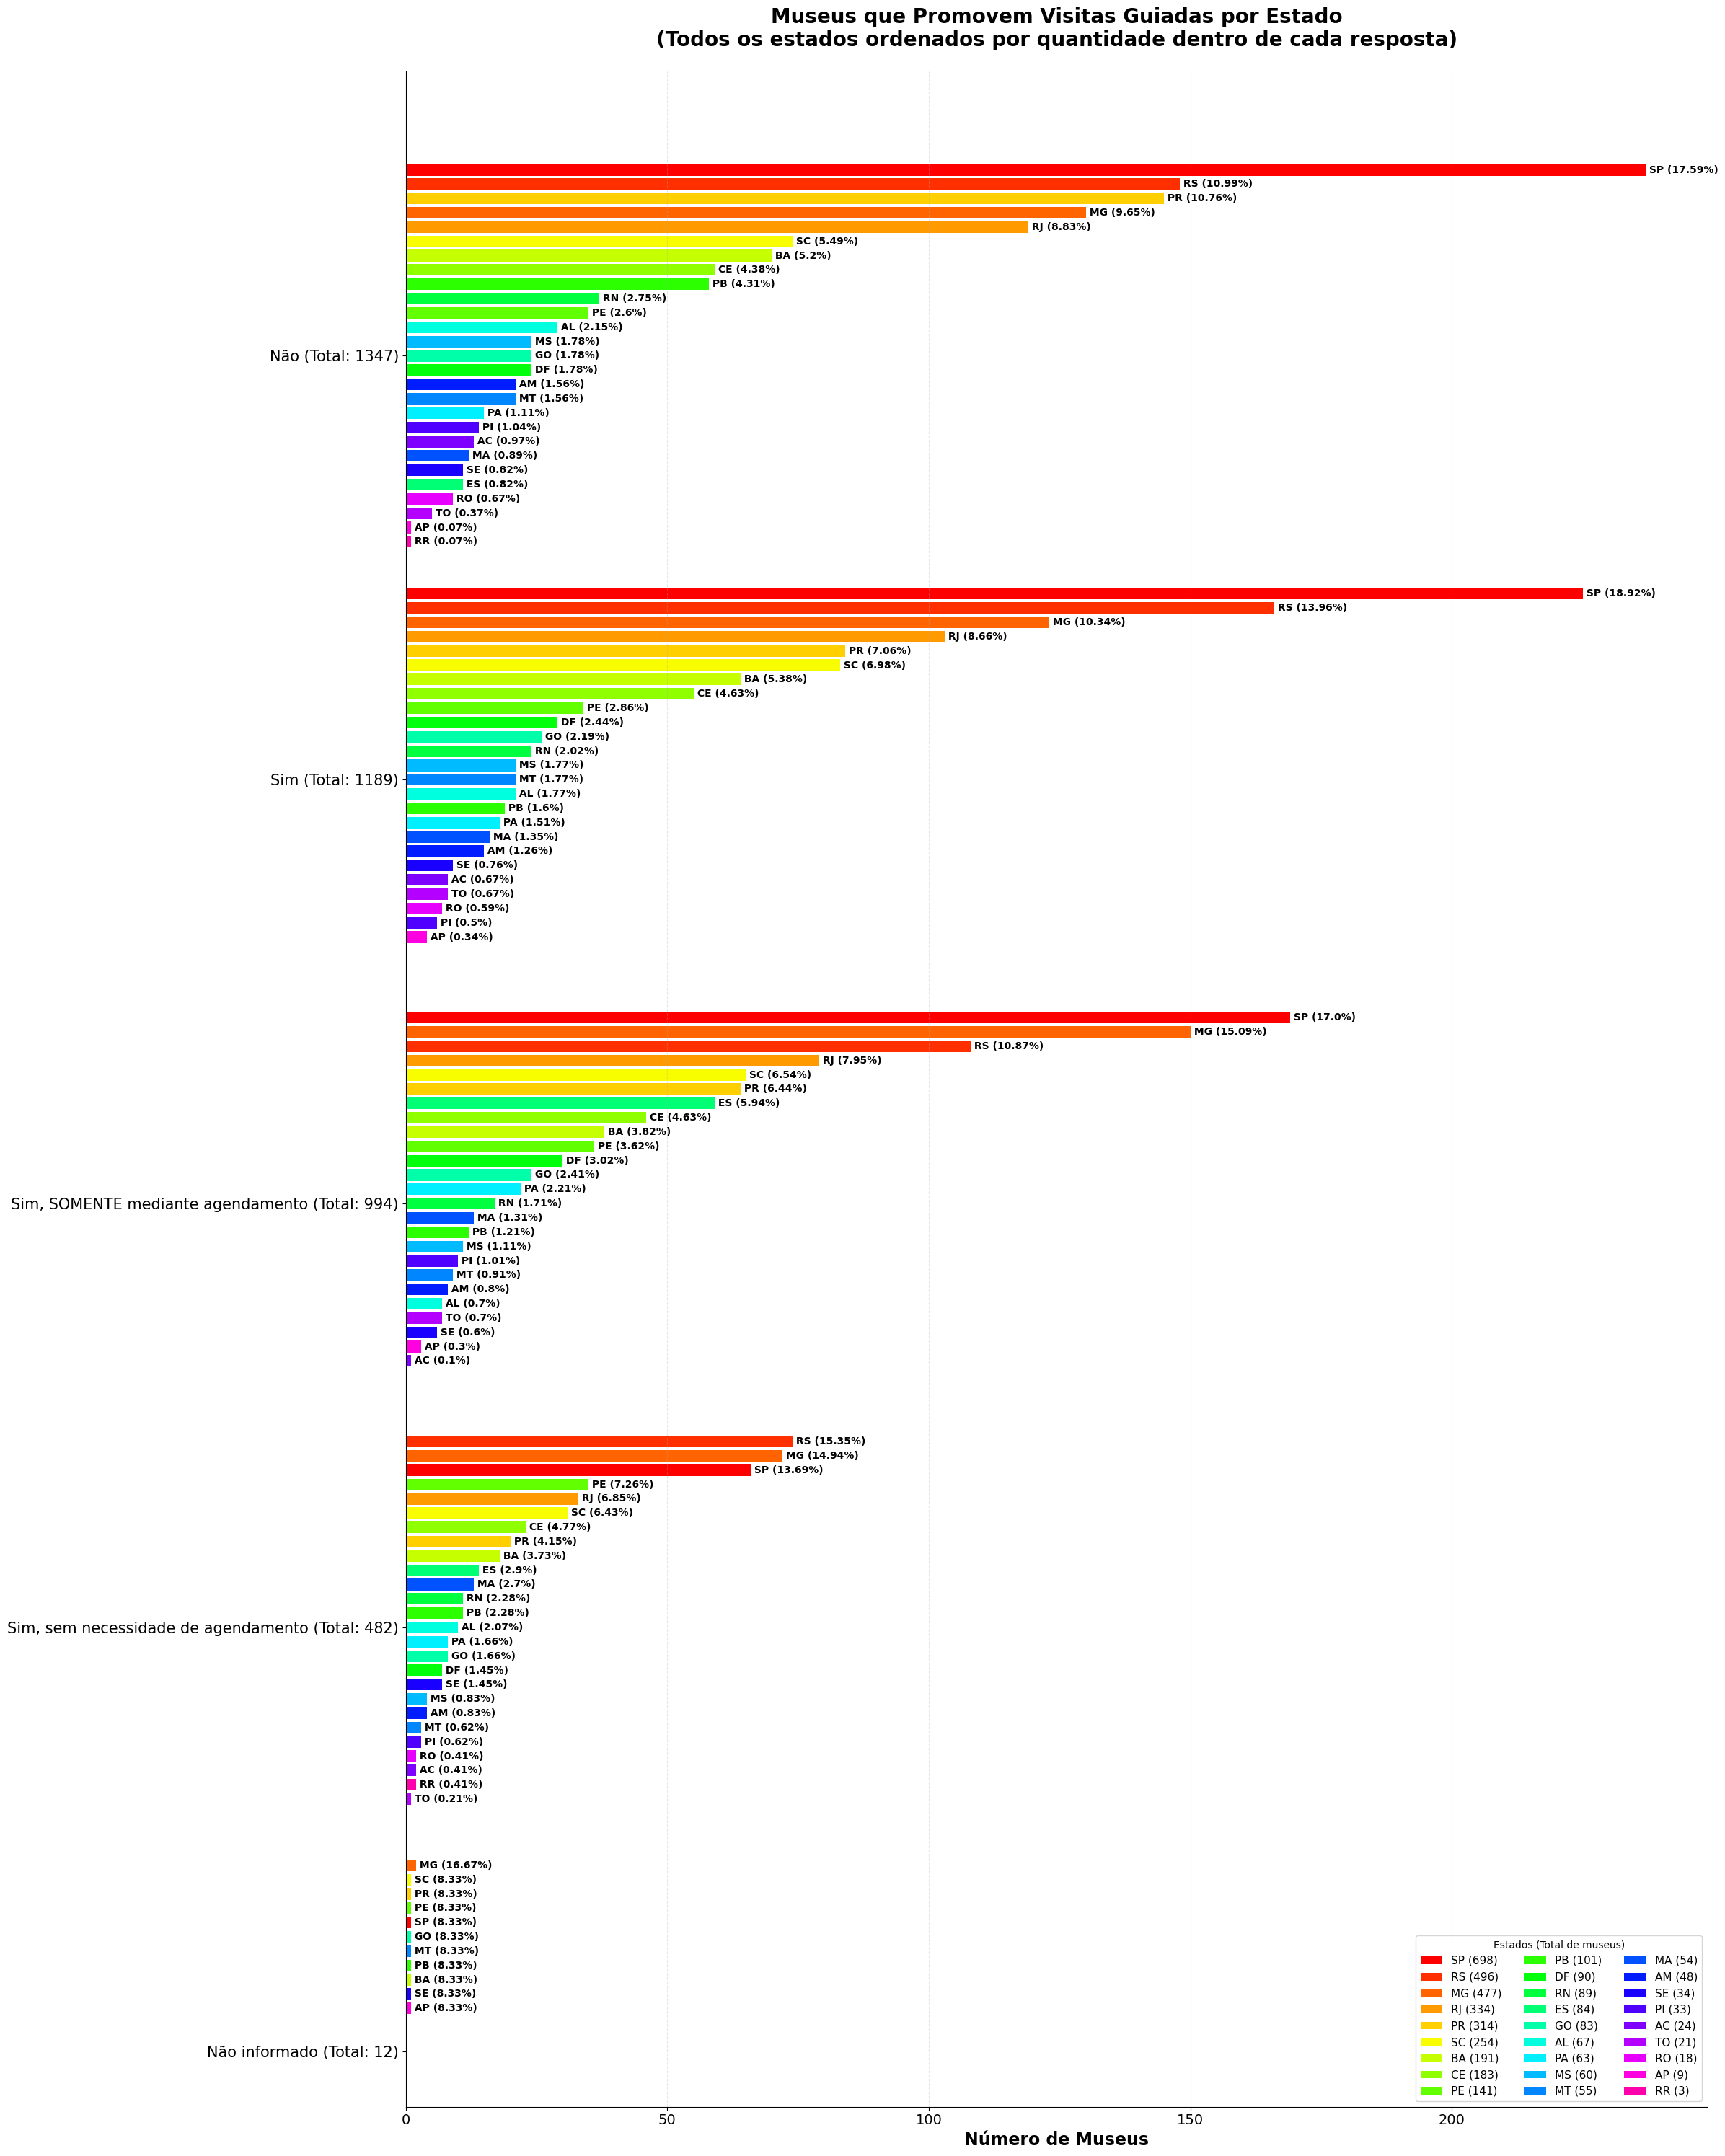


MUSEUS QUE PROMOVEM VISITAS GUIADAS POR ESTADO (TODOS OS ESTADOS)
(Estados listados em ordem decrescente de quantidade para cada resposta)

Não (Total: 1347 museus)
--------------------------------------------------------------------------------
Posição    Estado     Quantidade      %         
--------------------------------------------------------------------------------
1          SP         237             17.59     %
2          RS         148             10.99     %
3          PR         145             10.76     %
4          MG         130             9.65      %
5          RJ         119             8.83      %
6          SC         74              5.49      %
7          BA         70              5.2       %
8          CE         59              4.38      %
9          PB         58              4.31      %
10         RN         37              2.75      %
11         PE         35              2.6       %
12         AL         29              2.15      %
13         MS         2

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Nome da coluna
coluna_visitas = 'O museu promove visitas com guia/mediador/monitor/educador/orientador?'

# Verificar os valores únicos
print(f"Valores únicos em '{coluna_visitas}':")
print(df[coluna_visitas].value_counts())
print("\n")

# Obter todos os estados únicos
estados_unicos = df['Estado'].unique()
num_estados = len(estados_unicos)

# Obter todas as respostas únicas
respostas_unicas = df[coluna_visitas].unique()

# Preparar dados para cada resposta
dados_respostas = {}
for resposta in respostas_unicas:
    df_resposta = df[df[coluna_visitas] == resposta]
    total_resposta = len(df_resposta)
    
    # Contar por estado
    estado_counts = df_resposta['Estado'].value_counts()
    
    # Preparar dados para cada estado
    dados_estado = {}
    for estado in estados_unicos:
        count = estado_counts.get(estado, 0)
        perc = round((count / total_resposta * 100), 2) if total_resposta > 0 else 0
        dados_estado[estado] = {'count': count, 'perc': perc}
    
    # Ordenar estados por quantidade dentro dessa resposta (maior para menor)
    estados_ordenados_resposta = sorted(dados_estado.keys(), 
                                        key=lambda x: dados_estado[x]['count'], 
                                        reverse=True)
    
    dados_respostas[resposta] = {
        'total': total_resposta,
        'estados': dados_estado,
        'estados_ordenados': estados_ordenados_resposta
    }

# Ordenar respostas por total de museus (para melhor visualização)
respostas_ordenadas = sorted(dados_respostas.keys(), 
                             key=lambda x: dados_respostas[x]['total'], 
                             reverse=True)

# Criar cores únicas para cada estado
cores_estados = plt.cm.tab20c(range(num_estados))
if num_estados > 20:
    cores_estados = plt.cm.hsv(np.linspace(0, 0.9, num_estados))

# Criar um mapeamento fixo de cores para estados
estados_todos_ordenados = sorted(estados_unicos, 
                                 key=lambda x: df[df['Estado'] == x].shape[0], 
                                 reverse=True)
cores_map = {estado: cores_estados[i] for i, estado in enumerate(estados_todos_ordenados)}

# Criar figura MUITO MAIOR para acomodar 27 estados por resposta
fig, ax = plt.subplots(figsize=(24, 30))

# Preparar dados para o gráfico com MUITO espaçamento
espacamento_entre_grupos = 8  # Espaço grande entre grupos de respostas
y_pos = np.arange(len(respostas_ordenadas)) * espacamento_entre_grupos
height = 0.22  # Altura de cada barra

# Para cada resposta, criar as barras ordenadas
for idx_resposta, resposta in enumerate(respostas_ordenadas):
    estados_ordenados_resposta = dados_respostas[resposta]['estados_ordenados']
    
    # Criar barras para cada estado dentro desta resposta
    for i, estado in enumerate(estados_ordenados_resposta):
        # Calcular offset - distribuir os 27 estados ao redor do centro
        offset = (i - (num_estados - 1) / 2) * (height + 0.05)
        y_position = y_pos[idx_resposta] + offset
        
        count = dados_respostas[resposta]['estados'][estado]['count']
        perc = dados_respostas[resposta]['estados'][estado]['perc']
        
        if count > 0:  # Só desenhar barra se houver valores
            bar = ax.barh(y_position, count, height, color=cores_map[estado])
            
            # Adicionar estado e porcentagem no final da barra
            ax.text(count, y_position,
                   f' {estado} ({perc}%)',
                   ha='left', va='center', fontsize=10, fontweight='bold')

# Criar labels das respostas com total
labels_respostas = []
totais = [dados_respostas[resposta]['total'] for resposta in respostas_ordenadas]
for i, resposta in enumerate(respostas_ordenadas):
    label = str(resposta)
    if len(label) > 50:
        label = label[:47] + '...'
    labels_respostas.append(f'{label} (Total: {totais[i]})')

# Criar legenda personalizada (ordenada por total de museus no estado)
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=cores_map[estado], label=f'{estado} ({df[df["Estado"] == estado].shape[0]})') 
                   for estado in estados_todos_ordenados]

# Configurações do gráfico
ax.set_yticks(y_pos)
ax.set_yticklabels(labels_respostas, fontsize=15)
ax.set_xlabel('Número de Museus', fontsize=17, fontweight='bold')
ax.set_title('Museus que Promovem Visitas Guiadas por Estado\n(Todos os estados ordenados por quantidade dentro de cada resposta)', 
             fontsize=20, fontweight='bold', pad=25)
ax.legend(handles=legend_elements, loc='lower right', fontsize=11, frameon=True, ncol=3, title='Estados (Total de museus)')
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', labelsize=14)
ax.invert_yaxis()

plt.tight_layout()
plt.show()

# Mostrar tabela com detalhes COMPLETA
print("\n" + "="*120)
print("MUSEUS QUE PROMOVEM VISITAS GUIADAS POR ESTADO (TODOS OS ESTADOS)")
print("(Estados listados em ordem decrescente de quantidade para cada resposta)")
print("="*120)

for resposta in respostas_ordenadas:
    dados = dados_respostas[resposta]
    resposta_texto = str(resposta)
    
    print(f"\n{resposta_texto} (Total: {dados['total']} museus)")
    print("-" * 80)
    print(f"{'Posição':<10} {'Estado':<10} {'Quantidade':<15} {'%':<10}")
    print("-" * 80)
    
    # Mostrar TODOS os estados ordenados para esta resposta
    for pos, estado in enumerate(dados['estados_ordenados'], 1):
        count = dados['estados'][estado]['count']
        perc = dados['estados'][estado]['perc']
        if count > 0:  # Só mostrar estados com museus
            print(f"{pos:<10} {estado:<10} {count:<15} {perc:<10}%")

print("\n" + "="*120)

# Resumo estatístico
print("\n" + "="*100)
print("RESUMO ESTATÍSTICO")
print("="*100)
print(f"Total de Estados: {num_estados}")
print(f"Total de Respostas diferentes: {len(respostas_unicas)}")
print(f"Total de Museus: {len(df)}")
print("="*100)

## 8.7. Gratuidade

### 8.7.1 - Geral

In [82]:
print("="*100)
print("VALORES ÚNICOS NA COLUNA 'A entrada ao museu é cobrada?'")
print("="*100)

coluna_entrada = 'A entrada ao museu é cobrada?'

# Verificar valores únicos e suas quantidades
valores_unicos = df[coluna_entrada].value_counts()

print(f"\nTotal de valores únicos: {len(valores_unicos)}")
print(f"Total de museus: {len(df)}")
print(f"Total de valores nulos: {df[coluna_entrada].isna().sum()}\n")

print("-"*100)
print(f"{'Valor':<50} {'Quantidade':<15} {'%':<10}")
print("-"*100)

for valor, count in valores_unicos.items():
    perc = round((count / len(df) * 100), 2)
    valor_texto = str(valor)[:47] + '...' if len(str(valor)) > 50 else str(valor)
    print(f"{valor_texto:<50} {count:<15} {perc:<10}%")

print("="*100)

# Verificar se há valores nulos
if df[coluna_entrada].isna().sum() > 0:
    print(f"\nValores nulos: {df[coluna_entrada].isna().sum()}")
    perc_nulos = round((df[coluna_entrada].isna().sum() / len(df) * 100), 2)
    print(f"Porcentagem de nulos: {perc_nulos}%")
    print("="*100)

VALORES ÚNICOS NA COLUNA 'A entrada ao museu é cobrada?'

Total de valores únicos: 5
Total de museus: 4024
Total de valores nulos: 0

----------------------------------------------------------------------------------------------------
Valor                                              Quantidade      %         
----------------------------------------------------------------------------------------------------
Não                                                3409            84.72     %
Sim                                                523             13.0      %
Contribuição voluntária                            84              2.09      %
Não informado                                      5               0.12      %
Não disponível                                     3               0.07      %


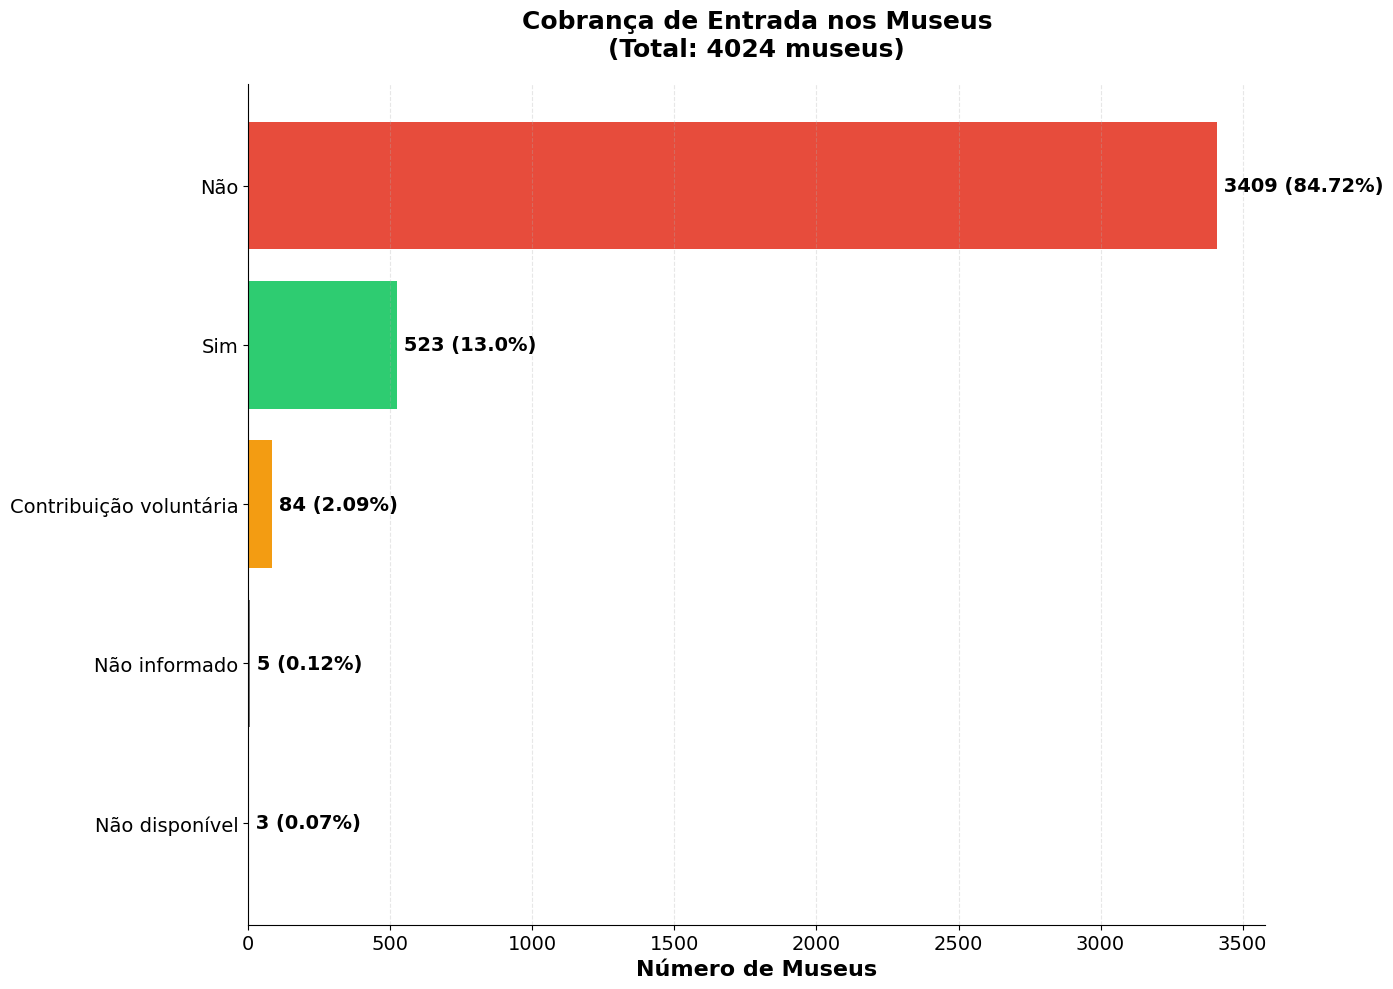


COBRANÇA DE ENTRADA NOS MUSEUS (ordenado do maior para o menor)
Resposta                                           Quantidade      %              
----------------------------------------------------------------------------------------------------
Não                                                3409            84.72          %
Sim                                                523             13.0           %
Contribuição voluntária                            84              2.09           %
Não informado                                      5               0.12           %
Não disponível                                     3               0.07           %
----------------------------------------------------------------------------------------------------
TOTAL                                              4024            100.0%


In [83]:
coluna_entrada = 'A entrada ao museu é cobrada?'

# Contar os valores
entrada_counts = df[coluna_entrada].value_counts()

# Calcular totais
total_museus = len(df)

# Calcular porcentagens em relação ao total de museus
percentuais = (entrada_counts / total_museus * 100).round(2)

# Criar figura
fig, ax = plt.subplots(figsize=(14, 10))

# Preparar dados ordenados (do menor para o maior para inverter no gráfico)
categorias = entrada_counts.index.tolist()
valores = entrada_counts.values
percentuais_lista = [percentuais[cat] for cat in categorias]

# Ordenar do menor para o maior
dados_ordenados = sorted(zip(categorias, valores, percentuais_lista), 
                         key=lambda x: x[1], reverse=False)
categorias_ord = [x[0] for x in dados_ordenados]
valores_ord = [x[1] for x in dados_ordenados]
percentuais_ord = [x[2] for x in dados_ordenados]

# Definir cores
colors_map = {
    'Não': '#e74c3c',
    'Sim': '#2ecc71',
    'Contribuição voluntária': '#f39c12',
    'Não informado': "#6e6e6e",
    'Não disponível': "#1a1a1a",
}
colors_bars = [colors_map.get(cat, '#34495e') for cat in categorias_ord]

# Criar barras horizontais
y_pos = range(len(categorias_ord))
bars = ax.barh(y_pos, valores_ord, color=colors_bars)

# Adicionar valores e porcentagens no final das barras
for i, (bar, count, perc) in enumerate(zip(bars, valores_ord, percentuais_ord)):
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2.,
            f' {int(count)} ({perc}%)',
            ha='left', va='center', fontsize=14, fontweight='bold')

# Configurações do gráfico
ax.set_yticks(y_pos)
ax.set_yticklabels(categorias_ord, fontsize=14)
ax.set_xlabel('Número de Museus', fontsize=16, fontweight='bold')
ax.set_title(f'Cobrança de Entrada nos Museus\n(Total: {total_museus} museus)', 
             fontsize=18, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', labelsize=14)

plt.tight_layout()
plt.show()

# Mostrar tabela com detalhes
print("\n" + "="*100)
print("COBRANÇA DE ENTRADA NOS MUSEUS (ordenado do maior para o menor)")
print("="*100)
print(f"{'Resposta':<50} {'Quantidade':<15} {'%':<15}")
print("-"*100)

# Ordenar por quantidade (maior para menor)
dados_tabela = sorted(zip(categorias, valores, percentuais_lista), 
                      key=lambda x: x[1], reverse=True)

for resposta, count, perc in dados_tabela:
    print(f"{resposta:<50} {count:<15} {perc:<15}%")

print("-"*100)
print(f"{'TOTAL':<50} {total_museus:<15} 100.0%")
print("="*100)

### 8.7.2 - Por esfera

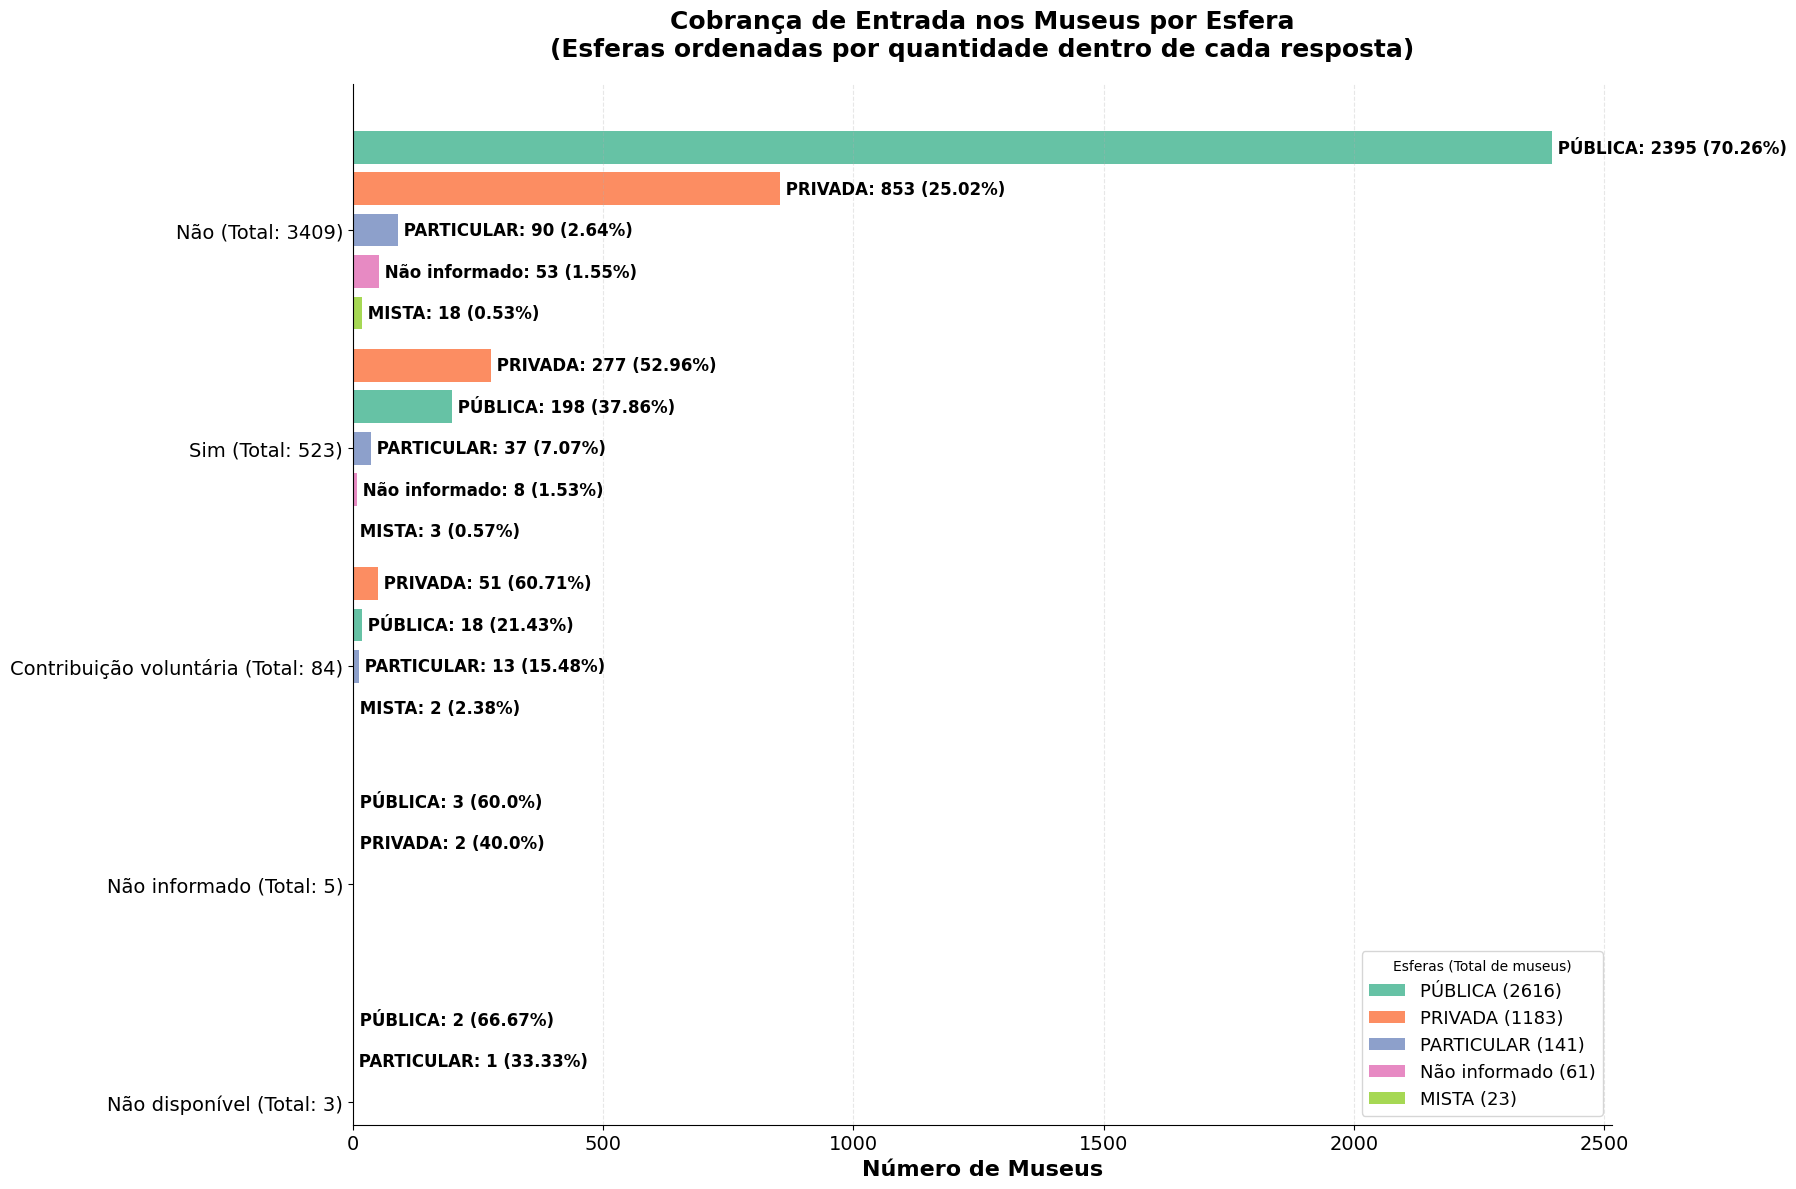


COBRANÇA DE ENTRADA NOS MUSEUS POR ESFERA
(Esferas listadas em ordem decrescente de quantidade para cada resposta)

Não (Total: 3409 museus)
--------------------------------------------------------------------------------
Esfera               Quantidade      %         
--------------------------------------------------------------------------------
PÚBLICA              2395            70.26     %
PRIVADA              853             25.02     %
PARTICULAR           90              2.64      %
Não informado        53              1.55      %
MISTA                18              0.53      %

Sim (Total: 523 museus)
--------------------------------------------------------------------------------
Esfera               Quantidade      %         
--------------------------------------------------------------------------------
PRIVADA              277             52.96     %
PÚBLICA              198             37.86     %
PARTICULAR           37              7.07      %
Não informado        

In [84]:
coluna_entrada = 'A entrada ao museu é cobrada?'

# Obter todas as esferas únicas
esferas_unicas = df['Esfera'].unique()
num_esferas = len(esferas_unicas)

# Obter todas as respostas únicas sobre cobrança de entrada
respostas_unicas = df[coluna_entrada].unique()

# Preparar dados para cada resposta
dados_respostas = {}
for resposta in respostas_unicas:
    df_resposta = df[df[coluna_entrada] == resposta]
    total_resposta = len(df_resposta)
    
    # Contar por esfera
    esfera_counts = df_resposta['Esfera'].value_counts()
    
    # Preparar dados para cada esfera
    dados_esfera = {}
    for esfera in esferas_unicas:
        count = esfera_counts.get(esfera, 0)
        perc = round((count / total_resposta * 100), 2) if total_resposta > 0 else 0
        dados_esfera[esfera] = {'count': count, 'perc': perc}
    
    # Ordenar esferas por quantidade dentro dessa resposta (maior para menor)
    esferas_ordenadas_resposta = sorted(dados_esfera.keys(), 
                                        key=lambda x: dados_esfera[x]['count'], 
                                        reverse=True)
    
    dados_respostas[resposta] = {
        'total': total_resposta,
        'esferas': dados_esfera,
        'esferas_ordenadas': esferas_ordenadas_resposta
    }

# Ordenar respostas por total de museus (para melhor visualização)
respostas_ordenadas = sorted(dados_respostas.keys(), 
                             key=lambda x: dados_respostas[x]['total'], 
                             reverse=True)

# Criar cores únicas para cada esfera
cores_esferas = plt.cm.Set2(range(num_esferas))

# Criar um mapeamento fixo de cores para esferas
esferas_todas_ordenadas = sorted(esferas_unicas, 
                                 key=lambda x: df[df['Esfera'] == x].shape[0], 
                                 reverse=True)
cores_map = {esfera: cores_esferas[i] for i, esfera in enumerate(esferas_todas_ordenadas)}

# Criar figura
fig, ax = plt.subplots(figsize=(18, 12))

# Preparar dados para o gráfico
espacamento_entre_grupos = 2
y_pos = np.arange(len(respostas_ordenadas)) * espacamento_entre_grupos
height = 0.3

# Para cada resposta, criar as barras ordenadas
for idx_resposta, resposta in enumerate(respostas_ordenadas):
    esferas_ordenadas_resposta = dados_respostas[resposta]['esferas_ordenadas']
    
    # Criar barras para cada esfera dentro desta resposta
    for i, esfera in enumerate(esferas_ordenadas_resposta):
        offset = (i - (num_esferas - 1) / 2) * (height + 0.08)
        y_position = y_pos[idx_resposta] + offset
        
        count = dados_respostas[resposta]['esferas'][esfera]['count']
        perc = dados_respostas[resposta]['esferas'][esfera]['perc']
        
        if count > 0:  # Só desenhar barra se houver valores
            bar = ax.barh(y_position, count, height, color=cores_map[esfera])
            
            # Adicionar esfera, número e porcentagem no final da barra
            ax.text(count, y_position,
                   f' {esfera}: {int(count)} ({perc}%)',
                   ha='left', va='center', fontsize=12, fontweight='bold')

# Criar labels das respostas com total
labels_respostas = []
totais = [dados_respostas[resposta]['total'] for resposta in respostas_ordenadas]
for i, resposta in enumerate(respostas_ordenadas):
    label = str(resposta)
    if len(label) > 50:
        label = label[:47] + '...'
    labels_respostas.append(f'{label} (Total: {totais[i]})')

# Criar legenda personalizada (ordenada por total de museus na esfera)
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=cores_map[esfera], label=f'{esfera} ({df[df["Esfera"] == esfera].shape[0]})') 
                   for esfera in esferas_todas_ordenadas]

# Configurações do gráfico
ax.set_yticks(y_pos)
ax.set_yticklabels(labels_respostas, fontsize=14)
ax.set_xlabel('Número de Museus', fontsize=16, fontweight='bold')
ax.set_title('Cobrança de Entrada nos Museus por Esfera\n(Esferas ordenadas por quantidade dentro de cada resposta)', 
             fontsize=18, fontweight='bold', pad=20)
ax.legend(handles=legend_elements, loc='lower right', fontsize=13, frameon=True, title='Esferas (Total de museus)')
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', labelsize=14)
ax.invert_yaxis()

plt.tight_layout()
plt.show()

# Mostrar tabela com detalhes
print("\n" + "="*100)
print("COBRANÇA DE ENTRADA NOS MUSEUS POR ESFERA")
print("(Esferas listadas em ordem decrescente de quantidade para cada resposta)")
print("="*100)

for resposta in respostas_ordenadas:
    dados = dados_respostas[resposta]
    resposta_texto = str(resposta)
    
    print(f"\n{resposta_texto} (Total: {dados['total']} museus)")
    print("-" * 80)
    print(f"{'Esfera':<20} {'Quantidade':<15} {'%':<10}")
    print("-" * 80)
    
    # Mostrar esferas ordenadas para esta resposta
    for esfera in dados['esferas_ordenadas']:
        count = dados['esferas'][esfera]['count']
        perc = dados['esferas'][esfera]['perc']
        if count > 0:  # Só mostrar esferas com museus
            print(f"{esfera:<20} {count:<15} {perc:<10}%")

print("\n" + "="*100)

# Resumo por esfera
print("\n" + "="*100)
print("RESUMO POR ESFERA - COBRANÇA DE ENTRADA")
print("="*100)

for esfera in esferas_todas_ordenadas:
    df_esfera = df[df['Esfera'] == esfera]
    total_esfera = len(df_esfera)
    
    print(f"\n{esfera} (Total: {total_esfera} museus)")
    print("-" * 80)
    print(f"{'Resposta':<30} {'Quantidade':<15} {'% da Esfera':<15}")
    print("-" * 80)
    
    for resposta in respostas_ordenadas:
        count = df_esfera[df_esfera[coluna_entrada] == resposta].shape[0]
        perc = round((count / total_esfera * 100), 2) if total_esfera > 0 else 0
        print(f"{resposta:<30} {count:<15} {perc:<15}%")

print("\n" + "="*100)

# Resumo estatístico
total_museus = len(df)
print("\n" + "="*100)
print("RESUMO ESTATÍSTICO")
print("="*100)
print(f"Total de Esferas: {num_esferas}")
print(f"Total de respostas diferentes: {len(respostas_unicas)}")
print(f"Total de Museus: {total_museus}")
print("="*100)

### 8.7.3 - Por Estado

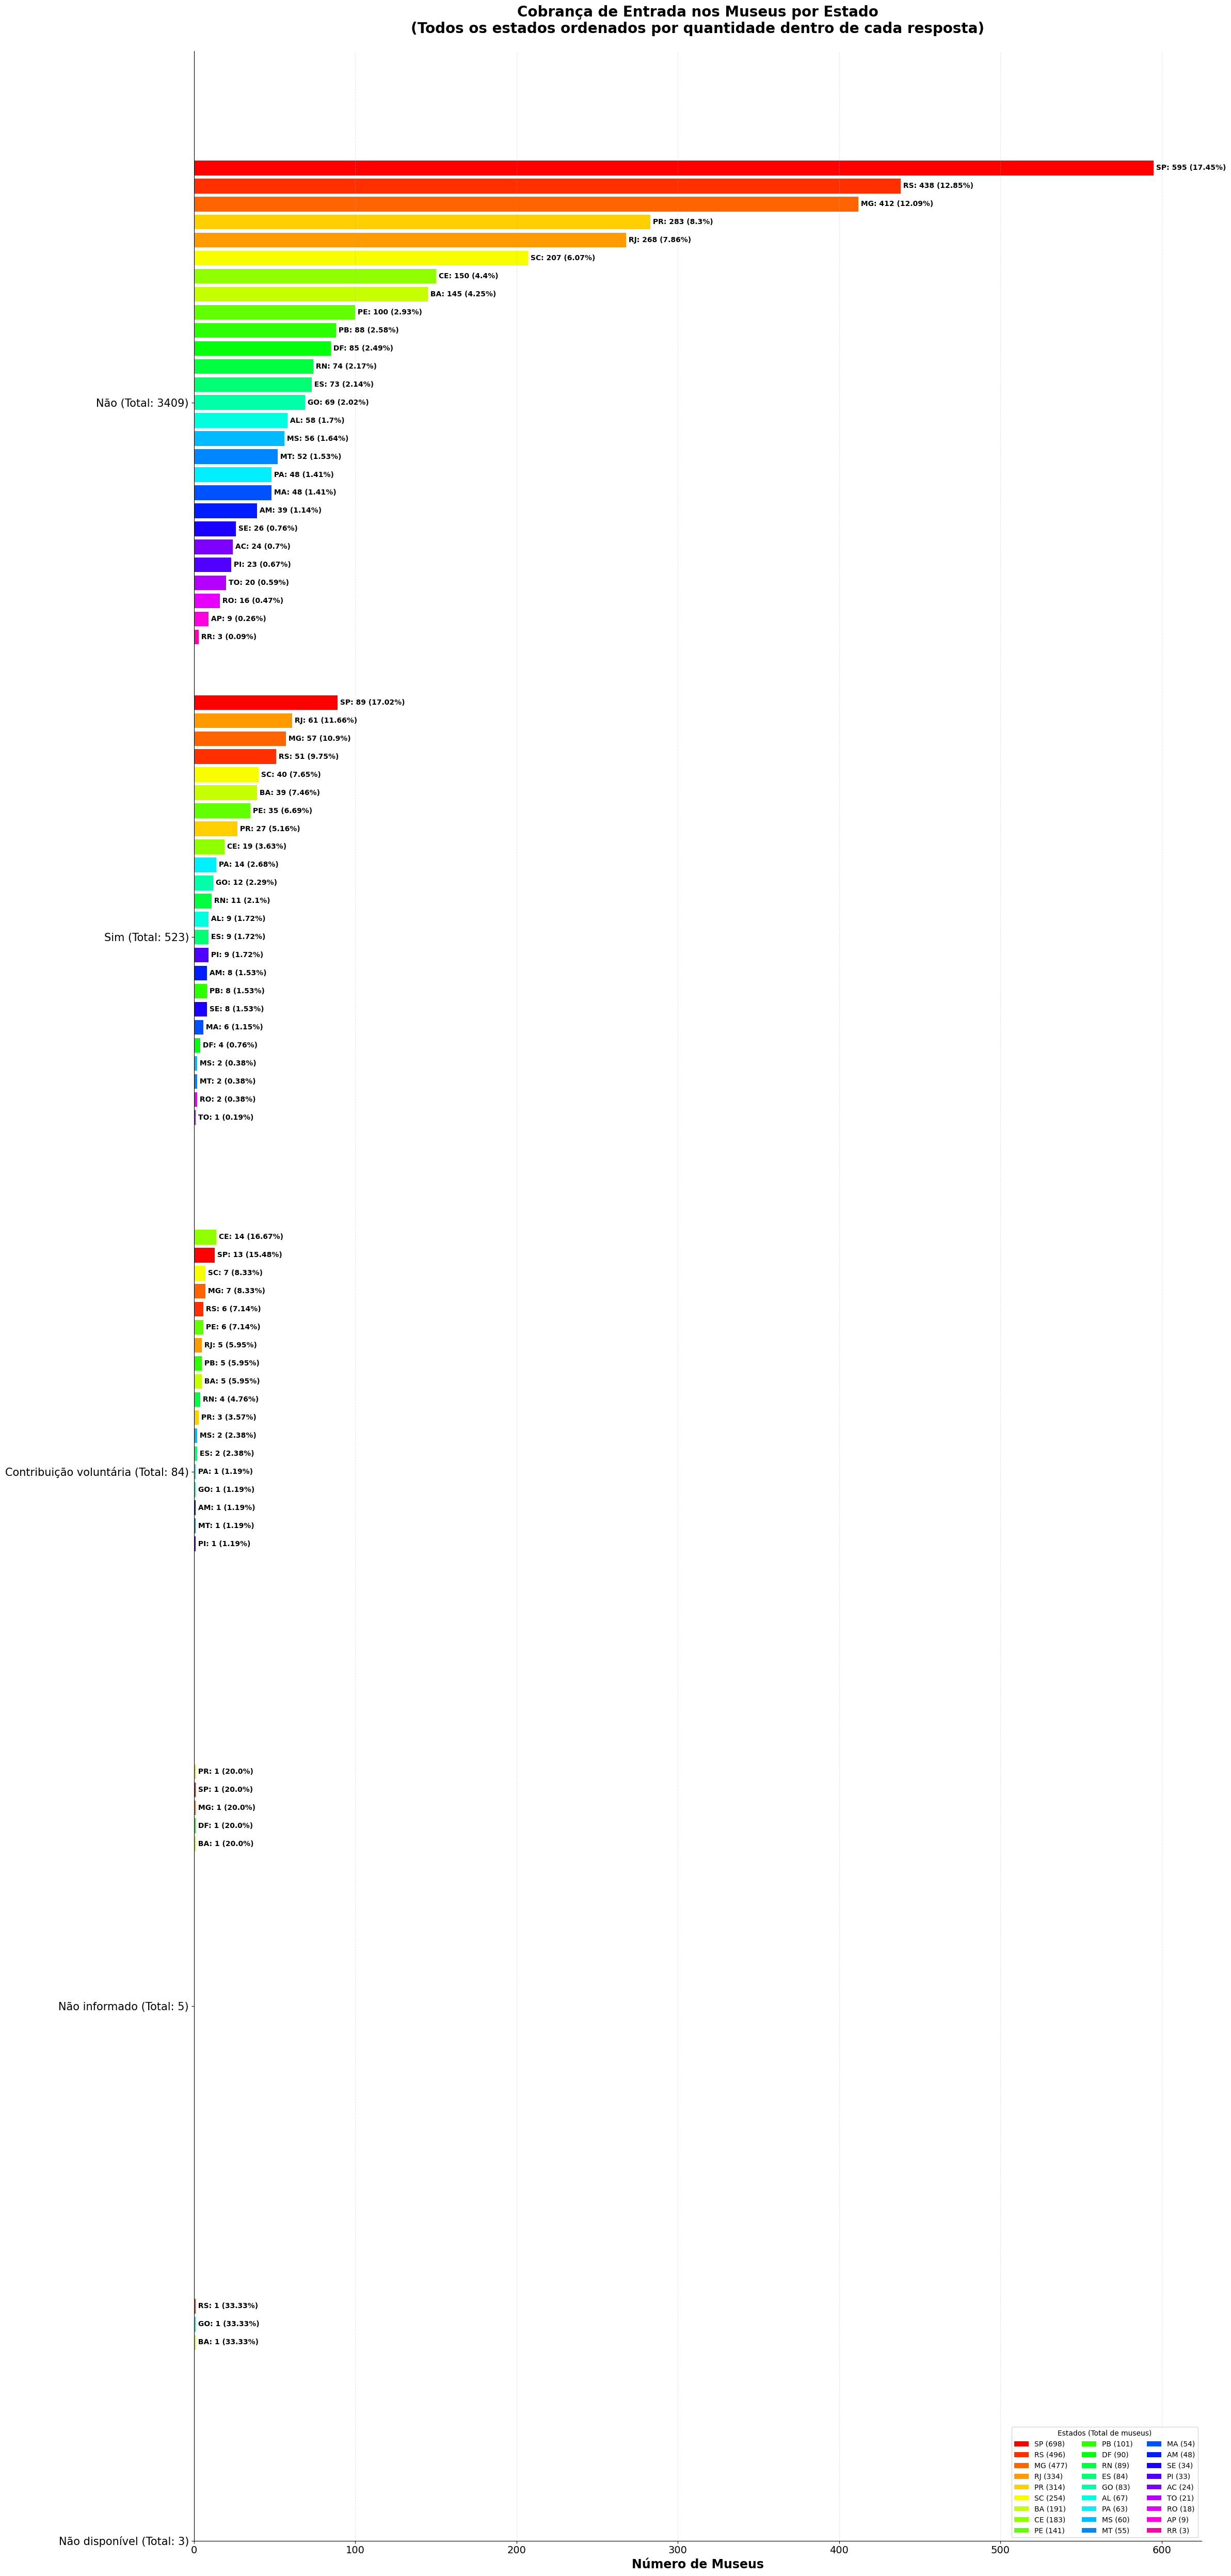


COBRANÇA DE ENTRADA NOS MUSEUS POR ESTADO
(Estados listados em ordem decrescente de quantidade para cada resposta)

Não (Total: 3409 museus)
--------------------------------------------------------------------------------
Posição    Estado     Quantidade      %         
--------------------------------------------------------------------------------
1          SP         595             17.45     %
2          RS         438             12.85     %
3          MG         412             12.09     %
4          PR         283             8.3       %
5          RJ         268             7.86      %
6          SC         207             6.07      %
7          CE         150             4.4       %
8          BA         145             4.25      %
9          PE         100             2.93      %
10         PB         88              2.58      %
... e mais 17 estados

Sim (Total: 523 museus)
--------------------------------------------------------------------------------
Posição    Estado  

In [85]:
coluna_entrada = 'A entrada ao museu é cobrada?'

# Obter todos os estados únicos
estados_unicos = df['Estado'].unique()
num_estados = len(estados_unicos)

# Obter todas as respostas únicas sobre cobrança de entrada
respostas_unicas = df[coluna_entrada].unique()

# Preparar dados para cada resposta
dados_respostas = {}
for resposta in respostas_unicas:
    df_resposta = df[df[coluna_entrada] == resposta]
    total_resposta = len(df_resposta)
    
    # Contar por estado
    estado_counts = df_resposta['Estado'].value_counts()
    
    # Preparar dados para cada estado
    dados_estado = {}
    for estado in estados_unicos:
        count = estado_counts.get(estado, 0)
        perc = round((count / total_resposta * 100), 2) if total_resposta > 0 else 0
        dados_estado[estado] = {'count': count, 'perc': perc}
    
    # Ordenar estados por quantidade dentro dessa resposta (maior para menor)
    estados_ordenados_resposta = sorted(dados_estado.keys(), 
                                        key=lambda x: dados_estado[x]['count'], 
                                        reverse=True)
    
    dados_respostas[resposta] = {
        'total': total_resposta,
        'estados': dados_estado,
        'estados_ordenados': estados_ordenados_resposta
    }

# Ordenar respostas por total de museus (para melhor visualização)
respostas_ordenadas = sorted(dados_respostas.keys(), 
                             key=lambda x: dados_respostas[x]['total'], 
                             reverse=True)

# Criar cores únicas para cada estado
cores_estados = plt.cm.tab20c(range(num_estados))
if num_estados > 20:
    cores_estados = plt.cm.hsv(np.linspace(0, 0.9, num_estados))

# Criar um mapeamento fixo de cores para estados
estados_todos_ordenados = sorted(estados_unicos, 
                                 key=lambda x: df[df['Estado'] == x].shape[0], 
                                 reverse=True)
cores_map = {estado: cores_estados[i] for i, estado in enumerate(estados_todos_ordenados)}

# Criar figura MUITO MAIOR para acomodar 27 estados por resposta
fig, ax = plt.subplots(figsize=(24, 50))

# Preparar dados para o gráfico com MUITO espaçamento
espacamento_entre_grupos = 8  # Espaço grande entre grupos de respostas
y_pos = np.arange(len(respostas_ordenadas)) * espacamento_entre_grupos
height = 0.22  # Altura de cada barra

# Para cada resposta, criar as barras ordenadas
for idx_resposta, resposta in enumerate(respostas_ordenadas):
    estados_ordenados_resposta = dados_respostas[resposta]['estados_ordenados']
    
    # Criar barras para cada estado dentro desta resposta
    for i, estado in enumerate(estados_ordenados_resposta):
        # Calcular offset - distribuir os 27 estados ao redor do centro
        offset = (i - (num_estados - 1) / 2) * (height + 0.05)
        y_position = y_pos[idx_resposta] + offset
        
        count = dados_respostas[resposta]['estados'][estado]['count']
        perc = dados_respostas[resposta]['estados'][estado]['perc']
        
        if count > 0:  # Só desenhar barra se houver valores
            bar = ax.barh(y_position, count, height, color=cores_map[estado])
            
            # Adicionar estado, número e porcentagem no final da barra
            ax.text(count, y_position,
                   f' {estado}: {int(count)} ({perc}%)',
                   ha='left', va='center', fontsize=10, fontweight='bold')

# Criar labels das respostas com total
labels_respostas = []
totais = [dados_respostas[resposta]['total'] for resposta in respostas_ordenadas]
for i, resposta in enumerate(respostas_ordenadas):
    label = str(resposta)
    if len(label) > 50:
        label = label[:47] + '...'
    labels_respostas.append(f'{label} (Total: {totais[i]})')

# Criar legenda personalizada (ordenada por total de museus no estado)
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=cores_map[estado], label=f'{estado} ({df[df["Estado"] == estado].shape[0]})') 
                   for estado in estados_todos_ordenados]

# Configurações do gráfico
ax.set_yticks(y_pos)
ax.set_yticklabels(labels_respostas, fontsize=15)
ax.set_xlabel('Número de Museus', fontsize=17, fontweight='bold')
ax.set_title('Cobrança de Entrada nos Museus por Estado\n(Todos os estados ordenados por quantidade dentro de cada resposta)', 
             fontsize=20, fontweight='bold', pad=25)
ax.legend(handles=legend_elements, loc='lower right', fontsize=10, frameon=True, ncol=3, title='Estados (Total de museus)')
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', labelsize=14)
ax.invert_yaxis()

plt.tight_layout()
plt.show()

# Mostrar tabela com detalhes (Top 10 estados por resposta)
print("\n" + "="*120)
print("COBRANÇA DE ENTRADA NOS MUSEUS POR ESTADO")
print("(Estados listados em ordem decrescente de quantidade para cada resposta)")
print("="*120)

for resposta in respostas_ordenadas:
    dados = dados_respostas[resposta]
    resposta_texto = str(resposta)
    
    print(f"\n{resposta_texto} (Total: {dados['total']} museus)")
    print("-" * 80)
    print(f"{'Posição':<10} {'Estado':<10} {'Quantidade':<15} {'%':<10}")
    print("-" * 80)
    
    # Mostrar top 10 estados ordenados para esta resposta
    count_exibidos = 0
    for pos, estado in enumerate(dados['estados_ordenados'], 1):
        count = dados['estados'][estado]['count']
        perc = dados['estados'][estado]['perc']
        if count > 0:  # Só mostrar estados com museus
            print(f"{pos:<10} {estado:<10} {count:<15} {perc:<10}%")
            count_exibidos += 1
            if count_exibidos >= 10:  # Limitar a 10 estados
                estados_com_valores = [e for e in dados['estados_ordenados'] if dados['estados'][e]['count'] > 0]
                if len(estados_com_valores) > 10:
                    print(f"... e mais {len(estados_com_valores) - 10} estados")
                break

print("\n" + "="*120)

# Resumo por estado (Top 10 estados com mais museus)
print("\n" + "="*120)
print("RESUMO POR ESTADO - COBRANÇA DE ENTRADA (TOP 10 ESTADOS COM MAIS MUSEUS)")
print("="*120)

for estado in estados_todos_ordenados[:10]:
    df_estado = df[df['Estado'] == estado]
    total_estado = len(df_estado)
    
    print(f"\n{estado} (Total: {total_estado} museus)")
    print("-" * 80)
    print(f"{'Resposta':<30} {'Quantidade':<15} {'% do Estado':<15}")
    print("-" * 80)
    
    for resposta in respostas_ordenadas:
        count = df_estado[df_estado[coluna_entrada] == resposta].shape[0]
        perc = round((count / total_estado * 100), 2) if total_estado > 0 else 0
        print(f"{resposta:<30} {count:<15} {perc:<15}%")

print("\n" + "="*120)

# Resumo estatístico
total_museus = len(df)
print("\n" + "="*100)
print("RESUMO ESTATÍSTICO")
print("="*100)
print(f"Total de Estados: {num_estados}")
print(f"Total de respostas diferentes: {len(respostas_unicas)}")
print(f"Total de Museus: {total_museus}")
print("="*100)

## 8.8. Redes sociais

### 8.8.1 - Geral

Verificando valores únicos em cada coluna:

Site Oficial:
Site Oficial
http://www.fflorestal.sp.gov.br               8
http://www.iap.pr.gov.br                      8
http://www.fundacaocalmonbarreto.mg.gov.br    7
http://www.iap.pr.gov.br/                     6
http://www.ief.mg.gov.br                      6
http://www.museudacidade.sp.gov.br            5
http://www.iema.es.gov.br                     5
http://www.zoobalneariocamboriu.com.br        5
http://www.caxias.rs.gov.br/cultura           5
http://www.santos.sp.gov.br                   4
Name: count, dtype: int64
Total de valores não nulos: 2223
Total de valores nulos: 1801

Facebook:
Facebook
https://www.facebook.com/culturaibipora                                                                               4
http://www.facebook.com/AcervoArtisticoSP                                                                             2
https://www.facebook.com/Instituto-Hist%C3%B3rico-e-Geogr%C3%A1fico-de-S%C3%A3o-Jos%C3%A9-do-Norte-29

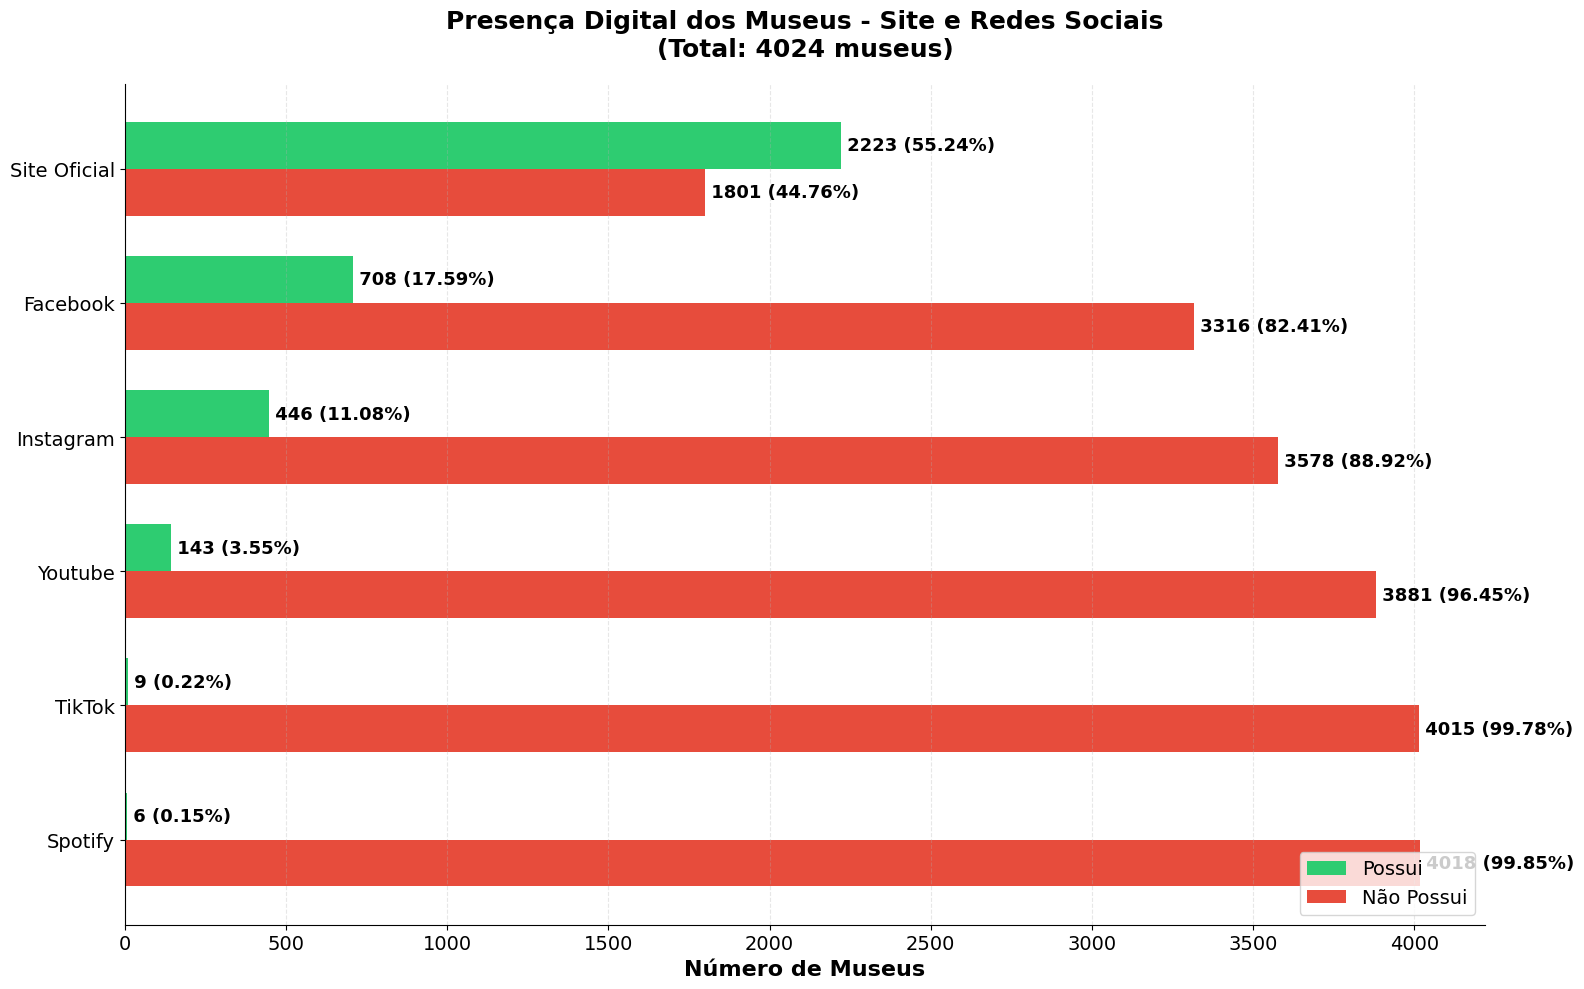


PRESENÇA DIGITAL DOS MUSEUS - SITE E REDES SOCIAIS
Plataforma           Possui          %          Não Possui      %         
----------------------------------------------------------------------------------------------------
Site Oficial         2223            55.24     % 1801            44.76     %
Facebook             708             17.59     % 3316            82.41     %
Instagram            446             11.08     % 3578            88.92     %
Youtube              143             3.55      % 3881            96.45     %
TikTok               9               0.22      % 4015            99.78     %
Spotify              6               0.15      % 4018            99.85     %
TOTAL                4024            100.0     % 4024            100.0     %

RESUMO GERAL - PRESENÇA DIGITAL
Museus com pelo menos uma presença digital (site ou rede social): 2507 (62.3%)
Museus sem nenhuma presença digital: 1517 (37.7%)

DISTRIBUIÇÃO: QUANTIDADE DE PLATAFORMAS POR MUSEU
Nº Plataformas      

In [86]:
# Colunas a analisar
colunas_digitais = ['Site Oficial', 'Facebook', 'Instagram', 'Youtube', 'TikTok', 'Spotify']

# Verificar os valores únicos em cada coluna
print("Verificando valores únicos em cada coluna:")
print("="*80)
for coluna in colunas_digitais:
    print(f"\n{coluna}:")
    print(df[coluna].value_counts().head(10))
    print(f"Total de valores não nulos: {df[coluna].notna().sum()}")
    print(f"Total de valores nulos: {df[coluna].isna().sum()}")
print("\n" + "="*80 + "\n")

# Contar museus que possuem presença em cada plataforma
# Considerando que a presença é indicada por valores não nulos e não vazios
dados_presenca = {}
total_museus = len(df)

for coluna in colunas_digitais:
    # Contar valores não nulos e não vazios
    count_com = df[coluna].notna().sum()
    # Verificar também se não são strings vazias
    count_com = df[df[coluna].notna() & (df[coluna] != '')].shape[0]
    count_sem = total_museus - count_com
    perc_com = round((count_com / total_museus * 100), 2)
    perc_sem = round((count_sem / total_museus * 100), 2)
    
    dados_presenca[coluna] = {
        'com': count_com,
        'sem': count_sem,
        'perc_com': perc_com,
        'perc_sem': perc_sem
    }

# Ordenar por quantidade de museus que possuem (maior para menor)
plataformas_ordenadas = sorted(dados_presenca.keys(), 
                               key=lambda x: dados_presenca[x]['com'], 
                               reverse=True)

# Criar figura
fig, ax = plt.subplots(figsize=(16, 10))

# Cores
cor_com = '#2ecc71'
cor_sem = '#e74c3c'

# Preparar dados para o gráfico
y_pos = np.arange(len(plataformas_ordenadas))
height = 0.35

com_valores = [dados_presenca[plat]['com'] for plat in plataformas_ordenadas]
sem_valores = [dados_presenca[plat]['sem'] for plat in plataformas_ordenadas]
perc_com = [dados_presenca[plat]['perc_com'] for plat in plataformas_ordenadas]
perc_sem = [dados_presenca[plat]['perc_sem'] for plat in plataformas_ordenadas]

# Criar barras agrupadas
bars1 = ax.barh(y_pos - height/2, com_valores, height, label='Possui', color=cor_com)
bars2 = ax.barh(y_pos + height/2, sem_valores, height, label='Não Possui', color=cor_sem)

# Adicionar valores e porcentagens nas barras
for i, (bar, count, perc) in enumerate(zip(bars1, com_valores, perc_com)):
    width_bar = bar.get_width()
    if count > 0:
        ax.text(width_bar, bar.get_y() + bar.get_height()/2.,
                f' {int(count)} ({perc}%)',
                ha='left', va='center', fontsize=13, fontweight='bold')

for i, (bar, count, perc) in enumerate(zip(bars2, sem_valores, perc_sem)):
    width_bar = bar.get_width()
    if count > 0:
        ax.text(width_bar, bar.get_y() + bar.get_height()/2.,
                f' {int(count)} ({perc}%)',
                ha='left', va='center', fontsize=13, fontweight='bold')

# Criar labels das plataformas
labels_plataformas = plataformas_ordenadas

# Configurações do gráfico
ax.set_yticks(y_pos)
ax.set_yticklabels(labels_plataformas, fontsize=14)
ax.set_xlabel('Número de Museus', fontsize=16, fontweight='bold')
ax.set_title(f'Presença Digital dos Museus - Site e Redes Sociais\n(Total: {total_museus} museus)', 
             fontsize=18, fontweight='bold', pad=20)
ax.legend(loc='lower right', fontsize=14, frameon=True)
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', labelsize=14)
ax.invert_yaxis()

plt.tight_layout()
plt.show()

# Mostrar tabela com detalhes
print("\n" + "="*100)
print("PRESENÇA DIGITAL DOS MUSEUS - SITE E REDES SOCIAIS")
print("="*100)
print(f"{'Plataforma':<20} {'Possui':<15} {'%':<10} {'Não Possui':<15} {'%':<10}")
print("-"*100)

for plataforma in plataformas_ordenadas:
    dados = dados_presenca[plataforma]
    print(f"{plataforma:<20} {dados['com']:<15} {dados['perc_com']:<10}% "
          f"{dados['sem']:<15} {dados['perc_sem']:<10}%")

print("="*100)
print(f"{'TOTAL':<20} {total_museus:<15} {'100.0':<10}% {total_museus:<15} {'100.0':<10}%")
print("="*100)

# Análise adicional: quantos museus têm pelo menos uma presença digital?
museus_com_presenca = df[
    (df['Site Oficial'].notna() & (df['Site Oficial'] != '')) |
    (df['Facebook'].notna() & (df['Facebook'] != '')) |
    (df['Instagram'].notna() & (df['Instagram'] != '')) |
    (df['Youtube'].notna() & (df['Youtube'] != '')) |
    (df['TikTok'].notna() & (df['TikTok'] != '')) |
    (df['Spotify'].notna() & (df['Spotify'] != ''))
].shape[0]

museus_sem_presenca = total_museus - museus_com_presenca
perc_com_presenca = round((museus_com_presenca / total_museus * 100), 2)
perc_sem_presenca = round((museus_sem_presenca / total_museus * 100), 2)

print("\n" + "="*100)
print("RESUMO GERAL - PRESENÇA DIGITAL")
print("="*100)
print(f"Museus com pelo menos uma presença digital (site ou rede social): {museus_com_presenca} ({perc_com_presenca}%)")
print(f"Museus sem nenhuma presença digital: {museus_sem_presenca} ({perc_sem_presenca}%)")
print("="*100)

# Análise: quantos museus têm quantas plataformas?
contagem_plataformas = []
for idx, row in df.iterrows():
    count = 0
    for coluna in colunas_digitais:
        if pd.notna(row[coluna]) and row[coluna] != '':
            count += 1
    contagem_plataformas.append(count)

df_temp = pd.DataFrame({'num_plataformas': contagem_plataformas})
distribuicao = df_temp['num_plataformas'].value_counts().sort_index()

print("\n" + "="*100)
print("DISTRIBUIÇÃO: QUANTIDADE DE PLATAFORMAS POR MUSEU")
print("="*100)
print(f"{'Nº Plataformas':<20} {'Quantidade Museus':<20} {'%':<10}")
print("-"*100)

for num_plat, count in distribuicao.items():
    perc = round((count / total_museus * 100), 2)
    print(f"{num_plat:<20} {count:<20} {perc:<10}%")

print("="*100)

### 8.8.2 - Por Esfera

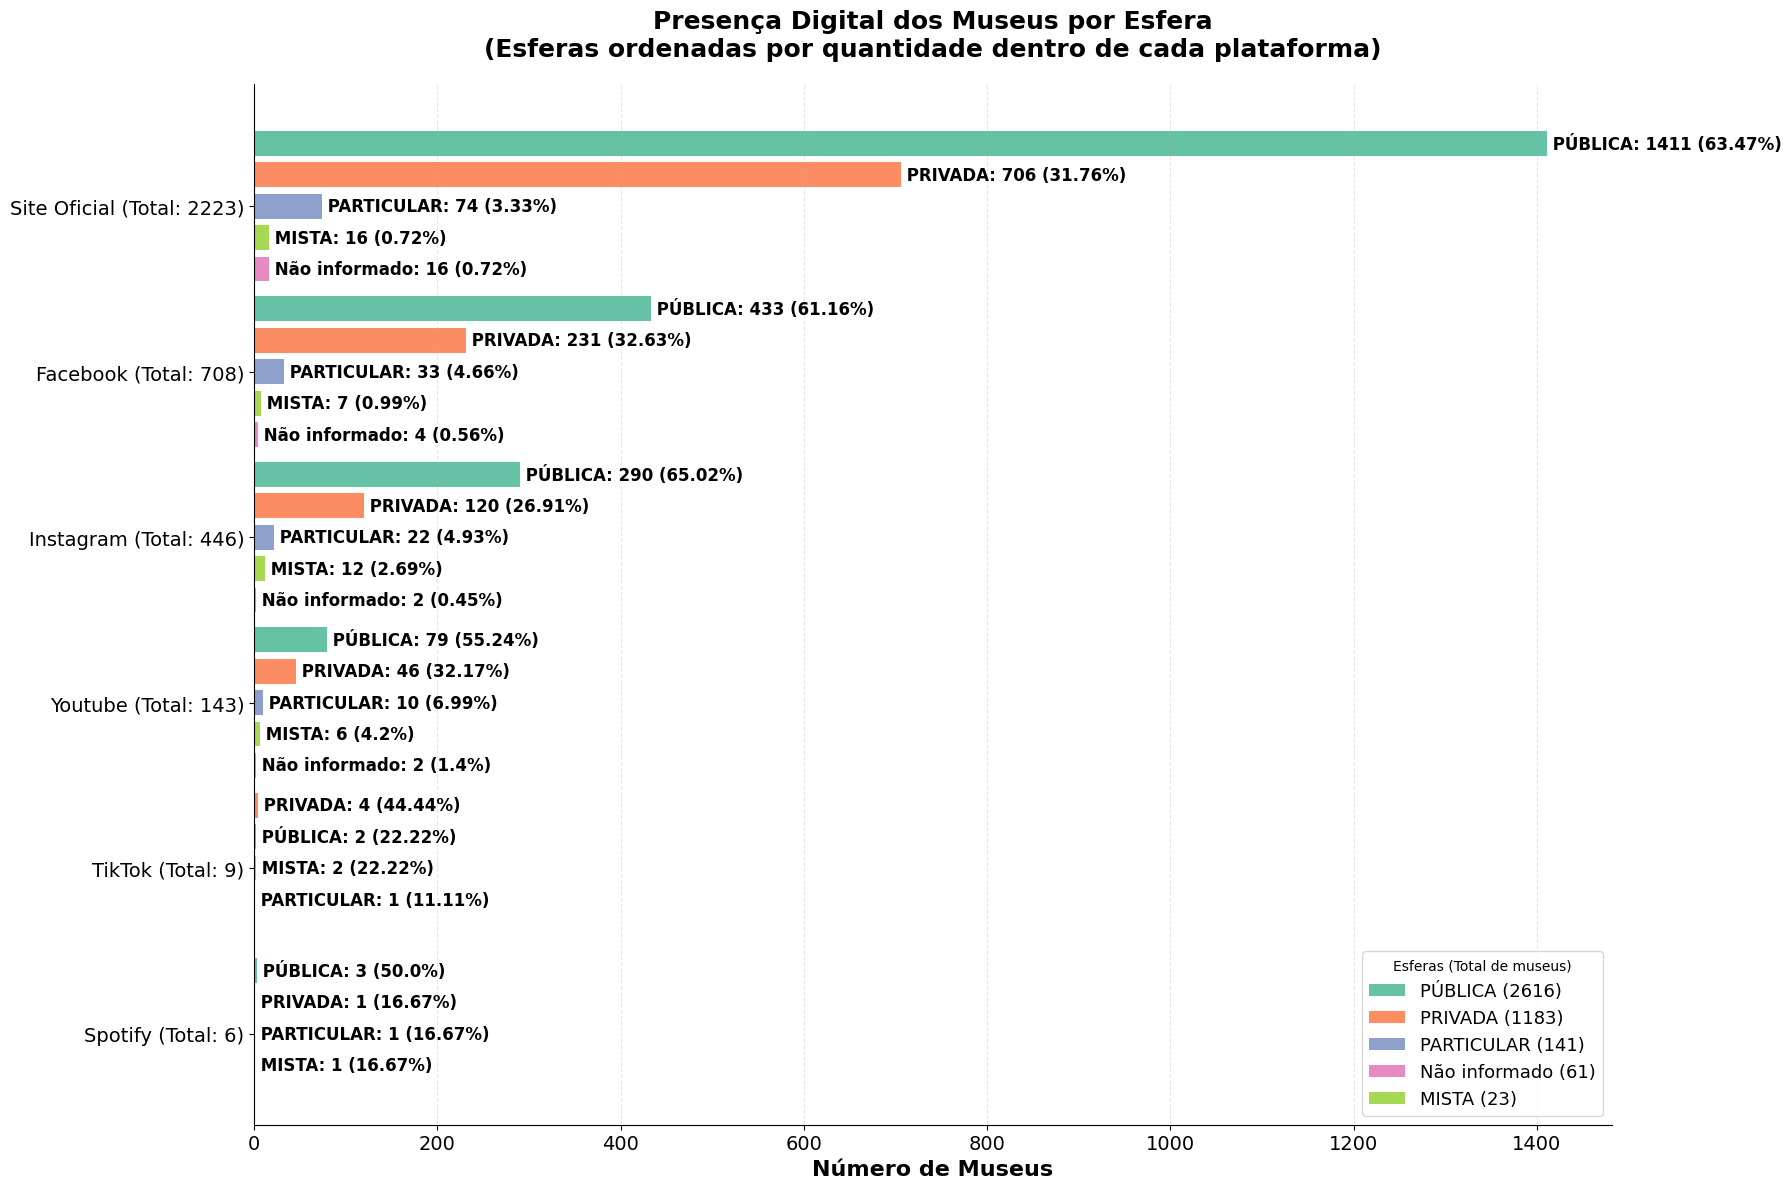


PRESENÇA DIGITAL DOS MUSEUS POR ESFERA
(Esferas listadas em ordem decrescente de quantidade para cada plataforma)

Site Oficial (Total: 2223 museus)
--------------------------------------------------------------------------------
Esfera               Quantidade      %         
--------------------------------------------------------------------------------
PÚBLICA              1411            63.47     %
PRIVADA              706             31.76     %
PARTICULAR           74              3.33      %
MISTA                16              0.72      %
Não informado        16              0.72      %

Facebook (Total: 708 museus)
--------------------------------------------------------------------------------
Esfera               Quantidade      %         
--------------------------------------------------------------------------------
PÚBLICA              433             61.16     %
PRIVADA              231             32.63     %
PARTICULAR           33              4.66      %
MISTA   

In [87]:
# Colunas a analisar
colunas_digitais = ['Site Oficial', 'Facebook', 'Instagram', 'Youtube', 'TikTok', 'Spotify']

# Obter todas as esferas únicas
esferas_unicas = df['Esfera'].unique()
num_esferas = len(esferas_unicas)

# Preparar dados para cada plataforma
dados_plataformas = {}
for plataforma in colunas_digitais:
    # Contar museus que possuem essa plataforma
    df_com_plataforma = df[df[plataforma].notna() & (df[plataforma] != '')]
    total_com_plataforma = len(df_com_plataforma)
    
    # Contar por esfera
    esfera_counts = df_com_plataforma['Esfera'].value_counts()
    
    # Preparar dados para cada esfera
    dados_esfera = {}
    for esfera in esferas_unicas:
        count = esfera_counts.get(esfera, 0)
        perc = round((count / total_com_plataforma * 100), 2) if total_com_plataforma > 0 else 0
        dados_esfera[esfera] = {'count': count, 'perc': perc}
    
    # Ordenar esferas por quantidade dentro dessa plataforma (maior para menor)
    esferas_ordenadas_plataforma = sorted(dados_esfera.keys(), 
                                          key=lambda x: dados_esfera[x]['count'], 
                                          reverse=True)
    
    dados_plataformas[plataforma] = {
        'total': total_com_plataforma,
        'esferas': dados_esfera,
        'esferas_ordenadas': esferas_ordenadas_plataforma
    }

# Ordenar plataformas por total de museus (para melhor visualização)
plataformas_ordenadas = sorted(dados_plataformas.keys(), 
                               key=lambda x: dados_plataformas[x]['total'], 
                               reverse=True)

# Criar cores únicas para cada esfera
cores_esferas = plt.cm.Set2(range(num_esferas))

# Criar um mapeamento fixo de cores para esferas
esferas_todas_ordenadas = sorted(esferas_unicas, 
                                 key=lambda x: df[df['Esfera'] == x].shape[0], 
                                 reverse=True)
cores_map = {esfera: cores_esferas[i] for i, esfera in enumerate(esferas_todas_ordenadas)}

# Criar figura
fig, ax = plt.subplots(figsize=(18, 12))

# Preparar dados para o gráfico
espacamento_entre_grupos = 2
y_pos = np.arange(len(plataformas_ordenadas)) * espacamento_entre_grupos
height = 0.3

# Para cada plataforma, criar as barras ordenadas
for idx_plataforma, plataforma in enumerate(plataformas_ordenadas):
    esferas_ordenadas_plataforma = dados_plataformas[plataforma]['esferas_ordenadas']
    
    # Criar barras para cada esfera dentro desta plataforma
    for i, esfera in enumerate(esferas_ordenadas_plataforma):
        offset = (i - (num_esferas - 1) / 2) * (height + 0.08)
        y_position = y_pos[idx_plataforma] + offset
        
        count = dados_plataformas[plataforma]['esferas'][esfera]['count']
        perc = dados_plataformas[plataforma]['esferas'][esfera]['perc']
        
        if count > 0:  # Só desenhar barra se houver valores
            bar = ax.barh(y_position, count, height, color=cores_map[esfera])
            
            # Adicionar esfera, número e porcentagem no final da barra
            ax.text(count, y_position,
                   f' {esfera}: {int(count)} ({perc}%)',
                   ha='left', va='center', fontsize=12, fontweight='bold')

# Criar labels das plataformas com total
labels_plataformas = []
totais = [dados_plataformas[plataforma]['total'] for plataforma in plataformas_ordenadas]
for i, plataforma in enumerate(plataformas_ordenadas):
    labels_plataformas.append(f'{plataforma} (Total: {totais[i]})')

# Criar legenda personalizada (ordenada por total de museus na esfera)
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=cores_map[esfera], label=f'{esfera} ({df[df["Esfera"] == esfera].shape[0]})') 
                   for esfera in esferas_todas_ordenadas]

# Configurações do gráfico
ax.set_yticks(y_pos)
ax.set_yticklabels(labels_plataformas, fontsize=14)
ax.set_xlabel('Número de Museus', fontsize=16, fontweight='bold')
ax.set_title('Presença Digital dos Museus por Esfera\n(Esferas ordenadas por quantidade dentro de cada plataforma)', 
             fontsize=18, fontweight='bold', pad=20)
ax.legend(handles=legend_elements, loc='lower right', fontsize=13, frameon=True, title='Esferas (Total de museus)')
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', labelsize=14)
ax.invert_yaxis()

plt.tight_layout()
plt.show()

# Mostrar tabela com detalhes
print("\n" + "="*100)
print("PRESENÇA DIGITAL DOS MUSEUS POR ESFERA")
print("(Esferas listadas em ordem decrescente de quantidade para cada plataforma)")
print("="*100)

for plataforma in plataformas_ordenadas:
    dados = dados_plataformas[plataforma]
    
    print(f"\n{plataforma} (Total: {dados['total']} museus)")
    print("-" * 80)
    print(f"{'Esfera':<20} {'Quantidade':<15} {'%':<10}")
    print("-" * 80)
    
    # Mostrar esferas ordenadas para esta plataforma
    for esfera in dados['esferas_ordenadas']:
        count = dados['esferas'][esfera]['count']
        perc = dados['esferas'][esfera]['perc']
        if count > 0:  # Só mostrar esferas com museus
            print(f"{esfera:<20} {count:<15} {perc:<10}%")

print("\n" + "="*100)

# Resumo por esfera
print("\n" + "="*100)
print("RESUMO POR ESFERA - PRESENÇA DIGITAL")
print("="*100)

for esfera in esferas_todas_ordenadas:
    df_esfera = df[df['Esfera'] == esfera]
    total_esfera = len(df_esfera)
    
    print(f"\n{esfera} (Total: {total_esfera} museus)")
    print("-" * 80)
    print(f"{'Plataforma':<20} {'Possui':<15} {'% da Esfera':<15}")
    print("-" * 80)
    
    for plataforma in colunas_digitais:
        count = df_esfera[df_esfera[plataforma].notna() & (df_esfera[plataforma] != '')].shape[0]
        perc = round((count / total_esfera * 100), 2) if total_esfera > 0 else 0
        print(f"{plataforma:<20} {count:<15} {perc:<15}%")
    
    # Museus com pelo menos uma presença digital
    museus_com_presenca = df_esfera[
        (df_esfera['Site Oficial'].notna() & (df_esfera['Site Oficial'] != '')) |
        (df_esfera['Facebook'].notna() & (df_esfera['Facebook'] != '')) |
        (df_esfera['Instagram'].notna() & (df_esfera['Instagram'] != '')) |
        (df_esfera['Youtube'].notna() & (df_esfera['Youtube'] != '')) |
        (df_esfera['TikTok'].notna() & (df_esfera['TikTok'] != '')) |
        (df_esfera['Spotify'].notna() & (df_esfera['Spotify'] != ''))
    ].shape[0]
    
    perc_com_presenca = round((museus_com_presenca / total_esfera * 100), 2) if total_esfera > 0 else 0
    
    print("-" * 80)
    print(f"{'Pelo menos 1 plataforma':<20} {museus_com_presenca:<15} {perc_com_presenca:<15}%")

print("\n" + "="*100)

# Resumo estatístico
total_museus = len(df)
print("\n" + "="*100)
print("RESUMO ESTATÍSTICO")
print("="*100)
print(f"Total de Esferas: {num_esferas}")
print(f"Total de Plataformas analisadas: {len(colunas_digitais)}")
print(f"Total de Museus: {total_museus}")
print("="*100)

### 8.8.3 - Por Estado

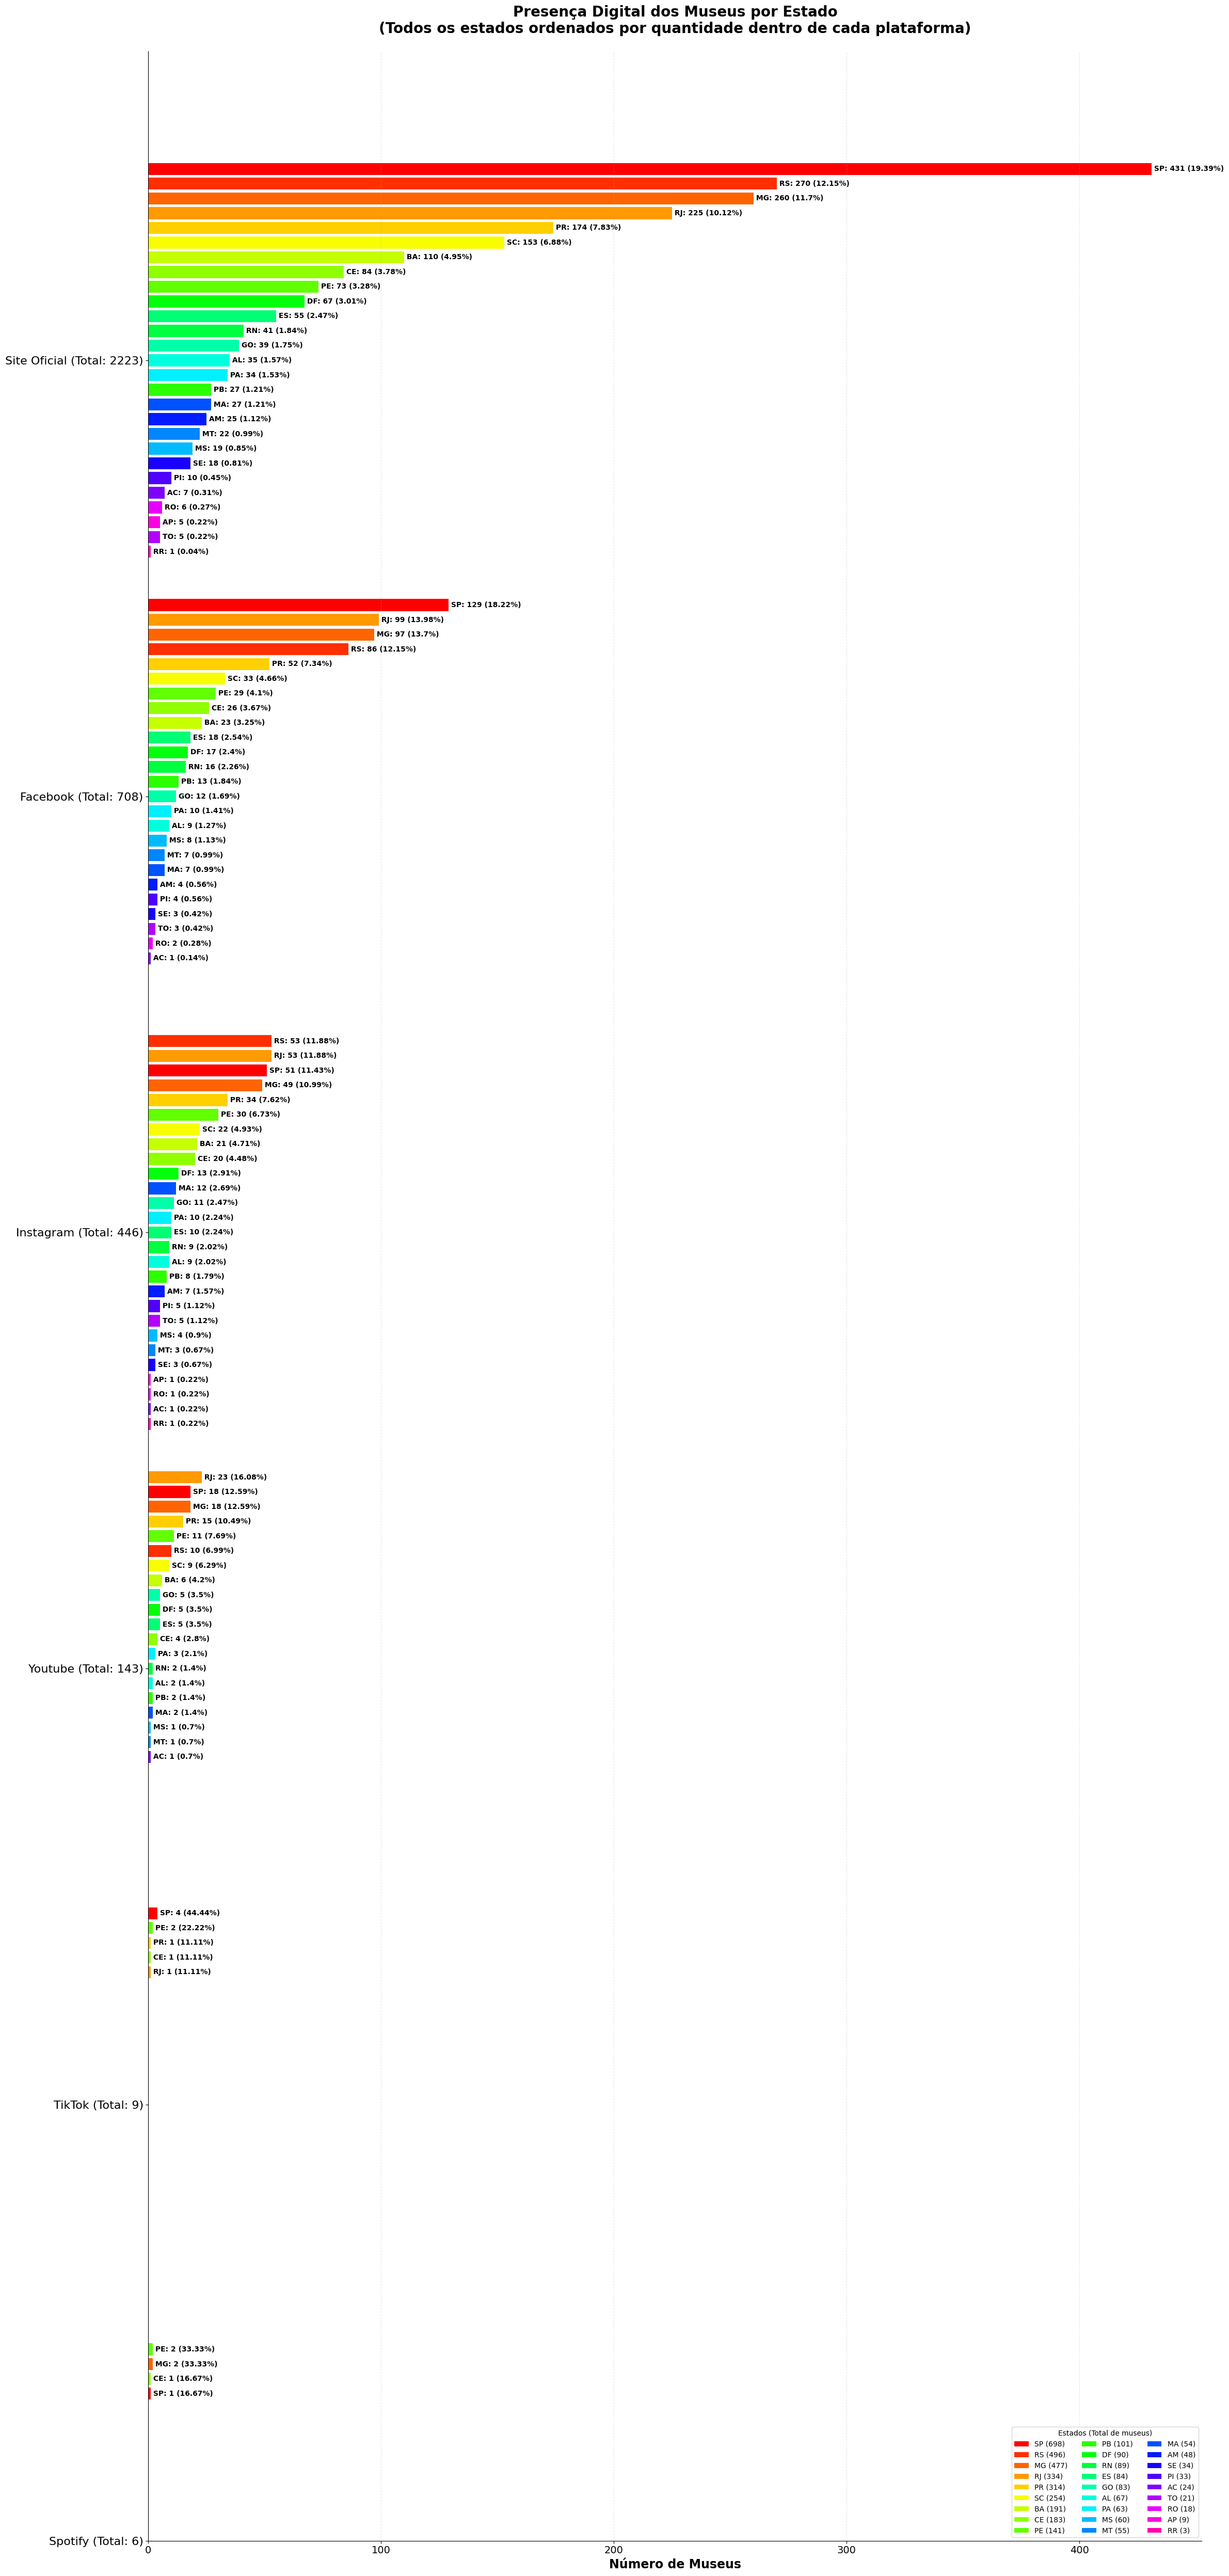


PRESENÇA DIGITAL DOS MUSEUS POR ESTADO (TOP 10 ESTADOS POR PLATAFORMA)
(Estados listados em ordem decrescente de quantidade para cada plataforma)

Site Oficial (Total: 2223 museus)
--------------------------------------------------------------------------------
Posição    Estado     Quantidade      %         
--------------------------------------------------------------------------------
1          SP         431             19.39     %
2          RS         270             12.15     %
3          MG         260             11.7      %
4          RJ         225             10.12     %
5          PR         174             7.83      %
6          SC         153             6.88      %
7          BA         110             4.95      %
8          CE         84              3.78      %
9          PE         73              3.28      %
10         DF         67              3.01      %
... e mais 17 estados

Facebook (Total: 708 museus)
-------------------------------------------------------

In [88]:
# Colunas a analisar
colunas_digitais = ['Site Oficial', 'Facebook', 'Instagram', 'Youtube', 'TikTok', 'Spotify']

# Obter todos os estados únicos
estados_unicos = df['Estado'].unique()
num_estados = len(estados_unicos)

# Preparar dados para cada plataforma
dados_plataformas = {}
for plataforma in colunas_digitais:
    # Contar museus que possuem essa plataforma
    df_com_plataforma = df[df[plataforma].notna() & (df[plataforma] != '')]
    total_com_plataforma = len(df_com_plataforma)
    
    # Contar por estado
    estado_counts = df_com_plataforma['Estado'].value_counts()
    
    # Preparar dados para cada estado
    dados_estado = {}
    for estado in estados_unicos:
        count = estado_counts.get(estado, 0)
        perc = round((count / total_com_plataforma * 100), 2) if total_com_plataforma > 0 else 0
        dados_estado[estado] = {'count': count, 'perc': perc}
    
    # Ordenar estados por quantidade dentro dessa plataforma (maior para menor)
    estados_ordenados_plataforma = sorted(dados_estado.keys(), 
                                          key=lambda x: dados_estado[x]['count'], 
                                          reverse=True)
    
    dados_plataformas[plataforma] = {
        'total': total_com_plataforma,
        'estados': dados_estado,
        'estados_ordenados': estados_ordenados_plataforma
    }

# Ordenar plataformas por total de museus (para melhor visualização)
plataformas_ordenadas = sorted(dados_plataformas.keys(), 
                               key=lambda x: dados_plataformas[x]['total'], 
                               reverse=True)

# Criar cores únicas para cada estado
cores_estados = plt.cm.tab20c(range(num_estados))
if num_estados > 20:
    cores_estados = plt.cm.hsv(np.linspace(0, 0.9, num_estados))

# Criar um mapeamento fixo de cores para estados
estados_todos_ordenados = sorted(estados_unicos, 
                                 key=lambda x: df[df['Estado'] == x].shape[0], 
                                 reverse=True)
cores_map = {estado: cores_estados[i] for i, estado in enumerate(estados_todos_ordenados)}

# Criar figura MUITO MAIOR para acomodar 27 estados por plataforma
fig, ax = plt.subplots(figsize=(24, 50))

# Preparar dados para o gráfico com MUITO espaçamento
espacamento_entre_grupos = 8  # Espaço grande entre grupos de plataformas
y_pos = np.arange(len(plataformas_ordenadas)) * espacamento_entre_grupos
height = 0.22  # Altura de cada barra

# Para cada plataforma, criar as barras ordenadas
for idx_plataforma, plataforma in enumerate(plataformas_ordenadas):
    estados_ordenados_plataforma = dados_plataformas[plataforma]['estados_ordenados']
    
    # Criar barras para cada estado dentro desta plataforma
    for i, estado in enumerate(estados_ordenados_plataforma):
        # Calcular offset - distribuir os 27 estados ao redor do centro
        offset = (i - (num_estados - 1) / 2) * (height + 0.05)
        y_position = y_pos[idx_plataforma] + offset
        
        count = dados_plataformas[plataforma]['estados'][estado]['count']
        perc = dados_plataformas[plataforma]['estados'][estado]['perc']
        
        if count > 0:  # Só desenhar barra se houver valores
            bar = ax.barh(y_position, count, height, color=cores_map[estado])
            
            # Adicionar estado, número e porcentagem no final da barra
            ax.text(count, y_position,
                   f' {estado}: {int(count)} ({perc}%)',
                   ha='left', va='center', fontsize=10, fontweight='bold')

# Criar labels das plataformas com total
labels_plataformas = []
totais = [dados_plataformas[plataforma]['total'] for plataforma in plataformas_ordenadas]
for i, plataforma in enumerate(plataformas_ordenadas):
    labels_plataformas.append(f'{plataforma} (Total: {totais[i]})')

# Criar legenda personalizada (ordenada por total de museus no estado)
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=cores_map[estado], label=f'{estado} ({df[df["Estado"] == estado].shape[0]})') 
                   for estado in estados_todos_ordenados]

# Configurações do gráfico
ax.set_yticks(y_pos)
ax.set_yticklabels(labels_plataformas, fontsize=16)
ax.set_xlabel('Número de Museus', fontsize=17, fontweight='bold')
ax.set_title('Presença Digital dos Museus por Estado\n(Todos os estados ordenados por quantidade dentro de cada plataforma)', 
             fontsize=20, fontweight='bold', pad=25)
ax.legend(handles=legend_elements, loc='lower right', fontsize=10, frameon=True, ncol=3, title='Estados (Total de museus)')
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', labelsize=14)
ax.invert_yaxis()

plt.tight_layout()
plt.show()

# Mostrar tabela com detalhes
print("\n" + "="*120)
print("PRESENÇA DIGITAL DOS MUSEUS POR ESTADO (TOP 10 ESTADOS POR PLATAFORMA)")
print("(Estados listados em ordem decrescente de quantidade para cada plataforma)")
print("="*120)

for plataforma in plataformas_ordenadas:
    dados = dados_plataformas[plataforma]
    
    print(f"\n{plataforma} (Total: {dados['total']} museus)")
    print("-" * 80)
    print(f"{'Posição':<10} {'Estado':<10} {'Quantidade':<15} {'%':<10}")
    print("-" * 80)
    
    # Mostrar top 10 estados ordenados para esta plataforma
    count_exibidos = 0
    for pos, estado in enumerate(dados['estados_ordenados'], 1):
        count = dados['estados'][estado]['count']
        perc = dados['estados'][estado]['perc']
        if count > 0:  # Só mostrar estados com museus
            print(f"{pos:<10} {estado:<10} {count:<15} {perc:<10}%")
            count_exibidos += 1
            if count_exibidos >= 10:  # Limitar a 10 estados por plataforma
                estados_com_valores = [e for e in dados['estados_ordenados'] if dados['estados'][e]['count'] > 0]
                if len(estados_com_valores) > 10:
                    print(f"... e mais {len(estados_com_valores) - 10} estados")
                break

print("\n" + "="*120)

# Resumo por estado (Top 10)
print("\n" + "="*120)
print("RESUMO POR ESTADO - PRESENÇA DIGITAL (TOP 10 ESTADOS COM MAIS MUSEUS)")
print("="*120)

for estado in estados_todos_ordenados[:10]:
    df_estado = df[df['Estado'] == estado]
    total_estado = len(df_estado)
    
    print(f"\n{estado} (Total: {total_estado} museus)")
    print("-" * 80)
    print(f"{'Plataforma':<20} {'Possui':<15} {'% do Estado':<15}")
    print("-" * 80)
    
    for plataforma in colunas_digitais:
        count = df_estado[df_estado[plataforma].notna() & (df_estado[plataforma] != '')].shape[0]
        perc = round((count / total_estado * 100), 2) if total_estado > 0 else 0
        print(f"{plataforma:<20} {count:<15} {perc:<15}%")
    
    # Museus com pelo menos uma presença digital
    museus_com_presenca = df_estado[
        (df_estado['Site Oficial'].notna() & (df_estado['Site Oficial'] != '')) |
        (df_estado['Facebook'].notna() & (df_estado['Facebook'] != '')) |
        (df_estado['Instagram'].notna() & (df_estado['Instagram'] != '')) |
        (df_estado['Youtube'].notna() & (df_estado['Youtube'] != '')) |
        (df_estado['TikTok'].notna() & (df_estado['TikTok'] != '')) |
        (df_estado['Spotify'].notna() & (df_estado['Spotify'] != ''))
    ].shape[0]
    
    perc_com_presenca = round((museus_com_presenca / total_estado * 100), 2) if total_estado > 0 else 0
    
    print("-" * 80)
    print(f"{'Pelo menos 1 plataforma':<20} {museus_com_presenca:<15} {perc_com_presenca:<15}%")

print("\n" + "="*120)

# Resumo estatístico
total_museus = len(df)
print("\n" + "="*100)
print("RESUMO ESTATÍSTICO")
print("="*100)
print(f"Total de Estados: {num_estados}")
print(f"Total de Plataformas analisadas: {len(colunas_digitais)}")
print(f"Total de Museus: {total_museus}")
print("="*100)

In [82]:
print("="*100)
print("MUSEUS COM TIKTOK")
print("="*100)

# Filtrar museus com TikTok
museus_tiktok = df[df['TikTok'].notna() & (df['TikTok'] != '')]

if len(museus_tiktok) > 0:
    print(f"\nTotal de museus com TikTok: {len(museus_tiktok)}\n")
    
    for idx, row in museus_tiktok.iterrows():
        print(f"Museu: {row['Título']}")
        print(f"Estado: {row['Estado']}")
        print(f"Município: {row['Município']}")
        print(f"TikTok: {row['TikTok']}")
        print("-" * 100)
else:
    print("\nNenhum museu possui TikTok cadastrado.")

print("\n" + "="*100)
print("MUSEUS COM SPOTIFY")
print("="*100)

# Filtrar museus com Spotify
museus_spotify = df[df['Spotify'].notna() & (df['Spotify'] != '')]

if len(museus_spotify) > 0:
    print(f"\nTotal de museus com Spotify: {len(museus_spotify)}\n")
    
    for idx, row in museus_spotify.iterrows():
        print(f"Museu: {row['Título']}")
        print(f"Estado: {row['Estado']}")
        print(f"Município: {row['Município']}")
        print(f"Spotify: {row['Spotify']}")
        print("-" * 100)
else:
    print("\nNenhum museu possui Spotify cadastrado.")

print("\n" + "="*100)
print("RESUMO")
print("="*100)
print(f"Total de museus com TikTok: {len(museus_tiktok)}")
print(f"Total de museus com Spotify: {len(museus_spotify)}")
print("="*100)

MUSEUS COM TIKTOK

Total de museus com TikTok: 9

Museu: Museu das Tartarugas Marinhas - Ecoassoaciados
Estado: PE
Município: Ipojuca
TikTok: https://www.tiktok.com/@ecoassociados
----------------------------------------------------------------------------------------------------
Museu: Museu Aeroespacial - MUSAL
Estado: RJ
Município: Rio de Janeiro
TikTok: www.tiktok.com/@museuaeroespacial
----------------------------------------------------------------------------------------------------
Museu: Museu do Holocausto de Curitiba
Estado: PR
Município: Curitiba
TikTok: https://www.tiktok.com/@museudoholocausto
----------------------------------------------------------------------------------------------------
Museu: Museu Restaurante Areca Bambu
Estado: SP
Município: Mogi Guaçu
TikTok: https://www.tiktok.com/@famlia.food.truck?_t=ZM-8xfBTlCNRi9&_r=1
----------------------------------------------------------------------------------------------------
Museu: Museu Casa de Portinari
Estado: S

# **9.0 - Considerações éticas**

Todos os dados utilizados são públicos e disponibilizados pelo [Museusbr](http://museus.cultura.gov.br/).

O projeto tem caráter informativo e não substitui a consulta direta aos museus para confirmação de recursos específicos de acessibilidade. Todos os museus apresentados possuem o link direto para sua respectiva página oficial na plataforma [Museusbr](http://museus.cultura.gov.br/).

A classificação de acessibilidade proposta foi desenvolvida somente a partir das categorias disponíveis na plataforma e a construção do projeto foi realizada com base nas diretrizes de acessibilidade da [WCAG (Web Content Accessibility Guidelines)](https://www.w3.org/Translations/WCAG20-pt-br/WCAG20-pt-br-20141024/).

Reconhece-se que uma validação com especialistas em acessibilidade e, especialmente, com pessoas com deficiência para testar tanto o conteúdo quanto o formato de apresentação, agregaria robustez metodológica e legitimidade ao projeto.

## 9.1 - Uso de inteligência artificial

Foram utilizados os modelos de inteligência artificial ChatGPT-5 e Claude Sonet 4.5 (das empresas OpenAI e Anthropic, respectivamente) para criação, revisão e teste do código utilizado para raspagem de dados, análise e construção do site e de suas visualizações de dados.

# **10.0 - Trabalhos futuros e possibilidades de expansão**

Este projeto representa uma primeira etapa na democratização do acesso a informações sobre acessibilidade em museus brasileiros. Para aprimoramentos futuros, sugere-se:

- Atualização periódica dos dados: Implementar coleta automatizada trimestral ou semestral para manter as informações atualizadas
- Validação com usuários: Realizar testes de usabilidade com pessoas com deficiência para validar a classificação e a experiência de uso
- Sistema de feedback: Permitir que visitantes reportem inconsistências ou atualizações sobre a acessibilidade dos museus
- Expansão para outros equipamentos culturais: Possibilidade de aplicar a mesma metodologia para teatros, cinemas, bibliotecas e centros culturais